In [1]:
import spacy
import nltk
import pandas as pd
import numpy as np
nlp=spacy.load('en_core_web_sm')

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hitpr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{"didn't", "isn't", 'weren', 'you', 'what', 'be', 'to', 'into', "wouldn't", "it's", 'them', 'itself', 'd', 'until', 'only', 'ourselves', 'her', 'was', 'yourselves', 'during', 't', 'who', 'ma', 'about', 'than', 'ours', 'but', "mightn't", 'she', 'such', 'they', 'any', 'can', 'do', 'off', 'shan', "hadn't", 'each', 're', 'down', 'his', 'our', "weren't", 'being', 'with', 'wouldn', "you'd", "needn't", 'we', 'this', 'does', 'which', 'against', 'both', 'me', "aren't", 'isn', "that'll", 'didn', 'y', 'in', 'their', "won't", 'because', 'did', "mustn't", 'don', 'so', 'hadn', 'herself', 'are', 's', 'most', 'theirs', 'him', 'these', 'doing', 'before', 'of', "should've", "you've", 'not', 'o', 'mightn', 'wasn', 'while', 'those', 'other', 'above', 'too', 'just', 'after', "couldn't", 'doesn', 'on', 'hers', "she's", 'or', 'between', 'there', "shan

In [3]:
train=pd.read_csv('train.csv')

In [4]:
train['question1']=train.question1.apply(str)
train['question2']=train.question2.apply(str)

In [5]:
train.head(3)
type(train['question1'][1])

str

In [6]:
L = [[] for _ in range(len(train))]
M = [[] for _ in range(len(train))]

from nltk.tokenize import word_tokenize
for i in range(len(train)):
    tokenized_word=word_tokenize(train['question1'].iloc[i])
    L[i].append(tokenized_word)
    tokenized_word=word_tokenize(train['question2'].iloc[i])
    M[i].append(tokenized_word)
    
L[0]
M[0]

[['What',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  '?']]

In [7]:
type(train)

pandas.core.frame.DataFrame

In [8]:
train.iloc[0]['question1']

'What is the step by step guide to invest in share market in india?'

### Removing Stop words

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hitpr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{"didn't", "isn't", 'weren', 'you', 'what', 'be', 'to', 'into', "wouldn't", "it's", 'them', 'itself', 'd', 'until', 'only', 'ourselves', 'her', 'was', 'yourselves', 'during', 't', 'who', 'ma', 'about', 'than', 'ours', 'but', "mightn't", 'she', 'such', 'they', 'any', 'can', 'do', 'off', 'shan', "hadn't", 'each', 're', 'down', 'his', 'our', "weren't", 'being', 'with', 'wouldn', "you'd", "needn't", 'we', 'this', 'does', 'which', 'against', 'both', 'me', "aren't", 'isn', "that'll", 'didn', 'y', 'in', 'their', "won't", 'because', 'did', "mustn't", 'don', 'so', 'hadn', 'herself', 'are', 's', 'most', 'theirs', 'him', 'these', 'doing', 'before', 'of', "should've", "you've", 'not', 'o', 'mightn', 'wasn', 'while', 'those', 'other', 'above', 'too', 'just', 'after', "couldn't", 'doesn', 'on', 'hers', "she's", 'or', 'between', 'there', "shan

In [10]:
import copy
K=copy.deepcopy(L)
for i in range(len(K)):
    
    t=K[i][0]
    filtered_sent= []#i for i in range(len(K[i][0]))]
    for w in range(len(K[i][0])):
        if t[w] not in stop_words:
            #filtered_sent[w]=t[w]
            filtered_sent.append(t[w])
    K[i][0]=filtered_sent


In [11]:
print(L[1][0])
K[1][0]

['What', 'is', 'the', 'story', 'of', 'Kohinoor', '(', 'Koh-i-Noor', ')', 'Diamond', '?']


['What', 'story', 'Kohinoor', '(', 'Koh-i-Noor', ')', 'Diamond', '?']

In [12]:
L=copy.deepcopy(K)

In [13]:
import copy
H=copy.deepcopy(M)
for i in range(len(H)):
    
    t=H[i][0]
    filtered_sent= []#i for i in range(len(K[i][0]))]
    for w in range(len(H[i][0])):
        if t[w] not in stop_words:
            #filtered_sent[w]=t[w]
            filtered_sent.append(t[w])
    H[i][0]=filtered_sent

In [14]:
print(M[1][0])
H[1][0]

['What', 'would', 'happen', 'if', 'the', 'Indian', 'government', 'stole', 'the', 'Kohinoor', '(', 'Koh-i-Noor', ')', 'diamond', 'back', '?']


['What',
 'would',
 'happen',
 'Indian',
 'government',
 'stole',
 'Kohinoor',
 '(',
 'Koh-i-Noor',
 ')',
 'diamond',
 'back',
 '?']

In [15]:
M=copy.deepcopy(H)

### Lexicon Normalization

#### We will be using the method Lemmatization instead of Stemming. This is because Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [16]:
#Lexicon Normalization
#performing stemming and Lemmatization
import nltk
#nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

import copy
K=copy.deepcopy(L)
for i in range(len(K)):
    
    t=K[i][0]
    filtered_sent= []#i for i in range(len(K[i][0]))]
    for w in range(len(K[i][0])):
        filtered_sent.append(lem.lemmatize(t[w],"v"))
    K[i][0]=filtered_sent


In [17]:
print(L[2][0])
K[2][0]

['How', 'I', 'increase', 'speed', 'internet', 'connection', 'using', 'VPN', '?']


['How', 'I', 'increase', 'speed', 'internet', 'connection', 'use', 'VPN', '?']

In [18]:
L=copy.deepcopy(K)

In [19]:
#Lexicon Normalization
#performing stemming and Lemmatization

H=copy.deepcopy(M)
for i in range(len(H)):
    
    t=H[i][0]
    filtered_sent= []#i for i in range(len(K[i][0]))]
    for w in range(len(H[i][0])):
        filtered_sent.append(lem.lemmatize(t[w],"v"))
    H[i][0]=filtered_sent


In [20]:
print(M[2][0])
H[2][0]

['How', 'Internet', 'speed', 'increased', 'hacking', 'DNS', '?']


['How', 'Internet', 'speed', 'increase', 'hack', 'DNS', '?']

In [21]:
M=copy.deepcopy(H)

In [22]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
import gensim
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
C:\Users\hitpr\Anaconda3.6\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Join the words to form sentences and remove special characters

In [23]:
A=[]
for i in range(len(L)):
    t=L[i][0]
    x=""
    for j in range(len(t)):
        x+=t[j]
        x+=" "
    x=re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    A.append(x)

B=[]
for i in range(len(M)):
    t=M[i][0]
    x=""
    for j in range(len(t)):
        x+=t[j]
        x+=" "
    x=re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    B.append(x)

In [24]:
A[1]

'What story Kohinoor Koh i Noor Diamond '

### Tag the questions with their qids

In [25]:
labeled_questions=[]
for i in range(len(A)):
    labeled_questions.append(TaggedDocument(A[i].split(), train[train.index == i].qid1))
    labeled_questions.append(TaggedDocument(B[i].split(), train[train.index == i].qid2))

### Build Doc2Vec model and train the model using 20 epochs

#### You can think of it as a NN with a single projection and hidden layer which we train on the corpus. The weights are then used as our embeddings The only addition to the underlying NN used in Word2Vec is that the input includes not only the word vectors of each word in the context, but also the paragraph vector.

In [26]:
model = Doc2Vec(dm = 1, min_count=1, window=10, size=150, sample=1e-4, negative=10)
model.build_vocab(labeled_questions)

C:\Users\hitpr\Anaconda3.6\lib\site-packages\gensim\models\doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [27]:
# Train the model with 20 epochs 
 
for epoch in range(20):
    model.train(labeled_questions,epochs=model.iter,total_examples=model.corpus_count)
    print("Epoch #{} is complete.".format(epoch+1))

C:\Users\hitpr\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  after removing the cwd from sys.path.


Epoch #1 is complete.
Epoch #2 is complete.
Epoch #3 is complete.
Epoch #4 is complete.
Epoch #5 is complete.
Epoch #6 is complete.
Epoch #7 is complete.
Epoch #8 is complete.
Epoch #9 is complete.
Epoch #10 is complete.
Epoch #11 is complete.
Epoch #12 is complete.
Epoch #13 is complete.
Epoch #14 is complete.
Epoch #15 is complete.
Epoch #16 is complete.
Epoch #17 is complete.
Epoch #18 is complete.
Epoch #19 is complete.
Epoch #20 is complete.


### Test the model by finding the most similars for 'washington'

In [28]:
model.most_similar('washington')

C:\Users\hitpr\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\hitpr\Anaconda3.6\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('shoolini', 0.9245589971542358),
 ('bml', 0.8685158491134644),
 ('hardvard', 0.816472053527832),
 ('ottawa', 0.8153678774833679),
 ('munjal', 0.8092800378799438),
 ('bradley', 0.8075581789016724),
 ('78th', 0.8059331178665161),
 ('Donestk', 0.8033474683761597),
 ('Kean', 0.7981419563293457),
 ('chirst', 0.7822012901306152)]

### Remove empty, '', ' ' and capture their indexes in O so you can remove the rows from train with the same index

In [29]:
O=[]
for i in range(len(A)):
    if A[i]==' ':
        O.append(i)
    elif B[i]==' ':
        O.append(i)
    elif not A[i]:
        O.append(i)
    elif A[i]=='':
        O.append(i)
    elif B[i]=='':
        O.append(i)
    else:
        z=1
i=0
while i < len(A):
    if A[i]==' ':
        del A[i]
        del B[i]
    else:
        i=i+1
i=0
while i < len(A):
    if not A[i]:
        del A[i]
        del B[i]
    else:
        i=i+1

i=0
while i < len(A):
    if B[i]==' ':
        del A[i]
        del B[i]
    else:
        i=i+1

i=0
while i < len(A):
    if A[i]=='':
        del A[i]
        del B[i]
    else:
        i=i+1
        
i=0
while i < len(A):
    if B[i]=='':
        del A[i]
        del B[i]
    else:
        i=i+1

In [30]:
O

[3306,
 13016,
 20072,
 20794,
 47056,
 90492,
 96725,
 104101,
 108978,
 115347,
 134403,
 144343,
 151922,
 189659,
 190570,
 198913,
 208485,
 213220,
 226925,
 254161,
 273065,
 290090,
 301583,
 381124,
 384293,
 402423]

### Generate the score for sentence similarity and capture it in C

In [31]:
C=[]

try:
    for i in range(len(A)):
        score = model.n_similarity(A[i].split(),B[i].split())
        C.append(score)
except ZeroDivisionError:
    print("Oops!")


C:\Users\hitpr\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  """
C:\Users\hitpr\Anaconda3.6\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [32]:
len(C)

404264

### Now drop the rows from train using the indexes that were captured in O

In [33]:
train=train.drop(train.index[O])
train

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


### Re-define the scores captured in C as binary scores based on a threshold

In [161]:
Scores=[]
for i in range(len(C)):
    if C[i]>0.616:
        Scores.append(1)
    else:
        Scores.append(0)

### Calculate the accuracy of the model on the train dataset

In [162]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train.is_duplicate, Scores) * 100
accuracy

44.12784714938753

In [163]:
import pandas as pd
y_actu = pd.Series(train['is_duplicate'], name='Actual')
y_pred = pd.Series(Scores, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)


Predicted,0,1
Actual,,
0,20936,234049
1,12034,137219


In [173]:
(df_confusion[0].iloc[0]*100)/(df_confusion[0].iloc[0]+df_confusion[0].iloc[1])

63.500151653017895

In [175]:
l=[]
p=[]
j=0.2
while j<0.9:
    
    Scores=[]
    for i in range(len(C)):
        if C[i]>j:
            Scores.append(1)
        else:
            Scores.append(0)
    
    accuracy = accuracy_score(train.is_duplicate, Scores) * 100

    y_actu = pd.Series(train['is_duplicate'], name='Actual')
    y_pred = pd.Series(Scores, name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)

    l.append((df_confusion[0].iloc[0]*100)/(df_confusion[0].iloc[0]+df_confusion[0].iloc[1]))
    p.append(j)
    j=j+0.02


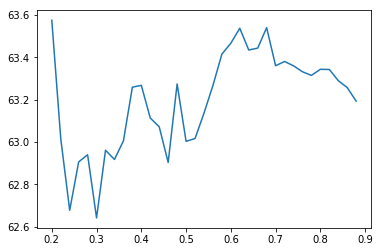

In [177]:
import matplotlib.pyplot as plt

plt.plot(p, l)
plt.show()

In [178]:
A[1:1000]

['What story Kohinoor Koh i Noor Diamond ',
 'How I increase speed internet connection use VPN ',
 'Why I mentally lonely How I solve ',
 'Which one dissolve water quikly sugar salt methane carbon di oxide ',
 'Astrology I Capricorn Sun Cap moon cap rise say ',
 'Should I buy tiago ',
 'How I good geologist ',
 'When use instead ',
 'Motorola company Can I hack Charter Motorolla DCX3400 ',
 'Method find separation slit use fresnel biprism ',
 'How I read find YouTube comment ',
 'What make Physics easy learn ',
 'What first sexual experience like ',
 'What laws change status student visa green card US compare immigration laws Canada ',
 'What would Trump presidency mean current international master students F1 visa ',
 'What manipulation mean ',
 'Why girls want friends guy reject ',
 'Why many Quora users post question readily answer Google ',
 'Which best digital market institution banglore ',
 'Why rocket look white ',
 'What s cause someone jealous ',
 'What question ask Quora ',
 

In [34]:
len_diff=[]
for i in range(len(A)):
    j=len(A[i].split())- len(B[i].split())
    len_diff.append(j)
len_diff[1:20]

[-5, 2, -2, 5, -1, -4, 0, 0, 1, -1, 1, 0, 1, -1, 1, 0, 1, 1, 0]

In [35]:
from nltk.corpus import wordnet as wn
nouns = {x.name().split('.', 1)[0] for x in wn.all_synsets('n')}
noun_diff=[]
for i in range(len(A)):
    split1=A[i].split()
    split2=B[i].split()
    n1=0
    n2=0
    for j in range(len(split1)):
        if split1[j] in nouns:
            n1+=1
    for j in range(len(split2)):
        if split2[j] in nouns:
            n2+=1
    noun=n1-n2
    noun_diff.append(noun)
noun_diff[1:20]

[-3, 2, -2, 5, 0, -5, 0, 0, -1, 3, 0, -1, 1, 0, 2, 0, -2, 0, 0]

In [36]:
from nltk.corpus import wordnet as wn
verbs = {x.name().split('.', 1)[0] for x in wn.all_synsets('v')}
verb_diff=[]
for i in range(len(A)):
    split1=A[i].split()
    split2=B[i].split()
    n1=0
    n2=0
    for j in range(len(split1)):
        if split1[j] in verbs:
            n1+=1
    for j in range(len(split2)):
        if split2[j] in verbs:
            n2+=1
    verb=n1-n2
    verb_diff.append(verb)
verb_diff[1:20]

[-3, 0, -1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, -1, -1]

In [37]:
from nltk.corpus import wordnet as wn
adjectives = {x.name().split('.', 1)[0] for x in wn.all_synsets('a')}
adjective_diff=[]
for i in range(len(A)):
    split1=A[i].split()
    split2=B[i].split()
    n1=0
    n2=0
    for j in range(len(split1)):
        if split1[j] in adjectives:
            n1+=1
    for j in range(len(split2)):
        if split2[j] in adjectives:
            n2+=1
    adjective=n1-n2
    adjective_diff.append(adjective)
adjective_diff[1:20]

[-1, 0, 1, 1, -1, -3, 0, 0, -1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0]

In [38]:
from nltk.corpus import wordnet as wn
adverbs = {x.name().split('.', 1)[0] for x in wn.all_synsets('r')}
adverb_diff=[]
for i in range(len(A)):
    split1=A[i].split()
    split2=B[i].split()
    n1=0
    n2=0
    for j in range(len(split1)):
        if split1[j] in adverbs:
            n1+=1
    for j in range(len(split2)):
        if split2[j] in adverbs:
            n2+=1
    adverb=n1-n2
    adverb_diff.append(adverb)
adverb_diff[1:20]

[-1, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]

In [39]:
import pandas as pd
independent_variables = pd.DataFrame(
    {'Cosine_similarity': C,
     'len_diff': len_diff,
     'noun_diff': noun_diff,
     'verb_diff': verb_diff,
     'adverb_diff': adverb_diff,
     'adjective_diff': adjective_diff
    })

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent_variables,train['is_duplicate'] ,shuffle=True,test_size=0.3)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\hitpr\Anaconda3.6\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [42]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150


111980/282984 [==========>...................] - ETA: 4:54:26 - loss: 0.6872 - acc: 0.60 - ETA: 5:28 - loss: 0.6627 - acc: 0.6483   - ETA: 3:16 - loss: 0.6787 - acc: 0.620 - ETA: 2:24 - loss: 0.6731 - acc: 0.629 - ETA: 1:48 - loss: 0.6716 - acc: 0.632 - ETA: 1:27 - loss: 0.6752 - acc: 0.623 - ETA: 1:16 - loss: 0.6745 - acc: 0.624 - ETA: 1:09 - loss: 0.6741 - acc: 0.625 - ETA: 1:04 - loss: 0.6740 - acc: 0.625 - ETA: 1:01 - loss: 0.6739 - acc: 0.625 - ETA: 58s - loss: 0.6733 - acc: 0.625 - ETA: 55s - loss: 0.6720 - acc: 0.62 - ETA: 52s - loss: 0.6718 - acc: 0.62 - ETA: 51s - loss: 0.6712 - acc: 0.62 - ETA: 49s - loss: 0.6716 - acc: 0.62 - ETA: 48s - loss: 0.6698 - acc: 0.63 - ETA: 46s - loss: 0.6695 - acc: 0.63 - ETA: 45s - loss: 0.6698 - acc: 0.63 - ETA: 44s - loss: 0.6701 - acc: 0.62 - ETA: 43s - loss: 0.6706 - acc: 0.62 - ETA: 43s - loss: 0.6702 - acc: 0.62 - ETA: 42s - loss: 0.6698 - acc: 0.62 - ETA: 41s - loss: 0.6703 - acc: 0.62 - ETA: 40s - loss: 0.6699 - acc: 0.62 - ETA: 40s - lo

225400/282984 [======================>.......] - ETA: 17s - loss: 0.6310 - acc: 0.63 - ETA: 17s - loss: 0.6309 - acc: 0.63 - ETA: 17s - loss: 0.6307 - acc: 0.63 - ETA: 17s - loss: 0.6306 - acc: 0.63 - ETA: 17s - loss: 0.6305 - acc: 0.63 - ETA: 17s - loss: 0.6303 - acc: 0.63 - ETA: 17s - loss: 0.6302 - acc: 0.63 - ETA: 17s - loss: 0.6299 - acc: 0.63 - ETA: 17s - loss: 0.6298 - acc: 0.63 - ETA: 17s - loss: 0.6297 - acc: 0.63 - ETA: 16s - loss: 0.6295 - acc: 0.63 - ETA: 16s - loss: 0.6293 - acc: 0.63 - ETA: 16s - loss: 0.6291 - acc: 0.63 - ETA: 16s - loss: 0.6291 - acc: 0.63 - ETA: 16s - loss: 0.6290 - acc: 0.63 - ETA: 16s - loss: 0.6289 - acc: 0.63 - ETA: 16s - loss: 0.6288 - acc: 0.63 - ETA: 16s - loss: 0.6287 - acc: 0.63 - ETA: 16s - loss: 0.6285 - acc: 0.63 - ETA: 16s - loss: 0.6284 - acc: 0.63 - ETA: 16s - loss: 0.6283 - acc: 0.63 - ETA: 16s - loss: 0.6282 - acc: 0.63 - ETA: 16s - loss: 0.6281 - acc: 0.63 - ETA: 16s - loss: 0.6281 - acc: 0.63 - ETA: 16s - loss: 0.6280 - acc: 0.63 - E

282984/282984 [==============================] - ETA: 5s - loss: 0.6155 - acc: 0.638 - ETA: 5s - loss: 0.6155 - acc: 0.638 - ETA: 5s - loss: 0.6154 - acc: 0.638 - ETA: 5s - loss: 0.6154 - acc: 0.638 - ETA: 5s - loss: 0.6154 - acc: 0.638 - ETA: 5s - loss: 0.6153 - acc: 0.638 - ETA: 5s - loss: 0.6153 - acc: 0.638 - ETA: 5s - loss: 0.6152 - acc: 0.638 - ETA: 5s - loss: 0.6152 - acc: 0.638 - ETA: 5s - loss: 0.6151 - acc: 0.638 - ETA: 5s - loss: 0.6150 - acc: 0.638 - ETA: 5s - loss: 0.6150 - acc: 0.638 - ETA: 4s - loss: 0.6149 - acc: 0.638 - ETA: 4s - loss: 0.6148 - acc: 0.638 - ETA: 4s - loss: 0.6147 - acc: 0.638 - ETA: 4s - loss: 0.6147 - acc: 0.638 - ETA: 4s - loss: 0.6147 - acc: 0.638 - ETA: 4s - loss: 0.6146 - acc: 0.638 - ETA: 4s - loss: 0.6145 - acc: 0.638 - ETA: 4s - loss: 0.6145 - acc: 0.638 - ETA: 4s - loss: 0.6144 - acc: 0.638 - ETA: 4s - loss: 0.6144 - acc: 0.638 - ETA: 4s - loss: 0.6144 - acc: 0.638 - ETA: 4s - loss: 0.6144 - acc: 0.638 - ETA: 4s - loss: 0.6143 - acc: 0.638 - E

118800/282984 [===========>..................] - ETA: 14:34 - loss: 0.6085 - acc: 0.60 - ETA: 45s - loss: 0.5899 - acc: 0.6451 - ETA: 38s - loss: 0.5931 - acc: 0.65 - ETA: 35s - loss: 0.6035 - acc: 0.64 - ETA: 34s - loss: 0.5989 - acc: 0.64 - ETA: 32s - loss: 0.6021 - acc: 0.64 - ETA: 31s - loss: 0.6037 - acc: 0.64 - ETA: 30s - loss: 0.6064 - acc: 0.64 - ETA: 30s - loss: 0.6068 - acc: 0.63 - ETA: 29s - loss: 0.6077 - acc: 0.63 - ETA: 28s - loss: 0.6027 - acc: 0.64 - ETA: 27s - loss: 0.6011 - acc: 0.64 - ETA: 26s - loss: 0.5982 - acc: 0.64 - ETA: 26s - loss: 0.5968 - acc: 0.64 - ETA: 25s - loss: 0.5971 - acc: 0.65 - ETA: 25s - loss: 0.5969 - acc: 0.65 - ETA: 25s - loss: 0.5968 - acc: 0.65 - ETA: 25s - loss: 0.5958 - acc: 0.65 - ETA: 25s - loss: 0.5942 - acc: 0.65 - ETA: 25s - loss: 0.5940 - acc: 0.65 - ETA: 25s - loss: 0.5946 - acc: 0.65 - ETA: 25s - loss: 0.5949 - acc: 0.65 - ETA: 25s - loss: 0.5955 - acc: 0.65 - ETA: 25s - loss: 0.5957 - acc: 0.65 - ETA: 25s - loss: 0.5957 - acc: 0.65

238400/282984 [========================>.....] - ETA: 15s - loss: 0.5965 - acc: 0.65 - ETA: 15s - loss: 0.5964 - acc: 0.65 - ETA: 14s - loss: 0.5965 - acc: 0.65 - ETA: 14s - loss: 0.5965 - acc: 0.65 - ETA: 14s - loss: 0.5966 - acc: 0.65 - ETA: 14s - loss: 0.5966 - acc: 0.65 - ETA: 14s - loss: 0.5966 - acc: 0.65 - ETA: 14s - loss: 0.5966 - acc: 0.65 - ETA: 14s - loss: 0.5966 - acc: 0.65 - ETA: 14s - loss: 0.5966 - acc: 0.65 - ETA: 14s - loss: 0.5967 - acc: 0.65 - ETA: 14s - loss: 0.5967 - acc: 0.65 - ETA: 14s - loss: 0.5967 - acc: 0.65 - ETA: 14s - loss: 0.5967 - acc: 0.65 - ETA: 14s - loss: 0.5967 - acc: 0.65 - ETA: 14s - loss: 0.5966 - acc: 0.65 - ETA: 14s - loss: 0.5965 - acc: 0.65 - ETA: 14s - loss: 0.5965 - acc: 0.65 - ETA: 14s - loss: 0.5965 - acc: 0.65 - ETA: 14s - loss: 0.5964 - acc: 0.65 - ETA: 13s - loss: 0.5964 - acc: 0.65 - ETA: 13s - loss: 0.5963 - acc: 0.65 - ETA: 13s - loss: 0.5963 - acc: 0.65 - ETA: 13s - loss: 0.5962 - acc: 0.65 - ETA: 13s - loss: 0.5962 - acc: 0.65 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5935 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5934 - acc: 0.654 - ETA: 3s - loss: 0.5933 - acc: 0.654 - ETA: 3s - loss: 0.5933 - acc: 0.654 - ETA: 3s - loss: 0.5933 - acc: 0.654 - ETA: 3s - loss: 0.5933 - acc: 0.654 - ETA: 2s - loss: 0.5932 - acc: 0.654 - ETA: 2s - loss: 0.5932 - acc: 0.654 - ETA: 2s - loss: 0.5932 - acc: 0.654 - E

117750/282984 [===========>..................] - ETA: 10:49 - loss: 1.0950 - acc: 0.20 - ETA: 33s - loss: 0.6131 - acc: 0.6387 - ETA: 31s - loss: 0.5986 - acc: 0.64 - ETA: 30s - loss: 0.6025 - acc: 0.65 - ETA: 29s - loss: 0.6039 - acc: 0.64 - ETA: 28s - loss: 0.6004 - acc: 0.64 - ETA: 28s - loss: 0.5936 - acc: 0.65 - ETA: 28s - loss: 0.5938 - acc: 0.65 - ETA: 27s - loss: 0.5952 - acc: 0.65 - ETA: 27s - loss: 0.5942 - acc: 0.65 - ETA: 27s - loss: 0.5924 - acc: 0.65 - ETA: 27s - loss: 0.5932 - acc: 0.65 - ETA: 27s - loss: 0.5935 - acc: 0.65 - ETA: 27s - loss: 0.5929 - acc: 0.65 - ETA: 27s - loss: 0.5929 - acc: 0.65 - ETA: 27s - loss: 0.5928 - acc: 0.65 - ETA: 27s - loss: 0.5929 - acc: 0.65 - ETA: 27s - loss: 0.5926 - acc: 0.65 - ETA: 26s - loss: 0.5925 - acc: 0.65 - ETA: 26s - loss: 0.5934 - acc: 0.65 - ETA: 26s - loss: 0.5921 - acc: 0.65 - ETA: 26s - loss: 0.5931 - acc: 0.65 - ETA: 26s - loss: 0.5942 - acc: 0.65 - ETA: 26s - loss: 0.5943 - acc: 0.65 - ETA: 25s - loss: 0.5924 - acc: 0.65

235450/282984 [=======================>......] - ETA: 15s - loss: 0.5881 - acc: 0.66 - ETA: 15s - loss: 0.5882 - acc: 0.65 - ETA: 15s - loss: 0.5883 - acc: 0.65 - ETA: 15s - loss: 0.5884 - acc: 0.65 - ETA: 15s - loss: 0.5886 - acc: 0.65 - ETA: 14s - loss: 0.5886 - acc: 0.65 - ETA: 14s - loss: 0.5885 - acc: 0.65 - ETA: 14s - loss: 0.5886 - acc: 0.65 - ETA: 14s - loss: 0.5887 - acc: 0.65 - ETA: 14s - loss: 0.5887 - acc: 0.65 - ETA: 14s - loss: 0.5887 - acc: 0.65 - ETA: 14s - loss: 0.5887 - acc: 0.65 - ETA: 14s - loss: 0.5887 - acc: 0.65 - ETA: 14s - loss: 0.5888 - acc: 0.65 - ETA: 14s - loss: 0.5887 - acc: 0.65 - ETA: 14s - loss: 0.5887 - acc: 0.65 - ETA: 14s - loss: 0.5888 - acc: 0.65 - ETA: 14s - loss: 0.5888 - acc: 0.65 - ETA: 14s - loss: 0.5889 - acc: 0.65 - ETA: 14s - loss: 0.5888 - acc: 0.65 - ETA: 14s - loss: 0.5888 - acc: 0.65 - ETA: 14s - loss: 0.5888 - acc: 0.65 - ETA: 14s - loss: 0.5888 - acc: 0.65 - ETA: 14s - loss: 0.5887 - acc: 0.65 - ETA: 13s - loss: 0.5887 - acc: 0.65 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5874 - acc: 0.659 - ETA: 4s - loss: 0.5875 - acc: 0.659 - ETA: 4s - loss: 0.5875 - acc: 0.659 - ETA: 4s - loss: 0.5874 - acc: 0.659 - ETA: 4s - loss: 0.5875 - acc: 0.659 - ETA: 4s - loss: 0.5875 - acc: 0.659 - ETA: 4s - loss: 0.5874 - acc: 0.659 - ETA: 4s - loss: 0.5874 - acc: 0.659 - ETA: 3s - loss: 0.5874 - acc: 0.659 - ETA: 3s - loss: 0.5874 - acc: 0.659 - ETA: 3s - loss: 0.5874 - acc: 0.659 - ETA: 3s - loss: 0.5874 - acc: 0.659 - ETA: 3s - loss: 0.5874 - acc: 0.659 - ETA: 3s - loss: 0.5874 - acc: 0.659 - ETA: 3s - loss: 0.5874 - acc: 0.659 - ETA: 3s - loss: 0.5874 - acc: 0.659 - ETA: 3s - loss: 0.5873 - acc: 0.659 - ETA: 3s - loss: 0.5873 - acc: 0.659 - ETA: 3s - loss: 0.5873 - acc: 0.659 - ETA: 3s - loss: 0.5872 - acc: 0.659 - ETA: 3s - loss: 0.5872 - acc: 0.659 - ETA: 3s - loss: 0.5871 - acc: 0.659 - ETA: 3s - loss: 0.5871 - acc: 0.659 - ETA: 3s - loss: 0.5871 - acc: 0.659 - ETA: 3s - loss: 0.5870 - acc: 0.659 - E

118280/282984 [===========>..................] - ETA: 12:13 - loss: 0.7091 - acc: 0.60 - ETA: 40s - loss: 0.5909 - acc: 0.6500 - ETA: 33s - loss: 0.5822 - acc: 0.66 - ETA: 32s - loss: 0.5923 - acc: 0.65 - ETA: 30s - loss: 0.5903 - acc: 0.65 - ETA: 30s - loss: 0.5895 - acc: 0.66 - ETA: 29s - loss: 0.5865 - acc: 0.65 - ETA: 28s - loss: 0.5837 - acc: 0.66 - ETA: 27s - loss: 0.5828 - acc: 0.66 - ETA: 26s - loss: 0.5833 - acc: 0.66 - ETA: 26s - loss: 0.5833 - acc: 0.66 - ETA: 25s - loss: 0.5854 - acc: 0.65 - ETA: 25s - loss: 0.5855 - acc: 0.65 - ETA: 24s - loss: 0.5851 - acc: 0.66 - ETA: 24s - loss: 0.5852 - acc: 0.66 - ETA: 24s - loss: 0.5840 - acc: 0.66 - ETA: 24s - loss: 0.5838 - acc: 0.66 - ETA: 24s - loss: 0.5838 - acc: 0.66 - ETA: 24s - loss: 0.5829 - acc: 0.66 - ETA: 24s - loss: 0.5828 - acc: 0.66 - ETA: 24s - loss: 0.5825 - acc: 0.66 - ETA: 25s - loss: 0.5821 - acc: 0.66 - ETA: 25s - loss: 0.5828 - acc: 0.66 - ETA: 25s - loss: 0.5832 - acc: 0.66 - ETA: 25s - loss: 0.5827 - acc: 0.66

237600/282984 [========================>.....] - ETA: 15s - loss: 0.5835 - acc: 0.66 - ETA: 15s - loss: 0.5834 - acc: 0.66 - ETA: 15s - loss: 0.5836 - acc: 0.66 - ETA: 15s - loss: 0.5836 - acc: 0.66 - ETA: 14s - loss: 0.5836 - acc: 0.66 - ETA: 14s - loss: 0.5837 - acc: 0.66 - ETA: 14s - loss: 0.5836 - acc: 0.66 - ETA: 14s - loss: 0.5837 - acc: 0.66 - ETA: 14s - loss: 0.5836 - acc: 0.66 - ETA: 14s - loss: 0.5836 - acc: 0.66 - ETA: 14s - loss: 0.5834 - acc: 0.66 - ETA: 14s - loss: 0.5834 - acc: 0.66 - ETA: 14s - loss: 0.5834 - acc: 0.66 - ETA: 14s - loss: 0.5835 - acc: 0.66 - ETA: 14s - loss: 0.5834 - acc: 0.66 - ETA: 14s - loss: 0.5835 - acc: 0.66 - ETA: 14s - loss: 0.5834 - acc: 0.66 - ETA: 14s - loss: 0.5833 - acc: 0.66 - ETA: 14s - loss: 0.5833 - acc: 0.66 - ETA: 14s - loss: 0.5832 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5831 - acc: 0.66 - ETA: 13s - loss: 0.5830 - acc: 0.66 - ETA: 13s - loss: 0.5831 - acc: 0.66 - ETA: 13s - loss: 0.5830 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5832 - acc: 0.664 - ETA: 4s - loss: 0.5831 - acc: 0.664 - ETA: 4s - loss: 0.5832 - acc: 0.664 - ETA: 3s - loss: 0.5832 - acc: 0.664 - ETA: 3s - loss: 0.5832 - acc: 0.664 - ETA: 3s - loss: 0.5832 - acc: 0.664 - ETA: 3s - loss: 0.5831 - acc: 0.664 - ETA: 3s - loss: 0.5832 - acc: 0.664 - ETA: 3s - loss: 0.5832 - acc: 0.664 - ETA: 3s - loss: 0.5832 - acc: 0.664 - ETA: 3s - loss: 0.5832 - acc: 0.664 - ETA: 3s - loss: 0.5833 - acc: 0.664 - ETA: 3s - loss: 0.5832 - acc: 0.664 - ETA: 3s - loss: 0.5833 - acc: 0.664 - ETA: 3s - loss: 0.5833 - acc: 0.664 - ETA: 3s - loss: 0.5833 - acc: 0.664 - ETA: 3s - loss: 0.5833 - acc: 0.664 - ETA: 3s - loss: 0.5833 - acc: 0.664 - ETA: 3s - loss: 0.5833 - acc: 0.664 - ETA: 3s - loss: 0.5833 - acc: 0.664 - ETA: 3s - loss: 0.5833 - acc: 0.664 - ETA: 3s - loss: 0.5833 - acc: 0.664 - ETA: 3s - loss: 0.5834 - acc: 0.664 - ETA: 2s - loss: 0.5835 - acc: 0.664 - ETA: 2s - loss: 0.5835 - acc: 0.664 - E

117860/282984 [===========>..................] - ETA: 9:24 - loss: 0.5589 - acc: 0.600 - ETA: 29s - loss: 0.5721 - acc: 0.673 - ETA: 26s - loss: 0.5713 - acc: 0.68 - ETA: 24s - loss: 0.5670 - acc: 0.68 - ETA: 25s - loss: 0.5699 - acc: 0.68 - ETA: 26s - loss: 0.5683 - acc: 0.68 - ETA: 26s - loss: 0.5710 - acc: 0.68 - ETA: 26s - loss: 0.5751 - acc: 0.67 - ETA: 25s - loss: 0.5819 - acc: 0.67 - ETA: 26s - loss: 0.5828 - acc: 0.67 - ETA: 25s - loss: 0.5850 - acc: 0.67 - ETA: 25s - loss: 0.5846 - acc: 0.66 - ETA: 26s - loss: 0.5840 - acc: 0.66 - ETA: 25s - loss: 0.5835 - acc: 0.66 - ETA: 25s - loss: 0.5826 - acc: 0.66 - ETA: 26s - loss: 0.5836 - acc: 0.66 - ETA: 26s - loss: 0.5828 - acc: 0.66 - ETA: 26s - loss: 0.5820 - acc: 0.66 - ETA: 26s - loss: 0.5832 - acc: 0.66 - ETA: 26s - loss: 0.5844 - acc: 0.66 - ETA: 25s - loss: 0.5846 - acc: 0.66 - ETA: 25s - loss: 0.5848 - acc: 0.66 - ETA: 25s - loss: 0.5853 - acc: 0.66 - ETA: 25s - loss: 0.5853 - acc: 0.66 - ETA: 25s - loss: 0.5850 - acc: 0.66 

237190/282984 [========================>.....] - ETA: 15s - loss: 0.5834 - acc: 0.66 - ETA: 15s - loss: 0.5833 - acc: 0.66 - ETA: 15s - loss: 0.5833 - acc: 0.66 - ETA: 15s - loss: 0.5832 - acc: 0.66 - ETA: 15s - loss: 0.5830 - acc: 0.66 - ETA: 15s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5831 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5829 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5831 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5829 - acc: 0.66 - ETA: 14s - loss: 0.5829 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5830 - acc: 0.66 - ETA: 14s - loss: 0.5829 - acc: 0.66 - ETA: 13s - loss: 0.5828 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5812 - acc: 0.666 - ETA: 4s - loss: 0.5812 - acc: 0.666 - ETA: 4s - loss: 0.5812 - acc: 0.666 - ETA: 4s - loss: 0.5812 - acc: 0.666 - ETA: 3s - loss: 0.5812 - acc: 0.666 - ETA: 3s - loss: 0.5812 - acc: 0.666 - ETA: 3s - loss: 0.5812 - acc: 0.666 - ETA: 3s - loss: 0.5812 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5814 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5812 - acc: 0.666 - ETA: 3s - loss: 0.5812 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 3s - loss: 0.5813 - acc: 0.666 - ETA: 2s - loss: 0.5813 - acc: 0.666 - ETA: 2s - loss: 0.5813 - acc: 0.666 - E

114870/282984 [===========>..................] - ETA: 11:45 - loss: 0.7566 - acc: 0.50 - ETA: 43s - loss: 0.5804 - acc: 0.6755 - ETA: 35s - loss: 0.5866 - acc: 0.66 - ETA: 33s - loss: 0.5788 - acc: 0.67 - ETA: 32s - loss: 0.5772 - acc: 0.67 - ETA: 32s - loss: 0.5790 - acc: 0.67 - ETA: 31s - loss: 0.5814 - acc: 0.66 - ETA: 31s - loss: 0.5819 - acc: 0.66 - ETA: 30s - loss: 0.5804 - acc: 0.66 - ETA: 30s - loss: 0.5784 - acc: 0.66 - ETA: 30s - loss: 0.5777 - acc: 0.66 - ETA: 29s - loss: 0.5791 - acc: 0.66 - ETA: 29s - loss: 0.5785 - acc: 0.66 - ETA: 29s - loss: 0.5800 - acc: 0.66 - ETA: 29s - loss: 0.5782 - acc: 0.66 - ETA: 28s - loss: 0.5793 - acc: 0.66 - ETA: 28s - loss: 0.5795 - acc: 0.66 - ETA: 27s - loss: 0.5780 - acc: 0.66 - ETA: 27s - loss: 0.5776 - acc: 0.66 - ETA: 27s - loss: 0.5764 - acc: 0.66 - ETA: 26s - loss: 0.5750 - acc: 0.66 - ETA: 26s - loss: 0.5758 - acc: 0.66 - ETA: 26s - loss: 0.5753 - acc: 0.66 - ETA: 26s - loss: 0.5758 - acc: 0.66 - ETA: 26s - loss: 0.5769 - acc: 0.66

234740/282984 [=======================>......] - ETA: 15s - loss: 0.5825 - acc: 0.66 - ETA: 15s - loss: 0.5826 - acc: 0.66 - ETA: 15s - loss: 0.5827 - acc: 0.66 - ETA: 15s - loss: 0.5826 - acc: 0.66 - ETA: 15s - loss: 0.5825 - acc: 0.66 - ETA: 15s - loss: 0.5825 - acc: 0.66 - ETA: 15s - loss: 0.5823 - acc: 0.66 - ETA: 15s - loss: 0.5823 - acc: 0.66 - ETA: 15s - loss: 0.5823 - acc: 0.66 - ETA: 15s - loss: 0.5823 - acc: 0.66 - ETA: 15s - loss: 0.5822 - acc: 0.66 - ETA: 15s - loss: 0.5823 - acc: 0.66 - ETA: 15s - loss: 0.5822 - acc: 0.66 - ETA: 15s - loss: 0.5822 - acc: 0.66 - ETA: 15s - loss: 0.5821 - acc: 0.66 - ETA: 15s - loss: 0.5821 - acc: 0.66 - ETA: 14s - loss: 0.5820 - acc: 0.66 - ETA: 14s - loss: 0.5820 - acc: 0.66 - ETA: 14s - loss: 0.5819 - acc: 0.66 - ETA: 14s - loss: 0.5819 - acc: 0.66 - ETA: 14s - loss: 0.5819 - acc: 0.66 - ETA: 14s - loss: 0.5818 - acc: 0.66 - ETA: 14s - loss: 0.5818 - acc: 0.66 - ETA: 14s - loss: 0.5818 - acc: 0.66 - ETA: 14s - loss: 0.5819 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5803 - acc: 0.667 - ETA: 4s - loss: 0.5802 - acc: 0.667 - ETA: 4s - loss: 0.5802 - acc: 0.667 - ETA: 4s - loss: 0.5802 - acc: 0.667 - ETA: 4s - loss: 0.5803 - acc: 0.667 - ETA: 4s - loss: 0.5802 - acc: 0.667 - ETA: 4s - loss: 0.5803 - acc: 0.667 - ETA: 4s - loss: 0.5802 - acc: 0.667 - ETA: 4s - loss: 0.5802 - acc: 0.667 - ETA: 3s - loss: 0.5802 - acc: 0.667 - ETA: 3s - loss: 0.5802 - acc: 0.667 - ETA: 3s - loss: 0.5801 - acc: 0.667 - ETA: 3s - loss: 0.5801 - acc: 0.667 - ETA: 3s - loss: 0.5801 - acc: 0.667 - ETA: 3s - loss: 0.5801 - acc: 0.667 - ETA: 3s - loss: 0.5800 - acc: 0.667 - ETA: 3s - loss: 0.5800 - acc: 0.667 - ETA: 3s - loss: 0.5799 - acc: 0.667 - ETA: 3s - loss: 0.5799 - acc: 0.667 - ETA: 3s - loss: 0.5799 - acc: 0.667 - ETA: 3s - loss: 0.5799 - acc: 0.667 - ETA: 3s - loss: 0.5799 - acc: 0.667 - ETA: 3s - loss: 0.5799 - acc: 0.667 - ETA: 3s - loss: 0.5799 - acc: 0.667 - ETA: 3s - loss: 0.5798 - acc: 0.667 - E

119010/282984 [===========>..................] - ETA: 12:13 - loss: 0.5637 - acc: 0.50 - ETA: 40s - loss: 0.5974 - acc: 0.6704 - ETA: 33s - loss: 0.6057 - acc: 0.65 - ETA: 32s - loss: 0.5967 - acc: 0.65 - ETA: 30s - loss: 0.5912 - acc: 0.65 - ETA: 30s - loss: 0.5898 - acc: 0.65 - ETA: 29s - loss: 0.5907 - acc: 0.65 - ETA: 28s - loss: 0.5845 - acc: 0.66 - ETA: 27s - loss: 0.5832 - acc: 0.67 - ETA: 27s - loss: 0.5845 - acc: 0.66 - ETA: 26s - loss: 0.5836 - acc: 0.66 - ETA: 25s - loss: 0.5848 - acc: 0.66 - ETA: 25s - loss: 0.5857 - acc: 0.66 - ETA: 25s - loss: 0.5839 - acc: 0.66 - ETA: 24s - loss: 0.5834 - acc: 0.66 - ETA: 24s - loss: 0.5832 - acc: 0.66 - ETA: 24s - loss: 0.5825 - acc: 0.66 - ETA: 24s - loss: 0.5818 - acc: 0.66 - ETA: 24s - loss: 0.5810 - acc: 0.66 - ETA: 24s - loss: 0.5814 - acc: 0.66 - ETA: 24s - loss: 0.5806 - acc: 0.66 - ETA: 25s - loss: 0.5795 - acc: 0.67 - ETA: 24s - loss: 0.5783 - acc: 0.67 - ETA: 24s - loss: 0.5785 - acc: 0.67 - ETA: 24s - loss: 0.5783 - acc: 0.67

236030/282984 [========================>.....] - ETA: 14s - loss: 0.5803 - acc: 0.66 - ETA: 14s - loss: 0.5804 - acc: 0.66 - ETA: 14s - loss: 0.5804 - acc: 0.66 - ETA: 14s - loss: 0.5805 - acc: 0.66 - ETA: 14s - loss: 0.5805 - acc: 0.66 - ETA: 14s - loss: 0.5805 - acc: 0.66 - ETA: 14s - loss: 0.5804 - acc: 0.66 - ETA: 14s - loss: 0.5803 - acc: 0.66 - ETA: 14s - loss: 0.5803 - acc: 0.66 - ETA: 14s - loss: 0.5803 - acc: 0.66 - ETA: 14s - loss: 0.5802 - acc: 0.66 - ETA: 14s - loss: 0.5801 - acc: 0.66 - ETA: 14s - loss: 0.5800 - acc: 0.66 - ETA: 14s - loss: 0.5800 - acc: 0.66 - ETA: 14s - loss: 0.5800 - acc: 0.66 - ETA: 14s - loss: 0.5801 - acc: 0.66 - ETA: 14s - loss: 0.5801 - acc: 0.66 - ETA: 14s - loss: 0.5800 - acc: 0.66 - ETA: 14s - loss: 0.5799 - acc: 0.66 - ETA: 14s - loss: 0.5799 - acc: 0.66 - ETA: 14s - loss: 0.5796 - acc: 0.66 - ETA: 13s - loss: 0.5797 - acc: 0.66 - ETA: 13s - loss: 0.5797 - acc: 0.66 - ETA: 13s - loss: 0.5797 - acc: 0.66 - ETA: 13s - loss: 0.5797 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5794 - acc: 0.667 - ETA: 4s - loss: 0.5794 - acc: 0.667 - ETA: 4s - loss: 0.5794 - acc: 0.667 - ETA: 4s - loss: 0.5794 - acc: 0.667 - ETA: 4s - loss: 0.5794 - acc: 0.667 - ETA: 4s - loss: 0.5794 - acc: 0.667 - ETA: 3s - loss: 0.5794 - acc: 0.667 - ETA: 3s - loss: 0.5793 - acc: 0.667 - ETA: 3s - loss: 0.5792 - acc: 0.667 - ETA: 3s - loss: 0.5792 - acc: 0.667 - ETA: 3s - loss: 0.5792 - acc: 0.667 - ETA: 3s - loss: 0.5791 - acc: 0.668 - ETA: 3s - loss: 0.5791 - acc: 0.667 - ETA: 3s - loss: 0.5790 - acc: 0.668 - ETA: 3s - loss: 0.5791 - acc: 0.667 - ETA: 3s - loss: 0.5791 - acc: 0.668 - ETA: 3s - loss: 0.5791 - acc: 0.668 - ETA: 3s - loss: 0.5791 - acc: 0.668 - ETA: 3s - loss: 0.5791 - acc: 0.668 - ETA: 3s - loss: 0.5790 - acc: 0.668 - ETA: 3s - loss: 0.5790 - acc: 0.668 - ETA: 3s - loss: 0.5790 - acc: 0.668 - ETA: 3s - loss: 0.5790 - acc: 0.668 - ETA: 3s - loss: 0.5790 - acc: 0.668 - ETA: 3s - loss: 0.5790 - acc: 0.668 - E

118800/282984 [===========>..................] - ETA: 10:20 - loss: 0.5363 - acc: 0.70 - ETA: 36s - loss: 0.5827 - acc: 0.6554 - ETA: 29s - loss: 0.5863 - acc: 0.66 - ETA: 26s - loss: 0.5850 - acc: 0.66 - ETA: 25s - loss: 0.5887 - acc: 0.65 - ETA: 24s - loss: 0.5859 - acc: 0.66 - ETA: 23s - loss: 0.5902 - acc: 0.66 - ETA: 23s - loss: 0.5892 - acc: 0.66 - ETA: 23s - loss: 0.5850 - acc: 0.66 - ETA: 23s - loss: 0.5856 - acc: 0.66 - ETA: 23s - loss: 0.5850 - acc: 0.66 - ETA: 24s - loss: 0.5835 - acc: 0.66 - ETA: 24s - loss: 0.5838 - acc: 0.66 - ETA: 24s - loss: 0.5841 - acc: 0.66 - ETA: 24s - loss: 0.5829 - acc: 0.66 - ETA: 24s - loss: 0.5831 - acc: 0.66 - ETA: 24s - loss: 0.5823 - acc: 0.66 - ETA: 24s - loss: 0.5806 - acc: 0.67 - ETA: 24s - loss: 0.5816 - acc: 0.67 - ETA: 24s - loss: 0.5803 - acc: 0.67 - ETA: 24s - loss: 0.5789 - acc: 0.67 - ETA: 24s - loss: 0.5789 - acc: 0.67 - ETA: 24s - loss: 0.5798 - acc: 0.67 - ETA: 24s - loss: 0.5807 - acc: 0.67 - ETA: 24s - loss: 0.5808 - acc: 0.67

235840/282984 [========================>.....] - ETA: 15s - loss: 0.5791 - acc: 0.66 - ETA: 14s - loss: 0.5789 - acc: 0.66 - ETA: 14s - loss: 0.5789 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5787 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5789 - acc: 0.66 - ETA: 14s - loss: 0.5789 - acc: 0.66 - ETA: 14s - loss: 0.5789 - acc: 0.66 - ETA: 14s - loss: 0.5791 - acc: 0.66 - ETA: 14s - loss: 0.5790 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5787 - acc: 0.66 - ETA: 14s - loss: 0.5786 - acc: 0.66 - ETA: 13s - loss: 0.5786 - acc: 0.66 - ETA: 13s - loss: 0.5785 - acc: 0.66 - ETA: 13s - loss: 0.5785 - acc: 0.66 - ETA: 13s - loss: 0.5784 - acc: 0.66 - ETA: 13s - loss: 0.5784 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5783 - acc: 0.667 - ETA: 4s - loss: 0.5784 - acc: 0.667 - ETA: 4s - loss: 0.5784 - acc: 0.667 - ETA: 4s - loss: 0.5784 - acc: 0.667 - ETA: 4s - loss: 0.5784 - acc: 0.667 - ETA: 4s - loss: 0.5783 - acc: 0.667 - ETA: 3s - loss: 0.5783 - acc: 0.667 - ETA: 3s - loss: 0.5784 - acc: 0.667 - ETA: 3s - loss: 0.5784 - acc: 0.667 - ETA: 3s - loss: 0.5784 - acc: 0.667 - ETA: 3s - loss: 0.5783 - acc: 0.668 - ETA: 3s - loss: 0.5783 - acc: 0.668 - ETA: 3s - loss: 0.5783 - acc: 0.668 - ETA: 3s - loss: 0.5784 - acc: 0.668 - ETA: 3s - loss: 0.5784 - acc: 0.667 - ETA: 3s - loss: 0.5784 - acc: 0.667 - ETA: 3s - loss: 0.5785 - acc: 0.667 - ETA: 3s - loss: 0.5785 - acc: 0.667 - ETA: 3s - loss: 0.5785 - acc: 0.668 - ETA: 3s - loss: 0.5785 - acc: 0.667 - ETA: 3s - loss: 0.5785 - acc: 0.667 - ETA: 3s - loss: 0.5785 - acc: 0.667 - ETA: 3s - loss: 0.5785 - acc: 0.667 - ETA: 3s - loss: 0.5785 - acc: 0.667 - ETA: 3s - loss: 0.5785 - acc: 0.667 - E

118870/282984 [===========>..................] - ETA: 9:52 - loss: 0.6177 - acc: 0.500 - ETA: 30s - loss: 0.5660 - acc: 0.695 - ETA: 26s - loss: 0.5868 - acc: 0.66 - ETA: 24s - loss: 0.5889 - acc: 0.66 - ETA: 24s - loss: 0.5919 - acc: 0.66 - ETA: 23s - loss: 0.5818 - acc: 0.67 - ETA: 24s - loss: 0.5825 - acc: 0.67 - ETA: 24s - loss: 0.5824 - acc: 0.67 - ETA: 24s - loss: 0.5843 - acc: 0.67 - ETA: 24s - loss: 0.5850 - acc: 0.66 - ETA: 24s - loss: 0.5833 - acc: 0.66 - ETA: 24s - loss: 0.5807 - acc: 0.67 - ETA: 24s - loss: 0.5817 - acc: 0.66 - ETA: 24s - loss: 0.5831 - acc: 0.66 - ETA: 24s - loss: 0.5821 - acc: 0.66 - ETA: 24s - loss: 0.5842 - acc: 0.66 - ETA: 25s - loss: 0.5828 - acc: 0.66 - ETA: 25s - loss: 0.5831 - acc: 0.66 - ETA: 25s - loss: 0.5822 - acc: 0.66 - ETA: 25s - loss: 0.5814 - acc: 0.67 - ETA: 25s - loss: 0.5816 - acc: 0.67 - ETA: 25s - loss: 0.5828 - acc: 0.67 - ETA: 25s - loss: 0.5833 - acc: 0.66 - ETA: 25s - loss: 0.5819 - acc: 0.67 - ETA: 25s - loss: 0.5825 - acc: 0.66 

238360/282984 [========================>.....] - ETA: 15s - loss: 0.5797 - acc: 0.66 - ETA: 14s - loss: 0.5797 - acc: 0.66 - ETA: 14s - loss: 0.5797 - acc: 0.66 - ETA: 14s - loss: 0.5796 - acc: 0.66 - ETA: 14s - loss: 0.5797 - acc: 0.66 - ETA: 14s - loss: 0.5798 - acc: 0.66 - ETA: 14s - loss: 0.5799 - acc: 0.66 - ETA: 14s - loss: 0.5798 - acc: 0.66 - ETA: 14s - loss: 0.5797 - acc: 0.66 - ETA: 14s - loss: 0.5797 - acc: 0.66 - ETA: 14s - loss: 0.5798 - acc: 0.66 - ETA: 14s - loss: 0.5797 - acc: 0.66 - ETA: 14s - loss: 0.5796 - acc: 0.66 - ETA: 14s - loss: 0.5796 - acc: 0.66 - ETA: 14s - loss: 0.5797 - acc: 0.66 - ETA: 14s - loss: 0.5798 - acc: 0.66 - ETA: 14s - loss: 0.5797 - acc: 0.66 - ETA: 14s - loss: 0.5797 - acc: 0.66 - ETA: 14s - loss: 0.5797 - acc: 0.66 - ETA: 13s - loss: 0.5797 - acc: 0.66 - ETA: 13s - loss: 0.5797 - acc: 0.66 - ETA: 13s - loss: 0.5797 - acc: 0.66 - ETA: 13s - loss: 0.5797 - acc: 0.66 - ETA: 13s - loss: 0.5797 - acc: 0.66 - ETA: 13s - loss: 0.5797 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5781 - acc: 0.669 - ETA: 3s - loss: 0.5781 - acc: 0.669 - ETA: 3s - loss: 0.5781 - acc: 0.669 - ETA: 3s - loss: 0.5781 - acc: 0.669 - ETA: 3s - loss: 0.5781 - acc: 0.669 - ETA: 3s - loss: 0.5781 - acc: 0.669 - ETA: 3s - loss: 0.5780 - acc: 0.669 - ETA: 3s - loss: 0.5780 - acc: 0.669 - ETA: 3s - loss: 0.5779 - acc: 0.669 - ETA: 3s - loss: 0.5779 - acc: 0.669 - ETA: 3s - loss: 0.5778 - acc: 0.669 - ETA: 3s - loss: 0.5778 - acc: 0.669 - ETA: 3s - loss: 0.5778 - acc: 0.669 - ETA: 3s - loss: 0.5778 - acc: 0.669 - ETA: 3s - loss: 0.5778 - acc: 0.669 - ETA: 3s - loss: 0.5778 - acc: 0.669 - ETA: 3s - loss: 0.5777 - acc: 0.669 - ETA: 3s - loss: 0.5777 - acc: 0.669 - ETA: 3s - loss: 0.5777 - acc: 0.669 - ETA: 3s - loss: 0.5777 - acc: 0.669 - ETA: 3s - loss: 0.5777 - acc: 0.669 - ETA: 3s - loss: 0.5777 - acc: 0.669 - ETA: 2s - loss: 0.5777 - acc: 0.669 - ETA: 2s - loss: 0.5777 - acc: 0.669 - ETA: 2s - loss: 0.5777 - acc: 0.669 - E

119020/282984 [===========>..................] - ETA: 10:49 - loss: 0.5516 - acc: 0.70 - ETA: 38s - loss: 0.5751 - acc: 0.6833 - ETA: 32s - loss: 0.5705 - acc: 0.67 - ETA: 29s - loss: 0.5733 - acc: 0.67 - ETA: 27s - loss: 0.5629 - acc: 0.68 - ETA: 26s - loss: 0.5782 - acc: 0.67 - ETA: 25s - loss: 0.5800 - acc: 0.67 - ETA: 25s - loss: 0.5782 - acc: 0.67 - ETA: 24s - loss: 0.5832 - acc: 0.66 - ETA: 24s - loss: 0.5806 - acc: 0.66 - ETA: 23s - loss: 0.5791 - acc: 0.67 - ETA: 24s - loss: 0.5801 - acc: 0.66 - ETA: 24s - loss: 0.5809 - acc: 0.66 - ETA: 24s - loss: 0.5806 - acc: 0.66 - ETA: 24s - loss: 0.5801 - acc: 0.66 - ETA: 24s - loss: 0.5811 - acc: 0.66 - ETA: 24s - loss: 0.5810 - acc: 0.66 - ETA: 24s - loss: 0.5804 - acc: 0.66 - ETA: 24s - loss: 0.5813 - acc: 0.66 - ETA: 24s - loss: 0.5812 - acc: 0.66 - ETA: 24s - loss: 0.5797 - acc: 0.66 - ETA: 24s - loss: 0.5775 - acc: 0.66 - ETA: 24s - loss: 0.5769 - acc: 0.66 - ETA: 24s - loss: 0.5765 - acc: 0.67 - ETA: 24s - loss: 0.5762 - acc: 0.67

238190/282984 [========================>.....] - ETA: 14s - loss: 0.5769 - acc: 0.66 - ETA: 14s - loss: 0.5769 - acc: 0.66 - ETA: 14s - loss: 0.5767 - acc: 0.66 - ETA: 14s - loss: 0.5768 - acc: 0.66 - ETA: 14s - loss: 0.5768 - acc: 0.66 - ETA: 14s - loss: 0.5769 - acc: 0.66 - ETA: 14s - loss: 0.5769 - acc: 0.66 - ETA: 14s - loss: 0.5768 - acc: 0.66 - ETA: 14s - loss: 0.5770 - acc: 0.66 - ETA: 14s - loss: 0.5769 - acc: 0.66 - ETA: 14s - loss: 0.5768 - acc: 0.66 - ETA: 14s - loss: 0.5768 - acc: 0.66 - ETA: 14s - loss: 0.5769 - acc: 0.66 - ETA: 14s - loss: 0.5769 - acc: 0.66 - ETA: 14s - loss: 0.5770 - acc: 0.66 - ETA: 14s - loss: 0.5769 - acc: 0.66 - ETA: 14s - loss: 0.5770 - acc: 0.66 - ETA: 14s - loss: 0.5771 - acc: 0.66 - ETA: 14s - loss: 0.5770 - acc: 0.66 - ETA: 14s - loss: 0.5771 - acc: 0.66 - ETA: 14s - loss: 0.5771 - acc: 0.66 - ETA: 13s - loss: 0.5771 - acc: 0.66 - ETA: 13s - loss: 0.5771 - acc: 0.66 - ETA: 13s - loss: 0.5771 - acc: 0.66 - ETA: 13s - loss: 0.5771 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5771 - acc: 0.669 - ETA: 4s - loss: 0.5771 - acc: 0.669 - ETA: 3s - loss: 0.5771 - acc: 0.669 - ETA: 3s - loss: 0.5770 - acc: 0.669 - ETA: 3s - loss: 0.5769 - acc: 0.669 - ETA: 3s - loss: 0.5769 - acc: 0.669 - ETA: 3s - loss: 0.5769 - acc: 0.669 - ETA: 3s - loss: 0.5770 - acc: 0.669 - ETA: 3s - loss: 0.5769 - acc: 0.669 - ETA: 3s - loss: 0.5769 - acc: 0.669 - ETA: 3s - loss: 0.5770 - acc: 0.669 - ETA: 3s - loss: 0.5769 - acc: 0.669 - ETA: 3s - loss: 0.5769 - acc: 0.669 - ETA: 3s - loss: 0.5769 - acc: 0.669 - ETA: 3s - loss: 0.5769 - acc: 0.669 - ETA: 3s - loss: 0.5770 - acc: 0.669 - ETA: 3s - loss: 0.5770 - acc: 0.669 - ETA: 3s - loss: 0.5770 - acc: 0.669 - ETA: 3s - loss: 0.5770 - acc: 0.669 - ETA: 3s - loss: 0.5770 - acc: 0.669 - ETA: 3s - loss: 0.5770 - acc: 0.669 - ETA: 2s - loss: 0.5771 - acc: 0.669 - ETA: 2s - loss: 0.5771 - acc: 0.669 - ETA: 2s - loss: 0.5771 - acc: 0.669 - ETA: 2s - loss: 0.5771 - acc: 0.669 - E

116960/282984 [===========>..................] - ETA: 10:49 - loss: 0.5651 - acc: 0.60 - ETA: 37s - loss: 0.5566 - acc: 0.6727 - ETA: 31s - loss: 0.5633 - acc: 0.66 - ETA: 30s - loss: 0.5639 - acc: 0.66 - ETA: 29s - loss: 0.5662 - acc: 0.67 - ETA: 29s - loss: 0.5705 - acc: 0.67 - ETA: 28s - loss: 0.5677 - acc: 0.67 - ETA: 28s - loss: 0.5714 - acc: 0.67 - ETA: 28s - loss: 0.5716 - acc: 0.67 - ETA: 28s - loss: 0.5705 - acc: 0.67 - ETA: 27s - loss: 0.5689 - acc: 0.67 - ETA: 26s - loss: 0.5717 - acc: 0.66 - ETA: 26s - loss: 0.5739 - acc: 0.66 - ETA: 25s - loss: 0.5731 - acc: 0.66 - ETA: 25s - loss: 0.5721 - acc: 0.66 - ETA: 24s - loss: 0.5728 - acc: 0.66 - ETA: 24s - loss: 0.5761 - acc: 0.66 - ETA: 24s - loss: 0.5759 - acc: 0.66 - ETA: 24s - loss: 0.5771 - acc: 0.66 - ETA: 24s - loss: 0.5770 - acc: 0.66 - ETA: 24s - loss: 0.5769 - acc: 0.66 - ETA: 24s - loss: 0.5766 - acc: 0.66 - ETA: 24s - loss: 0.5766 - acc: 0.66 - ETA: 24s - loss: 0.5771 - acc: 0.66 - ETA: 24s - loss: 0.5765 - acc: 0.66

237230/282984 [========================>.....] - ETA: 15s - loss: 0.5782 - acc: 0.66 - ETA: 15s - loss: 0.5780 - acc: 0.66 - ETA: 15s - loss: 0.5779 - acc: 0.66 - ETA: 15s - loss: 0.5779 - acc: 0.66 - ETA: 15s - loss: 0.5779 - acc: 0.66 - ETA: 15s - loss: 0.5779 - acc: 0.66 - ETA: 14s - loss: 0.5779 - acc: 0.66 - ETA: 14s - loss: 0.5779 - acc: 0.66 - ETA: 14s - loss: 0.5779 - acc: 0.66 - ETA: 14s - loss: 0.5780 - acc: 0.66 - ETA: 14s - loss: 0.5780 - acc: 0.66 - ETA: 14s - loss: 0.5779 - acc: 0.66 - ETA: 14s - loss: 0.5779 - acc: 0.66 - ETA: 14s - loss: 0.5778 - acc: 0.66 - ETA: 14s - loss: 0.5780 - acc: 0.66 - ETA: 14s - loss: 0.5779 - acc: 0.66 - ETA: 14s - loss: 0.5779 - acc: 0.66 - ETA: 14s - loss: 0.5780 - acc: 0.66 - ETA: 14s - loss: 0.5780 - acc: 0.66 - ETA: 14s - loss: 0.5779 - acc: 0.66 - ETA: 14s - loss: 0.5780 - acc: 0.66 - ETA: 14s - loss: 0.5780 - acc: 0.66 - ETA: 14s - loss: 0.5781 - acc: 0.66 - ETA: 14s - loss: 0.5780 - acc: 0.66 - ETA: 14s - loss: 0.5780 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5777 - acc: 0.668 - ETA: 4s - loss: 0.5777 - acc: 0.668 - ETA: 4s - loss: 0.5776 - acc: 0.668 - ETA: 4s - loss: 0.5777 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5777 - acc: 0.668 - ETA: 3s - loss: 0.5777 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5777 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5777 - acc: 0.668 - ETA: 3s - loss: 0.5777 - acc: 0.668 - ETA: 3s - loss: 0.5777 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5775 - acc: 0.668 - ETA: 3s - loss: 0.5775 - acc: 0.668 - ETA: 3s - loss: 0.5775 - acc: 0.668 - ETA: 3s - loss: 0.5775 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 2s - loss: 0.5776 - acc: 0.668 - ETA: 2s - loss: 0.5776 - acc: 0.668 - E

117710/282984 [===========>..................] - ETA: 10:20 - loss: 0.6496 - acc: 0.50 - ETA: 36s - loss: 0.5875 - acc: 0.6518 - ETA: 32s - loss: 0.5839 - acc: 0.66 - ETA: 30s - loss: 0.5885 - acc: 0.66 - ETA: 29s - loss: 0.5955 - acc: 0.65 - ETA: 29s - loss: 0.5924 - acc: 0.65 - ETA: 29s - loss: 0.5862 - acc: 0.66 - ETA: 28s - loss: 0.5841 - acc: 0.65 - ETA: 28s - loss: 0.5824 - acc: 0.65 - ETA: 28s - loss: 0.5855 - acc: 0.65 - ETA: 28s - loss: 0.5833 - acc: 0.66 - ETA: 28s - loss: 0.5827 - acc: 0.66 - ETA: 27s - loss: 0.5806 - acc: 0.66 - ETA: 27s - loss: 0.5798 - acc: 0.66 - ETA: 27s - loss: 0.5810 - acc: 0.66 - ETA: 27s - loss: 0.5805 - acc: 0.66 - ETA: 27s - loss: 0.5798 - acc: 0.66 - ETA: 27s - loss: 0.5800 - acc: 0.66 - ETA: 26s - loss: 0.5811 - acc: 0.66 - ETA: 26s - loss: 0.5812 - acc: 0.66 - ETA: 25s - loss: 0.5805 - acc: 0.66 - ETA: 25s - loss: 0.5815 - acc: 0.66 - ETA: 25s - loss: 0.5828 - acc: 0.66 - ETA: 25s - loss: 0.5821 - acc: 0.66 - ETA: 24s - loss: 0.5832 - acc: 0.66

236360/282984 [========================>.....] - ETA: 15s - loss: 0.5788 - acc: 0.66 - ETA: 15s - loss: 0.5788 - acc: 0.66 - ETA: 15s - loss: 0.5789 - acc: 0.66 - ETA: 15s - loss: 0.5788 - acc: 0.66 - ETA: 15s - loss: 0.5788 - acc: 0.66 - ETA: 15s - loss: 0.5787 - acc: 0.66 - ETA: 14s - loss: 0.5787 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5789 - acc: 0.66 - ETA: 14s - loss: 0.5789 - acc: 0.66 - ETA: 14s - loss: 0.5790 - acc: 0.66 - ETA: 14s - loss: 0.5791 - acc: 0.66 - ETA: 14s - loss: 0.5791 - acc: 0.66 - ETA: 14s - loss: 0.5791 - acc: 0.66 - ETA: 14s - loss: 0.5790 - acc: 0.66 - ETA: 14s - loss: 0.5789 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5788 - acc: 0.66 - ETA: 14s - loss: 0.5787 - acc: 0.66 - ETA: 14s - loss: 0.5787 - acc: 0.66 - ETA: 13s - loss: 0.5786 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5776 - acc: 0.668 - ETA: 4s - loss: 0.5776 - acc: 0.668 - ETA: 4s - loss: 0.5776 - acc: 0.668 - ETA: 4s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5777 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5776 - acc: 0.668 - ETA: 3s - loss: 0.5775 - acc: 0.668 - ETA: 3s - loss: 0.5775 - acc: 0.668 - ETA: 3s - loss: 0.5775 - acc: 0.668 - ETA: 3s - loss: 0.5774 - acc: 0.668 - ETA: 3s - loss: 0.5774 - acc: 0.668 - ETA: 3s - loss: 0.5774 - acc: 0.668 - ETA: 3s - loss: 0.5773 - acc: 0.668 - ETA: 3s - loss: 0.5774 - acc: 0.668 - ETA: 3s - loss: 0.5774 - acc: 0.668 - ETA: 3s - loss: 0.5774 - acc: 0.668 - ETA: 3s - loss: 0.5774 - acc: 0.668 - ETA: 3s - loss: 0.5774 - acc: 0.668 - ETA: 3s - loss: 0.5774 - acc: 0.668 - ETA: 3s - loss: 0.5775 - acc: 0.668 - ETA: 3s - loss: 0.5775 - acc: 0.668 - E

118820/282984 [===========>..................] - ETA: 10:20 - loss: 0.5659 - acc: 0.60 - ETA: 31s - loss: 0.5849 - acc: 0.6631 - ETA: 26s - loss: 0.5989 - acc: 0.65 - ETA: 25s - loss: 0.5876 - acc: 0.65 - ETA: 24s - loss: 0.5839 - acc: 0.66 - ETA: 24s - loss: 0.5794 - acc: 0.67 - ETA: 23s - loss: 0.5803 - acc: 0.66 - ETA: 23s - loss: 0.5816 - acc: 0.66 - ETA: 23s - loss: 0.5825 - acc: 0.66 - ETA: 23s - loss: 0.5809 - acc: 0.66 - ETA: 23s - loss: 0.5816 - acc: 0.66 - ETA: 23s - loss: 0.5812 - acc: 0.66 - ETA: 24s - loss: 0.5827 - acc: 0.66 - ETA: 24s - loss: 0.5828 - acc: 0.66 - ETA: 24s - loss: 0.5828 - acc: 0.66 - ETA: 24s - loss: 0.5832 - acc: 0.66 - ETA: 24s - loss: 0.5836 - acc: 0.66 - ETA: 24s - loss: 0.5831 - acc: 0.66 - ETA: 24s - loss: 0.5826 - acc: 0.66 - ETA: 24s - loss: 0.5828 - acc: 0.66 - ETA: 24s - loss: 0.5812 - acc: 0.66 - ETA: 24s - loss: 0.5811 - acc: 0.66 - ETA: 24s - loss: 0.5827 - acc: 0.66 - ETA: 24s - loss: 0.5828 - acc: 0.66 - ETA: 24s - loss: 0.5832 - acc: 0.66

234690/282984 [=======================>......] - ETA: 15s - loss: 0.5765 - acc: 0.66 - ETA: 15s - loss: 0.5765 - acc: 0.67 - ETA: 15s - loss: 0.5765 - acc: 0.67 - ETA: 14s - loss: 0.5766 - acc: 0.66 - ETA: 14s - loss: 0.5766 - acc: 0.66 - ETA: 14s - loss: 0.5767 - acc: 0.66 - ETA: 14s - loss: 0.5765 - acc: 0.67 - ETA: 14s - loss: 0.5764 - acc: 0.67 - ETA: 14s - loss: 0.5765 - acc: 0.67 - ETA: 14s - loss: 0.5765 - acc: 0.67 - ETA: 14s - loss: 0.5764 - acc: 0.67 - ETA: 14s - loss: 0.5764 - acc: 0.67 - ETA: 14s - loss: 0.5764 - acc: 0.67 - ETA: 14s - loss: 0.5763 - acc: 0.67 - ETA: 14s - loss: 0.5763 - acc: 0.67 - ETA: 14s - loss: 0.5763 - acc: 0.67 - ETA: 14s - loss: 0.5764 - acc: 0.67 - ETA: 14s - loss: 0.5764 - acc: 0.67 - ETA: 14s - loss: 0.5765 - acc: 0.67 - ETA: 14s - loss: 0.5765 - acc: 0.67 - ETA: 14s - loss: 0.5766 - acc: 0.67 - ETA: 14s - loss: 0.5765 - acc: 0.67 - ETA: 14s - loss: 0.5765 - acc: 0.67 - ETA: 14s - loss: 0.5765 - acc: 0.67 - ETA: 14s - loss: 0.5765 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 4s - loss: 0.5768 - acc: 0.670 - ETA: 4s - loss: 0.5768 - acc: 0.670 - ETA: 4s - loss: 0.5768 - acc: 0.669 - ETA: 4s - loss: 0.5768 - acc: 0.670 - ETA: 4s - loss: 0.5767 - acc: 0.670 - ETA: 4s - loss: 0.5768 - acc: 0.670 - ETA: 4s - loss: 0.5768 - acc: 0.669 - ETA: 4s - loss: 0.5768 - acc: 0.669 - ETA: 4s - loss: 0.5769 - acc: 0.669 - ETA: 4s - loss: 0.5768 - acc: 0.669 - ETA: 3s - loss: 0.5768 - acc: 0.669 - ETA: 3s - loss: 0.5768 - acc: 0.669 - ETA: 3s - loss: 0.5768 - acc: 0.669 - ETA: 3s - loss: 0.5768 - acc: 0.669 - ETA: 3s - loss: 0.5768 - acc: 0.669 - ETA: 3s - loss: 0.5768 - acc: 0.670 - ETA: 3s - loss: 0.5768 - acc: 0.670 - ETA: 3s - loss: 0.5767 - acc: 0.670 - ETA: 3s - loss: 0.5767 - acc: 0.670 - ETA: 3s - loss: 0.5767 - acc: 0.670 - ETA: 3s - loss: 0.5767 - acc: 0.670 - ETA: 3s - loss: 0.5768 - acc: 0.670 - ETA: 3s - loss: 0.5768 - acc: 0.670 - ETA: 3s - loss: 0.5768 - acc: 0.670 - ETA: 3s - loss: 0.5768 - acc: 0.670 - E

118350/282984 [===========>..................] - ETA: 10:49 - loss: 0.4809 - acc: 0.70 - ETA: 38s - loss: 0.5681 - acc: 0.6870 - ETA: 32s - loss: 0.5705 - acc: 0.68 - ETA: 31s - loss: 0.5726 - acc: 0.67 - ETA: 30s - loss: 0.5679 - acc: 0.68 - ETA: 30s - loss: 0.5751 - acc: 0.67 - ETA: 29s - loss: 0.5769 - acc: 0.67 - ETA: 28s - loss: 0.5743 - acc: 0.67 - ETA: 28s - loss: 0.5718 - acc: 0.67 - ETA: 28s - loss: 0.5717 - acc: 0.67 - ETA: 28s - loss: 0.5690 - acc: 0.67 - ETA: 28s - loss: 0.5709 - acc: 0.67 - ETA: 27s - loss: 0.5720 - acc: 0.67 - ETA: 27s - loss: 0.5711 - acc: 0.67 - ETA: 27s - loss: 0.5706 - acc: 0.67 - ETA: 27s - loss: 0.5691 - acc: 0.67 - ETA: 27s - loss: 0.5700 - acc: 0.67 - ETA: 26s - loss: 0.5711 - acc: 0.67 - ETA: 26s - loss: 0.5694 - acc: 0.67 - ETA: 25s - loss: 0.5708 - acc: 0.67 - ETA: 25s - loss: 0.5704 - acc: 0.67 - ETA: 25s - loss: 0.5709 - acc: 0.67 - ETA: 25s - loss: 0.5700 - acc: 0.67 - ETA: 24s - loss: 0.5709 - acc: 0.67 - ETA: 24s - loss: 0.5708 - acc: 0.67

242090/282984 [========================>.....] - ETA: 15s - loss: 0.5755 - acc: 0.67 - ETA: 15s - loss: 0.5755 - acc: 0.67 - ETA: 15s - loss: 0.5756 - acc: 0.67 - ETA: 14s - loss: 0.5756 - acc: 0.67 - ETA: 14s - loss: 0.5756 - acc: 0.67 - ETA: 14s - loss: 0.5756 - acc: 0.67 - ETA: 14s - loss: 0.5757 - acc: 0.67 - ETA: 14s - loss: 0.5758 - acc: 0.67 - ETA: 14s - loss: 0.5757 - acc: 0.67 - ETA: 14s - loss: 0.5757 - acc: 0.67 - ETA: 14s - loss: 0.5758 - acc: 0.67 - ETA: 14s - loss: 0.5759 - acc: 0.67 - ETA: 14s - loss: 0.5757 - acc: 0.67 - ETA: 14s - loss: 0.5757 - acc: 0.67 - ETA: 14s - loss: 0.5759 - acc: 0.67 - ETA: 14s - loss: 0.5760 - acc: 0.67 - ETA: 14s - loss: 0.5760 - acc: 0.67 - ETA: 14s - loss: 0.5759 - acc: 0.67 - ETA: 14s - loss: 0.5759 - acc: 0.67 - ETA: 14s - loss: 0.5759 - acc: 0.67 - ETA: 14s - loss: 0.5759 - acc: 0.67 - ETA: 14s - loss: 0.5758 - acc: 0.67 - ETA: 13s - loss: 0.5758 - acc: 0.67 - ETA: 13s - loss: 0.5758 - acc: 0.67 - ETA: 13s - loss: 0.5758 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 3s - loss: 0.5759 - acc: 0.670 - ETA: 3s - loss: 0.5759 - acc: 0.670 - ETA: 3s - loss: 0.5760 - acc: 0.670 - ETA: 3s - loss: 0.5759 - acc: 0.670 - ETA: 3s - loss: 0.5760 - acc: 0.670 - ETA: 3s - loss: 0.5761 - acc: 0.670 - ETA: 3s - loss: 0.5760 - acc: 0.670 - ETA: 3s - loss: 0.5760 - acc: 0.670 - ETA: 3s - loss: 0.5761 - acc: 0.670 - ETA: 3s - loss: 0.5761 - acc: 0.670 - ETA: 3s - loss: 0.5761 - acc: 0.670 - ETA: 3s - loss: 0.5761 - acc: 0.670 - ETA: 3s - loss: 0.5762 - acc: 0.670 - ETA: 2s - loss: 0.5762 - acc: 0.670 - ETA: 2s - loss: 0.5762 - acc: 0.670 - ETA: 2s - loss: 0.5761 - acc: 0.670 - ETA: 2s - loss: 0.5761 - acc: 0.670 - ETA: 2s - loss: 0.5761 - acc: 0.670 - ETA: 2s - loss: 0.5761 - acc: 0.670 - ETA: 2s - loss: 0.5761 - acc: 0.670 - ETA: 2s - loss: 0.5761 - acc: 0.670 - ETA: 2s - loss: 0.5761 - acc: 0.670 - ETA: 2s - loss: 0.5761 - acc: 0.670 - ETA: 2s - loss: 0.5761 - acc: 0.670 - ETA: 2s - loss: 0.5761 - acc: 0.670 - E

125940/282984 [============>.................] - ETA: 10:49 - loss: 0.6297 - acc: 0.50 - ETA: 32s - loss: 0.5671 - acc: 0.6688 - ETA: 26s - loss: 0.5721 - acc: 0.66 - ETA: 24s - loss: 0.5706 - acc: 0.67 - ETA: 23s - loss: 0.5733 - acc: 0.67 - ETA: 23s - loss: 0.5731 - acc: 0.67 - ETA: 22s - loss: 0.5722 - acc: 0.67 - ETA: 22s - loss: 0.5743 - acc: 0.67 - ETA: 22s - loss: 0.5760 - acc: 0.67 - ETA: 22s - loss: 0.5758 - acc: 0.67 - ETA: 22s - loss: 0.5769 - acc: 0.66 - ETA: 22s - loss: 0.5777 - acc: 0.66 - ETA: 23s - loss: 0.5761 - acc: 0.66 - ETA: 23s - loss: 0.5761 - acc: 0.66 - ETA: 23s - loss: 0.5764 - acc: 0.66 - ETA: 23s - loss: 0.5745 - acc: 0.66 - ETA: 23s - loss: 0.5766 - acc: 0.66 - ETA: 23s - loss: 0.5772 - acc: 0.66 - ETA: 23s - loss: 0.5779 - acc: 0.66 - ETA: 23s - loss: 0.5781 - acc: 0.66 - ETA: 23s - loss: 0.5785 - acc: 0.66 - ETA: 23s - loss: 0.5772 - acc: 0.66 - ETA: 23s - loss: 0.5761 - acc: 0.66 - ETA: 23s - loss: 0.5763 - acc: 0.66 - ETA: 23s - loss: 0.5762 - acc: 0.66

251400/282984 [=========================>....] - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 12s - loss: 0.5764 - acc: 0.66 - ETA: 12s - loss: 0.5764 - acc: 0.66 - ETA: 12s - loss: 0.5764 - acc: 0.66 - ETA: 12s - loss: 0.5765 - acc: 0.66 - ETA: 12s - loss: 0.5765 - acc: 0.66 - ETA: 12s - loss: 0.5765 - acc: 0.66 - ETA: 12s - loss: 0.5766 - acc: 0.66 - ETA: 12s - loss: 0.5766 - acc: 0.66 - ETA: 12s - loss: 0.5767 - acc: 0.66 - ETA: 12s - loss: 0.5767 - acc: 0.66 - ETA: 12s - loss: 0.5767 - acc: 0.66 - ETA: 12s - loss: 0.5767 - acc: 0.66 - ETA: 12s - loss: 0.5767 - acc: 0.66 - ETA: 12s - loss: 0.5767 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5766 - acc: 0.669 - ETA: 2s - loss: 0.5766 - acc: 0.669 - ETA: 2s - loss: 0.5766 - acc: 0.669 - ETA: 2s - loss: 0.5766 - acc: 0.669 - ETA: 2s - loss: 0.5766 - acc: 0.669 - ETA: 2s - loss: 0.5766 - acc: 0.669 - ETA: 2s - loss: 0.5767 - acc: 0.669 - ETA: 2s - loss: 0.5767 - acc: 0.669 - ETA: 2s - loss: 0.5767 - acc: 0.669 - ETA: 2s - loss: 0.5767 - acc: 0.669 - ETA: 2s - loss: 0.5767 - acc: 0.669 - ETA: 2s - loss: 0.5767 - acc: 0.669 - ETA: 2s - loss: 0.5766 - acc: 0.669 - ETA: 2s - loss: 0.5767 - acc: 0.669 - ETA: 2s - loss: 0.5766 - acc: 0.669 - ETA: 1s - loss: 0.5767 - acc: 0.669 - ETA: 1s - loss: 0.5767 - acc: 0.669 - ETA: 1s - loss: 0.5767 - acc: 0.669 - ETA: 1s - loss: 0.5766 - acc: 0.669 - ETA: 1s - loss: 0.5766 - acc: 0.669 - ETA: 1s - loss: 0.5765 - acc: 0.669 - ETA: 1s - loss: 0.5766 - acc: 0.669 - ETA: 1s - loss: 0.5765 - acc: 0.669 - ETA: 1s - loss: 0.5766 - acc: 0.669 - ETA: 1s - loss: 0.5766 - acc: 0.669 - E

124430/282984 [============>.................] - ETA: 9:52 - loss: 0.3836 - acc: 0.800 - ETA: 37s - loss: 0.5655 - acc: 0.653 - ETA: 31s - loss: 0.5567 - acc: 0.66 - ETA: 29s - loss: 0.5719 - acc: 0.66 - ETA: 27s - loss: 0.5723 - acc: 0.66 - ETA: 27s - loss: 0.5794 - acc: 0.66 - ETA: 26s - loss: 0.5804 - acc: 0.66 - ETA: 26s - loss: 0.5813 - acc: 0.65 - ETA: 26s - loss: 0.5841 - acc: 0.65 - ETA: 26s - loss: 0.5813 - acc: 0.66 - ETA: 26s - loss: 0.5811 - acc: 0.66 - ETA: 25s - loss: 0.5795 - acc: 0.66 - ETA: 25s - loss: 0.5779 - acc: 0.66 - ETA: 25s - loss: 0.5792 - acc: 0.66 - ETA: 25s - loss: 0.5811 - acc: 0.66 - ETA: 25s - loss: 0.5816 - acc: 0.66 - ETA: 25s - loss: 0.5812 - acc: 0.66 - ETA: 24s - loss: 0.5805 - acc: 0.66 - ETA: 24s - loss: 0.5805 - acc: 0.66 - ETA: 24s - loss: 0.5810 - acc: 0.66 - ETA: 23s - loss: 0.5809 - acc: 0.66 - ETA: 23s - loss: 0.5812 - acc: 0.66 - ETA: 23s - loss: 0.5812 - acc: 0.66 - ETA: 23s - loss: 0.5812 - acc: 0.66 - ETA: 23s - loss: 0.5807 - acc: 0.66 

250010/282984 [=========================>....] - ETA: 13s - loss: 0.5766 - acc: 0.66 - ETA: 13s - loss: 0.5766 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5765 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5761 - acc: 0.67 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.67 - ETA: 13s - loss: 0.5763 - acc: 0.67 - ETA: 12s - loss: 0.5763 - acc: 0.67 - ETA: 12s - loss: 0.5764 - acc: 0.66 - ETA: 12s - loss: 0.5766 - acc: 0.66 - ETA: 12s - loss: 0.5765 - acc: 0.66 - ETA: 12s - loss: 0.5764 - acc: 0.66 - ETA: 12s - loss: 0.5764 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - E

126050/282984 [============>.................] - ETA: 11:17 - loss: 0.8363 - acc: 0.60 - ETA: 35s - loss: 0.5702 - acc: 0.6915 - ETA: 31s - loss: 0.5666 - acc: 0.68 - ETA: 29s - loss: 0.5792 - acc: 0.67 - ETA: 28s - loss: 0.5753 - acc: 0.66 - ETA: 26s - loss: 0.5690 - acc: 0.67 - ETA: 25s - loss: 0.5679 - acc: 0.67 - ETA: 24s - loss: 0.5678 - acc: 0.67 - ETA: 24s - loss: 0.5681 - acc: 0.67 - ETA: 23s - loss: 0.5664 - acc: 0.67 - ETA: 23s - loss: 0.5654 - acc: 0.67 - ETA: 22s - loss: 0.5670 - acc: 0.67 - ETA: 23s - loss: 0.5685 - acc: 0.67 - ETA: 23s - loss: 0.5707 - acc: 0.67 - ETA: 23s - loss: 0.5693 - acc: 0.67 - ETA: 23s - loss: 0.5701 - acc: 0.67 - ETA: 23s - loss: 0.5702 - acc: 0.67 - ETA: 23s - loss: 0.5695 - acc: 0.67 - ETA: 23s - loss: 0.5696 - acc: 0.67 - ETA: 23s - loss: 0.5705 - acc: 0.67 - ETA: 23s - loss: 0.5700 - acc: 0.67 - ETA: 23s - loss: 0.5711 - acc: 0.67 - ETA: 23s - loss: 0.5719 - acc: 0.67 - ETA: 23s - loss: 0.5721 - acc: 0.67 - ETA: 23s - loss: 0.5736 - acc: 0.67

252180/282984 [=========================>....] - ETA: 13s - loss: 0.5764 - acc: 0.67 - ETA: 13s - loss: 0.5764 - acc: 0.67 - ETA: 13s - loss: 0.5764 - acc: 0.67 - ETA: 13s - loss: 0.5763 - acc: 0.67 - ETA: 13s - loss: 0.5763 - acc: 0.67 - ETA: 13s - loss: 0.5763 - acc: 0.67 - ETA: 13s - loss: 0.5762 - acc: 0.67 - ETA: 13s - loss: 0.5763 - acc: 0.67 - ETA: 13s - loss: 0.5763 - acc: 0.67 - ETA: 13s - loss: 0.5764 - acc: 0.67 - ETA: 13s - loss: 0.5763 - acc: 0.67 - ETA: 13s - loss: 0.5763 - acc: 0.67 - ETA: 12s - loss: 0.5764 - acc: 0.67 - ETA: 12s - loss: 0.5764 - acc: 0.67 - ETA: 12s - loss: 0.5763 - acc: 0.67 - ETA: 12s - loss: 0.5763 - acc: 0.67 - ETA: 12s - loss: 0.5763 - acc: 0.67 - ETA: 12s - loss: 0.5762 - acc: 0.67 - ETA: 12s - loss: 0.5762 - acc: 0.67 - ETA: 12s - loss: 0.5762 - acc: 0.67 - ETA: 12s - loss: 0.5763 - acc: 0.67 - ETA: 12s - loss: 0.5762 - acc: 0.67 - ETA: 12s - loss: 0.5761 - acc: 0.67 - ETA: 12s - loss: 0.5762 - acc: 0.67 - ETA: 12s - loss: 0.5761 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5756 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 1s - loss: 0.5758 - acc: 0.670 - ETA: 1s - loss: 0.5757 - acc: 0.670 - ETA: 1s - loss: 0.5757 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5757 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - E

125680/282984 [============>.................] - ETA: 8:28 - loss: 0.5624 - acc: 0.800 - ETA: 28s - loss: 0.5932 - acc: 0.644 - ETA: 24s - loss: 0.5816 - acc: 0.65 - ETA: 22s - loss: 0.5837 - acc: 0.65 - ETA: 22s - loss: 0.5794 - acc: 0.66 - ETA: 23s - loss: 0.5780 - acc: 0.66 - ETA: 23s - loss: 0.5781 - acc: 0.67 - ETA: 24s - loss: 0.5774 - acc: 0.67 - ETA: 24s - loss: 0.5754 - acc: 0.67 - ETA: 24s - loss: 0.5812 - acc: 0.66 - ETA: 24s - loss: 0.5797 - acc: 0.66 - ETA: 24s - loss: 0.5777 - acc: 0.66 - ETA: 24s - loss: 0.5780 - acc: 0.66 - ETA: 24s - loss: 0.5792 - acc: 0.66 - ETA: 24s - loss: 0.5793 - acc: 0.66 - ETA: 24s - loss: 0.5804 - acc: 0.66 - ETA: 24s - loss: 0.5786 - acc: 0.66 - ETA: 24s - loss: 0.5786 - acc: 0.66 - ETA: 24s - loss: 0.5769 - acc: 0.66 - ETA: 24s - loss: 0.5771 - acc: 0.66 - ETA: 24s - loss: 0.5777 - acc: 0.66 - ETA: 24s - loss: 0.5767 - acc: 0.66 - ETA: 24s - loss: 0.5762 - acc: 0.67 - ETA: 23s - loss: 0.5758 - acc: 0.67 - ETA: 23s - loss: 0.5751 - acc: 0.67 

252570/282984 [=========================>....] - ETA: 13s - loss: 0.5747 - acc: 0.67 - ETA: 13s - loss: 0.5747 - acc: 0.67 - ETA: 13s - loss: 0.5747 - acc: 0.67 - ETA: 13s - loss: 0.5747 - acc: 0.67 - ETA: 13s - loss: 0.5745 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5747 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 12s - loss: 0.5747 - acc: 0.67 - ETA: 12s - loss: 0.5747 - acc: 0.67 - ETA: 12s - loss: 0.5748 - acc: 0.67 - ETA: 12s - loss: 0.5748 - acc: 0.67 - ETA: 12s - loss: 0.5748 - acc: 0.67 - ETA: 12s - loss: 0.5748 - acc: 0.66 - ETA: 12s - loss: 0.5748 - acc: 0.66 - ETA: 12s - loss: 0.5748 - acc: 0.66 - ETA: 12s - loss: 0.5748 - acc: 0.66 - ETA: 12s - loss: 0.5748 - acc: 0.66 - ETA: 12s - loss: 0.5748 - acc: 0.66 - ETA: 12s - loss: 0.5748 - acc: 0.66 - ETA: 12s - loss: 0.5748 - acc: 0.66 - ETA: 12s - loss: 0.5747 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5757 - acc: 0.669 - ETA: 2s - loss: 0.5756 - acc: 0.669 - ETA: 2s - loss: 0.5757 - acc: 0.669 - ETA: 2s - loss: 0.5757 - acc: 0.669 - ETA: 2s - loss: 0.5757 - acc: 0.669 - ETA: 2s - loss: 0.5757 - acc: 0.669 - ETA: 2s - loss: 0.5758 - acc: 0.669 - ETA: 2s - loss: 0.5758 - acc: 0.669 - ETA: 2s - loss: 0.5757 - acc: 0.669 - ETA: 2s - loss: 0.5757 - acc: 0.669 - ETA: 2s - loss: 0.5757 - acc: 0.669 - ETA: 2s - loss: 0.5757 - acc: 0.669 - ETA: 1s - loss: 0.5757 - acc: 0.669 - ETA: 1s - loss: 0.5757 - acc: 0.669 - ETA: 1s - loss: 0.5757 - acc: 0.669 - ETA: 1s - loss: 0.5756 - acc: 0.669 - ETA: 1s - loss: 0.5756 - acc: 0.669 - ETA: 1s - loss: 0.5756 - acc: 0.669 - ETA: 1s - loss: 0.5756 - acc: 0.669 - ETA: 1s - loss: 0.5756 - acc: 0.669 - ETA: 1s - loss: 0.5755 - acc: 0.669 - ETA: 1s - loss: 0.5755 - acc: 0.669 - ETA: 1s - loss: 0.5755 - acc: 0.669 - ETA: 1s - loss: 0.5755 - acc: 0.669 - ETA: 1s - loss: 0.5755 - acc: 0.669 - E

122470/282984 [===========>..................] - ETA: 8:27 - loss: 0.4910 - acc: 0.800 - ETA: 39s - loss: 0.5643 - acc: 0.663 - ETA: 32s - loss: 0.5547 - acc: 0.67 - ETA: 31s - loss: 0.5685 - acc: 0.66 - ETA: 30s - loss: 0.5651 - acc: 0.67 - ETA: 29s - loss: 0.5667 - acc: 0.67 - ETA: 29s - loss: 0.5721 - acc: 0.66 - ETA: 28s - loss: 0.5737 - acc: 0.66 - ETA: 28s - loss: 0.5753 - acc: 0.66 - ETA: 28s - loss: 0.5757 - acc: 0.66 - ETA: 28s - loss: 0.5755 - acc: 0.66 - ETA: 28s - loss: 0.5781 - acc: 0.66 - ETA: 27s - loss: 0.5797 - acc: 0.66 - ETA: 27s - loss: 0.5792 - acc: 0.66 - ETA: 27s - loss: 0.5790 - acc: 0.66 - ETA: 27s - loss: 0.5778 - acc: 0.66 - ETA: 27s - loss: 0.5778 - acc: 0.66 - ETA: 26s - loss: 0.5776 - acc: 0.66 - ETA: 26s - loss: 0.5772 - acc: 0.66 - ETA: 26s - loss: 0.5769 - acc: 0.66 - ETA: 26s - loss: 0.5773 - acc: 0.66 - ETA: 26s - loss: 0.5780 - acc: 0.66 - ETA: 26s - loss: 0.5794 - acc: 0.66 - ETA: 26s - loss: 0.5785 - acc: 0.66 - ETA: 25s - loss: 0.5775 - acc: 0.66 

249380/282984 [=========================>....] - ETA: 14s - loss: 0.5766 - acc: 0.66 - ETA: 14s - loss: 0.5764 - acc: 0.66 - ETA: 14s - loss: 0.5764 - acc: 0.66 - ETA: 14s - loss: 0.5765 - acc: 0.66 - ETA: 14s - loss: 0.5765 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5765 - acc: 0.66 - ETA: 13s - loss: 0.5765 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5765 - acc: 0.66 - ETA: 13s - loss: 0.5766 - acc: 0.66 - ETA: 13s - loss: 0.5767 - acc: 0.66 - ETA: 13s - loss: 0.5767 - acc: 0.66 - ETA: 13s - loss: 0.5767 - acc: 0.66 - ETA: 13s - loss: 0.5769 - acc: 0.66 - ETA: 13s - loss: 0.5768 - acc: 0.66 - ETA: 13s - loss: 0.5768 - acc: 0.66 - ETA: 13s - loss: 0.5770 - acc: 0.66 - ETA: 13s - loss: 0.5770 - acc: 0.66 - ETA: 12s - loss: 0.5770 - acc: 0.66 - ETA: 12s - loss: 0.5769 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5758 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5756 - acc: 0.670 - ETA: 2s - loss: 0.5756 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 2s - loss: 0.5757 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5756 - acc: 0.670 - ETA: 1s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5755 - acc: 0.670 - E

125270/282984 [============>.................] - ETA: 10:49 - loss: 0.4721 - acc: 0.90 - ETA: 35s - loss: 0.5787 - acc: 0.6797 - ETA: 31s - loss: 0.5814 - acc: 0.67 - ETA: 29s - loss: 0.5788 - acc: 0.67 - ETA: 28s - loss: 0.5818 - acc: 0.67 - ETA: 27s - loss: 0.5787 - acc: 0.66 - ETA: 27s - loss: 0.5783 - acc: 0.66 - ETA: 27s - loss: 0.5763 - acc: 0.67 - ETA: 26s - loss: 0.5737 - acc: 0.67 - ETA: 26s - loss: 0.5743 - acc: 0.67 - ETA: 26s - loss: 0.5761 - acc: 0.67 - ETA: 26s - loss: 0.5797 - acc: 0.66 - ETA: 26s - loss: 0.5791 - acc: 0.66 - ETA: 25s - loss: 0.5780 - acc: 0.67 - ETA: 25s - loss: 0.5766 - acc: 0.67 - ETA: 25s - loss: 0.5749 - acc: 0.67 - ETA: 25s - loss: 0.5738 - acc: 0.67 - ETA: 25s - loss: 0.5742 - acc: 0.67 - ETA: 25s - loss: 0.5738 - acc: 0.67 - ETA: 25s - loss: 0.5718 - acc: 0.67 - ETA: 24s - loss: 0.5722 - acc: 0.67 - ETA: 24s - loss: 0.5720 - acc: 0.67 - ETA: 24s - loss: 0.5722 - acc: 0.67 - ETA: 24s - loss: 0.5725 - acc: 0.67 - ETA: 23s - loss: 0.5723 - acc: 0.67

251790/282984 [=========================>....] - ETA: 13s - loss: 0.5750 - acc: 0.66 - ETA: 13s - loss: 0.5750 - acc: 0.66 - ETA: 13s - loss: 0.5751 - acc: 0.66 - ETA: 13s - loss: 0.5750 - acc: 0.66 - ETA: 13s - loss: 0.5751 - acc: 0.66 - ETA: 13s - loss: 0.5750 - acc: 0.66 - ETA: 13s - loss: 0.5749 - acc: 0.66 - ETA: 13s - loss: 0.5749 - acc: 0.66 - ETA: 13s - loss: 0.5748 - acc: 0.66 - ETA: 13s - loss: 0.5749 - acc: 0.66 - ETA: 13s - loss: 0.5750 - acc: 0.66 - ETA: 13s - loss: 0.5751 - acc: 0.66 - ETA: 13s - loss: 0.5752 - acc: 0.66 - ETA: 12s - loss: 0.5750 - acc: 0.66 - ETA: 12s - loss: 0.5750 - acc: 0.66 - ETA: 12s - loss: 0.5750 - acc: 0.66 - ETA: 12s - loss: 0.5750 - acc: 0.66 - ETA: 12s - loss: 0.5750 - acc: 0.66 - ETA: 12s - loss: 0.5751 - acc: 0.66 - ETA: 12s - loss: 0.5749 - acc: 0.66 - ETA: 12s - loss: 0.5749 - acc: 0.66 - ETA: 12s - loss: 0.5749 - acc: 0.66 - ETA: 12s - loss: 0.5749 - acc: 0.66 - ETA: 12s - loss: 0.5748 - acc: 0.66 - ETA: 12s - loss: 0.5748 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5753 - acc: 0.669 - ETA: 2s - loss: 0.5753 - acc: 0.669 - ETA: 2s - loss: 0.5753 - acc: 0.669 - ETA: 2s - loss: 0.5753 - acc: 0.669 - ETA: 2s - loss: 0.5753 - acc: 0.669 - ETA: 2s - loss: 0.5753 - acc: 0.669 - ETA: 2s - loss: 0.5753 - acc: 0.669 - ETA: 2s - loss: 0.5753 - acc: 0.669 - ETA: 2s - loss: 0.5754 - acc: 0.669 - ETA: 2s - loss: 0.5754 - acc: 0.669 - ETA: 2s - loss: 0.5753 - acc: 0.669 - ETA: 2s - loss: 0.5753 - acc: 0.669 - ETA: 2s - loss: 0.5752 - acc: 0.669 - ETA: 2s - loss: 0.5752 - acc: 0.669 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5753 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5753 - acc: 0.669 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.669 - ETA: 1s - loss: 0.5753 - acc: 0.669 - ETA: 1s - loss: 0.5753 - acc: 0.669 - E

124170/282984 [============>.................] - ETA: 12:42 - loss: 0.5985 - acc: 0.80 - ETA: 41s - loss: 0.5821 - acc: 0.6736 - ETA: 32s - loss: 0.5692 - acc: 0.68 - ETA: 30s - loss: 0.5775 - acc: 0.67 - ETA: 29s - loss: 0.5752 - acc: 0.68 - ETA: 28s - loss: 0.5735 - acc: 0.67 - ETA: 27s - loss: 0.5716 - acc: 0.68 - ETA: 27s - loss: 0.5718 - acc: 0.67 - ETA: 26s - loss: 0.5744 - acc: 0.67 - ETA: 26s - loss: 0.5742 - acc: 0.67 - ETA: 26s - loss: 0.5742 - acc: 0.67 - ETA: 26s - loss: 0.5732 - acc: 0.67 - ETA: 25s - loss: 0.5725 - acc: 0.67 - ETA: 25s - loss: 0.5729 - acc: 0.67 - ETA: 25s - loss: 0.5737 - acc: 0.67 - ETA: 25s - loss: 0.5734 - acc: 0.67 - ETA: 25s - loss: 0.5728 - acc: 0.67 - ETA: 25s - loss: 0.5735 - acc: 0.67 - ETA: 25s - loss: 0.5750 - acc: 0.67 - ETA: 25s - loss: 0.5750 - acc: 0.67 - ETA: 25s - loss: 0.5753 - acc: 0.67 - ETA: 24s - loss: 0.5754 - acc: 0.67 - ETA: 24s - loss: 0.5755 - acc: 0.67 - ETA: 24s - loss: 0.5764 - acc: 0.67 - ETA: 24s - loss: 0.5775 - acc: 0.67

246360/282984 [=========================>....] - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5765 - acc: 0.66 - ETA: 13s - loss: 0.5766 - acc: 0.66 - ETA: 13s - loss: 0.5765 - acc: 0.66 - ETA: 13s - loss: 0.5765 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5765 - acc: 0.66 - ETA: 13s - loss: 0.5764 - acc: 0.66 - ETA: 13s - loss: 0.5763 - acc: 0.66 - ETA: 13s - loss: 0.5762 - acc: 0.66 - ETA: 12s - loss: 0.5761 - acc: 0.66 - ETA: 12s - loss: 0.5760 - acc: 0.66 - ETA: 12s - loss: 0.5760 - acc: 0.66 - ETA: 12s - loss: 0.5761 - acc: 0.66 - ETA: 12s - loss: 0.5760 - acc: 0.66 - ETA: 12s - loss: 0.5759 - acc: 0.66 - ETA: 12s - loss: 0.5758 - acc: 0.66 - ETA: 12s - loss: 0.5759 - acc: 0.66 - E

282984/282984 [==============================] - ETA: 3s - loss: 0.5756 - acc: 0.670 - ETA: 3s - loss: 0.5755 - acc: 0.670 - ETA: 3s - loss: 0.5755 - acc: 0.670 - ETA: 3s - loss: 0.5755 - acc: 0.670 - ETA: 2s - loss: 0.5755 - acc: 0.670 - ETA: 2s - loss: 0.5755 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5754 - acc: 0.671 - ETA: 2s - loss: 0.5753 - acc: 0.671 - ETA: 2s - loss: 0.5753 - acc: 0.671 - ETA: 2s - loss: 0.5753 - acc: 0.671 - ETA: 2s - loss: 0.5753 - acc: 0.671 - ETA: 1s - loss: 0.5752 - acc: 0.671 - ETA: 1s - loss: 0.5752 - acc: 0.671 - E

125990/282984 [============>.................] - ETA: 12:13 - loss: 0.8171 - acc: 0.60 - ETA: 31s - loss: 0.5729 - acc: 0.6735 - ETA: 26s - loss: 0.5663 - acc: 0.66 - ETA: 24s - loss: 0.5709 - acc: 0.66 - ETA: 23s - loss: 0.5651 - acc: 0.66 - ETA: 22s - loss: 0.5709 - acc: 0.66 - ETA: 22s - loss: 0.5748 - acc: 0.66 - ETA: 22s - loss: 0.5791 - acc: 0.65 - ETA: 22s - loss: 0.5754 - acc: 0.66 - ETA: 23s - loss: 0.5762 - acc: 0.66 - ETA: 23s - loss: 0.5781 - acc: 0.66 - ETA: 23s - loss: 0.5775 - acc: 0.66 - ETA: 23s - loss: 0.5765 - acc: 0.66 - ETA: 23s - loss: 0.5760 - acc: 0.66 - ETA: 23s - loss: 0.5744 - acc: 0.66 - ETA: 23s - loss: 0.5753 - acc: 0.66 - ETA: 23s - loss: 0.5765 - acc: 0.66 - ETA: 23s - loss: 0.5765 - acc: 0.66 - ETA: 23s - loss: 0.5747 - acc: 0.66 - ETA: 23s - loss: 0.5737 - acc: 0.66 - ETA: 23s - loss: 0.5740 - acc: 0.66 - ETA: 23s - loss: 0.5737 - acc: 0.66 - ETA: 23s - loss: 0.5742 - acc: 0.66 - ETA: 23s - loss: 0.5760 - acc: 0.66 - ETA: 23s - loss: 0.5759 - acc: 0.66

249940/282984 [=========================>....] - ETA: 13s - loss: 0.5753 - acc: 0.66 - ETA: 13s - loss: 0.5752 - acc: 0.66 - ETA: 13s - loss: 0.5751 - acc: 0.67 - ETA: 13s - loss: 0.5750 - acc: 0.67 - ETA: 13s - loss: 0.5749 - acc: 0.67 - ETA: 13s - loss: 0.5750 - acc: 0.67 - ETA: 13s - loss: 0.5750 - acc: 0.67 - ETA: 13s - loss: 0.5751 - acc: 0.67 - ETA: 13s - loss: 0.5751 - acc: 0.67 - ETA: 13s - loss: 0.5751 - acc: 0.67 - ETA: 13s - loss: 0.5751 - acc: 0.67 - ETA: 13s - loss: 0.5750 - acc: 0.67 - ETA: 12s - loss: 0.5751 - acc: 0.67 - ETA: 12s - loss: 0.5752 - acc: 0.67 - ETA: 12s - loss: 0.5751 - acc: 0.67 - ETA: 12s - loss: 0.5751 - acc: 0.67 - ETA: 12s - loss: 0.5751 - acc: 0.67 - ETA: 12s - loss: 0.5752 - acc: 0.67 - ETA: 12s - loss: 0.5752 - acc: 0.67 - ETA: 12s - loss: 0.5750 - acc: 0.67 - ETA: 12s - loss: 0.5751 - acc: 0.67 - ETA: 12s - loss: 0.5751 - acc: 0.67 - ETA: 12s - loss: 0.5751 - acc: 0.67 - ETA: 12s - loss: 0.5751 - acc: 0.67 - ETA: 12s - loss: 0.5750 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5755 - acc: 0.670 - ETA: 2s - loss: 0.5755 - acc: 0.670 - ETA: 2s - loss: 0.5755 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5754 - acc: 0.670 - ETA: 2s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5755 - acc: 0.670 - ETA: 1s - loss: 0.5754 - acc: 0.670 - ETA: 1s - loss: 0.5753 - acc: 0.670 - ETA: 1s - loss: 0.5753 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5753 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5753 - acc: 0.670 - E

126270/282984 [============>.................] - ETA: 10:20 - loss: 0.6621 - acc: 0.50 - ETA: 34s - loss: 0.5610 - acc: 0.6966 - ETA: 30s - loss: 0.5595 - acc: 0.68 - ETA: 29s - loss: 0.5594 - acc: 0.69 - ETA: 28s - loss: 0.5603 - acc: 0.69 - ETA: 27s - loss: 0.5595 - acc: 0.69 - ETA: 27s - loss: 0.5629 - acc: 0.69 - ETA: 26s - loss: 0.5629 - acc: 0.68 - ETA: 26s - loss: 0.5628 - acc: 0.68 - ETA: 26s - loss: 0.5617 - acc: 0.68 - ETA: 26s - loss: 0.5641 - acc: 0.68 - ETA: 26s - loss: 0.5635 - acc: 0.68 - ETA: 25s - loss: 0.5608 - acc: 0.68 - ETA: 25s - loss: 0.5644 - acc: 0.68 - ETA: 24s - loss: 0.5650 - acc: 0.68 - ETA: 24s - loss: 0.5660 - acc: 0.68 - ETA: 23s - loss: 0.5652 - acc: 0.67 - ETA: 23s - loss: 0.5674 - acc: 0.67 - ETA: 23s - loss: 0.5683 - acc: 0.67 - ETA: 23s - loss: 0.5685 - acc: 0.67 - ETA: 23s - loss: 0.5686 - acc: 0.67 - ETA: 23s - loss: 0.5681 - acc: 0.67 - ETA: 23s - loss: 0.5701 - acc: 0.67 - ETA: 23s - loss: 0.5704 - acc: 0.67 - ETA: 23s - loss: 0.5697 - acc: 0.67

250930/282984 [=========================>....] - ETA: 13s - loss: 0.5755 - acc: 0.67 - ETA: 13s - loss: 0.5755 - acc: 0.67 - ETA: 13s - loss: 0.5755 - acc: 0.67 - ETA: 13s - loss: 0.5754 - acc: 0.67 - ETA: 13s - loss: 0.5754 - acc: 0.67 - ETA: 13s - loss: 0.5754 - acc: 0.67 - ETA: 13s - loss: 0.5755 - acc: 0.67 - ETA: 13s - loss: 0.5753 - acc: 0.67 - ETA: 12s - loss: 0.5753 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5753 - acc: 0.67 - ETA: 12s - loss: 0.5753 - acc: 0.67 - ETA: 12s - loss: 0.5752 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5754 - acc: 0.67 - ETA: 12s - loss: 0.5755 - acc: 0.67 - ETA: 12s - loss: 0.5755 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5753 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5751 - acc: 0.670 - ETA: 2s - loss: 0.5751 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5752 - acc: 0.670 - ETA: 2s - loss: 0.5751 - acc: 0.670 - ETA: 2s - loss: 0.5751 - acc: 0.670 - ETA: 2s - loss: 0.5751 - acc: 0.670 - ETA: 1s - loss: 0.5751 - acc: 0.670 - ETA: 1s - loss: 0.5751 - acc: 0.670 - ETA: 1s - loss: 0.5751 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5751 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - ETA: 1s - loss: 0.5752 - acc: 0.670 - E

124250/282984 [============>.................] - ETA: 9:24 - loss: 0.3997 - acc: 0.900 - ETA: 29s - loss: 0.5439 - acc: 0.695 - ETA: 25s - loss: 0.5613 - acc: 0.67 - ETA: 23s - loss: 0.5659 - acc: 0.67 - ETA: 22s - loss: 0.5677 - acc: 0.67 - ETA: 22s - loss: 0.5699 - acc: 0.66 - ETA: 21s - loss: 0.5699 - acc: 0.66 - ETA: 21s - loss: 0.5678 - acc: 0.66 - ETA: 22s - loss: 0.5713 - acc: 0.66 - ETA: 22s - loss: 0.5688 - acc: 0.66 - ETA: 22s - loss: 0.5704 - acc: 0.66 - ETA: 22s - loss: 0.5709 - acc: 0.66 - ETA: 22s - loss: 0.5707 - acc: 0.66 - ETA: 22s - loss: 0.5729 - acc: 0.66 - ETA: 22s - loss: 0.5748 - acc: 0.66 - ETA: 22s - loss: 0.5732 - acc: 0.66 - ETA: 22s - loss: 0.5745 - acc: 0.66 - ETA: 23s - loss: 0.5752 - acc: 0.66 - ETA: 23s - loss: 0.5748 - acc: 0.66 - ETA: 23s - loss: 0.5744 - acc: 0.66 - ETA: 23s - loss: 0.5737 - acc: 0.66 - ETA: 23s - loss: 0.5737 - acc: 0.66 - ETA: 23s - loss: 0.5750 - acc: 0.66 - ETA: 23s - loss: 0.5747 - acc: 0.66 - ETA: 23s - loss: 0.5757 - acc: 0.66 

249870/282984 [=========================>....] - ETA: 13s - loss: 0.5747 - acc: 0.67 - ETA: 13s - loss: 0.5748 - acc: 0.67 - ETA: 13s - loss: 0.5749 - acc: 0.67 - ETA: 13s - loss: 0.5748 - acc: 0.67 - ETA: 13s - loss: 0.5748 - acc: 0.67 - ETA: 13s - loss: 0.5749 - acc: 0.67 - ETA: 13s - loss: 0.5748 - acc: 0.67 - ETA: 13s - loss: 0.5747 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5745 - acc: 0.67 - ETA: 13s - loss: 0.5745 - acc: 0.67 - ETA: 13s - loss: 0.5743 - acc: 0.67 - ETA: 13s - loss: 0.5744 - acc: 0.67 - ETA: 13s - loss: 0.5745 - acc: 0.67 - ETA: 13s - loss: 0.5745 - acc: 0.67 - ETA: 13s - loss: 0.5745 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 12s - loss: 0.5745 - acc: 0.67 - ETA: 12s - loss: 0.5744 - acc: 0.67 - ETA: 12s - loss: 0.5744 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5746 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5746 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 2s - loss: 0.5747 - acc: 0.671 - ETA: 1s - loss: 0.5746 - acc: 0.671 - ETA: 1s - loss: 0.5747 - acc: 0.671 - ETA: 1s - loss: 0.5747 - acc: 0.671 - ETA: 1s - loss: 0.5747 - acc: 0.671 - ETA: 1s - loss: 0.5746 - acc: 0.671 - ETA: 1s - loss: 0.5746 - acc: 0.671 - ETA: 1s - loss: 0.5747 - acc: 0.671 - ETA: 1s - loss: 0.5747 - acc: 0.671 - E

124650/282984 [============>.................] - ETA: 9:52 - loss: 0.3931 - acc: 0.800 - ETA: 34s - loss: 0.5411 - acc: 0.705 - ETA: 29s - loss: 0.5472 - acc: 0.70 - ETA: 28s - loss: 0.5489 - acc: 0.69 - ETA: 27s - loss: 0.5511 - acc: 0.69 - ETA: 27s - loss: 0.5542 - acc: 0.68 - ETA: 26s - loss: 0.5552 - acc: 0.68 - ETA: 26s - loss: 0.5588 - acc: 0.67 - ETA: 26s - loss: 0.5583 - acc: 0.67 - ETA: 26s - loss: 0.5589 - acc: 0.67 - ETA: 26s - loss: 0.5623 - acc: 0.67 - ETA: 26s - loss: 0.5620 - acc: 0.67 - ETA: 25s - loss: 0.5618 - acc: 0.67 - ETA: 25s - loss: 0.5606 - acc: 0.67 - ETA: 25s - loss: 0.5606 - acc: 0.67 - ETA: 25s - loss: 0.5610 - acc: 0.67 - ETA: 25s - loss: 0.5622 - acc: 0.67 - ETA: 25s - loss: 0.5632 - acc: 0.67 - ETA: 25s - loss: 0.5637 - acc: 0.67 - ETA: 25s - loss: 0.5631 - acc: 0.67 - ETA: 25s - loss: 0.5620 - acc: 0.68 - ETA: 24s - loss: 0.5621 - acc: 0.68 - ETA: 24s - loss: 0.5628 - acc: 0.68 - ETA: 24s - loss: 0.5613 - acc: 0.68 - ETA: 23s - loss: 0.5624 - acc: 0.68 

246560/282984 [=========================>....] - ETA: 13s - loss: 0.5731 - acc: 0.67 - ETA: 13s - loss: 0.5730 - acc: 0.67 - ETA: 13s - loss: 0.5730 - acc: 0.67 - ETA: 13s - loss: 0.5730 - acc: 0.67 - ETA: 13s - loss: 0.5730 - acc: 0.67 - ETA: 13s - loss: 0.5730 - acc: 0.67 - ETA: 13s - loss: 0.5729 - acc: 0.67 - ETA: 13s - loss: 0.5729 - acc: 0.67 - ETA: 13s - loss: 0.5729 - acc: 0.67 - ETA: 13s - loss: 0.5729 - acc: 0.67 - ETA: 13s - loss: 0.5729 - acc: 0.67 - ETA: 13s - loss: 0.5728 - acc: 0.67 - ETA: 13s - loss: 0.5729 - acc: 0.67 - ETA: 13s - loss: 0.5729 - acc: 0.67 - ETA: 13s - loss: 0.5729 - acc: 0.67 - ETA: 13s - loss: 0.5729 - acc: 0.67 - ETA: 12s - loss: 0.5728 - acc: 0.67 - ETA: 12s - loss: 0.5727 - acc: 0.67 - ETA: 12s - loss: 0.5726 - acc: 0.67 - ETA: 12s - loss: 0.5727 - acc: 0.67 - ETA: 12s - loss: 0.5727 - acc: 0.67 - ETA: 12s - loss: 0.5726 - acc: 0.67 - ETA: 12s - loss: 0.5725 - acc: 0.67 - ETA: 12s - loss: 0.5725 - acc: 0.67 - ETA: 12s - loss: 0.5725 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 3s - loss: 0.5741 - acc: 0.670 - ETA: 3s - loss: 0.5742 - acc: 0.670 - ETA: 3s - loss: 0.5741 - acc: 0.670 - ETA: 3s - loss: 0.5741 - acc: 0.671 - ETA: 2s - loss: 0.5741 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.671 - ETA: 2s - loss: 0.5742 - acc: 0.671 - ETA: 2s - loss: 0.5742 - acc: 0.671 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.671 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.671 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5744 - acc: 0.670 - ETA: 2s - loss: 0.5744 - acc: 0.670 - ETA: 2s - loss: 0.5745 - acc: 0.670 - ETA: 2s - loss: 0.5745 - acc: 0.670 - ETA: 2s - loss: 0.5745 - acc: 0.670 - ETA: 1s - loss: 0.5745 - acc: 0.670 - ETA: 1s - loss: 0.5745 - acc: 0.670 - E

125390/282984 [============>.................] - ETA: 9:52 - loss: 0.4446 - acc: 0.800 - ETA: 35s - loss: 0.5683 - acc: 0.698 - ETA: 30s - loss: 0.5687 - acc: 0.69 - ETA: 28s - loss: 0.5766 - acc: 0.67 - ETA: 27s - loss: 0.5764 - acc: 0.67 - ETA: 27s - loss: 0.5736 - acc: 0.67 - ETA: 27s - loss: 0.5744 - acc: 0.67 - ETA: 27s - loss: 0.5740 - acc: 0.67 - ETA: 26s - loss: 0.5775 - acc: 0.67 - ETA: 26s - loss: 0.5768 - acc: 0.66 - ETA: 26s - loss: 0.5767 - acc: 0.66 - ETA: 26s - loss: 0.5768 - acc: 0.66 - ETA: 26s - loss: 0.5742 - acc: 0.67 - ETA: 25s - loss: 0.5761 - acc: 0.66 - ETA: 25s - loss: 0.5763 - acc: 0.66 - ETA: 25s - loss: 0.5751 - acc: 0.67 - ETA: 25s - loss: 0.5751 - acc: 0.67 - ETA: 25s - loss: 0.5758 - acc: 0.67 - ETA: 24s - loss: 0.5774 - acc: 0.66 - ETA: 24s - loss: 0.5785 - acc: 0.66 - ETA: 23s - loss: 0.5776 - acc: 0.66 - ETA: 23s - loss: 0.5774 - acc: 0.66 - ETA: 23s - loss: 0.5758 - acc: 0.66 - ETA: 23s - loss: 0.5752 - acc: 0.66 - ETA: 23s - loss: 0.5759 - acc: 0.66 

250400/282984 [=========================>....] - ETA: 13s - loss: 0.5735 - acc: 0.67 - ETA: 13s - loss: 0.5736 - acc: 0.67 - ETA: 13s - loss: 0.5736 - acc: 0.67 - ETA: 13s - loss: 0.5736 - acc: 0.67 - ETA: 13s - loss: 0.5737 - acc: 0.67 - ETA: 13s - loss: 0.5736 - acc: 0.67 - ETA: 13s - loss: 0.5735 - acc: 0.67 - ETA: 13s - loss: 0.5733 - acc: 0.67 - ETA: 13s - loss: 0.5734 - acc: 0.67 - ETA: 13s - loss: 0.5734 - acc: 0.67 - ETA: 13s - loss: 0.5733 - acc: 0.67 - ETA: 13s - loss: 0.5734 - acc: 0.67 - ETA: 13s - loss: 0.5734 - acc: 0.67 - ETA: 13s - loss: 0.5734 - acc: 0.67 - ETA: 12s - loss: 0.5733 - acc: 0.67 - ETA: 12s - loss: 0.5733 - acc: 0.67 - ETA: 12s - loss: 0.5734 - acc: 0.67 - ETA: 12s - loss: 0.5734 - acc: 0.67 - ETA: 12s - loss: 0.5733 - acc: 0.67 - ETA: 12s - loss: 0.5734 - acc: 0.67 - ETA: 12s - loss: 0.5733 - acc: 0.67 - ETA: 12s - loss: 0.5734 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5734 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5742 - acc: 0.671 - ETA: 2s - loss: 0.5742 - acc: 0.671 - ETA: 2s - loss: 0.5742 - acc: 0.671 - ETA: 2s - loss: 0.5742 - acc: 0.671 - ETA: 2s - loss: 0.5742 - acc: 0.671 - ETA: 2s - loss: 0.5743 - acc: 0.671 - ETA: 2s - loss: 0.5743 - acc: 0.671 - ETA: 2s - loss: 0.5744 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5744 - acc: 0.670 - ETA: 2s - loss: 0.5744 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 1s - loss: 0.5743 - acc: 0.670 - ETA: 1s - loss: 0.5742 - acc: 0.670 - ETA: 1s - loss: 0.5742 - acc: 0.670 - ETA: 1s - loss: 0.5742 - acc: 0.671 - ETA: 1s - loss: 0.5742 - acc: 0.671 - ETA: 1s - loss: 0.5742 - acc: 0.670 - ETA: 1s - loss: 0.5742 - acc: 0.671 - ETA: 1s - loss: 0.5742 - acc: 0.671 - ETA: 1s - loss: 0.5741 - acc: 0.671 - E

122160/282984 [===========>..................] - ETA: 10:49 - loss: 0.3974 - acc: 0.90 - ETA: 40s - loss: 0.5861 - acc: 0.6804 - ETA: 33s - loss: 0.6011 - acc: 0.65 - ETA: 30s - loss: 0.5919 - acc: 0.65 - ETA: 29s - loss: 0.5803 - acc: 0.66 - ETA: 29s - loss: 0.5846 - acc: 0.66 - ETA: 29s - loss: 0.5837 - acc: 0.66 - ETA: 28s - loss: 0.5836 - acc: 0.66 - ETA: 28s - loss: 0.5832 - acc: 0.66 - ETA: 28s - loss: 0.5829 - acc: 0.66 - ETA: 28s - loss: 0.5833 - acc: 0.66 - ETA: 27s - loss: 0.5817 - acc: 0.66 - ETA: 27s - loss: 0.5839 - acc: 0.66 - ETA: 27s - loss: 0.5841 - acc: 0.66 - ETA: 26s - loss: 0.5857 - acc: 0.66 - ETA: 26s - loss: 0.5833 - acc: 0.66 - ETA: 26s - loss: 0.5819 - acc: 0.66 - ETA: 25s - loss: 0.5834 - acc: 0.66 - ETA: 25s - loss: 0.5820 - acc: 0.66 - ETA: 25s - loss: 0.5817 - acc: 0.66 - ETA: 24s - loss: 0.5820 - acc: 0.66 - ETA: 24s - loss: 0.5817 - acc: 0.66 - ETA: 24s - loss: 0.5806 - acc: 0.66 - ETA: 24s - loss: 0.5809 - acc: 0.66 - ETA: 24s - loss: 0.5798 - acc: 0.66

246540/282984 [=========================>....] - ETA: 14s - loss: 0.5746 - acc: 0.67 - ETA: 14s - loss: 0.5745 - acc: 0.67 - ETA: 14s - loss: 0.5746 - acc: 0.67 - ETA: 14s - loss: 0.5746 - acc: 0.67 - ETA: 14s - loss: 0.5746 - acc: 0.67 - ETA: 14s - loss: 0.5745 - acc: 0.67 - ETA: 14s - loss: 0.5745 - acc: 0.67 - ETA: 13s - loss: 0.5745 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 13s - loss: 0.5747 - acc: 0.67 - ETA: 13s - loss: 0.5748 - acc: 0.67 - ETA: 13s - loss: 0.5748 - acc: 0.67 - ETA: 13s - loss: 0.5748 - acc: 0.67 - ETA: 13s - loss: 0.5748 - acc: 0.67 - ETA: 13s - loss: 0.5747 - acc: 0.67 - ETA: 13s - loss: 0.5748 - acc: 0.67 - ETA: 13s - loss: 0.5747 - acc: 0.67 - ETA: 13s - loss: 0.5747 - acc: 0.66 - ETA: 13s - loss: 0.5748 - acc: 0.67 - ETA: 13s - loss: 0.5748 - acc: 0.66 - ETA: 13s - loss: 0.5748 - acc: 0.66 - ETA: 13s - loss: 0.5749 - acc: 0.66 - ETA: 13s - loss: 0.5747 - acc: 0.66 - ETA: 13s - loss: 0.5747 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 3s - loss: 0.5744 - acc: 0.670 - ETA: 3s - loss: 0.5745 - acc: 0.670 - ETA: 3s - loss: 0.5745 - acc: 0.670 - ETA: 3s - loss: 0.5745 - acc: 0.670 - ETA: 2s - loss: 0.5744 - acc: 0.670 - ETA: 2s - loss: 0.5745 - acc: 0.670 - ETA: 2s - loss: 0.5744 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5744 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5743 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.670 - ETA: 2s - loss: 0.5741 - acc: 0.670 - ETA: 2s - loss: 0.5741 - acc: 0.670 - ETA: 2s - loss: 0.5741 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.670 - ETA: 2s - loss: 0.5742 - acc: 0.670 - ETA: 1s - loss: 0.5742 - acc: 0.670 - ETA: 1s - loss: 0.5742 - acc: 0.670 - E

123690/282984 [============>.................] - ETA: 10:20 - loss: 0.2247 - acc: 1.00 - ETA: 36s - loss: 0.5730 - acc: 0.6911 - ETA: 31s - loss: 0.5823 - acc: 0.67 - ETA: 29s - loss: 0.5767 - acc: 0.67 - ETA: 28s - loss: 0.5763 - acc: 0.67 - ETA: 27s - loss: 0.5737 - acc: 0.67 - ETA: 27s - loss: 0.5745 - acc: 0.67 - ETA: 27s - loss: 0.5813 - acc: 0.66 - ETA: 27s - loss: 0.5817 - acc: 0.66 - ETA: 26s - loss: 0.5797 - acc: 0.66 - ETA: 26s - loss: 0.5807 - acc: 0.66 - ETA: 25s - loss: 0.5788 - acc: 0.66 - ETA: 25s - loss: 0.5783 - acc: 0.66 - ETA: 24s - loss: 0.5759 - acc: 0.66 - ETA: 24s - loss: 0.5747 - acc: 0.66 - ETA: 23s - loss: 0.5761 - acc: 0.66 - ETA: 23s - loss: 0.5751 - acc: 0.66 - ETA: 23s - loss: 0.5752 - acc: 0.66 - ETA: 23s - loss: 0.5746 - acc: 0.66 - ETA: 23s - loss: 0.5760 - acc: 0.66 - ETA: 23s - loss: 0.5760 - acc: 0.66 - ETA: 23s - loss: 0.5751 - acc: 0.66 - ETA: 23s - loss: 0.5759 - acc: 0.66 - ETA: 23s - loss: 0.5753 - acc: 0.66 - ETA: 23s - loss: 0.5752 - acc: 0.66

249070/282984 [=========================>....] - ETA: 13s - loss: 0.5721 - acc: 0.67 - ETA: 13s - loss: 0.5721 - acc: 0.67 - ETA: 13s - loss: 0.5721 - acc: 0.67 - ETA: 13s - loss: 0.5720 - acc: 0.67 - ETA: 13s - loss: 0.5721 - acc: 0.67 - ETA: 13s - loss: 0.5720 - acc: 0.67 - ETA: 13s - loss: 0.5721 - acc: 0.67 - ETA: 13s - loss: 0.5721 - acc: 0.67 - ETA: 13s - loss: 0.5722 - acc: 0.67 - ETA: 13s - loss: 0.5722 - acc: 0.67 - ETA: 13s - loss: 0.5724 - acc: 0.67 - ETA: 13s - loss: 0.5723 - acc: 0.67 - ETA: 13s - loss: 0.5722 - acc: 0.67 - ETA: 13s - loss: 0.5723 - acc: 0.67 - ETA: 13s - loss: 0.5722 - acc: 0.67 - ETA: 13s - loss: 0.5723 - acc: 0.67 - ETA: 13s - loss: 0.5724 - acc: 0.67 - ETA: 13s - loss: 0.5725 - acc: 0.67 - ETA: 13s - loss: 0.5726 - acc: 0.67 - ETA: 12s - loss: 0.5726 - acc: 0.67 - ETA: 12s - loss: 0.5727 - acc: 0.67 - ETA: 12s - loss: 0.5727 - acc: 0.67 - ETA: 12s - loss: 0.5727 - acc: 0.67 - ETA: 12s - loss: 0.5727 - acc: 0.67 - ETA: 12s - loss: 0.5729 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5739 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5737 - acc: 0.672 - ETA: 1s - loss: 0.5737 - acc: 0.672 - ETA: 1s - loss: 0.5737 - acc: 0.672 - ETA: 1s - loss: 0.5737 - acc: 0.672 - ETA: 1s - loss: 0.5737 - acc: 0.672 - ETA: 1s - loss: 0.5737 - acc: 0.672 - ETA: 1s - loss: 0.5737 - acc: 0.672 - ETA: 1s - loss: 0.5738 - acc: 0.672 - E

126520/282984 [============>.................] - ETA: 11:45 - loss: 0.7789 - acc: 0.60 - ETA: 38s - loss: 0.5520 - acc: 0.6732 - ETA: 31s - loss: 0.5522 - acc: 0.68 - ETA: 30s - loss: 0.5600 - acc: 0.68 - ETA: 29s - loss: 0.5688 - acc: 0.67 - ETA: 28s - loss: 0.5640 - acc: 0.67 - ETA: 28s - loss: 0.5624 - acc: 0.67 - ETA: 28s - loss: 0.5651 - acc: 0.67 - ETA: 27s - loss: 0.5622 - acc: 0.68 - ETA: 27s - loss: 0.5602 - acc: 0.68 - ETA: 27s - loss: 0.5646 - acc: 0.68 - ETA: 26s - loss: 0.5657 - acc: 0.68 - ETA: 26s - loss: 0.5661 - acc: 0.67 - ETA: 26s - loss: 0.5699 - acc: 0.67 - ETA: 25s - loss: 0.5716 - acc: 0.67 - ETA: 24s - loss: 0.5699 - acc: 0.67 - ETA: 24s - loss: 0.5710 - acc: 0.67 - ETA: 24s - loss: 0.5708 - acc: 0.67 - ETA: 23s - loss: 0.5726 - acc: 0.67 - ETA: 23s - loss: 0.5731 - acc: 0.67 - ETA: 23s - loss: 0.5755 - acc: 0.66 - ETA: 23s - loss: 0.5749 - acc: 0.66 - ETA: 23s - loss: 0.5751 - acc: 0.66 - ETA: 23s - loss: 0.5743 - acc: 0.66 - ETA: 23s - loss: 0.5724 - acc: 0.67

252000/282984 [=========================>....] - ETA: 13s - loss: 0.5744 - acc: 0.67 - ETA: 13s - loss: 0.5743 - acc: 0.67 - ETA: 13s - loss: 0.5742 - acc: 0.67 - ETA: 13s - loss: 0.5742 - acc: 0.67 - ETA: 13s - loss: 0.5742 - acc: 0.67 - ETA: 13s - loss: 0.5744 - acc: 0.67 - ETA: 13s - loss: 0.5744 - acc: 0.67 - ETA: 13s - loss: 0.5744 - acc: 0.67 - ETA: 13s - loss: 0.5745 - acc: 0.67 - ETA: 13s - loss: 0.5746 - acc: 0.67 - ETA: 12s - loss: 0.5747 - acc: 0.67 - ETA: 12s - loss: 0.5746 - acc: 0.67 - ETA: 12s - loss: 0.5746 - acc: 0.67 - ETA: 12s - loss: 0.5747 - acc: 0.67 - ETA: 12s - loss: 0.5748 - acc: 0.67 - ETA: 12s - loss: 0.5749 - acc: 0.67 - ETA: 12s - loss: 0.5748 - acc: 0.67 - ETA: 12s - loss: 0.5748 - acc: 0.67 - ETA: 12s - loss: 0.5747 - acc: 0.67 - ETA: 12s - loss: 0.5747 - acc: 0.67 - ETA: 12s - loss: 0.5747 - acc: 0.67 - ETA: 12s - loss: 0.5748 - acc: 0.67 - ETA: 12s - loss: 0.5749 - acc: 0.67 - ETA: 12s - loss: 0.5749 - acc: 0.67 - ETA: 12s - loss: 0.5750 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.672 - ETA: 2s - loss: 0.5736 - acc: 0.672 - ETA: 2s - loss: 0.5736 - acc: 0.672 - ETA: 2s - loss: 0.5736 - acc: 0.672 - ETA: 2s - loss: 0.5736 - acc: 0.672 - ETA: 1s - loss: 0.5736 - acc: 0.672 - ETA: 1s - loss: 0.5736 - acc: 0.672 - ETA: 1s - loss: 0.5736 - acc: 0.672 - ETA: 1s - loss: 0.5736 - acc: 0.672 - ETA: 1s - loss: 0.5736 - acc: 0.672 - ETA: 1s - loss: 0.5736 - acc: 0.672 - ETA: 1s - loss: 0.5735 - acc: 0.672 - ETA: 1s - loss: 0.5735 - acc: 0.672 - ETA: 1s - loss: 0.5735 - acc: 0.672 - ETA: 1s - loss: 0.5735 - acc: 0.672 - ETA: 1s - loss: 0.5735 - acc: 0.672 - ETA: 1s - loss: 0.5735 - acc: 0.672 - E

124050/282984 [============>.................] - ETA: 10:49 - loss: 0.5465 - acc: 0.80 - ETA: 35s - loss: 0.5913 - acc: 0.6627 - ETA: 30s - loss: 0.5845 - acc: 0.65 - ETA: 28s - loss: 0.5820 - acc: 0.66 - ETA: 27s - loss: 0.5758 - acc: 0.66 - ETA: 27s - loss: 0.5786 - acc: 0.67 - ETA: 26s - loss: 0.5723 - acc: 0.67 - ETA: 26s - loss: 0.5747 - acc: 0.67 - ETA: 26s - loss: 0.5712 - acc: 0.67 - ETA: 26s - loss: 0.5695 - acc: 0.67 - ETA: 25s - loss: 0.5681 - acc: 0.67 - ETA: 25s - loss: 0.5693 - acc: 0.67 - ETA: 25s - loss: 0.5708 - acc: 0.67 - ETA: 25s - loss: 0.5688 - acc: 0.67 - ETA: 25s - loss: 0.5687 - acc: 0.67 - ETA: 25s - loss: 0.5700 - acc: 0.67 - ETA: 25s - loss: 0.5719 - acc: 0.67 - ETA: 25s - loss: 0.5727 - acc: 0.67 - ETA: 25s - loss: 0.5738 - acc: 0.67 - ETA: 25s - loss: 0.5750 - acc: 0.67 - ETA: 25s - loss: 0.5737 - acc: 0.67 - ETA: 24s - loss: 0.5732 - acc: 0.67 - ETA: 24s - loss: 0.5739 - acc: 0.67 - ETA: 24s - loss: 0.5752 - acc: 0.66 - ETA: 24s - loss: 0.5758 - acc: 0.66

249490/282984 [=========================>....] - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5742 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5741 - acc: 0.67 - ETA: 13s - loss: 0.5741 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5740 - acc: 0.67 - ETA: 13s - loss: 0.5741 - acc: 0.67 - ETA: 12s - loss: 0.5741 - acc: 0.67 - ETA: 12s - loss: 0.5742 - acc: 0.67 - ETA: 12s - loss: 0.5741 - acc: 0.67 - ETA: 12s - loss: 0.5742 - acc: 0.67 - ETA: 12s - loss: 0.5742 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5737 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5737 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5738 - acc: 0.672 - ETA: 2s - loss: 0.5739 - acc: 0.671 - ETA: 2s - loss: 0.5739 - acc: 0.671 - ETA: 1s - loss: 0.5739 - acc: 0.671 - ETA: 1s - loss: 0.5740 - acc: 0.671 - ETA: 1s - loss: 0.5740 - acc: 0.671 - ETA: 1s - loss: 0.5739 - acc: 0.671 - ETA: 1s - loss: 0.5738 - acc: 0.672 - ETA: 1s - loss: 0.5737 - acc: 0.672 - ETA: 1s - loss: 0.5737 - acc: 0.672 - E

125400/282984 [============>.................] - ETA: 8:56 - loss: 0.5667 - acc: 0.700 - ETA: 28s - loss: 0.5781 - acc: 0.642 - ETA: 24s - loss: 0.5780 - acc: 0.66 - ETA: 23s - loss: 0.5852 - acc: 0.65 - ETA: 22s - loss: 0.5826 - acc: 0.65 - ETA: 22s - loss: 0.5824 - acc: 0.65 - ETA: 22s - loss: 0.5797 - acc: 0.65 - ETA: 23s - loss: 0.5754 - acc: 0.66 - ETA: 23s - loss: 0.5751 - acc: 0.66 - ETA: 23s - loss: 0.5767 - acc: 0.65 - ETA: 23s - loss: 0.5733 - acc: 0.66 - ETA: 23s - loss: 0.5713 - acc: 0.66 - ETA: 23s - loss: 0.5714 - acc: 0.66 - ETA: 23s - loss: 0.5719 - acc: 0.66 - ETA: 23s - loss: 0.5721 - acc: 0.67 - ETA: 23s - loss: 0.5717 - acc: 0.66 - ETA: 23s - loss: 0.5729 - acc: 0.66 - ETA: 23s - loss: 0.5730 - acc: 0.66 - ETA: 23s - loss: 0.5739 - acc: 0.66 - ETA: 23s - loss: 0.5752 - acc: 0.66 - ETA: 23s - loss: 0.5744 - acc: 0.66 - ETA: 23s - loss: 0.5746 - acc: 0.66 - ETA: 23s - loss: 0.5744 - acc: 0.66 - ETA: 23s - loss: 0.5752 - acc: 0.66 - ETA: 23s - loss: 0.5758 - acc: 0.66 

252820/282984 [=========================>....] - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5737 - acc: 0.67 - ETA: 13s - loss: 0.5737 - acc: 0.67 - ETA: 13s - loss: 0.5737 - acc: 0.67 - ETA: 13s - loss: 0.5737 - acc: 0.67 - ETA: 13s - loss: 0.5737 - acc: 0.67 - ETA: 13s - loss: 0.5736 - acc: 0.67 - ETA: 13s - loss: 0.5735 - acc: 0.67 - ETA: 13s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5734 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5736 - acc: 0.67 - ETA: 12s - loss: 0.5736 - acc: 0.67 - ETA: 12s - loss: 0.5736 - acc: 0.67 - ETA: 12s - loss: 0.5736 - acc: 0.67 - ETA: 12s - loss: 0.5736 - acc: 0.67 - ETA: 12s - loss: 0.5736 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5736 - acc: 0.671 - ETA: 2s - loss: 0.5735 - acc: 0.671 - ETA: 2s - loss: 0.5735 - acc: 0.671 - ETA: 2s - loss: 0.5735 - acc: 0.671 - ETA: 2s - loss: 0.5735 - acc: 0.671 - ETA: 2s - loss: 0.5735 - acc: 0.671 - ETA: 2s - loss: 0.5736 - acc: 0.671 - ETA: 2s - loss: 0.5736 - acc: 0.671 - ETA: 2s - loss: 0.5735 - acc: 0.671 - ETA: 2s - loss: 0.5735 - acc: 0.671 - ETA: 2s - loss: 0.5735 - acc: 0.671 - ETA: 1s - loss: 0.5735 - acc: 0.671 - ETA: 1s - loss: 0.5735 - acc: 0.671 - ETA: 1s - loss: 0.5735 - acc: 0.671 - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5735 - acc: 0.671 - ETA: 1s - loss: 0.5735 - acc: 0.671 - ETA: 1s - loss: 0.5735 - acc: 0.671 - ETA: 1s - loss: 0.5735 - acc: 0.671 - ETA: 1s - loss: 0.5736 - acc: 0.671 - ETA: 1s - loss: 0.5736 - acc: 0.671 - ETA: 1s - loss: 0.5736 - acc: 0.671 - ETA: 1s - loss: 0.5736 - acc: 0.671 - ETA: 1s - loss: 0.5737 - acc: 0.671 - ETA: 1s - loss: 0.5737 - acc: 0.671 - E

123440/282984 [============>.................] - ETA: 10:20 - loss: 0.8372 - acc: 0.50 - ETA: 34s - loss: 0.5839 - acc: 0.6559 - ETA: 30s - loss: 0.5730 - acc: 0.65 - ETA: 28s - loss: 0.5763 - acc: 0.66 - ETA: 27s - loss: 0.5753 - acc: 0.66 - ETA: 26s - loss: 0.5789 - acc: 0.65 - ETA: 26s - loss: 0.5762 - acc: 0.66 - ETA: 26s - loss: 0.5767 - acc: 0.66 - ETA: 25s - loss: 0.5759 - acc: 0.66 - ETA: 25s - loss: 0.5766 - acc: 0.67 - ETA: 24s - loss: 0.5770 - acc: 0.66 - ETA: 24s - loss: 0.5742 - acc: 0.67 - ETA: 23s - loss: 0.5737 - acc: 0.67 - ETA: 23s - loss: 0.5744 - acc: 0.67 - ETA: 23s - loss: 0.5764 - acc: 0.66 - ETA: 22s - loss: 0.5766 - acc: 0.66 - ETA: 22s - loss: 0.5759 - acc: 0.67 - ETA: 22s - loss: 0.5762 - acc: 0.67 - ETA: 23s - loss: 0.5767 - acc: 0.66 - ETA: 22s - loss: 0.5763 - acc: 0.67 - ETA: 23s - loss: 0.5766 - acc: 0.67 - ETA: 23s - loss: 0.5759 - acc: 0.67 - ETA: 23s - loss: 0.5764 - acc: 0.67 - ETA: 23s - loss: 0.5766 - acc: 0.67 - ETA: 22s - loss: 0.5769 - acc: 0.67

250300/282984 [=========================>....] - ETA: 14s - loss: 0.5740 - acc: 0.67 - ETA: 14s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5737 - acc: 0.67 - ETA: 13s - loss: 0.5737 - acc: 0.67 - ETA: 13s - loss: 0.5736 - acc: 0.67 - ETA: 13s - loss: 0.5736 - acc: 0.67 - ETA: 13s - loss: 0.5736 - acc: 0.67 - ETA: 13s - loss: 0.5737 - acc: 0.67 - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5737 - acc: 0.67 - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 12s - loss: 0.5740 - acc: 0.67 - ETA: 12s - loss: 0.5739 - acc: 0.67 - ETA: 12s - loss: 0.5739 - acc: 0.67 - ETA: 12s - loss: 0.5739 - acc: 0.67 - ETA: 12s - loss: 0.5739 - acc: 0.67 - ETA: 12s - loss: 0.5741 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5738 - acc: 0.671 - ETA: 2s - loss: 0.5737 - acc: 0.671 - ETA: 1s - loss: 0.5737 - acc: 0.671 - ETA: 1s - loss: 0.5737 - acc: 0.672 - ETA: 1s - loss: 0.5738 - acc: 0.671 - ETA: 1s - loss: 0.5738 - acc: 0.671 - ETA: 1s - loss: 0.5737 - acc: 0.671 - ETA: 1s - loss: 0.5737 - acc: 0.671 - ETA: 1s - loss: 0.5737 - acc: 0.671 - ETA: 1s - loss: 0.5737 - acc: 0.671 - ETA: 1s - loss: 0.5737 - acc: 0.671 - E

120340/282984 [===========>..................] - ETA: 10:20 - loss: 0.5979 - acc: 0.50 - ETA: 35s - loss: 0.5704 - acc: 0.6931 - ETA: 30s - loss: 0.5833 - acc: 0.66 - ETA: 28s - loss: 0.5691 - acc: 0.67 - ETA: 27s - loss: 0.5706 - acc: 0.67 - ETA: 27s - loss: 0.5721 - acc: 0.67 - ETA: 26s - loss: 0.5763 - acc: 0.66 - ETA: 26s - loss: 0.5747 - acc: 0.66 - ETA: 26s - loss: 0.5751 - acc: 0.66 - ETA: 25s - loss: 0.5721 - acc: 0.66 - ETA: 26s - loss: 0.5713 - acc: 0.66 - ETA: 28s - loss: 0.5725 - acc: 0.66 - ETA: 28s - loss: 0.5724 - acc: 0.66 - ETA: 29s - loss: 0.5730 - acc: 0.66 - ETA: 30s - loss: 0.5718 - acc: 0.66 - ETA: 30s - loss: 0.5723 - acc: 0.66 - ETA: 30s - loss: 0.5745 - acc: 0.66 - ETA: 30s - loss: 0.5738 - acc: 0.66 - ETA: 30s - loss: 0.5732 - acc: 0.66 - ETA: 30s - loss: 0.5732 - acc: 0.67 - ETA: 30s - loss: 0.5724 - acc: 0.67 - ETA: 30s - loss: 0.5737 - acc: 0.66 - ETA: 30s - loss: 0.5747 - acc: 0.66 - ETA: 29s - loss: 0.5758 - acc: 0.66 - ETA: 29s - loss: 0.5758 - acc: 0.66

260660/282984 [==========================>...] - ETA: 14s - loss: 0.5725 - acc: 0.67 - ETA: 14s - loss: 0.5726 - acc: 0.67 - ETA: 14s - loss: 0.5725 - acc: 0.67 - ETA: 14s - loss: 0.5724 - acc: 0.67 - ETA: 14s - loss: 0.5724 - acc: 0.67 - ETA: 14s - loss: 0.5726 - acc: 0.67 - ETA: 14s - loss: 0.5725 - acc: 0.67 - ETA: 14s - loss: 0.5725 - acc: 0.67 - ETA: 14s - loss: 0.5726 - acc: 0.67 - ETA: 14s - loss: 0.5726 - acc: 0.67 - ETA: 13s - loss: 0.5726 - acc: 0.67 - ETA: 13s - loss: 0.5726 - acc: 0.67 - ETA: 13s - loss: 0.5723 - acc: 0.67 - ETA: 13s - loss: 0.5724 - acc: 0.67 - ETA: 13s - loss: 0.5725 - acc: 0.67 - ETA: 13s - loss: 0.5725 - acc: 0.67 - ETA: 13s - loss: 0.5724 - acc: 0.67 - ETA: 13s - loss: 0.5724 - acc: 0.67 - ETA: 13s - loss: 0.5724 - acc: 0.67 - ETA: 13s - loss: 0.5724 - acc: 0.67 - ETA: 13s - loss: 0.5725 - acc: 0.67 - ETA: 13s - loss: 0.5725 - acc: 0.67 - ETA: 13s - loss: 0.5726 - acc: 0.67 - ETA: 13s - loss: 0.5726 - acc: 0.67 - ETA: 13s - loss: 0.5726 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5733 - acc: 0.671 - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5733 - acc: 0.671 - ETA: 1s - loss: 0.5733 - acc: 0.671 - ETA: 1s - loss: 0.5734 - acc: 0.671 - ETA: 1s - loss: 0.5733 - acc: 0.671 - ETA: 1s - loss: 0.5733 - acc: 0.671 - ETA: 0s - loss: 0.5734 - acc: 0.671 - ETA: 0s - loss: 0.5735 - acc: 0.671 - ETA: 0s - loss: 0.5735 - acc: 0.671 - ETA: 0s - loss: 0.5735 - acc: 0.671 - ETA: 0s - loss: 0.5734 - acc: 0.671 - ETA: 0s - loss: 0.5735 - acc: 0.671 - ETA: 0s - loss: 0.5735 - acc: 0.671 - ETA: 0s - loss: 0.5734 - acc: 0.671 - ETA: 0s - loss: 0.5735 - acc: 0.671 - ETA: 0s - loss: 0.5735 - acc: 0.671 - E

140190/282984 [=============>................] - ETA: 8:33 - loss: 0.6004 - acc: 0.600 - ETA: 30s - loss: 0.5842 - acc: 0.671 - ETA: 25s - loss: 0.5677 - acc: 0.68 - ETA: 24s - loss: 0.5780 - acc: 0.66 - ETA: 23s - loss: 0.5774 - acc: 0.66 - ETA: 23s - loss: 0.5785 - acc: 0.66 - ETA: 22s - loss: 0.5782 - acc: 0.66 - ETA: 22s - loss: 0.5744 - acc: 0.66 - ETA: 22s - loss: 0.5762 - acc: 0.66 - ETA: 22s - loss: 0.5779 - acc: 0.66 - ETA: 21s - loss: 0.5755 - acc: 0.66 - ETA: 21s - loss: 0.5738 - acc: 0.67 - ETA: 21s - loss: 0.5737 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.67 - ETA: 21s - loss: 0.5731 - acc: 0.67 - ETA: 21s - loss: 0.5732 - acc: 0.67 - ETA: 21s - loss: 0.5744 - acc: 0.67 - ETA: 21s - loss: 0.5751 - acc: 0.67 - ETA: 21s - loss: 0.5750 - acc: 0.67 - ETA: 20s - loss: 0.5751 - acc: 0.67 - ETA: 20s - loss: 0.5764 - acc: 0.67 - ETA: 20s - loss: 0.5771 - acc: 0.67 - ETA: 20s - loss: 0.5779 - acc: 0.67 - ETA: 20s - loss: 0.5776 - acc: 0.67 

280450/282984 [============================>.] - ETA: 11s - loss: 0.5732 - acc: 0.67 - ETA: 10s - loss: 0.5732 - acc: 0.67 - ETA: 10s - loss: 0.5731 - acc: 0.67 - ETA: 10s - loss: 0.5730 - acc: 0.67 - ETA: 10s - loss: 0.5730 - acc: 0.67 - ETA: 10s - loss: 0.5730 - acc: 0.67 - ETA: 10s - loss: 0.5732 - acc: 0.67 - ETA: 10s - loss: 0.5732 - acc: 0.67 - ETA: 10s - loss: 0.5732 - acc: 0.67 - ETA: 10s - loss: 0.5731 - acc: 0.67 - ETA: 10s - loss: 0.5731 - acc: 0.67 - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5732 - acc: 0.67 - ETA: 10s - loss: 0.5732 - acc: 0.67 - ETA: 10s - loss: 0.5732 - acc: 0.67 - ETA: 10s - loss: 0.5732 - acc: 0.67 - ETA: 10s - loss: 0.5732 - acc: 0.67 - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5734 - acc: 0.67 - ETA: 10s - loss: 0.5734 - acc: 0.67 - ETA: 9s - loss: 0.5733 - acc: 0.6726 - ETA: 9s - loss: 0.5734 - acc: 0.672 - ETA: 9s - loss: 0.5733 - acc: 0.672 - ETA: 9s - loss: 0.5733 - acc: 0.672 - ETA: 9s - loss: 0.5734 - acc: 0.672 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5737 - acc: 0.671 - ETA: 0s - loss: 0.5736 - acc: 0.671 - ETA: 0s - loss: 0.5736 - acc: 0.671 - 22s 78us/step - loss: 0.5736 - acc: 0.6718
Epoch 35/150


138930/282984 [=============>................] - ETA: 8:56 - loss: 0.4495 - acc: 0.900 - ETA: 29s - loss: 0.5759 - acc: 0.683 - ETA: 25s - loss: 0.5829 - acc: 0.67 - ETA: 24s - loss: 0.5707 - acc: 0.67 - ETA: 23s - loss: 0.5723 - acc: 0.67 - ETA: 22s - loss: 0.5679 - acc: 0.68 - ETA: 22s - loss: 0.5686 - acc: 0.68 - ETA: 22s - loss: 0.5701 - acc: 0.68 - ETA: 22s - loss: 0.5662 - acc: 0.68 - ETA: 21s - loss: 0.5669 - acc: 0.68 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.68 - ETA: 21s - loss: 0.5706 - acc: 0.68 - ETA: 21s - loss: 0.5707 - acc: 0.68 - ETA: 21s - loss: 0.5719 - acc: 0.67 - ETA: 21s - loss: 0.5722 - acc: 0.67 - ETA: 21s - loss: 0.5735 - acc: 0.67 - ETA: 21s - loss: 0.5735 - acc: 0.67 - ETA: 20s - loss: 0.5733 - acc: 0.67 - ETA: 20s - loss: 0.5739 - acc: 0.67 - ETA: 20s - loss: 0.5736 - acc: 0.67 - ETA: 20s - loss: 0.5733 - acc: 0.67 - ETA: 20s - loss: 0.5725 - acc: 0.67 - ETA: 20s - loss: 0.5721 - acc: 0.67 - ETA: 20s - loss: 0.5713 - acc: 0.67 

280520/282984 [============================>.] - ETA: 11s - loss: 0.5742 - acc: 0.67 - ETA: 11s - loss: 0.5742 - acc: 0.67 - ETA: 11s - loss: 0.5742 - acc: 0.67 - ETA: 11s - loss: 0.5742 - acc: 0.67 - ETA: 11s - loss: 0.5743 - acc: 0.67 - ETA: 10s - loss: 0.5743 - acc: 0.67 - ETA: 10s - loss: 0.5743 - acc: 0.67 - ETA: 10s - loss: 0.5742 - acc: 0.67 - ETA: 10s - loss: 0.5744 - acc: 0.67 - ETA: 10s - loss: 0.5743 - acc: 0.67 - ETA: 10s - loss: 0.5743 - acc: 0.67 - ETA: 10s - loss: 0.5743 - acc: 0.67 - ETA: 10s - loss: 0.5744 - acc: 0.67 - ETA: 10s - loss: 0.5744 - acc: 0.67 - ETA: 10s - loss: 0.5744 - acc: 0.67 - ETA: 10s - loss: 0.5743 - acc: 0.67 - ETA: 10s - loss: 0.5745 - acc: 0.67 - ETA: 10s - loss: 0.5744 - acc: 0.67 - ETA: 10s - loss: 0.5743 - acc: 0.67 - ETA: 10s - loss: 0.5743 - acc: 0.67 - ETA: 10s - loss: 0.5742 - acc: 0.67 - ETA: 10s - loss: 0.5741 - acc: 0.67 - ETA: 10s - loss: 0.5742 - acc: 0.67 - ETA: 10s - loss: 0.5741 - acc: 0.67 - ETA: 9s - loss: 0.5741 - acc: 0.6719 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5733 - acc: 0.672 - ETA: 0s - loss: 0.5733 - acc: 0.672 - ETA: 0s - loss: 0.5733 - acc: 0.672 - 22s 78us/step - loss: 0.5734 - acc: 0.6725
Epoch 36/150


141010/282984 [=============>................] - ETA: 8:27 - loss: 0.6261 - acc: 0.500 - ETA: 29s - loss: 0.5808 - acc: 0.654 - ETA: 25s - loss: 0.5843 - acc: 0.66 - ETA: 23s - loss: 0.5822 - acc: 0.66 - ETA: 23s - loss: 0.5753 - acc: 0.67 - ETA: 22s - loss: 0.5762 - acc: 0.67 - ETA: 22s - loss: 0.5803 - acc: 0.67 - ETA: 22s - loss: 0.5781 - acc: 0.67 - ETA: 21s - loss: 0.5785 - acc: 0.67 - ETA: 22s - loss: 0.5793 - acc: 0.67 - ETA: 21s - loss: 0.5806 - acc: 0.66 - ETA: 21s - loss: 0.5786 - acc: 0.66 - ETA: 21s - loss: 0.5765 - acc: 0.67 - ETA: 21s - loss: 0.5770 - acc: 0.67 - ETA: 21s - loss: 0.5784 - acc: 0.67 - ETA: 21s - loss: 0.5791 - acc: 0.66 - ETA: 21s - loss: 0.5797 - acc: 0.66 - ETA: 21s - loss: 0.5793 - acc: 0.66 - ETA: 21s - loss: 0.5772 - acc: 0.67 - ETA: 20s - loss: 0.5777 - acc: 0.66 - ETA: 20s - loss: 0.5776 - acc: 0.66 - ETA: 20s - loss: 0.5766 - acc: 0.67 - ETA: 20s - loss: 0.5756 - acc: 0.67 - ETA: 20s - loss: 0.5752 - acc: 0.67 - ETA: 20s - loss: 0.5743 - acc: 0.67 

281580/282984 [============================>.] - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5734 - acc: 0.67 - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5735 - acc: 0.67 - ETA: 10s - loss: 0.5735 - acc: 0.67 - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5734 - acc: 0.67 - ETA: 10s - loss: 0.5734 - acc: 0.67 - ETA: 10s - loss: 0.5733 - acc: 0.67 - ETA: 10s - loss: 0.5735 - acc: 0.67 - ETA: 10s - loss: 0.5735 - acc: 0.67 - ETA: 10s - loss: 0.5735 - acc: 0.67 - ETA: 10s - loss: 0.5734 - acc: 0.67 - ETA: 9s - loss: 0.5734 - acc: 0.6724 - ETA: 9s - loss: 0.5734 - acc: 0.672 - ETA: 9s - loss: 0.5733 - acc: 0.672 - ETA: 9s - loss: 0.5733 - acc: 0.672 - ETA: 9s - loss: 0.5733 - acc: 0.672 - ETA: 9s - loss: 0.5732 - acc: 0.672 - ETA: 9s - loss: 0.5732 - acc: 0.672 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5733 - acc: 0.672 - ETA: 0s - loss: 0.5733 - acc: 0.672 - 22s 77us/step - loss: 0.5733 - acc: 0.6722
Epoch 37/150


141520/282984 [==============>...............] - ETA: 8:36 - loss: 0.4422 - acc: 0.700 - ETA: 28s - loss: 0.5705 - acc: 0.643 - ETA: 24s - loss: 0.5763 - acc: 0.66 - ETA: 23s - loss: 0.5752 - acc: 0.66 - ETA: 23s - loss: 0.5759 - acc: 0.66 - ETA: 23s - loss: 0.5758 - acc: 0.66 - ETA: 22s - loss: 0.5730 - acc: 0.66 - ETA: 22s - loss: 0.5796 - acc: 0.66 - ETA: 22s - loss: 0.5821 - acc: 0.66 - ETA: 21s - loss: 0.5786 - acc: 0.66 - ETA: 21s - loss: 0.5776 - acc: 0.66 - ETA: 21s - loss: 0.5780 - acc: 0.66 - ETA: 21s - loss: 0.5776 - acc: 0.67 - ETA: 21s - loss: 0.5776 - acc: 0.67 - ETA: 21s - loss: 0.5763 - acc: 0.67 - ETA: 21s - loss: 0.5763 - acc: 0.67 - ETA: 21s - loss: 0.5767 - acc: 0.67 - ETA: 20s - loss: 0.5756 - acc: 0.67 - ETA: 20s - loss: 0.5752 - acc: 0.67 - ETA: 20s - loss: 0.5737 - acc: 0.67 - ETA: 20s - loss: 0.5745 - acc: 0.67 - ETA: 20s - loss: 0.5743 - acc: 0.67 - ETA: 20s - loss: 0.5733 - acc: 0.67 - ETA: 20s - loss: 0.5750 - acc: 0.67 - ETA: 20s - loss: 0.5742 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 9s - loss: 0.5716 - acc: 0.6737 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5714 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5716 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - 

Epoch 38/150


135850/282984 [=============>................] - ETA: 8:47 - loss: 0.5413 - acc: 0.800 - ETA: 32s - loss: 0.5654 - acc: 0.681 - ETA: 27s - loss: 0.5766 - acc: 0.66 - ETA: 24s - loss: 0.5821 - acc: 0.66 - ETA: 23s - loss: 0.5828 - acc: 0.66 - ETA: 23s - loss: 0.5787 - acc: 0.66 - ETA: 22s - loss: 0.5777 - acc: 0.66 - ETA: 22s - loss: 0.5810 - acc: 0.66 - ETA: 22s - loss: 0.5796 - acc: 0.66 - ETA: 22s - loss: 0.5796 - acc: 0.66 - ETA: 22s - loss: 0.5814 - acc: 0.66 - ETA: 21s - loss: 0.5828 - acc: 0.65 - ETA: 21s - loss: 0.5817 - acc: 0.66 - ETA: 21s - loss: 0.5802 - acc: 0.66 - ETA: 21s - loss: 0.5793 - acc: 0.66 - ETA: 21s - loss: 0.5793 - acc: 0.66 - ETA: 21s - loss: 0.5770 - acc: 0.66 - ETA: 21s - loss: 0.5756 - acc: 0.66 - ETA: 21s - loss: 0.5753 - acc: 0.66 - ETA: 20s - loss: 0.5748 - acc: 0.67 - ETA: 20s - loss: 0.5741 - acc: 0.67 - ETA: 20s - loss: 0.5744 - acc: 0.67 - ETA: 20s - loss: 0.5752 - acc: 0.67 - ETA: 20s - loss: 0.5742 - acc: 0.67 - ETA: 20s - loss: 0.5744 - acc: 0.67 

277280/282984 [============================>.] - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5722 - acc: 0.67 - ETA: 11s - loss: 0.5722 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5729 - acc: 0.672 - ETA: 0s - loss: 0.5729 - acc: 0.672 - ETA: 0s - loss: 0.5729 - acc: 0.672 - ETA: 0s - loss: 0.5729 - acc: 0.672 - ETA: 0s - loss: 0.5730 - acc: 0.672 - ETA: 0s - loss: 0.5730 - acc: 0.671 - ETA: 0s - loss: 0.5730 - acc: 0.671 - ETA: 0s - loss: 0.5730 - acc: 0.671 - 22s 78us/step - loss: 0.5731 - acc: 0.6719
Epoch 39/150


138320/282984 [=============>................] - ETA: 8:50 - loss: 0.5003 - acc: 0.800 - ETA: 29s - loss: 0.5453 - acc: 0.685 - ETA: 25s - loss: 0.5674 - acc: 0.67 - ETA: 24s - loss: 0.5681 - acc: 0.67 - ETA: 23s - loss: 0.5678 - acc: 0.67 - ETA: 23s - loss: 0.5720 - acc: 0.66 - ETA: 22s - loss: 0.5754 - acc: 0.66 - ETA: 22s - loss: 0.5749 - acc: 0.67 - ETA: 22s - loss: 0.5740 - acc: 0.66 - ETA: 21s - loss: 0.5752 - acc: 0.66 - ETA: 21s - loss: 0.5768 - acc: 0.66 - ETA: 21s - loss: 0.5754 - acc: 0.67 - ETA: 21s - loss: 0.5762 - acc: 0.67 - ETA: 21s - loss: 0.5749 - acc: 0.67 - ETA: 21s - loss: 0.5751 - acc: 0.67 - ETA: 21s - loss: 0.5750 - acc: 0.67 - ETA: 21s - loss: 0.5744 - acc: 0.67 - ETA: 21s - loss: 0.5748 - acc: 0.67 - ETA: 21s - loss: 0.5743 - acc: 0.67 - ETA: 21s - loss: 0.5740 - acc: 0.67 - ETA: 20s - loss: 0.5740 - acc: 0.67 - ETA: 20s - loss: 0.5739 - acc: 0.67 - ETA: 20s - loss: 0.5740 - acc: 0.67 - ETA: 20s - loss: 0.5744 - acc: 0.67 - ETA: 20s - loss: 0.5741 - acc: 0.67 

279050/282984 [============================>.] - ETA: 11s - loss: 0.5746 - acc: 0.67 - ETA: 11s - loss: 0.5747 - acc: 0.67 - ETA: 11s - loss: 0.5746 - acc: 0.67 - ETA: 11s - loss: 0.5746 - acc: 0.67 - ETA: 11s - loss: 0.5746 - acc: 0.67 - ETA: 11s - loss: 0.5746 - acc: 0.67 - ETA: 11s - loss: 0.5746 - acc: 0.67 - ETA: 10s - loss: 0.5747 - acc: 0.67 - ETA: 10s - loss: 0.5747 - acc: 0.67 - ETA: 10s - loss: 0.5746 - acc: 0.67 - ETA: 10s - loss: 0.5746 - acc: 0.67 - ETA: 10s - loss: 0.5747 - acc: 0.67 - ETA: 10s - loss: 0.5748 - acc: 0.67 - ETA: 10s - loss: 0.5748 - acc: 0.67 - ETA: 10s - loss: 0.5748 - acc: 0.67 - ETA: 10s - loss: 0.5746 - acc: 0.67 - ETA: 10s - loss: 0.5747 - acc: 0.67 - ETA: 10s - loss: 0.5745 - acc: 0.67 - ETA: 10s - loss: 0.5745 - acc: 0.67 - ETA: 10s - loss: 0.5745 - acc: 0.67 - ETA: 10s - loss: 0.5745 - acc: 0.67 - ETA: 10s - loss: 0.5744 - acc: 0.67 - ETA: 10s - loss: 0.5745 - acc: 0.67 - ETA: 10s - loss: 0.5745 - acc: 0.67 - ETA: 10s - loss: 0.5745 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5733 - acc: 0.671 - ETA: 0s - loss: 0.5732 - acc: 0.671 - ETA: 0s - loss: 0.5732 - acc: 0.671 - ETA: 0s - loss: 0.5731 - acc: 0.671 - ETA: 0s - loss: 0.5731 - acc: 0.671 - 22s 78us/step - loss: 0.5730 - acc: 0.6720
Epoch 40/150


140580/282984 [=============>................] - ETA: 8:38 - loss: 0.4559 - acc: 0.800 - ETA: 28s - loss: 0.5652 - acc: 0.675 - ETA: 24s - loss: 0.5727 - acc: 0.66 - ETA: 23s - loss: 0.5815 - acc: 0.65 - ETA: 23s - loss: 0.5739 - acc: 0.66 - ETA: 22s - loss: 0.5730 - acc: 0.67 - ETA: 22s - loss: 0.5760 - acc: 0.66 - ETA: 22s - loss: 0.5750 - acc: 0.66 - ETA: 22s - loss: 0.5765 - acc: 0.66 - ETA: 22s - loss: 0.5747 - acc: 0.66 - ETA: 21s - loss: 0.5713 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 - ETA: 21s - loss: 0.5700 - acc: 0.67 - ETA: 21s - loss: 0.5709 - acc: 0.67 - ETA: 21s - loss: 0.5701 - acc: 0.67 - ETA: 21s - loss: 0.5713 - acc: 0.67 - ETA: 21s - loss: 0.5709 - acc: 0.67 - ETA: 21s - loss: 0.5726 - acc: 0.67 - ETA: 21s - loss: 0.5720 - acc: 0.67 - ETA: 20s - loss: 0.5731 - acc: 0.67 - ETA: 20s - loss: 0.5732 - acc: 0.67 - ETA: 20s - loss: 0.5723 - acc: 0.67 - ETA: 20s - loss: 0.5718 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 

281810/282984 [============================>.] - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 9s - loss: 0.5724 - acc: 0.6722 - ETA: 9s - loss: 0.5724 - acc: 0.672 - ETA: 9s - loss: 0.5725 - acc: 0.672 - ETA: 9s - loss: 0.5725 - acc: 0.672 - ETA: 9s - loss: 0.5725 - acc: 0.672 - ETA: 9s - loss: 0.5725 - acc: 0.672 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5731 - acc: 0.671 - 22s 77us/step - loss: 0.5731 - acc: 0.6719
Epoch 41/150


138420/282984 [=============>................] - ETA: 8:31 - loss: 0.5497 - acc: 0.800 - ETA: 27s - loss: 0.5809 - acc: 0.692 - ETA: 25s - loss: 0.5659 - acc: 0.69 - ETA: 23s - loss: 0.5668 - acc: 0.68 - ETA: 23s - loss: 0.5619 - acc: 0.69 - ETA: 22s - loss: 0.5627 - acc: 0.68 - ETA: 22s - loss: 0.5613 - acc: 0.68 - ETA: 22s - loss: 0.5653 - acc: 0.68 - ETA: 22s - loss: 0.5639 - acc: 0.68 - ETA: 21s - loss: 0.5673 - acc: 0.68 - ETA: 21s - loss: 0.5657 - acc: 0.68 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5724 - acc: 0.67 - ETA: 21s - loss: 0.5742 - acc: 0.67 - ETA: 21s - loss: 0.5761 - acc: 0.67 - ETA: 21s - loss: 0.5766 - acc: 0.67 - ETA: 21s - loss: 0.5762 - acc: 0.67 - ETA: 21s - loss: 0.5763 - acc: 0.67 - ETA: 21s - loss: 0.5751 - acc: 0.67 - ETA: 20s - loss: 0.5761 - acc: 0.67 - ETA: 20s - loss: 0.5755 - acc: 0.67 - ETA: 20s - loss: 0.5765 - acc: 0.67 - ETA: 20s - loss: 0.5757 - acc: 0.67 - ETA: 20s - loss: 0.5758 - acc: 0.67 - ETA: 20s - loss: 0.5749 - acc: 0.67 

279940/282984 [============================>.] - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5717 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5728 - acc: 0.672 - ETA: 0s - loss: 0.5729 - acc: 0.672 - ETA: 0s - loss: 0.5729 - acc: 0.672 - ETA: 0s - loss: 0.5729 - acc: 0.672 - 22s 78us/step - loss: 0.5729 - acc: 0.6725
Epoch 42/150


140600/282984 [=============>................] - ETA: 8:27 - loss: 0.4806 - acc: 0.800 - ETA: 28s - loss: 0.5968 - acc: 0.660 - ETA: 25s - loss: 0.5783 - acc: 0.66 - ETA: 23s - loss: 0.5716 - acc: 0.67 - ETA: 23s - loss: 0.5712 - acc: 0.67 - ETA: 22s - loss: 0.5730 - acc: 0.67 - ETA: 22s - loss: 0.5773 - acc: 0.66 - ETA: 22s - loss: 0.5753 - acc: 0.67 - ETA: 21s - loss: 0.5771 - acc: 0.67 - ETA: 21s - loss: 0.5782 - acc: 0.66 - ETA: 21s - loss: 0.5779 - acc: 0.67 - ETA: 21s - loss: 0.5768 - acc: 0.67 - ETA: 21s - loss: 0.5766 - acc: 0.67 - ETA: 21s - loss: 0.5761 - acc: 0.67 - ETA: 21s - loss: 0.5767 - acc: 0.67 - ETA: 21s - loss: 0.5770 - acc: 0.67 - ETA: 21s - loss: 0.5775 - acc: 0.66 - ETA: 21s - loss: 0.5779 - acc: 0.66 - ETA: 20s - loss: 0.5794 - acc: 0.66 - ETA: 20s - loss: 0.5795 - acc: 0.66 - ETA: 20s - loss: 0.5787 - acc: 0.66 - ETA: 20s - loss: 0.5778 - acc: 0.66 - ETA: 20s - loss: 0.5779 - acc: 0.66 - ETA: 20s - loss: 0.5778 - acc: 0.66 - ETA: 20s - loss: 0.5772 - acc: 0.66 

281010/282984 [============================>.] - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5728 - acc: 0.67 - ETA: 10s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5726 - acc: 0.67 - ETA: 10s - loss: 0.5726 - acc: 0.67 - ETA: 10s - loss: 0.5726 - acc: 0.67 - ETA: 10s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5728 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5730 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5730 - acc: 0.67 - ETA: 10s - loss: 0.5730 - acc: 0.67 - ETA: 10s - loss: 0.5730 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 9s - loss: 0.5728 - acc: 0.6726 - ETA: 9s - loss: 0.5729 - acc: 0.672 - ETA: 9s - loss: 0.5730 - acc: 0.672 - ETA: 9s - loss: 0.5730 - acc: 0.672 - ETA: 9s - loss: 0.5730 - acc: 0.672 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5731 - acc: 0.672 - ETA: 0s - loss: 0.5731 - acc: 0.672 - 22s 78us/step - loss: 0.5730 - acc: 0.6724
Epoch 43/150


140610/282984 [=============>................] - ETA: 9:07 - loss: 0.4948 - acc: 0.600 - ETA: 29s - loss: 0.6060 - acc: 0.661 - ETA: 25s - loss: 0.5742 - acc: 0.66 - ETA: 23s - loss: 0.5753 - acc: 0.65 - ETA: 23s - loss: 0.5784 - acc: 0.65 - ETA: 22s - loss: 0.5761 - acc: 0.65 - ETA: 22s - loss: 0.5760 - acc: 0.66 - ETA: 22s - loss: 0.5762 - acc: 0.66 - ETA: 21s - loss: 0.5755 - acc: 0.66 - ETA: 21s - loss: 0.5761 - acc: 0.66 - ETA: 21s - loss: 0.5785 - acc: 0.66 - ETA: 21s - loss: 0.5792 - acc: 0.66 - ETA: 21s - loss: 0.5797 - acc: 0.66 - ETA: 21s - loss: 0.5797 - acc: 0.66 - ETA: 21s - loss: 0.5791 - acc: 0.66 - ETA: 21s - loss: 0.5795 - acc: 0.66 - ETA: 21s - loss: 0.5779 - acc: 0.66 - ETA: 21s - loss: 0.5781 - acc: 0.66 - ETA: 20s - loss: 0.5774 - acc: 0.66 - ETA: 20s - loss: 0.5765 - acc: 0.66 - ETA: 20s - loss: 0.5765 - acc: 0.66 - ETA: 20s - loss: 0.5761 - acc: 0.66 - ETA: 20s - loss: 0.5769 - acc: 0.66 - ETA: 20s - loss: 0.5764 - acc: 0.66 - ETA: 20s - loss: 0.5770 - acc: 0.66 

281480/282984 [============================>.] - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5725 - acc: 0.67 - ETA: 10s - loss: 0.5725 - acc: 0.67 - ETA: 10s - loss: 0.5726 - acc: 0.67 - ETA: 10s - loss: 0.5726 - acc: 0.67 - ETA: 10s - loss: 0.5725 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5725 - acc: 0.67 - ETA: 10s - loss: 0.5725 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 9s - loss: 0.5724 - acc: 0.6718 - ETA: 9s - loss: 0.5724 - acc: 0.671 - ETA: 9s - loss: 0.5724 - acc: 0.671 - ETA: 9s - loss: 0.5725 - acc: 0.671 - ETA: 9s - loss: 0.5725 - acc: 0.671 - ETA: 9s - loss: 0.5725 - acc: 0.671 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5729 - acc: 0.672 - ETA: 0s - loss: 0.5729 - acc: 0.672 - 22s 78us/step - loss: 0.5729 - acc: 0.6721
Epoch 44/150


138950/282984 [=============>................] - ETA: 8:55 - loss: 0.5365 - acc: 0.900 - ETA: 28s - loss: 0.5548 - acc: 0.701 - ETA: 25s - loss: 0.5625 - acc: 0.69 - ETA: 23s - loss: 0.5616 - acc: 0.68 - ETA: 23s - loss: 0.5586 - acc: 0.68 - ETA: 22s - loss: 0.5662 - acc: 0.68 - ETA: 22s - loss: 0.5682 - acc: 0.68 - ETA: 22s - loss: 0.5681 - acc: 0.68 - ETA: 22s - loss: 0.5699 - acc: 0.68 - ETA: 22s - loss: 0.5689 - acc: 0.67 - ETA: 21s - loss: 0.5721 - acc: 0.67 - ETA: 21s - loss: 0.5710 - acc: 0.67 - ETA: 21s - loss: 0.5737 - acc: 0.67 - ETA: 21s - loss: 0.5740 - acc: 0.67 - ETA: 21s - loss: 0.5747 - acc: 0.67 - ETA: 21s - loss: 0.5728 - acc: 0.67 - ETA: 21s - loss: 0.5712 - acc: 0.67 - ETA: 21s - loss: 0.5709 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 20s - loss: 0.5720 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 - ETA: 20s - loss: 0.5706 - acc: 0.67 

280040/282984 [============================>.] - ETA: 11s - loss: 0.5722 - acc: 0.67 - ETA: 11s - loss: 0.5723 - acc: 0.67 - ETA: 11s - loss: 0.5723 - acc: 0.67 - ETA: 11s - loss: 0.5724 - acc: 0.67 - ETA: 11s - loss: 0.5725 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 9s - loss: 0.5721 - acc: 0.6731 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5726 - acc: 0.672 - ETA: 0s - loss: 0.5726 - acc: 0.672 - ETA: 0s - loss: 0.5726 - acc: 0.672 - ETA: 0s - loss: 0.5727 - acc: 0.672 - 22s 78us/step - loss: 0.5727 - acc: 0.6722
Epoch 45/150


141000/282984 [=============>................] - ETA: 9:56 - loss: 0.6987 - acc: 0.400 - ETA: 30s - loss: 0.5816 - acc: 0.667 - ETA: 25s - loss: 0.5794 - acc: 0.66 - ETA: 24s - loss: 0.5752 - acc: 0.66 - ETA: 23s - loss: 0.5778 - acc: 0.66 - ETA: 23s - loss: 0.5785 - acc: 0.66 - ETA: 22s - loss: 0.5818 - acc: 0.66 - ETA: 22s - loss: 0.5801 - acc: 0.66 - ETA: 22s - loss: 0.5782 - acc: 0.66 - ETA: 21s - loss: 0.5796 - acc: 0.66 - ETA: 21s - loss: 0.5793 - acc: 0.66 - ETA: 21s - loss: 0.5795 - acc: 0.66 - ETA: 21s - loss: 0.5797 - acc: 0.66 - ETA: 21s - loss: 0.5801 - acc: 0.66 - ETA: 21s - loss: 0.5817 - acc: 0.66 - ETA: 21s - loss: 0.5806 - acc: 0.66 - ETA: 21s - loss: 0.5807 - acc: 0.66 - ETA: 21s - loss: 0.5787 - acc: 0.66 - ETA: 21s - loss: 0.5790 - acc: 0.66 - ETA: 20s - loss: 0.5791 - acc: 0.66 - ETA: 20s - loss: 0.5794 - acc: 0.66 - ETA: 20s - loss: 0.5790 - acc: 0.66 - ETA: 20s - loss: 0.5784 - acc: 0.66 - ETA: 20s - loss: 0.5791 - acc: 0.66 - ETA: 20s - loss: 0.5790 - acc: 0.66 

281590/282984 [============================>.] - ETA: 10s - loss: 0.5739 - acc: 0.67 - ETA: 10s - loss: 0.5739 - acc: 0.67 - ETA: 10s - loss: 0.5738 - acc: 0.67 - ETA: 10s - loss: 0.5738 - acc: 0.67 - ETA: 10s - loss: 0.5737 - acc: 0.67 - ETA: 10s - loss: 0.5736 - acc: 0.67 - ETA: 10s - loss: 0.5736 - acc: 0.67 - ETA: 10s - loss: 0.5737 - acc: 0.67 - ETA: 10s - loss: 0.5736 - acc: 0.67 - ETA: 10s - loss: 0.5737 - acc: 0.67 - ETA: 10s - loss: 0.5738 - acc: 0.67 - ETA: 10s - loss: 0.5737 - acc: 0.67 - ETA: 10s - loss: 0.5737 - acc: 0.67 - ETA: 10s - loss: 0.5737 - acc: 0.67 - ETA: 10s - loss: 0.5738 - acc: 0.67 - ETA: 10s - loss: 0.5737 - acc: 0.67 - ETA: 10s - loss: 0.5737 - acc: 0.67 - ETA: 10s - loss: 0.5737 - acc: 0.67 - ETA: 10s - loss: 0.5735 - acc: 0.67 - ETA: 10s - loss: 0.5735 - acc: 0.67 - ETA: 10s - loss: 0.5736 - acc: 0.67 - ETA: 9s - loss: 0.5734 - acc: 0.6737 - ETA: 9s - loss: 0.5734 - acc: 0.673 - ETA: 9s - loss: 0.5736 - acc: 0.673 - ETA: 9s - loss: 0.5736 - acc: 0.673 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5726 - acc: 0.673 - ETA: 0s - loss: 0.5726 - acc: 0.673 - 22s 78us/step - loss: 0.5726 - acc: 0.6730
Epoch 46/150


138170/282984 [=============>................] - ETA: 9:34 - loss: 0.5690 - acc: 0.700 - ETA: 28s - loss: 0.5683 - acc: 0.689 - ETA: 25s - loss: 0.5723 - acc: 0.67 - ETA: 24s - loss: 0.5712 - acc: 0.67 - ETA: 23s - loss: 0.5716 - acc: 0.67 - ETA: 22s - loss: 0.5708 - acc: 0.67 - ETA: 22s - loss: 0.5712 - acc: 0.67 - ETA: 22s - loss: 0.5728 - acc: 0.67 - ETA: 22s - loss: 0.5698 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5729 - acc: 0.67 - ETA: 21s - loss: 0.5744 - acc: 0.67 - ETA: 21s - loss: 0.5741 - acc: 0.67 - ETA: 21s - loss: 0.5750 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.67 - ETA: 20s - loss: 0.5727 - acc: 0.67 - ETA: 20s - loss: 0.5736 - acc: 0.67 - ETA: 20s - loss: 0.5738 - acc: 0.67 - ETA: 20s - loss: 0.5738 - acc: 0.67 - ETA: 20s - loss: 0.5730 - acc: 0.67 - ETA: 20s - loss: 0.5712 - acc: 0.67 

280470/282984 [============================>.] - ETA: 11s - loss: 0.5727 - acc: 0.67 - ETA: 11s - loss: 0.5724 - acc: 0.67 - ETA: 11s - loss: 0.5723 - acc: 0.67 - ETA: 11s - loss: 0.5723 - acc: 0.67 - ETA: 11s - loss: 0.5723 - acc: 0.67 - ETA: 11s - loss: 0.5724 - acc: 0.67 - ETA: 11s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5727 - acc: 0.673 - ETA: 0s - loss: 0.5726 - acc: 0.673 - ETA: 0s - loss: 0.5727 - acc: 0.673 - 22s 78us/step - loss: 0.5726 - acc: 0.6730
Epoch 47/150


144800/282984 [==============>...............] - ETA: 8:33 - loss: 0.5958 - acc: 0.600 - ETA: 28s - loss: 0.5871 - acc: 0.642 - ETA: 24s - loss: 0.5720 - acc: 0.67 - ETA: 23s - loss: 0.5684 - acc: 0.67 - ETA: 22s - loss: 0.5668 - acc: 0.67 - ETA: 22s - loss: 0.5676 - acc: 0.67 - ETA: 21s - loss: 0.5728 - acc: 0.67 - ETA: 21s - loss: 0.5766 - acc: 0.66 - ETA: 21s - loss: 0.5795 - acc: 0.66 - ETA: 21s - loss: 0.5780 - acc: 0.66 - ETA: 21s - loss: 0.5782 - acc: 0.66 - ETA: 21s - loss: 0.5792 - acc: 0.66 - ETA: 21s - loss: 0.5798 - acc: 0.66 - ETA: 20s - loss: 0.5805 - acc: 0.66 - ETA: 20s - loss: 0.5794 - acc: 0.66 - ETA: 20s - loss: 0.5787 - acc: 0.66 - ETA: 20s - loss: 0.5776 - acc: 0.66 - ETA: 20s - loss: 0.5768 - acc: 0.66 - ETA: 20s - loss: 0.5754 - acc: 0.66 - ETA: 20s - loss: 0.5755 - acc: 0.66 - ETA: 20s - loss: 0.5754 - acc: 0.66 - ETA: 20s - loss: 0.5748 - acc: 0.66 - ETA: 20s - loss: 0.5750 - acc: 0.66 - ETA: 20s - loss: 0.5759 - acc: 0.66 - ETA: 20s - loss: 0.5759 - acc: 0.66 

282984/282984 [==============================] - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 9s - loss: 0.5721 - acc: 0.6737 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5722 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5723 - acc: 0.673 - ETA: 9s - loss: 0.5722 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5720 - acc: 0.673 - ETA: 9s - loss: 0.5720 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - 

144090/282984 [==============>...............] - ETA: 9:31 - loss: 0.4692 - acc: 0.600 - ETA: 28s - loss: 0.5866 - acc: 0.670 - ETA: 24s - loss: 0.5773 - acc: 0.66 - ETA: 24s - loss: 0.5732 - acc: 0.67 - ETA: 23s - loss: 0.5693 - acc: 0.68 - ETA: 22s - loss: 0.5675 - acc: 0.68 - ETA: 22s - loss: 0.5672 - acc: 0.68 - ETA: 22s - loss: 0.5715 - acc: 0.68 - ETA: 21s - loss: 0.5690 - acc: 0.68 - ETA: 21s - loss: 0.5678 - acc: 0.68 - ETA: 21s - loss: 0.5651 - acc: 0.68 - ETA: 21s - loss: 0.5666 - acc: 0.68 - ETA: 21s - loss: 0.5669 - acc: 0.68 - ETA: 21s - loss: 0.5671 - acc: 0.67 - ETA: 21s - loss: 0.5685 - acc: 0.67 - ETA: 20s - loss: 0.5685 - acc: 0.67 - ETA: 20s - loss: 0.5690 - acc: 0.67 - ETA: 20s - loss: 0.5703 - acc: 0.67 - ETA: 20s - loss: 0.5703 - acc: 0.67 - ETA: 20s - loss: 0.5704 - acc: 0.67 - ETA: 20s - loss: 0.5705 - acc: 0.67 - ETA: 20s - loss: 0.5715 - acc: 0.67 - ETA: 20s - loss: 0.5714 - acc: 0.67 - ETA: 20s - loss: 0.5704 - acc: 0.67 - ETA: 20s - loss: 0.5692 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 9s - loss: 0.5722 - acc: 0.6727 - ETA: 9s - loss: 0.5722 - acc: 0.672 - ETA: 9s - loss: 0.5721 - acc: 0.672 - ETA: 9s - loss: 0.5721 - acc: 0.672 - ETA: 9s - loss: 0.5722 - acc: 0.672 - ETA: 9s - loss: 0.5722 - acc: 0.672 - ETA: 9s - loss: 0.5722 - acc: 0.672 - ETA: 9s - loss: 0.5721 - acc: 0.672 - ETA: 9s - loss: 0.5722 - acc: 0.672 - ETA: 9s - loss: 0.5722 - acc: 0.672 - ETA: 9s - loss: 0.5722 - acc: 0.672 - ETA: 9s - loss: 0.5721 - acc: 0.672 - ETA: 9s - loss: 0.5721 - acc: 0.672 - ETA: 9s - loss: 0.5722 - acc: 0.672 - 

144750/282984 [==============>...............] - ETA: 8:29 - loss: 0.7840 - acc: 0.600 - ETA: 27s - loss: 0.5851 - acc: 0.665 - ETA: 24s - loss: 0.5671 - acc: 0.67 - ETA: 23s - loss: 0.5641 - acc: 0.68 - ETA: 22s - loss: 0.5669 - acc: 0.68 - ETA: 23s - loss: 0.5723 - acc: 0.67 - ETA: 23s - loss: 0.5725 - acc: 0.67 - ETA: 23s - loss: 0.5747 - acc: 0.67 - ETA: 22s - loss: 0.5773 - acc: 0.67 - ETA: 22s - loss: 0.5771 - acc: 0.67 - ETA: 22s - loss: 0.5758 - acc: 0.67 - ETA: 22s - loss: 0.5745 - acc: 0.67 - ETA: 22s - loss: 0.5722 - acc: 0.67 - ETA: 21s - loss: 0.5721 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5702 - acc: 0.67 - ETA: 21s - loss: 0.5712 - acc: 0.67 - ETA: 21s - loss: 0.5730 - acc: 0.67 - ETA: 21s - loss: 0.5729 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5717 - acc: 0.67 - ETA: 21s - loss: 0.5713 - acc: 0.67 - ETA: 20s - loss: 0.5709 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5725 - acc: 0.67 - ETA: 10s - loss: 0.5725 - acc: 0.67 - ETA: 10s - loss: 0.5725 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 9s - loss: 0.5723 - acc: 0.6734 - ETA: 9s - loss: 0.5723 - acc: 0.673 - ETA: 9s - loss: 0.5723 - acc: 0.673 - ETA: 9s - loss: 0.5723 - acc: 0.673 - ETA: 9s - loss: 0.5723 - acc: 0.673 - ETA: 9s - loss: 0.5722 - acc: 0.673 - ETA: 9s - loss: 0.5721 - acc: 0.673 - ETA: 9s - loss: 0.5720 - acc: 0.673 - ETA: 9s - loss: 0.5720 - acc: 0.673 - ETA: 9s - loss: 0.5720 - acc: 0.673 - ETA: 9s - loss: 0.5719 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.674 - ETA: 9s - loss: 0.5718 - acc: 0.674 - ETA: 9s - loss: 0.5718 - acc: 0.674 - ETA: 9s - loss: 0.5719 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.673 - ETA: 9s - loss: 0.5719 - acc: 0.673 - 

143820/282984 [==============>...............] - ETA: 8:39 - loss: 0.4966 - acc: 0.800 - ETA: 27s - loss: 0.5500 - acc: 0.707 - ETA: 24s - loss: 0.5624 - acc: 0.68 - ETA: 23s - loss: 0.5642 - acc: 0.68 - ETA: 22s - loss: 0.5726 - acc: 0.67 - ETA: 22s - loss: 0.5755 - acc: 0.67 - ETA: 21s - loss: 0.5766 - acc: 0.66 - ETA: 21s - loss: 0.5772 - acc: 0.67 - ETA: 21s - loss: 0.5756 - acc: 0.67 - ETA: 21s - loss: 0.5779 - acc: 0.66 - ETA: 21s - loss: 0.5766 - acc: 0.66 - ETA: 21s - loss: 0.5759 - acc: 0.66 - ETA: 21s - loss: 0.5747 - acc: 0.66 - ETA: 20s - loss: 0.5725 - acc: 0.67 - ETA: 20s - loss: 0.5714 - acc: 0.67 - ETA: 20s - loss: 0.5695 - acc: 0.67 - ETA: 20s - loss: 0.5692 - acc: 0.67 - ETA: 20s - loss: 0.5711 - acc: 0.67 - ETA: 20s - loss: 0.5712 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 - ETA: 20s - loss: 0.5698 - acc: 0.67 - ETA: 20s - loss: 0.5702 - acc: 0.67 - ETA: 20s - loss: 0.5698 - acc: 0.67 - ETA: 20s - loss: 0.5705 - acc: 0.67 - ETA: 20s - loss: 0.5703 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 9s - loss: 0.5720 - acc: 0.6736 - ETA: 9s - loss: 0.5720 - acc: 0.673 - ETA: 9s - loss: 0.5720 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.673 - ETA: 9s - loss: 0.5719 - acc: 0.673 - ETA: 9s - loss: 0.5719 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.673 - ETA: 9s - loss: 0.5719 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.673 - ETA: 9s - loss: 0.5718 - acc: 0.673 - 

135200/282984 [=============>................] - ETA: 8:31 - loss: 0.9860 - acc: 0.300 - ETA: 28s - loss: 0.5767 - acc: 0.667 - ETA: 24s - loss: 0.5738 - acc: 0.67 - ETA: 23s - loss: 0.5783 - acc: 0.67 - ETA: 22s - loss: 0.5704 - acc: 0.67 - ETA: 22s - loss: 0.5675 - acc: 0.68 - ETA: 21s - loss: 0.5654 - acc: 0.68 - ETA: 21s - loss: 0.5691 - acc: 0.67 - ETA: 21s - loss: 0.5684 - acc: 0.67 - ETA: 21s - loss: 0.5689 - acc: 0.67 - ETA: 21s - loss: 0.5676 - acc: 0.67 - ETA: 21s - loss: 0.5666 - acc: 0.67 - ETA: 20s - loss: 0.5678 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.67 - ETA: 20s - loss: 0.5657 - acc: 0.67 - ETA: 20s - loss: 0.5681 - acc: 0.67 - ETA: 20s - loss: 0.5696 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.67 - ETA: 20s - loss: 0.5662 - acc: 0.67 - ETA: 20s - loss: 0.5659 - acc: 0.67 - ETA: 20s - loss: 0.5668 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.67 - ETA: 20s - loss: 0.5672 - acc: 0.67 - ETA: 20s - loss: 0.5675 - acc: 0.67 - ETA: 20s - loss: 0.5680 - acc: 0.67 

262080/282984 [==========================>...] - ETA: 11s - loss: 0.5729 - acc: 0.67 - ETA: 11s - loss: 0.5729 - acc: 0.67 - ETA: 11s - loss: 0.5728 - acc: 0.67 - ETA: 11s - loss: 0.5727 - acc: 0.67 - ETA: 11s - loss: 0.5726 - acc: 0.67 - ETA: 11s - loss: 0.5725 - acc: 0.67 - ETA: 11s - loss: 0.5726 - acc: 0.67 - ETA: 11s - loss: 0.5727 - acc: 0.67 - ETA: 11s - loss: 0.5728 - acc: 0.67 - ETA: 11s - loss: 0.5727 - acc: 0.67 - ETA: 11s - loss: 0.5726 - acc: 0.67 - ETA: 11s - loss: 0.5726 - acc: 0.67 - ETA: 11s - loss: 0.5726 - acc: 0.67 - ETA: 11s - loss: 0.5724 - acc: 0.67 - ETA: 11s - loss: 0.5725 - acc: 0.67 - ETA: 11s - loss: 0.5725 - acc: 0.67 - ETA: 11s - loss: 0.5724 - acc: 0.67 - ETA: 11s - loss: 0.5725 - acc: 0.67 - ETA: 11s - loss: 0.5726 - acc: 0.67 - ETA: 11s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5728 - acc: 0.67 - ETA: 10s - loss: 0.5728 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 1s - loss: 0.5722 - acc: 0.673 - ETA: 1s - loss: 0.5722 - acc: 0.673 - ETA: 1s - loss: 0.5722 - acc: 0.673 - ETA: 1s - loss: 0.5721 - acc: 0.673 - ETA: 1s - loss: 0.5721 - acc: 0.673 - ETA: 1s - loss: 0.5721 - acc: 0.673 - ETA: 1s - loss: 0.5721 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5719 - acc: 0.673 - ETA: 1s - loss: 0.5719 - acc: 0.673 - ETA: 1s - loss: 0.5719 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - E

127800/282984 [============>.................] - ETA: 9:00 - loss: 0.5072 - acc: 0.800 - ETA: 31s - loss: 0.5750 - acc: 0.662 - ETA: 27s - loss: 0.5841 - acc: 0.65 - ETA: 25s - loss: 0.5816 - acc: 0.66 - ETA: 24s - loss: 0.5815 - acc: 0.66 - ETA: 24s - loss: 0.5781 - acc: 0.66 - ETA: 23s - loss: 0.5758 - acc: 0.66 - ETA: 23s - loss: 0.5740 - acc: 0.66 - ETA: 23s - loss: 0.5747 - acc: 0.66 - ETA: 23s - loss: 0.5755 - acc: 0.66 - ETA: 23s - loss: 0.5750 - acc: 0.66 - ETA: 23s - loss: 0.5746 - acc: 0.66 - ETA: 22s - loss: 0.5734 - acc: 0.66 - ETA: 22s - loss: 0.5755 - acc: 0.66 - ETA: 22s - loss: 0.5760 - acc: 0.66 - ETA: 22s - loss: 0.5743 - acc: 0.67 - ETA: 22s - loss: 0.5737 - acc: 0.67 - ETA: 22s - loss: 0.5722 - acc: 0.67 - ETA: 22s - loss: 0.5727 - acc: 0.67 - ETA: 22s - loss: 0.5733 - acc: 0.67 - ETA: 22s - loss: 0.5722 - acc: 0.67 - ETA: 22s - loss: 0.5733 - acc: 0.67 - ETA: 22s - loss: 0.5726 - acc: 0.67 - ETA: 22s - loss: 0.5722 - acc: 0.67 - ETA: 22s - loss: 0.5728 - acc: 0.67 

247360/282984 [=========================>....] - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5738 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 13s - loss: 0.5739 - acc: 0.67 - ETA: 12s - loss: 0.5739 - acc: 0.67 - ETA: 12s - loss: 0.5739 - acc: 0.67 - ETA: 12s - loss: 0.5739 - acc: 0.67 - ETA: 12s - loss: 0.5737 - acc: 0.67 - ETA: 12s - loss: 0.5738 - acc: 0.67 - ETA: 12s - loss: 0.5738 - acc: 0.67 - ETA: 12s - loss: 0.5738 - acc: 0.67 - ETA: 12s - loss: 0.5737 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5734 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5736 - acc: 0.67 - ETA: 12s - loss: 0.5734 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5735 - acc: 0.67 - ETA: 12s - loss: 0.5734 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 3s - loss: 0.5726 - acc: 0.672 - ETA: 3s - loss: 0.5725 - acc: 0.672 - ETA: 2s - loss: 0.5726 - acc: 0.672 - ETA: 2s - loss: 0.5726 - acc: 0.672 - ETA: 2s - loss: 0.5726 - acc: 0.672 - ETA: 2s - loss: 0.5726 - acc: 0.672 - ETA: 2s - loss: 0.5726 - acc: 0.672 - ETA: 2s - loss: 0.5726 - acc: 0.672 - ETA: 2s - loss: 0.5725 - acc: 0.672 - ETA: 2s - loss: 0.5724 - acc: 0.672 - ETA: 2s - loss: 0.5724 - acc: 0.672 - ETA: 2s - loss: 0.5724 - acc: 0.672 - ETA: 2s - loss: 0.5724 - acc: 0.672 - ETA: 2s - loss: 0.5724 - acc: 0.672 - ETA: 2s - loss: 0.5724 - acc: 0.672 - ETA: 2s - loss: 0.5724 - acc: 0.672 - ETA: 2s - loss: 0.5724 - acc: 0.672 - ETA: 2s - loss: 0.5723 - acc: 0.672 - ETA: 2s - loss: 0.5723 - acc: 0.672 - ETA: 2s - loss: 0.5724 - acc: 0.672 - ETA: 2s - loss: 0.5723 - acc: 0.672 - ETA: 2s - loss: 0.5723 - acc: 0.672 - ETA: 2s - loss: 0.5724 - acc: 0.672 - ETA: 1s - loss: 0.5724 - acc: 0.672 - ETA: 1s - loss: 0.5724 - acc: 0.672 - E

133810/282984 [=============>................] - ETA: 8:40 - loss: 0.5302 - acc: 0.700 - ETA: 33s - loss: 0.5686 - acc: 0.672 - ETA: 29s - loss: 0.5606 - acc: 0.68 - ETA: 29s - loss: 0.5700 - acc: 0.67 - ETA: 29s - loss: 0.5730 - acc: 0.67 - ETA: 27s - loss: 0.5718 - acc: 0.67 - ETA: 26s - loss: 0.5685 - acc: 0.67 - ETA: 26s - loss: 0.5691 - acc: 0.67 - ETA: 25s - loss: 0.5661 - acc: 0.67 - ETA: 25s - loss: 0.5690 - acc: 0.67 - ETA: 24s - loss: 0.5716 - acc: 0.67 - ETA: 24s - loss: 0.5736 - acc: 0.66 - ETA: 23s - loss: 0.5709 - acc: 0.67 - ETA: 23s - loss: 0.5708 - acc: 0.67 - ETA: 23s - loss: 0.5711 - acc: 0.67 - ETA: 23s - loss: 0.5719 - acc: 0.67 - ETA: 23s - loss: 0.5724 - acc: 0.67 - ETA: 23s - loss: 0.5715 - acc: 0.67 - ETA: 23s - loss: 0.5708 - acc: 0.67 - ETA: 23s - loss: 0.5703 - acc: 0.67 - ETA: 22s - loss: 0.5709 - acc: 0.67 - ETA: 22s - loss: 0.5712 - acc: 0.67 - ETA: 22s - loss: 0.5704 - acc: 0.67 - ETA: 22s - loss: 0.5709 - acc: 0.67 - ETA: 22s - loss: 0.5714 - acc: 0.67 

272740/282984 [===========================>..] - ETA: 12s - loss: 0.5715 - acc: 0.67 - ETA: 12s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - 23s 81us/step - loss: 0.5721 - acc: 0.6734
Epoch 54/150


120680/282984 [===========>..................] - ETA: 10:21 - loss: 0.7906 - acc: 0.70 - ETA: 42s - loss: 0.5995 - acc: 0.6625 - ETA: 35s - loss: 0.5765 - acc: 0.67 - ETA: 32s - loss: 0.5794 - acc: 0.66 - ETA: 32s - loss: 0.5823 - acc: 0.65 - ETA: 31s - loss: 0.5801 - acc: 0.65 - ETA: 31s - loss: 0.5796 - acc: 0.65 - ETA: 30s - loss: 0.5746 - acc: 0.66 - ETA: 30s - loss: 0.5745 - acc: 0.66 - ETA: 30s - loss: 0.5742 - acc: 0.66 - ETA: 30s - loss: 0.5722 - acc: 0.66 - ETA: 29s - loss: 0.5732 - acc: 0.66 - ETA: 29s - loss: 0.5717 - acc: 0.66 - ETA: 29s - loss: 0.5717 - acc: 0.66 - ETA: 28s - loss: 0.5716 - acc: 0.66 - ETA: 28s - loss: 0.5719 - acc: 0.66 - ETA: 28s - loss: 0.5727 - acc: 0.66 - ETA: 28s - loss: 0.5704 - acc: 0.67 - ETA: 27s - loss: 0.5710 - acc: 0.67 - ETA: 27s - loss: 0.5690 - acc: 0.67 - ETA: 27s - loss: 0.5696 - acc: 0.67 - ETA: 27s - loss: 0.5690 - acc: 0.67 - ETA: 27s - loss: 0.5682 - acc: 0.67 - ETA: 27s - loss: 0.5694 - acc: 0.67 - ETA: 27s - loss: 0.5696 - acc: 0.67

260650/282984 [==========================>...] - ETA: 14s - loss: 0.5724 - acc: 0.67 - ETA: 14s - loss: 0.5724 - acc: 0.67 - ETA: 14s - loss: 0.5725 - acc: 0.67 - ETA: 14s - loss: 0.5723 - acc: 0.67 - ETA: 14s - loss: 0.5723 - acc: 0.67 - ETA: 14s - loss: 0.5723 - acc: 0.67 - ETA: 14s - loss: 0.5721 - acc: 0.67 - ETA: 14s - loss: 0.5720 - acc: 0.67 - ETA: 14s - loss: 0.5720 - acc: 0.67 - ETA: 13s - loss: 0.5720 - acc: 0.67 - ETA: 13s - loss: 0.5719 - acc: 0.67 - ETA: 13s - loss: 0.5719 - acc: 0.67 - ETA: 13s - loss: 0.5719 - acc: 0.67 - ETA: 13s - loss: 0.5720 - acc: 0.67 - ETA: 13s - loss: 0.5720 - acc: 0.67 - ETA: 13s - loss: 0.5721 - acc: 0.67 - ETA: 13s - loss: 0.5721 - acc: 0.67 - ETA: 13s - loss: 0.5722 - acc: 0.67 - ETA: 13s - loss: 0.5722 - acc: 0.67 - ETA: 13s - loss: 0.5723 - acc: 0.67 - ETA: 13s - loss: 0.5723 - acc: 0.67 - ETA: 13s - loss: 0.5723 - acc: 0.67 - ETA: 13s - loss: 0.5723 - acc: 0.67 - ETA: 12s - loss: 0.5723 - acc: 0.67 - ETA: 12s - loss: 0.5722 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 1s - loss: 0.5720 - acc: 0.674 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5721 - acc: 0.673 - ETA: 1s - loss: 0.5721 - acc: 0.673 - ETA: 1s - loss: 0.5721 - acc: 0.673 - ETA: 1s - loss: 0.5721 - acc: 0.673 - ETA: 1s - loss: 0.5721 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 1s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - E

138380/282984 [=============>................] - ETA: 9:06 - loss: 0.5115 - acc: 0.600 - ETA: 29s - loss: 0.5622 - acc: 0.677 - ETA: 25s - loss: 0.5797 - acc: 0.67 - ETA: 24s - loss: 0.5836 - acc: 0.66 - ETA: 23s - loss: 0.5752 - acc: 0.67 - ETA: 22s - loss: 0.5784 - acc: 0.67 - ETA: 22s - loss: 0.5739 - acc: 0.67 - ETA: 22s - loss: 0.5742 - acc: 0.67 - ETA: 22s - loss: 0.5737 - acc: 0.67 - ETA: 21s - loss: 0.5759 - acc: 0.67 - ETA: 21s - loss: 0.5739 - acc: 0.67 - ETA: 21s - loss: 0.5746 - acc: 0.67 - ETA: 21s - loss: 0.5759 - acc: 0.67 - ETA: 21s - loss: 0.5757 - acc: 0.67 - ETA: 21s - loss: 0.5737 - acc: 0.67 - ETA: 21s - loss: 0.5729 - acc: 0.67 - ETA: 21s - loss: 0.5736 - acc: 0.67 - ETA: 21s - loss: 0.5729 - acc: 0.67 - ETA: 21s - loss: 0.5737 - acc: 0.67 - ETA: 21s - loss: 0.5740 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.67 - ETA: 20s - loss: 0.5735 - acc: 0.67 - ETA: 20s - loss: 0.5738 - acc: 0.67 - ETA: 20s - loss: 0.5729 - acc: 0.67 - ETA: 20s - loss: 0.5729 - acc: 0.67 

276770/282984 [============================>.] - ETA: 11s - loss: 0.5717 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5719 - acc: 0.67 - ETA: 11s - loss: 0.5719 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5721 - acc: 0.672 - ETA: 0s - loss: 0.5721 - acc: 0.672 - ETA: 0s - loss: 0.5721 - acc: 0.672 - ETA: 0s - loss: 0.5722 - acc: 0.672 - ETA: 0s - loss: 0.5722 - acc: 0.672 - ETA: 0s - loss: 0.5722 - acc: 0.672 - ETA: 0s - loss: 0.5722 - acc: 0.672 - ETA: 0s - loss: 0.5722 - acc: 0.672 - ETA: 0s - loss: 0.5722 - acc: 0.672 - 22s 79us/step - loss: 0.5722 - acc: 0.6728
Epoch 56/150


138740/282984 [=============>................] - ETA: 8:32 - loss: 0.6302 - acc: 0.700 - ETA: 28s - loss: 0.5754 - acc: 0.664 - ETA: 25s - loss: 0.5679 - acc: 0.67 - ETA: 24s - loss: 0.5714 - acc: 0.68 - ETA: 23s - loss: 0.5696 - acc: 0.67 - ETA: 22s - loss: 0.5706 - acc: 0.67 - ETA: 22s - loss: 0.5713 - acc: 0.67 - ETA: 22s - loss: 0.5741 - acc: 0.66 - ETA: 22s - loss: 0.5724 - acc: 0.67 - ETA: 21s - loss: 0.5713 - acc: 0.67 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 - ETA: 21s - loss: 0.5683 - acc: 0.67 - ETA: 21s - loss: 0.5694 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5712 - acc: 0.67 - ETA: 21s - loss: 0.5716 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5707 - acc: 0.67 - ETA: 20s - loss: 0.5709 - acc: 0.67 - ETA: 20s - loss: 0.5710 - acc: 0.67 - ETA: 20s - loss: 0.5718 - acc: 0.67 - ETA: 20s - loss: 0.5720 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.67 

278620/282984 [============================>.] - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5720 - acc: 0.672 - ETA: 0s - loss: 0.5720 - acc: 0.672 - ETA: 0s - loss: 0.5721 - acc: 0.672 - ETA: 0s - loss: 0.5720 - acc: 0.672 - ETA: 0s - loss: 0.5720 - acc: 0.672 - ETA: 0s - loss: 0.5721 - acc: 0.672 - 22s 78us/step - loss: 0.5720 - acc: 0.6726
Epoch 57/150


138980/282984 [=============>................] - ETA: 8:57 - loss: 0.4114 - acc: 0.800 - ETA: 29s - loss: 0.5833 - acc: 0.675 - ETA: 25s - loss: 0.5741 - acc: 0.66 - ETA: 24s - loss: 0.5823 - acc: 0.66 - ETA: 23s - loss: 0.5739 - acc: 0.66 - ETA: 23s - loss: 0.5758 - acc: 0.66 - ETA: 22s - loss: 0.5778 - acc: 0.66 - ETA: 22s - loss: 0.5769 - acc: 0.66 - ETA: 22s - loss: 0.5756 - acc: 0.66 - ETA: 22s - loss: 0.5743 - acc: 0.67 - ETA: 22s - loss: 0.5744 - acc: 0.67 - ETA: 22s - loss: 0.5734 - acc: 0.67 - ETA: 22s - loss: 0.5722 - acc: 0.67 - ETA: 21s - loss: 0.5726 - acc: 0.67 - ETA: 21s - loss: 0.5724 - acc: 0.67 - ETA: 21s - loss: 0.5744 - acc: 0.67 - ETA: 21s - loss: 0.5729 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5707 - acc: 0.67 - ETA: 21s - loss: 0.5704 - acc: 0.67 - ETA: 21s - loss: 0.5707 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 - ETA: 21s - loss: 0.5708 - acc: 0.67 - ETA: 21s - loss: 0.5709 - acc: 0.67 

278980/282984 [============================>.] - ETA: 11s - loss: 0.5719 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5719 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 9s - loss: 0.5715 - acc: 0.6743 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - 22s 78us/step - loss: 0.5722 - acc: 0.6735
Epoch 58/150


139070/282984 [=============>................] - ETA: 9:02 - loss: 0.6880 - acc: 0.700 - ETA: 29s - loss: 0.5751 - acc: 0.682 - ETA: 25s - loss: 0.5635 - acc: 0.68 - ETA: 24s - loss: 0.5653 - acc: 0.68 - ETA: 23s - loss: 0.5755 - acc: 0.67 - ETA: 23s - loss: 0.5726 - acc: 0.67 - ETA: 22s - loss: 0.5686 - acc: 0.68 - ETA: 22s - loss: 0.5664 - acc: 0.68 - ETA: 22s - loss: 0.5656 - acc: 0.68 - ETA: 22s - loss: 0.5642 - acc: 0.68 - ETA: 22s - loss: 0.5623 - acc: 0.68 - ETA: 22s - loss: 0.5657 - acc: 0.68 - ETA: 21s - loss: 0.5672 - acc: 0.68 - ETA: 21s - loss: 0.5676 - acc: 0.68 - ETA: 21s - loss: 0.5703 - acc: 0.68 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5694 - acc: 0.68 - ETA: 21s - loss: 0.5689 - acc: 0.68 - ETA: 21s - loss: 0.5687 - acc: 0.68 - ETA: 21s - loss: 0.5679 - acc: 0.68 - ETA: 21s - loss: 0.5669 - acc: 0.68 - ETA: 21s - loss: 0.5666 - acc: 0.68 - ETA: 20s - loss: 0.5670 - acc: 0.67 - ETA: 20s - loss: 0.5675 - acc: 0.67 - ETA: 20s - loss: 0.5677 - acc: 0.67 

276830/282984 [============================>.] - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 9s - loss: 0.5716 - acc: 0.6735 - ETA: 9s - loss: 0.5717 - acc: 0.673 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - 22s 79us/step - loss: 0.5719 - acc: 0.6735
Epoch 59/150


138880/282984 [=============>................] - ETA: 9:26 - loss: 0.6506 - acc: 0.500 - ETA: 29s - loss: 0.5594 - acc: 0.677 - ETA: 25s - loss: 0.5570 - acc: 0.67 - ETA: 24s - loss: 0.5543 - acc: 0.68 - ETA: 23s - loss: 0.5553 - acc: 0.68 - ETA: 22s - loss: 0.5601 - acc: 0.68 - ETA: 22s - loss: 0.5649 - acc: 0.68 - ETA: 22s - loss: 0.5671 - acc: 0.68 - ETA: 22s - loss: 0.5684 - acc: 0.67 - ETA: 22s - loss: 0.5694 - acc: 0.67 - ETA: 21s - loss: 0.5694 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5726 - acc: 0.67 - ETA: 21s - loss: 0.5730 - acc: 0.67 - ETA: 21s - loss: 0.5717 - acc: 0.67 - ETA: 21s - loss: 0.5713 - acc: 0.67 - ETA: 21s - loss: 0.5711 - acc: 0.67 - ETA: 21s - loss: 0.5724 - acc: 0.67 - ETA: 21s - loss: 0.5731 - acc: 0.67 - ETA: 21s - loss: 0.5728 - acc: 0.67 - ETA: 21s - loss: 0.5723 - acc: 0.67 - ETA: 21s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5734 - acc: 0.67 - ETA: 20s - loss: 0.5736 - acc: 0.67 - ETA: 20s - loss: 0.5737 - acc: 0.67 

279290/282984 [============================>.] - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 9s - loss: 0.5709 - acc: 0.6744 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - 22s 78us/step - loss: 0.5720 - acc: 0.6738
Epoch 60/150


138970/282984 [=============>................] - ETA: 8:25 - loss: 0.5954 - acc: 0.600 - ETA: 29s - loss: 0.5709 - acc: 0.706 - ETA: 25s - loss: 0.5710 - acc: 0.70 - ETA: 24s - loss: 0.5768 - acc: 0.69 - ETA: 23s - loss: 0.5722 - acc: 0.69 - ETA: 22s - loss: 0.5736 - acc: 0.69 - ETA: 22s - loss: 0.5770 - acc: 0.68 - ETA: 22s - loss: 0.5749 - acc: 0.68 - ETA: 22s - loss: 0.5719 - acc: 0.68 - ETA: 22s - loss: 0.5716 - acc: 0.68 - ETA: 22s - loss: 0.5725 - acc: 0.68 - ETA: 21s - loss: 0.5704 - acc: 0.68 - ETA: 21s - loss: 0.5710 - acc: 0.68 - ETA: 21s - loss: 0.5714 - acc: 0.68 - ETA: 21s - loss: 0.5700 - acc: 0.68 - ETA: 21s - loss: 0.5697 - acc: 0.68 - ETA: 21s - loss: 0.5730 - acc: 0.67 - ETA: 21s - loss: 0.5727 - acc: 0.67 - ETA: 21s - loss: 0.5720 - acc: 0.67 - ETA: 21s - loss: 0.5719 - acc: 0.67 - ETA: 21s - loss: 0.5721 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.67 

278480/282984 [============================>.] - ETA: 11s - loss: 0.5713 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 9s - loss: 0.5713 - acc: 0.6747 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5722 - acc: 0.673 - ETA: 0s - loss: 0.5721 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - ETA: 0s - loss: 0.5720 - acc: 0.673 - 22s 78us/step - loss: 0.5720 - acc: 0.6737
Epoch 61/150


139350/282984 [=============>................] - ETA: 8:55 - loss: 0.3954 - acc: 0.900 - ETA: 29s - loss: 0.5670 - acc: 0.688 - ETA: 25s - loss: 0.5661 - acc: 0.68 - ETA: 23s - loss: 0.5730 - acc: 0.66 - ETA: 23s - loss: 0.5667 - acc: 0.67 - ETA: 22s - loss: 0.5704 - acc: 0.67 - ETA: 22s - loss: 0.5684 - acc: 0.67 - ETA: 22s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5691 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5696 - acc: 0.68 - ETA: 21s - loss: 0.5713 - acc: 0.68 - ETA: 21s - loss: 0.5705 - acc: 0.68 - ETA: 21s - loss: 0.5704 - acc: 0.68 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5732 - acc: 0.67 - ETA: 21s - loss: 0.5728 - acc: 0.67 - ETA: 20s - loss: 0.5741 - acc: 0.67 - ETA: 20s - loss: 0.5741 - acc: 0.67 - ETA: 20s - loss: 0.5739 - acc: 0.67 - ETA: 20s - loss: 0.5732 - acc: 0.67 - ETA: 20s - loss: 0.5723 - acc: 0.67 

277220/282984 [============================>.] - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5717 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 9s - loss: 0.5715 - acc: 0.6735 - ETA: 9s - loss: 0.5714 - acc: 0.673 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - 22s 79us/step - loss: 0.5718 - acc: 0.6737
Epoch 62/150


139610/282984 [=============>................] - ETA: 8:38 - loss: 0.3866 - acc: 0.800 - ETA: 28s - loss: 0.5802 - acc: 0.661 - ETA: 25s - loss: 0.5680 - acc: 0.67 - ETA: 24s - loss: 0.5689 - acc: 0.67 - ETA: 23s - loss: 0.5640 - acc: 0.67 - ETA: 23s - loss: 0.5663 - acc: 0.67 - ETA: 22s - loss: 0.5691 - acc: 0.67 - ETA: 22s - loss: 0.5674 - acc: 0.67 - ETA: 22s - loss: 0.5665 - acc: 0.67 - ETA: 22s - loss: 0.5690 - acc: 0.67 - ETA: 22s - loss: 0.5705 - acc: 0.67 - ETA: 22s - loss: 0.5728 - acc: 0.67 - ETA: 21s - loss: 0.5723 - acc: 0.67 - ETA: 21s - loss: 0.5722 - acc: 0.67 - ETA: 21s - loss: 0.5717 - acc: 0.67 - ETA: 21s - loss: 0.5737 - acc: 0.67 - ETA: 21s - loss: 0.5728 - acc: 0.67 - ETA: 21s - loss: 0.5721 - acc: 0.67 - ETA: 21s - loss: 0.5722 - acc: 0.67 - ETA: 21s - loss: 0.5732 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.67 - ETA: 21s - loss: 0.5735 - acc: 0.67 - ETA: 20s - loss: 0.5744 - acc: 0.67 - ETA: 20s - loss: 0.5748 - acc: 0.67 - ETA: 20s - loss: 0.5750 - acc: 0.67 

279830/282984 [============================>.] - ETA: 11s - loss: 0.5727 - acc: 0.67 - ETA: 11s - loss: 0.5728 - acc: 0.67 - ETA: 11s - loss: 0.5728 - acc: 0.67 - ETA: 10s - loss: 0.5728 - acc: 0.67 - ETA: 10s - loss: 0.5728 - acc: 0.67 - ETA: 10s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5725 - acc: 0.67 - ETA: 10s - loss: 0.5726 - acc: 0.67 - ETA: 10s - loss: 0.5726 - acc: 0.67 - ETA: 10s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5726 - acc: 0.67 - ETA: 10s - loss: 0.5726 - acc: 0.67 - ETA: 10s - loss: 0.5726 - acc: 0.67 - ETA: 10s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5729 - acc: 0.67 - ETA: 10s - loss: 0.5728 - acc: 0.67 - ETA: 10s - loss: 0.5728 - acc: 0.67 - ETA: 10s - loss: 0.5727 - acc: 0.67 - ETA: 10s - loss: 0.5728 - acc: 0.67 - ETA: 9s - loss: 0.5728 - acc: 0.6735 - ETA: 9s - loss: 0.5728 - acc: 0.673 - ETA: 9s - loss: 0.5728 - acc: 0.673 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - 22s 78us/step - loss: 0.5717 - acc: 0.6736
Epoch 63/150


139210/282984 [=============>................] - ETA: 8:56 - loss: 0.5203 - acc: 0.600 - ETA: 30s - loss: 0.5599 - acc: 0.684 - ETA: 26s - loss: 0.5738 - acc: 0.67 - ETA: 24s - loss: 0.5745 - acc: 0.68 - ETA: 23s - loss: 0.5719 - acc: 0.68 - ETA: 23s - loss: 0.5726 - acc: 0.68 - ETA: 22s - loss: 0.5716 - acc: 0.67 - ETA: 22s - loss: 0.5715 - acc: 0.67 - ETA: 22s - loss: 0.5729 - acc: 0.67 - ETA: 22s - loss: 0.5724 - acc: 0.67 - ETA: 22s - loss: 0.5722 - acc: 0.67 - ETA: 22s - loss: 0.5707 - acc: 0.67 - ETA: 21s - loss: 0.5696 - acc: 0.68 - ETA: 21s - loss: 0.5707 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5683 - acc: 0.67 - ETA: 21s - loss: 0.5689 - acc: 0.67 - ETA: 21s - loss: 0.5702 - acc: 0.67 - ETA: 21s - loss: 0.5701 - acc: 0.67 - ETA: 21s - loss: 0.5710 - acc: 0.67 - ETA: 21s - loss: 0.5725 - acc: 0.67 - ETA: 20s - loss: 0.5725 - acc: 0.67 - ETA: 20s - loss: 0.5721 - acc: 0.67 - ETA: 20s - loss: 0.5722 - acc: 0.67 

278430/282984 [============================>.] - ETA: 11s - loss: 0.5702 - acc: 0.67 - ETA: 11s - loss: 0.5702 - acc: 0.67 - ETA: 11s - loss: 0.5702 - acc: 0.67 - ETA: 11s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5708 - acc: 0.67 - ETA: 10s - loss: 0.5708 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 9s - loss: 0.5713 - acc: 0.6731 - ETA: 9s - loss: 0.5713 - acc: 0.673 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - 22s 78us/step - loss: 0.5717 - acc: 0.6733
Epoch 64/150


139500/282984 [=============>................] - ETA: 8:40 - loss: 0.4745 - acc: 0.800 - ETA: 28s - loss: 0.5746 - acc: 0.676 - ETA: 26s - loss: 0.5548 - acc: 0.69 - ETA: 25s - loss: 0.5586 - acc: 0.67 - ETA: 24s - loss: 0.5574 - acc: 0.67 - ETA: 23s - loss: 0.5613 - acc: 0.67 - ETA: 23s - loss: 0.5632 - acc: 0.67 - ETA: 22s - loss: 0.5667 - acc: 0.67 - ETA: 22s - loss: 0.5683 - acc: 0.67 - ETA: 22s - loss: 0.5688 - acc: 0.67 - ETA: 22s - loss: 0.5702 - acc: 0.67 - ETA: 22s - loss: 0.5727 - acc: 0.67 - ETA: 21s - loss: 0.5741 - acc: 0.67 - ETA: 21s - loss: 0.5739 - acc: 0.67 - ETA: 21s - loss: 0.5725 - acc: 0.67 - ETA: 21s - loss: 0.5733 - acc: 0.66 - ETA: 21s - loss: 0.5736 - acc: 0.66 - ETA: 21s - loss: 0.5728 - acc: 0.66 - ETA: 21s - loss: 0.5732 - acc: 0.67 - ETA: 21s - loss: 0.5741 - acc: 0.67 - ETA: 21s - loss: 0.5743 - acc: 0.67 - ETA: 21s - loss: 0.5740 - acc: 0.67 - ETA: 21s - loss: 0.5729 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.67 - ETA: 20s - loss: 0.5712 - acc: 0.67 

276160/282984 [============================>.] - ETA: 11s - loss: 0.5725 - acc: 0.67 - ETA: 11s - loss: 0.5725 - acc: 0.67 - ETA: 11s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5724 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 9s - loss: 0.5719 - acc: 0.6723 - ETA: 9s - loss: 0.5720 - acc: 0.672 - ETA: 9s - loss: 0.5720 - acc: 0.672 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5719 - acc: 0.672 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5719 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - 22s 79us/step - loss: 0.5718 - acc: 0.6732
Epoch 65/150


136130/282984 [=============>................] - ETA: 8:05 - loss: 0.4158 - acc: 0.700 - ETA: 28s - loss: 0.5630 - acc: 0.689 - ETA: 25s - loss: 0.5620 - acc: 0.68 - ETA: 24s - loss: 0.5620 - acc: 0.68 - ETA: 23s - loss: 0.5598 - acc: 0.67 - ETA: 22s - loss: 0.5550 - acc: 0.68 - ETA: 22s - loss: 0.5574 - acc: 0.68 - ETA: 22s - loss: 0.5599 - acc: 0.68 - ETA: 22s - loss: 0.5625 - acc: 0.68 - ETA: 22s - loss: 0.5636 - acc: 0.67 - ETA: 21s - loss: 0.5620 - acc: 0.67 - ETA: 21s - loss: 0.5642 - acc: 0.67 - ETA: 21s - loss: 0.5623 - acc: 0.68 - ETA: 21s - loss: 0.5644 - acc: 0.67 - ETA: 21s - loss: 0.5651 - acc: 0.67 - ETA: 21s - loss: 0.5670 - acc: 0.67 - ETA: 21s - loss: 0.5675 - acc: 0.67 - ETA: 21s - loss: 0.5669 - acc: 0.67 - ETA: 21s - loss: 0.5669 - acc: 0.67 - ETA: 21s - loss: 0.5683 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5709 - acc: 0.67 - ETA: 20s - loss: 0.5712 - acc: 0.67 - ETA: 20s - loss: 0.5710 - acc: 0.67 - ETA: 20s - loss: 0.5707 - acc: 0.67 

275630/282984 [============================>.] - ETA: 11s - loss: 0.5707 - acc: 0.67 - ETA: 11s - loss: 0.5707 - acc: 0.67 - ETA: 11s - loss: 0.5708 - acc: 0.67 - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - 22s 79us/step - loss: 0.5717 - acc: 0.6737
Epoch 66/150


137990/282984 [=============>................] - ETA: 8:27 - loss: 0.4638 - acc: 0.800 - ETA: 29s - loss: 0.5785 - acc: 0.671 - ETA: 25s - loss: 0.5713 - acc: 0.67 - ETA: 24s - loss: 0.5756 - acc: 0.66 - ETA: 23s - loss: 0.5763 - acc: 0.66 - ETA: 23s - loss: 0.5700 - acc: 0.67 - ETA: 22s - loss: 0.5685 - acc: 0.67 - ETA: 22s - loss: 0.5684 - acc: 0.67 - ETA: 22s - loss: 0.5671 - acc: 0.67 - ETA: 22s - loss: 0.5678 - acc: 0.67 - ETA: 21s - loss: 0.5679 - acc: 0.68 - ETA: 21s - loss: 0.5696 - acc: 0.67 - ETA: 21s - loss: 0.5700 - acc: 0.67 - ETA: 21s - loss: 0.5704 - acc: 0.67 - ETA: 21s - loss: 0.5688 - acc: 0.67 - ETA: 21s - loss: 0.5693 - acc: 0.67 - ETA: 21s - loss: 0.5704 - acc: 0.67 - ETA: 21s - loss: 0.5694 - acc: 0.67 - ETA: 21s - loss: 0.5707 - acc: 0.67 - ETA: 21s - loss: 0.5708 - acc: 0.67 - ETA: 21s - loss: 0.5704 - acc: 0.67 - ETA: 20s - loss: 0.5710 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.67 - ETA: 20s - loss: 0.5716 - acc: 0.67 - ETA: 20s - loss: 0.5707 - acc: 0.67 

278390/282984 [============================>.] - ETA: 11s - loss: 0.5719 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5719 - acc: 0.67 - ETA: 11s - loss: 0.5720 - acc: 0.67 - ETA: 11s - loss: 0.5719 - acc: 0.67 - ETA: 11s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5714 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - 22s 78us/step - loss: 0.5717 - acc: 0.6735
Epoch 67/150


138760/282984 [=============>................] - ETA: 8:49 - loss: 0.6426 - acc: 0.600 - ETA: 29s - loss: 0.5777 - acc: 0.655 - ETA: 25s - loss: 0.5758 - acc: 0.66 - ETA: 24s - loss: 0.5763 - acc: 0.67 - ETA: 23s - loss: 0.5728 - acc: 0.67 - ETA: 23s - loss: 0.5711 - acc: 0.67 - ETA: 22s - loss: 0.5693 - acc: 0.67 - ETA: 22s - loss: 0.5702 - acc: 0.67 - ETA: 22s - loss: 0.5696 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5681 - acc: 0.67 - ETA: 21s - loss: 0.5681 - acc: 0.68 - ETA: 21s - loss: 0.5692 - acc: 0.67 - ETA: 21s - loss: 0.5709 - acc: 0.67 - ETA: 21s - loss: 0.5724 - acc: 0.67 - ETA: 21s - loss: 0.5730 - acc: 0.67 - ETA: 21s - loss: 0.5716 - acc: 0.67 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5733 - acc: 0.67 - ETA: 21s - loss: 0.5721 - acc: 0.67 - ETA: 20s - loss: 0.5728 - acc: 0.67 - ETA: 20s - loss: 0.5730 - acc: 0.67 - ETA: 20s - loss: 0.5721 - acc: 0.67 - ETA: 20s - loss: 0.5728 - acc: 0.67 

280060/282984 [============================>.] - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5717 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 11s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 9s - loss: 0.5717 - acc: 0.6733 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5714 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - 22s 78us/step - loss: 0.5715 - acc: 0.6738
Epoch 68/150


145890/282984 [==============>...............] - ETA: 8:27 - loss: 0.4880 - acc: 0.700 - ETA: 28s - loss: 0.5796 - acc: 0.678 - ETA: 24s - loss: 0.5770 - acc: 0.67 - ETA: 23s - loss: 0.5789 - acc: 0.66 - ETA: 22s - loss: 0.5740 - acc: 0.66 - ETA: 22s - loss: 0.5698 - acc: 0.66 - ETA: 21s - loss: 0.5688 - acc: 0.66 - ETA: 21s - loss: 0.5688 - acc: 0.67 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5722 - acc: 0.67 - ETA: 21s - loss: 0.5708 - acc: 0.67 - ETA: 21s - loss: 0.5692 - acc: 0.67 - ETA: 21s - loss: 0.5696 - acc: 0.67 - ETA: 20s - loss: 0.5690 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.67 - ETA: 20s - loss: 0.5663 - acc: 0.67 - ETA: 20s - loss: 0.5662 - acc: 0.67 - ETA: 20s - loss: 0.5668 - acc: 0.67 - ETA: 20s - loss: 0.5677 - acc: 0.67 - ETA: 20s - loss: 0.5682 - acc: 0.67 - ETA: 20s - loss: 0.5680 - acc: 0.67 - ETA: 20s - loss: 0.5696 - acc: 0.67 - ETA: 20s - loss: 0.5698 - acc: 0.67 - ETA: 20s - loss: 0.5697 - acc: 0.67 - ETA: 20s - loss: 0.5699 - acc: 0.67 

264570/282984 [===========================>..] - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 9s - loss: 0.5711 - acc: 0.6742 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 8s - loss: 0.5712 - acc: 0.673 - 

282984/282984 [==============================] - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 1s - loss: 0.5713 - acc: 0.673 - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 1s - loss: 0.5714 - acc: 0.673 - ETA: 0s - loss: 0.5714 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5714 - acc: 0.673 - ETA: 0s - loss: 0.5714 - acc: 0.673 - ETA: 0s - loss: 0.5714 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - E

127740/282984 [============>.................] - ETA: 9:55 - loss: 0.6304 - acc: 0.600 - ETA: 33s - loss: 0.5747 - acc: 0.663 - ETA: 31s - loss: 0.5870 - acc: 0.65 - ETA: 28s - loss: 0.5852 - acc: 0.65 - ETA: 27s - loss: 0.5873 - acc: 0.65 - ETA: 26s - loss: 0.5881 - acc: 0.65 - ETA: 26s - loss: 0.5854 - acc: 0.66 - ETA: 25s - loss: 0.5802 - acc: 0.66 - ETA: 25s - loss: 0.5783 - acc: 0.66 - ETA: 25s - loss: 0.5761 - acc: 0.66 - ETA: 24s - loss: 0.5749 - acc: 0.67 - ETA: 24s - loss: 0.5770 - acc: 0.67 - ETA: 24s - loss: 0.5773 - acc: 0.66 - ETA: 24s - loss: 0.5780 - acc: 0.66 - ETA: 24s - loss: 0.5778 - acc: 0.66 - ETA: 24s - loss: 0.5775 - acc: 0.66 - ETA: 24s - loss: 0.5775 - acc: 0.66 - ETA: 24s - loss: 0.5757 - acc: 0.66 - ETA: 23s - loss: 0.5743 - acc: 0.67 - ETA: 23s - loss: 0.5732 - acc: 0.67 - ETA: 23s - loss: 0.5731 - acc: 0.67 - ETA: 23s - loss: 0.5734 - acc: 0.67 - ETA: 23s - loss: 0.5720 - acc: 0.67 - ETA: 23s - loss: 0.5720 - acc: 0.67 - ETA: 23s - loss: 0.5706 - acc: 0.67 

269080/282984 [===========================>..] - ETA: 13s - loss: 0.5715 - acc: 0.67 - ETA: 13s - loss: 0.5715 - acc: 0.67 - ETA: 13s - loss: 0.5714 - acc: 0.67 - ETA: 13s - loss: 0.5714 - acc: 0.67 - ETA: 12s - loss: 0.5714 - acc: 0.67 - ETA: 12s - loss: 0.5713 - acc: 0.67 - ETA: 12s - loss: 0.5713 - acc: 0.67 - ETA: 12s - loss: 0.5712 - acc: 0.67 - ETA: 12s - loss: 0.5713 - acc: 0.67 - ETA: 12s - loss: 0.5713 - acc: 0.67 - ETA: 12s - loss: 0.5715 - acc: 0.67 - ETA: 12s - loss: 0.5714 - acc: 0.67 - ETA: 12s - loss: 0.5715 - acc: 0.67 - ETA: 12s - loss: 0.5716 - acc: 0.67 - ETA: 12s - loss: 0.5715 - acc: 0.67 - ETA: 12s - loss: 0.5716 - acc: 0.67 - ETA: 12s - loss: 0.5718 - acc: 0.67 - ETA: 12s - loss: 0.5718 - acc: 0.67 - ETA: 12s - loss: 0.5718 - acc: 0.67 - ETA: 12s - loss: 0.5719 - acc: 0.67 - ETA: 12s - loss: 0.5719 - acc: 0.67 - ETA: 12s - loss: 0.5719 - acc: 0.67 - ETA: 12s - loss: 0.5719 - acc: 0.67 - ETA: 12s - loss: 0.5719 - acc: 0.67 - ETA: 11s - loss: 0.5719 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 1s - loss: 0.5716 - acc: 0.673 - ETA: 1s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5718 - acc: 0.673 - ETA: 0s - loss: 0.5717 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5714 - acc: 0.673 - ETA: 0s - loss: 0.5714 - acc: 0.673 - ETA: 0s - loss: 0.5714 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5715 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - ETA: 0s - loss: 0.5716 - acc: 0.673 - 23s 81us/step - loss: 0.5716 - acc: 0.6735
Epoch 70/150


145300/282984 [==============>...............] - ETA: 9:26 - loss: 0.6295 - acc: 0.500 - ETA: 28s - loss: 0.5922 - acc: 0.642 - ETA: 24s - loss: 0.5836 - acc: 0.65 - ETA: 23s - loss: 0.5746 - acc: 0.65 - ETA: 22s - loss: 0.5699 - acc: 0.66 - ETA: 22s - loss: 0.5644 - acc: 0.67 - ETA: 21s - loss: 0.5664 - acc: 0.66 - ETA: 21s - loss: 0.5646 - acc: 0.67 - ETA: 21s - loss: 0.5641 - acc: 0.67 - ETA: 21s - loss: 0.5666 - acc: 0.67 - ETA: 21s - loss: 0.5660 - acc: 0.67 - ETA: 21s - loss: 0.5672 - acc: 0.67 - ETA: 21s - loss: 0.5666 - acc: 0.67 - ETA: 20s - loss: 0.5690 - acc: 0.67 - ETA: 20s - loss: 0.5683 - acc: 0.67 - ETA: 20s - loss: 0.5669 - acc: 0.67 - ETA: 20s - loss: 0.5675 - acc: 0.67 - ETA: 20s - loss: 0.5683 - acc: 0.67 - ETA: 20s - loss: 0.5694 - acc: 0.67 - ETA: 20s - loss: 0.5693 - acc: 0.67 - ETA: 20s - loss: 0.5691 - acc: 0.67 - ETA: 20s - loss: 0.5692 - acc: 0.67 - ETA: 20s - loss: 0.5695 - acc: 0.67 - ETA: 20s - loss: 0.5695 - acc: 0.67 - ETA: 20s - loss: 0.5701 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 9s - loss: 0.5718 - acc: 0.6722 - ETA: 9s - loss: 0.5718 - acc: 0.672 - ETA: 9s - loss: 0.5719 - acc: 0.672 - ETA: 9s - loss: 0.5720 - acc: 0.672 - ETA: 9s - loss: 0.5719 - acc: 0.672 - ETA: 9s - loss: 0.5720 - acc: 0.672 - ETA: 9s - loss: 0.5721 - acc: 0.672 - ETA: 9s - loss: 0.5722 - acc: 0.672 - ETA: 9s - loss: 0.5721 - acc: 0.672 - ETA: 9s - loss: 0.5721 - acc: 0.672 - ETA: 9s - loss: 0.5722 - acc: 0.672 - ETA: 9s - loss: 0.5723 - acc: 0.672 - ETA: 9s - loss: 0.5724 - acc: 0.671 - ETA: 9s - loss: 0.5724 - acc: 0.671 - ETA: 9s - loss: 0.5723 - acc: 0.672 - ETA: 9s - loss: 0.5723 - acc: 0.672 - ETA: 9s - loss: 0.5723 - acc: 0.672 - ETA: 9s - loss: 0.5723 - acc: 0.672 - ETA: 9s - loss: 0.5723 - acc: 0.672 - 

146310/282984 [==============>...............] - ETA: 9:26 - loss: 0.5190 - acc: 0.700 - ETA: 28s - loss: 0.5636 - acc: 0.655 - ETA: 25s - loss: 0.5563 - acc: 0.68 - ETA: 23s - loss: 0.5570 - acc: 0.68 - ETA: 22s - loss: 0.5705 - acc: 0.66 - ETA: 22s - loss: 0.5695 - acc: 0.67 - ETA: 22s - loss: 0.5707 - acc: 0.66 - ETA: 21s - loss: 0.5685 - acc: 0.67 - ETA: 21s - loss: 0.5691 - acc: 0.67 - ETA: 21s - loss: 0.5677 - acc: 0.67 - ETA: 21s - loss: 0.5672 - acc: 0.67 - ETA: 21s - loss: 0.5659 - acc: 0.67 - ETA: 21s - loss: 0.5664 - acc: 0.67 - ETA: 20s - loss: 0.5670 - acc: 0.67 - ETA: 21s - loss: 0.5685 - acc: 0.67 - ETA: 20s - loss: 0.5678 - acc: 0.67 - ETA: 20s - loss: 0.5663 - acc: 0.67 - ETA: 20s - loss: 0.5658 - acc: 0.67 - ETA: 20s - loss: 0.5654 - acc: 0.67 - ETA: 20s - loss: 0.5657 - acc: 0.67 - ETA: 20s - loss: 0.5663 - acc: 0.67 - ETA: 20s - loss: 0.5661 - acc: 0.67 - ETA: 20s - loss: 0.5669 - acc: 0.67 - ETA: 20s - loss: 0.5675 - acc: 0.67 - ETA: 20s - loss: 0.5659 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 9s - loss: 0.5711 - acc: 0.6744 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 8s - loss: 0.5716 - acc: 0.673 - ETA: 8s - loss: 0.5716 - acc: 0.673 - 

146260/282984 [==============>...............] - ETA: 8:30 - loss: 0.5243 - acc: 0.700 - ETA: 27s - loss: 0.5693 - acc: 0.657 - ETA: 24s - loss: 0.5729 - acc: 0.66 - ETA: 22s - loss: 0.5688 - acc: 0.67 - ETA: 22s - loss: 0.5653 - acc: 0.67 - ETA: 21s - loss: 0.5671 - acc: 0.67 - ETA: 21s - loss: 0.5657 - acc: 0.67 - ETA: 21s - loss: 0.5655 - acc: 0.67 - ETA: 21s - loss: 0.5678 - acc: 0.67 - ETA: 21s - loss: 0.5689 - acc: 0.67 - ETA: 21s - loss: 0.5682 - acc: 0.67 - ETA: 20s - loss: 0.5670 - acc: 0.67 - ETA: 20s - loss: 0.5672 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.67 - ETA: 20s - loss: 0.5670 - acc: 0.67 - ETA: 20s - loss: 0.5678 - acc: 0.67 - ETA: 20s - loss: 0.5677 - acc: 0.67 - ETA: 20s - loss: 0.5668 - acc: 0.67 - ETA: 20s - loss: 0.5663 - acc: 0.67 - ETA: 20s - loss: 0.5672 - acc: 0.67 - ETA: 20s - loss: 0.5681 - acc: 0.67 - ETA: 20s - loss: 0.5682 - acc: 0.67 - ETA: 20s - loss: 0.5666 - acc: 0.67 - ETA: 20s - loss: 0.5662 - acc: 0.67 - ETA: 19s - loss: 0.5664 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 9s - loss: 0.5706 - acc: 0.6731 - ETA: 9s - loss: 0.5707 - acc: 0.673 - ETA: 9s - loss: 0.5707 - acc: 0.673 - ETA: 9s - loss: 0.5707 - acc: 0.673 - ETA: 9s - loss: 0.5708 - acc: 0.673 - ETA: 9s - loss: 0.5708 - acc: 0.673 - ETA: 9s - loss: 0.5708 - acc: 0.673 - ETA: 9s - loss: 0.5708 - acc: 0.673 - ETA: 9s - loss: 0.5707 - acc: 0.673 - ETA: 9s - loss: 0.5706 - acc: 0.673 - ETA: 9s - loss: 0.5705 - acc: 0.673 - ETA: 9s - loss: 0.5706 - acc: 0.673 - ETA: 9s - loss: 0.5706 - acc: 0.673 - ETA: 9s - loss: 0.5705 - acc: 0.673 - ETA: 9s - loss: 0.5706 - acc: 0.673 - ETA: 9s - loss: 0.5706 - acc: 0.673 - ETA: 9s - loss: 0.5705 - acc: 0.673 - ETA: 9s - loss: 0.5705 - acc: 0.673 - ETA: 9s - loss: 0.5705 - acc: 0.673 - ETA: 9s - loss: 0.5705 - acc: 0.673 - ETA: 8s - loss: 0.5705 - acc: 0.673 - ETA: 8s - loss: 0.5705 - acc: 0.673 - 

145600/282984 [==============>...............] - ETA: 8:36 - loss: 0.5286 - acc: 0.600 - ETA: 27s - loss: 0.5672 - acc: 0.693 - ETA: 24s - loss: 0.5793 - acc: 0.66 - ETA: 23s - loss: 0.5765 - acc: 0.66 - ETA: 22s - loss: 0.5689 - acc: 0.67 - ETA: 22s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5702 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5709 - acc: 0.67 - ETA: 21s - loss: 0.5711 - acc: 0.67 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5735 - acc: 0.67 - ETA: 21s - loss: 0.5729 - acc: 0.67 - ETA: 20s - loss: 0.5741 - acc: 0.67 - ETA: 20s - loss: 0.5747 - acc: 0.67 - ETA: 20s - loss: 0.5738 - acc: 0.67 - ETA: 20s - loss: 0.5740 - acc: 0.67 - ETA: 20s - loss: 0.5727 - acc: 0.67 - ETA: 20s - loss: 0.5714 - acc: 0.67 - ETA: 20s - loss: 0.5722 - acc: 0.67 - ETA: 20s - loss: 0.5722 - acc: 0.67 - ETA: 20s - loss: 0.5714 - acc: 0.67 - ETA: 20s - loss: 0.5720 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 9s - loss: 0.5718 - acc: 0.6740 - ETA: 9s - loss: 0.5718 - acc: 0.674 - ETA: 9s - loss: 0.5718 - acc: 0.674 - ETA: 9s - loss: 0.5718 - acc: 0.674 - ETA: 9s - loss: 0.5718 - acc: 0.674 - ETA: 9s - loss: 0.5719 - acc: 0.674 - ETA: 9s - loss: 0.5719 - acc: 0.674 - ETA: 9s - loss: 0.5719 - acc: 0.674 - ETA: 9s - loss: 0.5718 - acc: 0.674 - ETA: 9s - loss: 0.5718 - acc: 0.674 - ETA: 9s - loss: 0.5719 - acc: 0.674 - ETA: 9s - loss: 0.5719 - acc: 0.674 - ETA: 9s - loss: 0.5719 - acc: 0.674 - ETA: 9s - loss: 0.5720 - acc: 0.674 - ETA: 9s - loss: 0.5721 - acc: 0.674 - ETA: 9s - loss: 0.5721 - acc: 0.674 - ETA: 9s - loss: 0.5720 - acc: 0.674 - ETA: 9s - loss: 0.5721 - acc: 0.674 - ETA: 9s - loss: 0.5721 - acc: 0.674 - ETA: 9s - loss: 0.5721 - acc: 0.674 - 

145670/282984 [==============>...............] - ETA: 9:28 - loss: 0.4971 - acc: 0.800 - ETA: 28s - loss: 0.5661 - acc: 0.681 - ETA: 24s - loss: 0.5797 - acc: 0.66 - ETA: 23s - loss: 0.5802 - acc: 0.66 - ETA: 22s - loss: 0.5780 - acc: 0.67 - ETA: 22s - loss: 0.5823 - acc: 0.65 - ETA: 21s - loss: 0.5768 - acc: 0.66 - ETA: 21s - loss: 0.5782 - acc: 0.66 - ETA: 21s - loss: 0.5765 - acc: 0.66 - ETA: 21s - loss: 0.5762 - acc: 0.66 - ETA: 21s - loss: 0.5752 - acc: 0.66 - ETA: 21s - loss: 0.5770 - acc: 0.66 - ETA: 21s - loss: 0.5795 - acc: 0.66 - ETA: 20s - loss: 0.5792 - acc: 0.66 - ETA: 20s - loss: 0.5780 - acc: 0.66 - ETA: 20s - loss: 0.5793 - acc: 0.66 - ETA: 20s - loss: 0.5780 - acc: 0.66 - ETA: 20s - loss: 0.5782 - acc: 0.66 - ETA: 20s - loss: 0.5780 - acc: 0.66 - ETA: 20s - loss: 0.5778 - acc: 0.66 - ETA: 20s - loss: 0.5782 - acc: 0.66 - ETA: 20s - loss: 0.5799 - acc: 0.66 - ETA: 20s - loss: 0.5802 - acc: 0.66 - ETA: 20s - loss: 0.5799 - acc: 0.66 - ETA: 20s - loss: 0.5800 - acc: 0.66 

282984/282984 [==============================] - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 9s - loss: 0.5713 - acc: 0.6745 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5708 - acc: 0.674 - ETA: 9s - loss: 0.5709 - acc: 0.674 - ETA: 9s - loss: 0.5708 - acc: 0.674 - ETA: 9s - loss: 0.5708 - acc: 0.674 - ETA: 9s - loss: 0.5707 - acc: 0.675 - ETA: 9s - loss: 0.5707 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.675 - ETA: 9s - loss: 0.5705 - acc: 0.675 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.675 - 

145860/282984 [==============>...............] - ETA: 8:27 - loss: 0.5690 - acc: 0.400 - ETA: 27s - loss: 0.5639 - acc: 0.707 - ETA: 24s - loss: 0.5705 - acc: 0.68 - ETA: 23s - loss: 0.5713 - acc: 0.68 - ETA: 22s - loss: 0.5741 - acc: 0.67 - ETA: 22s - loss: 0.5808 - acc: 0.67 - ETA: 21s - loss: 0.5774 - acc: 0.67 - ETA: 21s - loss: 0.5756 - acc: 0.67 - ETA: 21s - loss: 0.5757 - acc: 0.67 - ETA: 21s - loss: 0.5768 - acc: 0.67 - ETA: 21s - loss: 0.5759 - acc: 0.67 - ETA: 21s - loss: 0.5747 - acc: 0.67 - ETA: 20s - loss: 0.5734 - acc: 0.67 - ETA: 20s - loss: 0.5739 - acc: 0.67 - ETA: 20s - loss: 0.5732 - acc: 0.67 - ETA: 20s - loss: 0.5742 - acc: 0.67 - ETA: 20s - loss: 0.5739 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5698 - acc: 0.67 - ETA: 20s - loss: 0.5703 - acc: 0.67 - ETA: 20s - loss: 0.5701 - acc: 0.67 - ETA: 20s - loss: 0.5700 - acc: 0.67 - ETA: 20s - loss: 0.5693 - acc: 0.67 - ETA: 20s - loss: 0.5684 - acc: 0.68 - ETA: 20s - loss: 0.5697 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5701 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 9s - loss: 0.5703 - acc: 0.6749 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5704 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5707 - acc: 0.674 - ETA: 9s - loss: 0.5708 - acc: 0.674 - ETA: 9s - loss: 0.5707 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 8s - loss: 0.5707 - acc: 0.674 - 

145810/282984 [==============>...............] - ETA: 8:00 - loss: 0.8666 - acc: 0.800 - ETA: 27s - loss: 0.5564 - acc: 0.677 - ETA: 24s - loss: 0.5688 - acc: 0.66 - ETA: 22s - loss: 0.5711 - acc: 0.66 - ETA: 22s - loss: 0.5694 - acc: 0.67 - ETA: 22s - loss: 0.5704 - acc: 0.67 - ETA: 21s - loss: 0.5694 - acc: 0.67 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5697 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 - ETA: 21s - loss: 0.5720 - acc: 0.67 - ETA: 21s - loss: 0.5723 - acc: 0.67 - ETA: 20s - loss: 0.5715 - acc: 0.67 - ETA: 20s - loss: 0.5713 - acc: 0.67 - ETA: 20s - loss: 0.5714 - acc: 0.67 - ETA: 20s - loss: 0.5703 - acc: 0.67 - ETA: 20s - loss: 0.5694 - acc: 0.67 - ETA: 20s - loss: 0.5701 - acc: 0.67 - ETA: 20s - loss: 0.5703 - acc: 0.67 - ETA: 20s - loss: 0.5711 - acc: 0.67 - ETA: 20s - loss: 0.5716 - acc: 0.67 - ETA: 20s - loss: 0.5726 - acc: 0.67 - ETA: 20s - loss: 0.5726 - acc: 0.67 - ETA: 20s - loss: 0.5730 - acc: 0.67 - ETA: 20s - loss: 0.5725 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 9s - loss: 0.5718 - acc: 0.6721 - ETA: 9s - loss: 0.5716 - acc: 0.672 - ETA: 9s - loss: 0.5717 - acc: 0.672 - ETA: 9s - loss: 0.5717 - acc: 0.672 - ETA: 9s - loss: 0.5718 - acc: 0.672 - ETA: 9s - loss: 0.5718 - acc: 0.672 - ETA: 9s - loss: 0.5719 - acc: 0.672 - ETA: 9s - loss: 0.5717 - acc: 0.672 - ETA: 9s - loss: 0.5717 - acc: 0.672 - ETA: 9s - loss: 0.5716 - acc: 0.672 - ETA: 9s - loss: 0.5716 - acc: 0.672 - ETA: 9s - loss: 0.5716 - acc: 0.672 - ETA: 9s - loss: 0.5716 - acc: 0.672 - ETA: 9s - loss: 0.5716 - acc: 0.672 - ETA: 9s - loss: 0.5717 - acc: 0.672 - ETA: 9s - loss: 0.5718 - acc: 0.672 - ETA: 9s - loss: 0.5718 - acc: 0.672 - ETA: 9s - loss: 0.5718 - acc: 0.672 - ETA: 9s - loss: 0.5717 - acc: 0.672 - ETA: 9s - loss: 0.5717 - acc: 0.672 - ETA: 8s - loss: 0.5717 - acc: 0.672 - 

145800/282984 [==============>...............] - ETA: 8:56 - loss: 0.4947 - acc: 0.600 - ETA: 27s - loss: 0.6042 - acc: 0.652 - ETA: 24s - loss: 0.5918 - acc: 0.65 - ETA: 23s - loss: 0.5929 - acc: 0.65 - ETA: 22s - loss: 0.5824 - acc: 0.65 - ETA: 22s - loss: 0.5844 - acc: 0.65 - ETA: 21s - loss: 0.5756 - acc: 0.66 - ETA: 21s - loss: 0.5686 - acc: 0.67 - ETA: 21s - loss: 0.5686 - acc: 0.67 - ETA: 21s - loss: 0.5723 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.66 - ETA: 21s - loss: 0.5765 - acc: 0.66 - ETA: 20s - loss: 0.5776 - acc: 0.66 - ETA: 20s - loss: 0.5767 - acc: 0.66 - ETA: 20s - loss: 0.5744 - acc: 0.66 - ETA: 20s - loss: 0.5739 - acc: 0.66 - ETA: 20s - loss: 0.5733 - acc: 0.67 - ETA: 20s - loss: 0.5735 - acc: 0.66 - ETA: 20s - loss: 0.5728 - acc: 0.66 - ETA: 20s - loss: 0.5724 - acc: 0.66 - ETA: 20s - loss: 0.5714 - acc: 0.67 - ETA: 20s - loss: 0.5713 - acc: 0.67 - ETA: 20s - loss: 0.5720 - acc: 0.66 - ETA: 20s - loss: 0.5719 - acc: 0.66 - ETA: 20s - loss: 0.5732 - acc: 0.66 

282984/282984 [==============================] - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 9s - loss: 0.5715 - acc: 0.6739 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5714 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5716 - acc: 0.673 - ETA: 9s - loss: 0.5716 - acc: 0.673 - ETA: 9s - loss: 0.5717 - acc: 0.673 - ETA: 9s - loss: 0.5717 - acc: 0.673 - ETA: 9s - loss: 0.5717 - acc: 0.673 - ETA: 9s - loss: 0.5717 - acc: 0.673 - ETA: 9s - loss: 0.5717 - acc: 0.673 - ETA: 9s - loss: 0.5716 - acc: 0.673 - ETA: 9s - loss: 0.5716 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5714 - acc: 0.673 - ETA: 9s - loss: 0.5715 - acc: 0.673 - ETA: 9s - loss: 0.5716 - acc: 0.673 - ETA: 9s - loss: 0.5716 - acc: 0.673 - ETA: 8s - loss: 0.5714 - acc: 0.674 - 

146190/282984 [==============>...............] - ETA: 8:34 - loss: 0.3225 - acc: 0.900 - ETA: 29s - loss: 0.5708 - acc: 0.662 - ETA: 24s - loss: 0.5725 - acc: 0.66 - ETA: 23s - loss: 0.5713 - acc: 0.66 - ETA: 22s - loss: 0.5724 - acc: 0.66 - ETA: 22s - loss: 0.5719 - acc: 0.66 - ETA: 22s - loss: 0.5707 - acc: 0.67 - ETA: 21s - loss: 0.5687 - acc: 0.67 - ETA: 21s - loss: 0.5697 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5722 - acc: 0.67 - ETA: 21s - loss: 0.5721 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.67 - ETA: 21s - loss: 0.5733 - acc: 0.67 - ETA: 20s - loss: 0.5732 - acc: 0.67 - ETA: 20s - loss: 0.5751 - acc: 0.67 - ETA: 20s - loss: 0.5750 - acc: 0.67 - ETA: 20s - loss: 0.5755 - acc: 0.67 - ETA: 20s - loss: 0.5756 - acc: 0.67 - ETA: 20s - loss: 0.5756 - acc: 0.67 - ETA: 20s - loss: 0.5756 - acc: 0.67 - ETA: 20s - loss: 0.5746 - acc: 0.67 - ETA: 20s - loss: 0.5739 - acc: 0.67 - ETA: 20s - loss: 0.5727 - acc: 0.67 - ETA: 20s - loss: 0.5727 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 9s - loss: 0.5704 - acc: 0.6752 - ETA: 9s - loss: 0.5705 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5705 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5705 - acc: 0.675 - ETA: 9s - loss: 0.5705 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5704 - acc: 0.675 - ETA: 9s - loss: 0.5705 - acc: 0.675 - ETA: 9s - loss: 0.5705 - acc: 0.675 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 8s - loss: 0.5705 - acc: 0.674 - ETA: 8s - loss: 0.5706 - acc: 0.674 - 

146180/282984 [==============>...............] - ETA: 8:37 - loss: 0.4325 - acc: 0.800 - ETA: 28s - loss: 0.5702 - acc: 0.676 - ETA: 24s - loss: 0.5669 - acc: 0.68 - ETA: 23s - loss: 0.5759 - acc: 0.68 - ETA: 22s - loss: 0.5738 - acc: 0.68 - ETA: 22s - loss: 0.5708 - acc: 0.68 - ETA: 22s - loss: 0.5676 - acc: 0.68 - ETA: 21s - loss: 0.5627 - acc: 0.69 - ETA: 21s - loss: 0.5615 - acc: 0.69 - ETA: 21s - loss: 0.5629 - acc: 0.68 - ETA: 21s - loss: 0.5650 - acc: 0.68 - ETA: 21s - loss: 0.5631 - acc: 0.68 - ETA: 21s - loss: 0.5659 - acc: 0.68 - ETA: 21s - loss: 0.5657 - acc: 0.68 - ETA: 20s - loss: 0.5655 - acc: 0.68 - ETA: 20s - loss: 0.5643 - acc: 0.68 - ETA: 20s - loss: 0.5634 - acc: 0.68 - ETA: 20s - loss: 0.5651 - acc: 0.68 - ETA: 20s - loss: 0.5654 - acc: 0.68 - ETA: 20s - loss: 0.5646 - acc: 0.68 - ETA: 20s - loss: 0.5642 - acc: 0.68 - ETA: 20s - loss: 0.5659 - acc: 0.68 - ETA: 20s - loss: 0.5658 - acc: 0.68 - ETA: 20s - loss: 0.5660 - acc: 0.68 - ETA: 20s - loss: 0.5668 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 9s - loss: 0.5700 - acc: 0.6759 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5702 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5699 - acc: 0.675 - ETA: 9s - loss: 0.5699 - acc: 0.675 - ETA: 9s - loss: 0.5699 - acc: 0.675 - ETA: 9s - loss: 0.5699 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5699 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 8s - loss: 0.5699 - acc: 0.675 - ETA: 8s - loss: 0.5700 - acc: 0.675 - 

145510/282984 [==============>...............] - ETA: 8:21 - loss: 0.7124 - acc: 0.600 - ETA: 30s - loss: 0.5549 - acc: 0.670 - ETA: 26s - loss: 0.5592 - acc: 0.66 - ETA: 24s - loss: 0.5700 - acc: 0.66 - ETA: 23s - loss: 0.5760 - acc: 0.65 - ETA: 22s - loss: 0.5737 - acc: 0.66 - ETA: 22s - loss: 0.5724 - acc: 0.66 - ETA: 21s - loss: 0.5732 - acc: 0.66 - ETA: 21s - loss: 0.5732 - acc: 0.66 - ETA: 21s - loss: 0.5724 - acc: 0.66 - ETA: 21s - loss: 0.5732 - acc: 0.66 - ETA: 21s - loss: 0.5746 - acc: 0.66 - ETA: 21s - loss: 0.5741 - acc: 0.66 - ETA: 21s - loss: 0.5744 - acc: 0.66 - ETA: 21s - loss: 0.5755 - acc: 0.66 - ETA: 20s - loss: 0.5735 - acc: 0.66 - ETA: 20s - loss: 0.5736 - acc: 0.66 - ETA: 20s - loss: 0.5753 - acc: 0.66 - ETA: 20s - loss: 0.5751 - acc: 0.66 - ETA: 20s - loss: 0.5748 - acc: 0.66 - ETA: 20s - loss: 0.5757 - acc: 0.66 - ETA: 20s - loss: 0.5760 - acc: 0.66 - ETA: 20s - loss: 0.5750 - acc: 0.66 - ETA: 20s - loss: 0.5739 - acc: 0.66 - ETA: 20s - loss: 0.5731 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 9s - loss: 0.5710 - acc: 0.6735 - ETA: 9s - loss: 0.5709 - acc: 0.673 - ETA: 9s - loss: 0.5709 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5713 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5709 - acc: 0.673 - ETA: 9s - loss: 0.5709 - acc: 0.673 - ETA: 9s - loss: 0.5708 - acc: 0.673 - ETA: 9s - loss: 0.5709 - acc: 0.673 - 

146190/282984 [==============>...............] - ETA: 9:26 - loss: 0.4603 - acc: 1.000 - ETA: 29s - loss: 0.5779 - acc: 0.692 - ETA: 25s - loss: 0.5718 - acc: 0.69 - ETA: 24s - loss: 0.5695 - acc: 0.68 - ETA: 23s - loss: 0.5719 - acc: 0.68 - ETA: 22s - loss: 0.5731 - acc: 0.67 - ETA: 22s - loss: 0.5727 - acc: 0.66 - ETA: 22s - loss: 0.5711 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.66 - ETA: 21s - loss: 0.5724 - acc: 0.66 - ETA: 21s - loss: 0.5727 - acc: 0.66 - ETA: 21s - loss: 0.5746 - acc: 0.66 - ETA: 21s - loss: 0.5730 - acc: 0.66 - ETA: 21s - loss: 0.5723 - acc: 0.66 - ETA: 20s - loss: 0.5724 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.66 - ETA: 20s - loss: 0.5713 - acc: 0.67 - ETA: 20s - loss: 0.5711 - acc: 0.66 - ETA: 20s - loss: 0.5699 - acc: 0.67 - ETA: 20s - loss: 0.5697 - acc: 0.67 - ETA: 20s - loss: 0.5700 - acc: 0.67 - ETA: 20s - loss: 0.5710 - acc: 0.67 - ETA: 20s - loss: 0.5716 - acc: 0.67 - ETA: 20s - loss: 0.5720 - acc: 0.67 - ETA: 20s - loss: 0.5721 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 9s - loss: 0.5708 - acc: 0.6755 - ETA: 9s - loss: 0.5708 - acc: 0.675 - ETA: 9s - loss: 0.5709 - acc: 0.675 - ETA: 9s - loss: 0.5709 - acc: 0.675 - ETA: 9s - loss: 0.5709 - acc: 0.675 - ETA: 9s - loss: 0.5710 - acc: 0.675 - ETA: 9s - loss: 0.5711 - acc: 0.675 - ETA: 9s - loss: 0.5710 - acc: 0.675 - ETA: 9s - loss: 0.5709 - acc: 0.675 - ETA: 9s - loss: 0.5708 - acc: 0.675 - ETA: 9s - loss: 0.5708 - acc: 0.675 - ETA: 9s - loss: 0.5707 - acc: 0.675 - ETA: 9s - loss: 0.5708 - acc: 0.675 - ETA: 9s - loss: 0.5707 - acc: 0.675 - ETA: 9s - loss: 0.5707 - acc: 0.675 - ETA: 9s - loss: 0.5708 - acc: 0.675 - ETA: 9s - loss: 0.5708 - acc: 0.675 - ETA: 9s - loss: 0.5708 - acc: 0.675 - ETA: 9s - loss: 0.5707 - acc: 0.675 - ETA: 9s - loss: 0.5708 - acc: 0.675 - ETA: 8s - loss: 0.5709 - acc: 0.675 - ETA: 8s - loss: 0.5709 - acc: 0.674 - 

146090/282984 [==============>...............] - ETA: 8:27 - loss: 0.5490 - acc: 0.600 - ETA: 27s - loss: 0.5687 - acc: 0.667 - ETA: 24s - loss: 0.5536 - acc: 0.68 - ETA: 23s - loss: 0.5589 - acc: 0.67 - ETA: 22s - loss: 0.5590 - acc: 0.68 - ETA: 22s - loss: 0.5673 - acc: 0.67 - ETA: 22s - loss: 0.5697 - acc: 0.67 - ETA: 21s - loss: 0.5677 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5695 - acc: 0.67 - ETA: 21s - loss: 0.5695 - acc: 0.67 - ETA: 21s - loss: 0.5700 - acc: 0.67 - ETA: 21s - loss: 0.5694 - acc: 0.67 - ETA: 21s - loss: 0.5701 - acc: 0.67 - ETA: 21s - loss: 0.5691 - acc: 0.67 - ETA: 20s - loss: 0.5677 - acc: 0.67 - ETA: 20s - loss: 0.5670 - acc: 0.67 - ETA: 20s - loss: 0.5670 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.68 - ETA: 20s - loss: 0.5677 - acc: 0.67 - ETA: 20s - loss: 0.5672 - acc: 0.67 - ETA: 20s - loss: 0.5677 - acc: 0.67 - ETA: 20s - loss: 0.5677 - acc: 0.67 - ETA: 20s - loss: 0.5688 - acc: 0.67 - ETA: 20s - loss: 0.5684 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 9s - loss: 0.5709 - acc: 0.6738 - ETA: 9s - loss: 0.5708 - acc: 0.673 - ETA: 9s - loss: 0.5709 - acc: 0.673 - ETA: 9s - loss: 0.5709 - acc: 0.673 - ETA: 9s - loss: 0.5709 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 8s - loss: 0.5711 - acc: 0.673 - ETA: 8s - loss: 0.5711 - acc: 0.673 - 

145250/282984 [==============>...............] - ETA: 8:27 - loss: 0.7554 - acc: 0.500 - ETA: 29s - loss: 0.5636 - acc: 0.675 - ETA: 25s - loss: 0.5579 - acc: 0.68 - ETA: 24s - loss: 0.5715 - acc: 0.66 - ETA: 23s - loss: 0.5723 - acc: 0.66 - ETA: 22s - loss: 0.5721 - acc: 0.66 - ETA: 22s - loss: 0.5741 - acc: 0.66 - ETA: 22s - loss: 0.5729 - acc: 0.66 - ETA: 21s - loss: 0.5724 - acc: 0.66 - ETA: 21s - loss: 0.5726 - acc: 0.66 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5693 - acc: 0.67 - ETA: 21s - loss: 0.5686 - acc: 0.67 - ETA: 21s - loss: 0.5701 - acc: 0.67 - ETA: 21s - loss: 0.5689 - acc: 0.67 - ETA: 21s - loss: 0.5694 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5697 - acc: 0.67 - ETA: 21s - loss: 0.5694 - acc: 0.67 - ETA: 21s - loss: 0.5702 - acc: 0.67 - ETA: 21s - loss: 0.5719 - acc: 0.67 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5721 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 21s - loss: 0.5726 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 9s - loss: 0.5713 - acc: 0.6742 - ETA: 9s - loss: 0.5714 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.674 - ETA: 9s - loss: 0.5714 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.674 - ETA: 9s - loss: 0.5714 - acc: 0.674 - ETA: 9s - loss: 0.5715 - acc: 0.674 - ETA: 9s - loss: 0.5714 - acc: 0.674 - ETA: 9s - loss: 0.5714 - acc: 0.674 - ETA: 9s - loss: 0.5714 - acc: 0.674 - ETA: 9s - loss: 0.5714 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.674 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - 

145850/282984 [==============>...............] - ETA: 8:30 - loss: 0.5289 - acc: 0.900 - ETA: 27s - loss: 0.5928 - acc: 0.677 - ETA: 24s - loss: 0.5902 - acc: 0.67 - ETA: 23s - loss: 0.5878 - acc: 0.66 - ETA: 22s - loss: 0.5790 - acc: 0.66 - ETA: 21s - loss: 0.5788 - acc: 0.66 - ETA: 22s - loss: 0.5762 - acc: 0.66 - ETA: 21s - loss: 0.5776 - acc: 0.66 - ETA: 21s - loss: 0.5749 - acc: 0.67 - ETA: 21s - loss: 0.5753 - acc: 0.67 - ETA: 21s - loss: 0.5731 - acc: 0.67 - ETA: 21s - loss: 0.5722 - acc: 0.67 - ETA: 21s - loss: 0.5716 - acc: 0.67 - ETA: 21s - loss: 0.5728 - acc: 0.67 - ETA: 20s - loss: 0.5745 - acc: 0.67 - ETA: 20s - loss: 0.5761 - acc: 0.67 - ETA: 20s - loss: 0.5754 - acc: 0.67 - ETA: 20s - loss: 0.5761 - acc: 0.67 - ETA: 20s - loss: 0.5760 - acc: 0.67 - ETA: 20s - loss: 0.5758 - acc: 0.67 - ETA: 20s - loss: 0.5762 - acc: 0.67 - ETA: 20s - loss: 0.5755 - acc: 0.67 - ETA: 20s - loss: 0.5750 - acc: 0.67 - ETA: 20s - loss: 0.5760 - acc: 0.67 - ETA: 20s - loss: 0.5760 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 9s - loss: 0.5710 - acc: 0.6739 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 9s - loss: 0.5710 - acc: 0.673 - ETA: 8s - loss: 0.5708 - acc: 0.674 - 

145990/282984 [==============>...............] - ETA: 8:30 - loss: 0.4330 - acc: 0.600 - ETA: 27s - loss: 0.5844 - acc: 0.659 - ETA: 24s - loss: 0.5885 - acc: 0.66 - ETA: 23s - loss: 0.5818 - acc: 0.66 - ETA: 22s - loss: 0.5784 - acc: 0.67 - ETA: 22s - loss: 0.5770 - acc: 0.67 - ETA: 21s - loss: 0.5768 - acc: 0.67 - ETA: 21s - loss: 0.5741 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5700 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5698 - acc: 0.67 - ETA: 20s - loss: 0.5710 - acc: 0.67 - ETA: 20s - loss: 0.5707 - acc: 0.67 - ETA: 20s - loss: 0.5694 - acc: 0.67 - ETA: 20s - loss: 0.5699 - acc: 0.67 - ETA: 20s - loss: 0.5702 - acc: 0.67 - ETA: 20s - loss: 0.5686 - acc: 0.67 - ETA: 20s - loss: 0.5687 - acc: 0.67 - ETA: 20s - loss: 0.5681 - acc: 0.67 - ETA: 20s - loss: 0.5681 - acc: 0.67 - ETA: 20s - loss: 0.5692 - acc: 0.67 - ETA: 20s - loss: 0.5699 - acc: 0.67 - ETA: 20s - loss: 0.5693 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5708 - acc: 0.67 - ETA: 10s - loss: 0.5708 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5708 - acc: 0.67 - ETA: 9s - loss: 0.5707 - acc: 0.6746 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5706 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 9s - loss: 0.5703 - acc: 0.674 - ETA: 9s - loss: 0.5704 - acc: 0.674 - ETA: 9s - loss: 0.5704 - acc: 0.674 - ETA: 9s - loss: 0.5703 - acc: 0.674 - ETA: 9s - loss: 0.5704 - acc: 0.674 - ETA: 9s - loss: 0.5703 - acc: 0.674 - ETA: 9s - loss: 0.5703 - acc: 0.674 - ETA: 9s - loss: 0.5704 - acc: 0.674 - ETA: 9s - loss: 0.5704 - acc: 0.674 - ETA: 9s - loss: 0.5704 - acc: 0.674 - ETA: 9s - loss: 0.5704 - acc: 0.674 - ETA: 9s - loss: 0.5704 - acc: 0.674 - ETA: 9s - loss: 0.5705 - acc: 0.674 - ETA: 8s - loss: 0.5704 - acc: 0.674 - ETA: 8s - loss: 0.5703 - acc: 0.675 - 

137980/282984 [=============>................] - ETA: 9:57 - loss: 0.5030 - acc: 0.800 - ETA: 31s - loss: 0.5964 - acc: 0.620 - ETA: 26s - loss: 0.5728 - acc: 0.66 - ETA: 24s - loss: 0.5787 - acc: 0.66 - ETA: 23s - loss: 0.5805 - acc: 0.65 - ETA: 23s - loss: 0.5782 - acc: 0.66 - ETA: 23s - loss: 0.5779 - acc: 0.66 - ETA: 22s - loss: 0.5750 - acc: 0.66 - ETA: 22s - loss: 0.5702 - acc: 0.67 - ETA: 22s - loss: 0.5707 - acc: 0.67 - ETA: 22s - loss: 0.5689 - acc: 0.67 - ETA: 22s - loss: 0.5704 - acc: 0.67 - ETA: 21s - loss: 0.5686 - acc: 0.67 - ETA: 21s - loss: 0.5684 - acc: 0.67 - ETA: 21s - loss: 0.5669 - acc: 0.67 - ETA: 21s - loss: 0.5672 - acc: 0.67 - ETA: 21s - loss: 0.5659 - acc: 0.67 - ETA: 21s - loss: 0.5677 - acc: 0.67 - ETA: 21s - loss: 0.5677 - acc: 0.67 - ETA: 21s - loss: 0.5692 - acc: 0.67 - ETA: 21s - loss: 0.5687 - acc: 0.67 - ETA: 21s - loss: 0.5669 - acc: 0.67 - ETA: 21s - loss: 0.5669 - acc: 0.67 - ETA: 21s - loss: 0.5670 - acc: 0.67 - ETA: 20s - loss: 0.5687 - acc: 0.67 

277240/282984 [============================>.] - ETA: 11s - loss: 0.5720 - acc: 0.67 - ETA: 11s - loss: 0.5720 - acc: 0.67 - ETA: 11s - loss: 0.5722 - acc: 0.67 - ETA: 11s - loss: 0.5722 - acc: 0.67 - ETA: 11s - loss: 0.5722 - acc: 0.67 - ETA: 11s - loss: 0.5722 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 11s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5723 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5722 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5721 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5720 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5719 - acc: 0.67 - ETA: 10s - loss: 0.5718 - acc: 0.67 - ETA: 10s - loss: 0.5717 - acc: 0.67 - ETA: 10s - loss: 0.5716 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5709 - acc: 0.674 - ETA: 0s - loss: 0.5709 - acc: 0.674 - ETA: 0s - loss: 0.5709 - acc: 0.674 - ETA: 0s - loss: 0.5709 - acc: 0.674 - ETA: 0s - loss: 0.5709 - acc: 0.674 - ETA: 0s - loss: 0.5709 - acc: 0.674 - ETA: 0s - loss: 0.5708 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - 22s 79us/step - loss: 0.5707 - acc: 0.6745
Epoch 87/150


137720/282984 [=============>................] - ETA: 8:34 - loss: 0.4918 - acc: 0.800 - ETA: 30s - loss: 0.5679 - acc: 0.669 - ETA: 26s - loss: 0.5785 - acc: 0.66 - ETA: 24s - loss: 0.5775 - acc: 0.67 - ETA: 23s - loss: 0.5815 - acc: 0.66 - ETA: 23s - loss: 0.5802 - acc: 0.66 - ETA: 22s - loss: 0.5738 - acc: 0.67 - ETA: 23s - loss: 0.5751 - acc: 0.67 - ETA: 23s - loss: 0.5747 - acc: 0.67 - ETA: 22s - loss: 0.5730 - acc: 0.67 - ETA: 22s - loss: 0.5729 - acc: 0.67 - ETA: 22s - loss: 0.5712 - acc: 0.67 - ETA: 22s - loss: 0.5703 - acc: 0.68 - ETA: 22s - loss: 0.5718 - acc: 0.67 - ETA: 22s - loss: 0.5700 - acc: 0.67 - ETA: 22s - loss: 0.5697 - acc: 0.67 - ETA: 21s - loss: 0.5683 - acc: 0.68 - ETA: 21s - loss: 0.5682 - acc: 0.68 - ETA: 21s - loss: 0.5672 - acc: 0.68 - ETA: 21s - loss: 0.5680 - acc: 0.68 - ETA: 21s - loss: 0.5690 - acc: 0.68 - ETA: 21s - loss: 0.5703 - acc: 0.68 - ETA: 21s - loss: 0.5704 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5708 - acc: 0.67 

276350/282984 [============================>.] - ETA: 11s - loss: 0.5706 - acc: 0.67 - ETA: 11s - loss: 0.5705 - acc: 0.67 - ETA: 11s - loss: 0.5705 - acc: 0.67 - ETA: 11s - loss: 0.5705 - acc: 0.67 - ETA: 11s - loss: 0.5707 - acc: 0.67 - ETA: 11s - loss: 0.5706 - acc: 0.67 - ETA: 11s - loss: 0.5705 - acc: 0.67 - ETA: 11s - loss: 0.5705 - acc: 0.67 - ETA: 11s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - 22s 79us/step - loss: 0.5706 - acc: 0.6748
Epoch 88/150


129170/282984 [============>.................] - ETA: 8:24 - loss: 0.5479 - acc: 0.700 - ETA: 28s - loss: 0.5525 - acc: 0.692 - ETA: 25s - loss: 0.5699 - acc: 0.68 - ETA: 24s - loss: 0.5766 - acc: 0.67 - ETA: 23s - loss: 0.5705 - acc: 0.67 - ETA: 23s - loss: 0.5729 - acc: 0.67 - ETA: 22s - loss: 0.5681 - acc: 0.67 - ETA: 22s - loss: 0.5677 - acc: 0.67 - ETA: 22s - loss: 0.5672 - acc: 0.67 - ETA: 22s - loss: 0.5690 - acc: 0.67 - ETA: 22s - loss: 0.5670 - acc: 0.67 - ETA: 21s - loss: 0.5696 - acc: 0.67 - ETA: 21s - loss: 0.5679 - acc: 0.67 - ETA: 21s - loss: 0.5665 - acc: 0.68 - ETA: 21s - loss: 0.5681 - acc: 0.67 - ETA: 21s - loss: 0.5676 - acc: 0.68 - ETA: 21s - loss: 0.5696 - acc: 0.67 - ETA: 21s - loss: 0.5687 - acc: 0.67 - ETA: 21s - loss: 0.5680 - acc: 0.67 - ETA: 21s - loss: 0.5670 - acc: 0.67 - ETA: 21s - loss: 0.5668 - acc: 0.67 - ETA: 21s - loss: 0.5679 - acc: 0.67 - ETA: 20s - loss: 0.5691 - acc: 0.67 - ETA: 20s - loss: 0.5707 - acc: 0.67 - ETA: 20s - loss: 0.5709 - acc: 0.67 

248720/282984 [=========================>....] - ETA: 12s - loss: 0.5709 - acc: 0.67 - ETA: 12s - loss: 0.5710 - acc: 0.67 - ETA: 12s - loss: 0.5710 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 12s - loss: 0.5710 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 12s - loss: 0.5710 - acc: 0.67 - ETA: 12s - loss: 0.5710 - acc: 0.67 - ETA: 12s - loss: 0.5710 - acc: 0.67 - ETA: 12s - loss: 0.5710 - acc: 0.67 - ETA: 12s - loss: 0.5710 - acc: 0.67 - ETA: 12s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 2s - loss: 0.5712 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5712 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5712 - acc: 0.674 - ETA: 2s - loss: 0.5712 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 2s - loss: 0.5712 - acc: 0.674 - ETA: 2s - loss: 0.5712 - acc: 0.674 - ETA: 2s - loss: 0.5712 - acc: 0.674 - ETA: 2s - loss: 0.5712 - acc: 0.674 - ETA: 2s - loss: 0.5712 - acc: 0.674 - ETA: 2s - loss: 0.5712 - acc: 0.674 - ETA: 2s - loss: 0.5713 - acc: 0.674 - ETA: 1s - loss: 0.5713 - acc: 0.674 - ETA: 1s - loss: 0.5712 - acc: 0.674 - ETA: 1s - loss: 0.5711 - acc: 0.674 - E

132270/282984 [=============>................] - ETA: 9:02 - loss: 0.5519 - acc: 0.500 - ETA: 35s - loss: 0.5689 - acc: 0.660 - ETA: 32s - loss: 0.5670 - acc: 0.65 - ETA: 30s - loss: 0.5620 - acc: 0.67 - ETA: 28s - loss: 0.5630 - acc: 0.67 - ETA: 27s - loss: 0.5538 - acc: 0.68 - ETA: 27s - loss: 0.5563 - acc: 0.68 - ETA: 27s - loss: 0.5594 - acc: 0.68 - ETA: 27s - loss: 0.5586 - acc: 0.68 - ETA: 27s - loss: 0.5622 - acc: 0.67 - ETA: 27s - loss: 0.5641 - acc: 0.67 - ETA: 28s - loss: 0.5635 - acc: 0.67 - ETA: 27s - loss: 0.5635 - acc: 0.67 - ETA: 27s - loss: 0.5641 - acc: 0.67 - ETA: 27s - loss: 0.5646 - acc: 0.67 - ETA: 27s - loss: 0.5662 - acc: 0.67 - ETA: 27s - loss: 0.5665 - acc: 0.67 - ETA: 26s - loss: 0.5647 - acc: 0.67 - ETA: 26s - loss: 0.5669 - acc: 0.67 - ETA: 26s - loss: 0.5676 - acc: 0.67 - ETA: 26s - loss: 0.5685 - acc: 0.67 - ETA: 26s - loss: 0.5669 - acc: 0.67 - ETA: 26s - loss: 0.5673 - acc: 0.67 - ETA: 26s - loss: 0.5682 - acc: 0.67 - ETA: 25s - loss: 0.5696 - acc: 0.67 

271760/282984 [===========================>..] - ETA: 12s - loss: 0.5713 - acc: 0.67 - ETA: 12s - loss: 0.5713 - acc: 0.67 - ETA: 12s - loss: 0.5713 - acc: 0.67 - ETA: 12s - loss: 0.5714 - acc: 0.67 - ETA: 12s - loss: 0.5714 - acc: 0.67 - ETA: 12s - loss: 0.5713 - acc: 0.67 - ETA: 12s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5713 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5713 - acc: 0.67 - ETA: 11s - loss: 0.5713 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5708 - acc: 0.674 - ETA: 0s - loss: 0.5708 - acc: 0.674 - ETA: 0s - loss: 0.5708 - acc: 0.674 - ETA: 0s - loss: 0.5708 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5708 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - 23s 80us/step - loss: 0.5707 - acc: 0.6748
Epoch 90/150


137010/282984 [=============>................] - ETA: 9:06 - loss: 0.5133 - acc: 0.700 - ETA: 30s - loss: 0.5800 - acc: 0.659 - ETA: 26s - loss: 0.5617 - acc: 0.67 - ETA: 25s - loss: 0.5658 - acc: 0.67 - ETA: 24s - loss: 0.5673 - acc: 0.67 - ETA: 23s - loss: 0.5678 - acc: 0.66 - ETA: 23s - loss: 0.5696 - acc: 0.67 - ETA: 23s - loss: 0.5692 - acc: 0.67 - ETA: 22s - loss: 0.5696 - acc: 0.67 - ETA: 22s - loss: 0.5699 - acc: 0.67 - ETA: 22s - loss: 0.5726 - acc: 0.67 - ETA: 22s - loss: 0.5711 - acc: 0.67 - ETA: 22s - loss: 0.5705 - acc: 0.67 - ETA: 22s - loss: 0.5717 - acc: 0.67 - ETA: 22s - loss: 0.5724 - acc: 0.67 - ETA: 22s - loss: 0.5725 - acc: 0.67 - ETA: 22s - loss: 0.5706 - acc: 0.67 - ETA: 22s - loss: 0.5714 - acc: 0.67 - ETA: 22s - loss: 0.5739 - acc: 0.67 - ETA: 22s - loss: 0.5745 - acc: 0.67 - ETA: 22s - loss: 0.5748 - acc: 0.67 - ETA: 22s - loss: 0.5748 - acc: 0.66 - ETA: 22s - loss: 0.5738 - acc: 0.66 - ETA: 21s - loss: 0.5739 - acc: 0.67 - ETA: 21s - loss: 0.5737 - acc: 0.67 

277210/282984 [============================>.] - ETA: 11s - loss: 0.5713 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5714 - acc: 0.67 - ETA: 11s - loss: 0.5713 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5705 - acc: 0.675 - ETA: 0s - loss: 0.5705 - acc: 0.675 - ETA: 0s - loss: 0.5705 - acc: 0.675 - ETA: 0s - loss: 0.5706 - acc: 0.675 - ETA: 0s - loss: 0.5706 - acc: 0.675 - ETA: 0s - loss: 0.5707 - acc: 0.675 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5708 - acc: 0.674 - 22s 79us/step - loss: 0.5708 - acc: 0.6749
Epoch 91/150


138810/282984 [=============>................] - ETA: 8:35 - loss: 0.6267 - acc: 0.700 - ETA: 29s - loss: 0.5846 - acc: 0.654 - ETA: 26s - loss: 0.5869 - acc: 0.64 - ETA: 24s - loss: 0.5855 - acc: 0.64 - ETA: 23s - loss: 0.5869 - acc: 0.64 - ETA: 23s - loss: 0.5852 - acc: 0.65 - ETA: 22s - loss: 0.5807 - acc: 0.65 - ETA: 22s - loss: 0.5797 - acc: 0.65 - ETA: 22s - loss: 0.5753 - acc: 0.66 - ETA: 22s - loss: 0.5756 - acc: 0.66 - ETA: 22s - loss: 0.5740 - acc: 0.66 - ETA: 22s - loss: 0.5713 - acc: 0.66 - ETA: 22s - loss: 0.5703 - acc: 0.66 - ETA: 21s - loss: 0.5702 - acc: 0.66 - ETA: 21s - loss: 0.5709 - acc: 0.66 - ETA: 21s - loss: 0.5711 - acc: 0.66 - ETA: 21s - loss: 0.5718 - acc: 0.66 - ETA: 21s - loss: 0.5724 - acc: 0.66 - ETA: 21s - loss: 0.5736 - acc: 0.66 - ETA: 21s - loss: 0.5733 - acc: 0.67 - ETA: 21s - loss: 0.5740 - acc: 0.66 - ETA: 21s - loss: 0.5743 - acc: 0.66 - ETA: 21s - loss: 0.5745 - acc: 0.67 - ETA: 20s - loss: 0.5752 - acc: 0.66 - ETA: 20s - loss: 0.5747 - acc: 0.67 

277000/282984 [============================>.] - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5708 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5706 - acc: 0.675 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.675 - ETA: 0s - loss: 0.5706 - acc: 0.675 - ETA: 0s - loss: 0.5706 - acc: 0.675 - ETA: 0s - loss: 0.5706 - acc: 0.675 - 22s 79us/step - loss: 0.5706 - acc: 0.6750
Epoch 92/150


139630/282984 [=============>................] - ETA: 8:57 - loss: 0.7305 - acc: 0.400 - ETA: 28s - loss: 0.5517 - acc: 0.687 - ETA: 25s - loss: 0.5607 - acc: 0.67 - ETA: 23s - loss: 0.5592 - acc: 0.67 - ETA: 23s - loss: 0.5602 - acc: 0.67 - ETA: 22s - loss: 0.5592 - acc: 0.68 - ETA: 22s - loss: 0.5605 - acc: 0.68 - ETA: 22s - loss: 0.5574 - acc: 0.68 - ETA: 21s - loss: 0.5595 - acc: 0.68 - ETA: 21s - loss: 0.5621 - acc: 0.68 - ETA: 21s - loss: 0.5613 - acc: 0.68 - ETA: 21s - loss: 0.5625 - acc: 0.68 - ETA: 21s - loss: 0.5631 - acc: 0.68 - ETA: 21s - loss: 0.5623 - acc: 0.67 - ETA: 21s - loss: 0.5617 - acc: 0.67 - ETA: 21s - loss: 0.5626 - acc: 0.67 - ETA: 21s - loss: 0.5647 - acc: 0.67 - ETA: 21s - loss: 0.5645 - acc: 0.67 - ETA: 20s - loss: 0.5665 - acc: 0.67 - ETA: 20s - loss: 0.5676 - acc: 0.67 - ETA: 20s - loss: 0.5683 - acc: 0.67 - ETA: 20s - loss: 0.5678 - acc: 0.67 - ETA: 20s - loss: 0.5687 - acc: 0.67 - ETA: 20s - loss: 0.5683 - acc: 0.67 - ETA: 20s - loss: 0.5680 - acc: 0.67 

278280/282984 [============================>.] - ETA: 11s - loss: 0.5697 - acc: 0.67 - ETA: 11s - loss: 0.5697 - acc: 0.67 - ETA: 11s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 9s - loss: 0.5701 - acc: 0.6743 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5699 - acc: 0.674 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - 22s 78us/step - loss: 0.5706 - acc: 0.6745
Epoch 93/150


139390/282984 [=============>................] - ETA: 8:29 - loss: 0.5131 - acc: 0.800 - ETA: 28s - loss: 0.5554 - acc: 0.694 - ETA: 25s - loss: 0.5643 - acc: 0.68 - ETA: 24s - loss: 0.5627 - acc: 0.67 - ETA: 23s - loss: 0.5650 - acc: 0.67 - ETA: 22s - loss: 0.5702 - acc: 0.67 - ETA: 22s - loss: 0.5735 - acc: 0.66 - ETA: 22s - loss: 0.5689 - acc: 0.67 - ETA: 22s - loss: 0.5669 - acc: 0.67 - ETA: 22s - loss: 0.5673 - acc: 0.67 - ETA: 21s - loss: 0.5650 - acc: 0.67 - ETA: 21s - loss: 0.5651 - acc: 0.67 - ETA: 21s - loss: 0.5661 - acc: 0.67 - ETA: 21s - loss: 0.5700 - acc: 0.67 - ETA: 21s - loss: 0.5685 - acc: 0.67 - ETA: 21s - loss: 0.5669 - acc: 0.67 - ETA: 21s - loss: 0.5665 - acc: 0.67 - ETA: 21s - loss: 0.5668 - acc: 0.67 - ETA: 21s - loss: 0.5675 - acc: 0.67 - ETA: 21s - loss: 0.5677 - acc: 0.67 - ETA: 21s - loss: 0.5680 - acc: 0.67 - ETA: 20s - loss: 0.5688 - acc: 0.67 - ETA: 20s - loss: 0.5688 - acc: 0.67 - ETA: 20s - loss: 0.5682 - acc: 0.67 - ETA: 20s - loss: 0.5686 - acc: 0.67 

279470/282984 [============================>.] - ETA: 11s - loss: 0.5696 - acc: 0.67 - ETA: 11s - loss: 0.5695 - acc: 0.67 - ETA: 11s - loss: 0.5695 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 9s - loss: 0.5698 - acc: 0.6751 - ETA: 9s - loss: 0.5697 - acc: 0.675 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5705 - acc: 0.674 - ETA: 0s - loss: 0.5705 - acc: 0.674 - ETA: 0s - loss: 0.5705 - acc: 0.674 - 22s 78us/step - loss: 0.5705 - acc: 0.6747
Epoch 94/150


139760/282984 [=============>................] - ETA: 8:30 - loss: 0.9852 - acc: 0.300 - ETA: 29s - loss: 0.6026 - acc: 0.676 - ETA: 25s - loss: 0.5797 - acc: 0.67 - ETA: 23s - loss: 0.5778 - acc: 0.68 - ETA: 23s - loss: 0.5794 - acc: 0.66 - ETA: 22s - loss: 0.5777 - acc: 0.67 - ETA: 22s - loss: 0.5761 - acc: 0.67 - ETA: 22s - loss: 0.5731 - acc: 0.67 - ETA: 22s - loss: 0.5691 - acc: 0.67 - ETA: 21s - loss: 0.5693 - acc: 0.67 - ETA: 21s - loss: 0.5696 - acc: 0.67 - ETA: 21s - loss: 0.5665 - acc: 0.67 - ETA: 21s - loss: 0.5661 - acc: 0.67 - ETA: 21s - loss: 0.5649 - acc: 0.68 - ETA: 21s - loss: 0.5670 - acc: 0.67 - ETA: 21s - loss: 0.5677 - acc: 0.67 - ETA: 21s - loss: 0.5671 - acc: 0.67 - ETA: 21s - loss: 0.5673 - acc: 0.67 - ETA: 21s - loss: 0.5675 - acc: 0.68 - ETA: 21s - loss: 0.5667 - acc: 0.68 - ETA: 20s - loss: 0.5666 - acc: 0.68 - ETA: 20s - loss: 0.5658 - acc: 0.68 - ETA: 20s - loss: 0.5654 - acc: 0.68 - ETA: 20s - loss: 0.5661 - acc: 0.68 - ETA: 20s - loss: 0.5656 - acc: 0.68 

277780/282984 [============================>.] - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 11s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 9s - loss: 0.5713 - acc: 0.6739 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5712 - acc: 0.673 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - 22s 78us/step - loss: 0.5706 - acc: 0.6748
Epoch 95/150


138390/282984 [=============>................] - ETA: 8:42 - loss: 0.6098 - acc: 0.500 - ETA: 29s - loss: 0.5987 - acc: 0.659 - ETA: 25s - loss: 0.5845 - acc: 0.66 - ETA: 24s - loss: 0.5835 - acc: 0.66 - ETA: 23s - loss: 0.5832 - acc: 0.66 - ETA: 22s - loss: 0.5832 - acc: 0.66 - ETA: 22s - loss: 0.5810 - acc: 0.66 - ETA: 22s - loss: 0.5829 - acc: 0.66 - ETA: 22s - loss: 0.5817 - acc: 0.66 - ETA: 22s - loss: 0.5821 - acc: 0.66 - ETA: 21s - loss: 0.5809 - acc: 0.66 - ETA: 21s - loss: 0.5801 - acc: 0.66 - ETA: 21s - loss: 0.5803 - acc: 0.66 - ETA: 21s - loss: 0.5809 - acc: 0.66 - ETA: 21s - loss: 0.5807 - acc: 0.66 - ETA: 21s - loss: 0.5809 - acc: 0.66 - ETA: 21s - loss: 0.5811 - acc: 0.66 - ETA: 21s - loss: 0.5818 - acc: 0.66 - ETA: 21s - loss: 0.5812 - acc: 0.66 - ETA: 21s - loss: 0.5804 - acc: 0.66 - ETA: 21s - loss: 0.5808 - acc: 0.66 - ETA: 21s - loss: 0.5798 - acc: 0.66 - ETA: 21s - loss: 0.5796 - acc: 0.66 - ETA: 21s - loss: 0.5784 - acc: 0.66 - ETA: 21s - loss: 0.5781 - acc: 0.66 

278750/282984 [============================>.] - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5710 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 11s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5705 - acc: 0.675 - ETA: 0s - loss: 0.5706 - acc: 0.675 - ETA: 0s - loss: 0.5706 - acc: 0.675 - ETA: 0s - loss: 0.5706 - acc: 0.675 - ETA: 0s - loss: 0.5706 - acc: 0.675 - ETA: 0s - loss: 0.5705 - acc: 0.675 - 22s 78us/step - loss: 0.5706 - acc: 0.6753
Epoch 96/150


139480/282984 [=============>................] - ETA: 9:24 - loss: 0.4190 - acc: 0.800 - ETA: 28s - loss: 0.5636 - acc: 0.665 - ETA: 25s - loss: 0.5708 - acc: 0.67 - ETA: 23s - loss: 0.5729 - acc: 0.67 - ETA: 23s - loss: 0.5761 - acc: 0.66 - ETA: 23s - loss: 0.5754 - acc: 0.66 - ETA: 22s - loss: 0.5772 - acc: 0.66 - ETA: 22s - loss: 0.5783 - acc: 0.66 - ETA: 22s - loss: 0.5791 - acc: 0.66 - ETA: 22s - loss: 0.5775 - acc: 0.66 - ETA: 22s - loss: 0.5761 - acc: 0.66 - ETA: 21s - loss: 0.5749 - acc: 0.66 - ETA: 21s - loss: 0.5758 - acc: 0.66 - ETA: 21s - loss: 0.5747 - acc: 0.66 - ETA: 21s - loss: 0.5730 - acc: 0.67 - ETA: 21s - loss: 0.5743 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.67 - ETA: 21s - loss: 0.5719 - acc: 0.67 - ETA: 21s - loss: 0.5697 - acc: 0.67 - ETA: 21s - loss: 0.5702 - acc: 0.67 - ETA: 20s - loss: 0.5716 - acc: 0.67 - ETA: 20s - loss: 0.5716 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5722 - acc: 0.67 - ETA: 20s - loss: 0.5727 - acc: 0.67 

279480/282984 [============================>.] - ETA: 11s - loss: 0.5698 - acc: 0.67 - ETA: 11s - loss: 0.5697 - acc: 0.67 - ETA: 11s - loss: 0.5697 - acc: 0.67 - ETA: 11s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 9s - loss: 0.5697 - acc: 0.6754 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5707 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5706 - acc: 0.674 - ETA: 0s - loss: 0.5705 - acc: 0.674 - ETA: 0s - loss: 0.5705 - acc: 0.674 - 22s 78us/step - loss: 0.5705 - acc: 0.6749
Epoch 97/150


139720/282984 [=============>................] - ETA: 8:23 - loss: 0.4426 - acc: 0.900 - ETA: 28s - loss: 0.5720 - acc: 0.665 - ETA: 24s - loss: 0.5799 - acc: 0.66 - ETA: 23s - loss: 0.5812 - acc: 0.66 - ETA: 23s - loss: 0.5811 - acc: 0.66 - ETA: 22s - loss: 0.5808 - acc: 0.66 - ETA: 22s - loss: 0.5813 - acc: 0.66 - ETA: 22s - loss: 0.5805 - acc: 0.66 - ETA: 21s - loss: 0.5788 - acc: 0.66 - ETA: 21s - loss: 0.5778 - acc: 0.66 - ETA: 21s - loss: 0.5791 - acc: 0.66 - ETA: 21s - loss: 0.5775 - acc: 0.66 - ETA: 21s - loss: 0.5752 - acc: 0.66 - ETA: 21s - loss: 0.5748 - acc: 0.67 - ETA: 21s - loss: 0.5729 - acc: 0.67 - ETA: 21s - loss: 0.5729 - acc: 0.67 - ETA: 21s - loss: 0.5748 - acc: 0.67 - ETA: 21s - loss: 0.5750 - acc: 0.67 - ETA: 20s - loss: 0.5747 - acc: 0.67 - ETA: 20s - loss: 0.5749 - acc: 0.66 - ETA: 20s - loss: 0.5747 - acc: 0.67 - ETA: 20s - loss: 0.5735 - acc: 0.67 - ETA: 20s - loss: 0.5731 - acc: 0.67 - ETA: 20s - loss: 0.5741 - acc: 0.66 - ETA: 20s - loss: 0.5737 - acc: 0.67 

276560/282984 [============================>.] - ETA: 11s - loss: 0.5708 - acc: 0.67 - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 11s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5709 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5711 - acc: 0.67 - ETA: 10s - loss: 0.5712 - acc: 0.67 - ETA: 9s - loss: 0.5711 - acc: 0.6738 - ETA: 9s - loss: 0.5712 - acc: 0.673 - ETA: 9s - loss: 0.5711 - acc: 0.673 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5704 - acc: 0.674 - ETA: 0s - loss: 0.5704 - acc: 0.674 - ETA: 0s - loss: 0.5704 - acc: 0.674 - ETA: 0s - loss: 0.5704 - acc: 0.674 - ETA: 0s - loss: 0.5704 - acc: 0.674 - ETA: 0s - loss: 0.5705 - acc: 0.674 - ETA: 0s - loss: 0.5705 - acc: 0.674 - ETA: 0s - loss: 0.5705 - acc: 0.674 - ETA: 0s - loss: 0.5705 - acc: 0.674 - 22s 79us/step - loss: 0.5705 - acc: 0.6744
Epoch 98/150


140110/282984 [=============>................] - ETA: 9:53 - loss: 0.6766 - acc: 0.700 - ETA: 30s - loss: 0.5862 - acc: 0.663 - ETA: 26s - loss: 0.5775 - acc: 0.67 - ETA: 24s - loss: 0.5742 - acc: 0.67 - ETA: 23s - loss: 0.5819 - acc: 0.66 - ETA: 23s - loss: 0.5726 - acc: 0.67 - ETA: 22s - loss: 0.5695 - acc: 0.67 - ETA: 22s - loss: 0.5729 - acc: 0.67 - ETA: 22s - loss: 0.5740 - acc: 0.67 - ETA: 22s - loss: 0.5730 - acc: 0.67 - ETA: 22s - loss: 0.5729 - acc: 0.67 - ETA: 21s - loss: 0.5725 - acc: 0.67 - ETA: 21s - loss: 0.5719 - acc: 0.67 - ETA: 21s - loss: 0.5726 - acc: 0.67 - ETA: 21s - loss: 0.5710 - acc: 0.67 - ETA: 21s - loss: 0.5707 - acc: 0.67 - ETA: 21s - loss: 0.5717 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5713 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.66 - ETA: 21s - loss: 0.5728 - acc: 0.66 - ETA: 20s - loss: 0.5742 - acc: 0.66 - ETA: 20s - loss: 0.5752 - acc: 0.66 - ETA: 20s - loss: 0.5764 - acc: 0.66 

280900/282984 [============================>.] - ETA: 11s - loss: 0.5716 - acc: 0.67 - ETA: 11s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5715 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5713 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 10s - loss: 0.5714 - acc: 0.67 - ETA: 9s - loss: 0.5713 - acc: 0.6739 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5713 - acc: 0.674 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5703 - acc: 0.674 - ETA: 0s - loss: 0.5703 - acc: 0.674 - ETA: 0s - loss: 0.5703 - acc: 0.674 - 22s 78us/step - loss: 0.5703 - acc: 0.6749
Epoch 99/150


139080/282984 [=============>................] - ETA: 8:28 - loss: 0.5051 - acc: 0.600 - ETA: 28s - loss: 0.5975 - acc: 0.625 - ETA: 25s - loss: 0.5973 - acc: 0.63 - ETA: 23s - loss: 0.5894 - acc: 0.64 - ETA: 23s - loss: 0.5809 - acc: 0.65 - ETA: 23s - loss: 0.5797 - acc: 0.66 - ETA: 22s - loss: 0.5773 - acc: 0.66 - ETA: 22s - loss: 0.5747 - acc: 0.67 - ETA: 22s - loss: 0.5732 - acc: 0.66 - ETA: 22s - loss: 0.5746 - acc: 0.66 - ETA: 21s - loss: 0.5760 - acc: 0.66 - ETA: 21s - loss: 0.5761 - acc: 0.66 - ETA: 21s - loss: 0.5764 - acc: 0.66 - ETA: 21s - loss: 0.5747 - acc: 0.66 - ETA: 21s - loss: 0.5745 - acc: 0.67 - ETA: 21s - loss: 0.5753 - acc: 0.67 - ETA: 21s - loss: 0.5737 - acc: 0.67 - ETA: 21s - loss: 0.5747 - acc: 0.67 - ETA: 21s - loss: 0.5737 - acc: 0.67 - ETA: 21s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5713 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 - ETA: 20s - loss: 0.5703 - acc: 0.67 - ETA: 20s - loss: 0.5705 - acc: 0.67 

279610/282984 [============================>.] - ETA: 11s - loss: 0.5701 - acc: 0.67 - ETA: 11s - loss: 0.5700 - acc: 0.67 - ETA: 11s - loss: 0.5701 - acc: 0.67 - ETA: 11s - loss: 0.5701 - acc: 0.67 - ETA: 11s - loss: 0.5701 - acc: 0.67 - ETA: 10s - loss: 0.5701 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 9s - loss: 0.5706 - acc: 0.6746 - ETA: 9s - loss: 0.5706 - acc: 0.674 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5703 - acc: 0.675 - ETA: 0s - loss: 0.5703 - acc: 0.675 - ETA: 0s - loss: 0.5703 - acc: 0.675 - ETA: 0s - loss: 0.5703 - acc: 0.675 - ETA: 0s - loss: 0.5703 - acc: 0.675 - 22s 78us/step - loss: 0.5703 - acc: 0.6750
Epoch 100/150


139630/282984 [=============>................] - ETA: 8:56 - loss: 0.7863 - acc: 0.600 - ETA: 29s - loss: 0.6028 - acc: 0.629 - ETA: 25s - loss: 0.5820 - acc: 0.65 - ETA: 24s - loss: 0.5778 - acc: 0.66 - ETA: 23s - loss: 0.5769 - acc: 0.66 - ETA: 23s - loss: 0.5741 - acc: 0.67 - ETA: 22s - loss: 0.5731 - acc: 0.67 - ETA: 22s - loss: 0.5747 - acc: 0.67 - ETA: 22s - loss: 0.5722 - acc: 0.67 - ETA: 22s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5682 - acc: 0.67 - ETA: 21s - loss: 0.5692 - acc: 0.67 - ETA: 21s - loss: 0.5701 - acc: 0.67 - ETA: 21s - loss: 0.5696 - acc: 0.67 - ETA: 21s - loss: 0.5695 - acc: 0.67 - ETA: 21s - loss: 0.5704 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5708 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 - ETA: 21s - loss: 0.5695 - acc: 0.67 - ETA: 20s - loss: 0.5694 - acc: 0.67 - ETA: 20s - loss: 0.5695 - acc: 0.67 - ETA: 20s - loss: 0.5695 - acc: 0.67 - ETA: 20s - loss: 0.5688 - acc: 0.67 - ETA: 20s - loss: 0.5696 - acc: 0.67 

275670/282984 [============================>.] - ETA: 11s - loss: 0.5696 - acc: 0.67 - ETA: 11s - loss: 0.5696 - acc: 0.67 - ETA: 11s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 9s - loss: 0.5696 - acc: 0.6758 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5703 - acc: 0.674 - ETA: 0s - loss: 0.5703 - acc: 0.674 - ETA: 0s - loss: 0.5703 - acc: 0.674 - ETA: 0s - loss: 0.5703 - acc: 0.674 - ETA: 0s - loss: 0.5703 - acc: 0.674 - ETA: 0s - loss: 0.5702 - acc: 0.674 - ETA: 0s - loss: 0.5702 - acc: 0.674 - ETA: 0s - loss: 0.5702 - acc: 0.674 - ETA: 0s - loss: 0.5702 - acc: 0.674 - ETA: 0s - loss: 0.5702 - acc: 0.674 - ETA: 0s - loss: 0.5702 - acc: 0.674 - 22s 79us/step - loss: 0.5702 - acc: 0.6748
Epoch 101/150


131590/282984 [============>.................] - ETA: 8:39 - loss: 0.6447 - acc: 0.600 - ETA: 28s - loss: 0.5488 - acc: 0.697 - ETA: 25s - loss: 0.5612 - acc: 0.68 - ETA: 23s - loss: 0.5698 - acc: 0.68 - ETA: 23s - loss: 0.5677 - acc: 0.68 - ETA: 22s - loss: 0.5681 - acc: 0.68 - ETA: 22s - loss: 0.5693 - acc: 0.68 - ETA: 22s - loss: 0.5665 - acc: 0.68 - ETA: 22s - loss: 0.5702 - acc: 0.67 - ETA: 22s - loss: 0.5698 - acc: 0.67 - ETA: 22s - loss: 0.5691 - acc: 0.67 - ETA: 22s - loss: 0.5696 - acc: 0.67 - ETA: 22s - loss: 0.5715 - acc: 0.67 - ETA: 22s - loss: 0.5699 - acc: 0.67 - ETA: 22s - loss: 0.5682 - acc: 0.67 - ETA: 22s - loss: 0.5690 - acc: 0.67 - ETA: 22s - loss: 0.5673 - acc: 0.68 - ETA: 22s - loss: 0.5659 - acc: 0.68 - ETA: 22s - loss: 0.5656 - acc: 0.68 - ETA: 22s - loss: 0.5662 - acc: 0.68 - ETA: 22s - loss: 0.5662 - acc: 0.68 - ETA: 22s - loss: 0.5658 - acc: 0.68 - ETA: 22s - loss: 0.5657 - acc: 0.68 - ETA: 22s - loss: 0.5655 - acc: 0.68 - ETA: 22s - loss: 0.5657 - acc: 0.68 

271660/282984 [===========================>..] - ETA: 12s - loss: 0.5692 - acc: 0.67 - ETA: 12s - loss: 0.5691 - acc: 0.67 - ETA: 12s - loss: 0.5691 - acc: 0.67 - ETA: 12s - loss: 0.5691 - acc: 0.67 - ETA: 12s - loss: 0.5691 - acc: 0.67 - ETA: 12s - loss: 0.5690 - acc: 0.67 - ETA: 12s - loss: 0.5691 - acc: 0.67 - ETA: 12s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5689 - acc: 0.67 - ETA: 11s - loss: 0.5690 - acc: 0.67 - ETA: 11s - loss: 0.5690 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5690 - acc: 0.67 - ETA: 11s - loss: 0.5690 - acc: 0.67 - ETA: 11s - loss: 0.5690 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5690 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5692 - acc: 0.67 - ETA: 11s - loss: 0.5693 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5695 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - 23s 80us/step - loss: 0.5700 - acc: 0.6753
Epoch 102/150


141680/282984 [==============>...............] - ETA: 8:58 - loss: 0.4042 - acc: 0.900 - ETA: 29s - loss: 0.5803 - acc: 0.683 - ETA: 25s - loss: 0.5888 - acc: 0.67 - ETA: 24s - loss: 0.5836 - acc: 0.67 - ETA: 24s - loss: 0.5799 - acc: 0.67 - ETA: 23s - loss: 0.5803 - acc: 0.67 - ETA: 23s - loss: 0.5801 - acc: 0.67 - ETA: 22s - loss: 0.5748 - acc: 0.68 - ETA: 22s - loss: 0.5720 - acc: 0.68 - ETA: 22s - loss: 0.5738 - acc: 0.68 - ETA: 22s - loss: 0.5752 - acc: 0.68 - ETA: 22s - loss: 0.5770 - acc: 0.67 - ETA: 21s - loss: 0.5777 - acc: 0.67 - ETA: 21s - loss: 0.5786 - acc: 0.67 - ETA: 21s - loss: 0.5768 - acc: 0.67 - ETA: 21s - loss: 0.5756 - acc: 0.67 - ETA: 21s - loss: 0.5735 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.67 - ETA: 21s - loss: 0.5725 - acc: 0.67 - ETA: 21s - loss: 0.5732 - acc: 0.67 - ETA: 21s - loss: 0.5727 - acc: 0.67 - ETA: 21s - loss: 0.5728 - acc: 0.67 - ETA: 21s - loss: 0.5728 - acc: 0.67 - ETA: 21s - loss: 0.5724 - acc: 0.67 - ETA: 20s - loss: 0.5724 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 9s - loss: 0.5693 - acc: 0.6770 - ETA: 9s - loss: 0.5693 - acc: 0.677 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - 

146140/282984 [==============>...............] - ETA: 8:39 - loss: 0.4517 - acc: 0.800 - ETA: 28s - loss: 0.5634 - acc: 0.668 - ETA: 24s - loss: 0.5627 - acc: 0.66 - ETA: 23s - loss: 0.5621 - acc: 0.67 - ETA: 22s - loss: 0.5674 - acc: 0.67 - ETA: 22s - loss: 0.5686 - acc: 0.67 - ETA: 21s - loss: 0.5721 - acc: 0.67 - ETA: 21s - loss: 0.5742 - acc: 0.66 - ETA: 21s - loss: 0.5740 - acc: 0.66 - ETA: 21s - loss: 0.5732 - acc: 0.66 - ETA: 21s - loss: 0.5725 - acc: 0.67 - ETA: 21s - loss: 0.5725 - acc: 0.67 - ETA: 20s - loss: 0.5722 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5736 - acc: 0.67 - ETA: 20s - loss: 0.5726 - acc: 0.67 - ETA: 20s - loss: 0.5732 - acc: 0.67 - ETA: 20s - loss: 0.5733 - acc: 0.67 - ETA: 20s - loss: 0.5728 - acc: 0.67 - ETA: 20s - loss: 0.5728 - acc: 0.67 - ETA: 20s - loss: 0.5720 - acc: 0.67 - ETA: 20s - loss: 0.5706 - acc: 0.67 - ETA: 20s - loss: 0.5711 - acc: 0.67 - ETA: 20s - loss: 0.5706 - acc: 0.67 - ETA: 20s - loss: 0.5703 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 9s - loss: 0.5700 - acc: 0.6751 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5699 - acc: 0.675 - ETA: 8s - loss: 0.5699 - acc: 0.675 - ETA: 8s - loss: 0.5701 - acc: 0.674 - 

146040/282984 [==============>...............] - ETA: 8:27 - loss: 0.5082 - acc: 0.800 - ETA: 27s - loss: 0.5673 - acc: 0.665 - ETA: 24s - loss: 0.5604 - acc: 0.67 - ETA: 23s - loss: 0.5802 - acc: 0.65 - ETA: 22s - loss: 0.5712 - acc: 0.66 - ETA: 22s - loss: 0.5744 - acc: 0.66 - ETA: 22s - loss: 0.5789 - acc: 0.66 - ETA: 21s - loss: 0.5801 - acc: 0.66 - ETA: 21s - loss: 0.5809 - acc: 0.66 - ETA: 21s - loss: 0.5802 - acc: 0.66 - ETA: 21s - loss: 0.5771 - acc: 0.66 - ETA: 21s - loss: 0.5757 - acc: 0.66 - ETA: 21s - loss: 0.5756 - acc: 0.66 - ETA: 21s - loss: 0.5752 - acc: 0.66 - ETA: 20s - loss: 0.5735 - acc: 0.67 - ETA: 20s - loss: 0.5726 - acc: 0.67 - ETA: 20s - loss: 0.5722 - acc: 0.67 - ETA: 20s - loss: 0.5722 - acc: 0.67 - ETA: 20s - loss: 0.5731 - acc: 0.67 - ETA: 20s - loss: 0.5729 - acc: 0.67 - ETA: 20s - loss: 0.5734 - acc: 0.67 - ETA: 20s - loss: 0.5730 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5715 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 10s - loss: 0.5710 - acc: 0.67 - ETA: 9s - loss: 0.5710 - acc: 0.6745 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5709 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5712 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5711 - acc: 0.674 - ETA: 9s - loss: 0.5710 - acc: 0.674 - ETA: 8s - loss: 0.5710 - acc: 0.674 - ETA: 8s - loss: 0.5710 - acc: 0.674 - 

145410/282984 [==============>...............] - ETA: 8:35 - loss: 0.5589 - acc: 0.400 - ETA: 27s - loss: 0.5839 - acc: 0.642 - ETA: 24s - loss: 0.5686 - acc: 0.66 - ETA: 23s - loss: 0.5751 - acc: 0.66 - ETA: 22s - loss: 0.5740 - acc: 0.66 - ETA: 22s - loss: 0.5742 - acc: 0.67 - ETA: 21s - loss: 0.5741 - acc: 0.67 - ETA: 21s - loss: 0.5742 - acc: 0.67 - ETA: 21s - loss: 0.5731 - acc: 0.67 - ETA: 21s - loss: 0.5728 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5696 - acc: 0.67 - ETA: 21s - loss: 0.5698 - acc: 0.67 - ETA: 21s - loss: 0.5680 - acc: 0.67 - ETA: 20s - loss: 0.5686 - acc: 0.67 - ETA: 20s - loss: 0.5697 - acc: 0.67 - ETA: 20s - loss: 0.5710 - acc: 0.67 - ETA: 20s - loss: 0.5723 - acc: 0.67 - ETA: 20s - loss: 0.5720 - acc: 0.67 - ETA: 20s - loss: 0.5704 - acc: 0.67 - ETA: 20s - loss: 0.5726 - acc: 0.67 - ETA: 20s - loss: 0.5738 - acc: 0.67 - ETA: 20s - loss: 0.5726 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5709 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 9s - loss: 0.5694 - acc: 0.6767 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5693 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5693 - acc: 0.676 - ETA: 9s - loss: 0.5693 - acc: 0.676 - ETA: 9s - loss: 0.5693 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5693 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - 

141850/282984 [==============>...............] - ETA: 8:28 - loss: 0.4560 - acc: 0.800 - ETA: 29s - loss: 0.5630 - acc: 0.667 - ETA: 24s - loss: 0.5804 - acc: 0.66 - ETA: 23s - loss: 0.5740 - acc: 0.67 - ETA: 22s - loss: 0.5771 - acc: 0.67 - ETA: 22s - loss: 0.5708 - acc: 0.67 - ETA: 22s - loss: 0.5712 - acc: 0.67 - ETA: 22s - loss: 0.5713 - acc: 0.67 - ETA: 21s - loss: 0.5720 - acc: 0.67 - ETA: 21s - loss: 0.5720 - acc: 0.67 - ETA: 21s - loss: 0.5742 - acc: 0.67 - ETA: 21s - loss: 0.5726 - acc: 0.67 - ETA: 21s - loss: 0.5716 - acc: 0.67 - ETA: 21s - loss: 0.5676 - acc: 0.67 - ETA: 21s - loss: 0.5662 - acc: 0.68 - ETA: 20s - loss: 0.5677 - acc: 0.68 - ETA: 20s - loss: 0.5670 - acc: 0.68 - ETA: 20s - loss: 0.5685 - acc: 0.67 - ETA: 20s - loss: 0.5692 - acc: 0.67 - ETA: 20s - loss: 0.5705 - acc: 0.67 - ETA: 20s - loss: 0.5711 - acc: 0.67 - ETA: 20s - loss: 0.5705 - acc: 0.67 - ETA: 20s - loss: 0.5706 - acc: 0.67 - ETA: 20s - loss: 0.5698 - acc: 0.67 - ETA: 20s - loss: 0.5693 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5708 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5707 - acc: 0.67 - ETA: 10s - loss: 0.5706 - acc: 0.67 - ETA: 9s - loss: 0.5706 - acc: 0.6753 - ETA: 9s - loss: 0.5705 - acc: 0.675 - ETA: 9s - loss: 0.5706 - acc: 0.675 - ETA: 9s - loss: 0.5707 - acc: 0.675 - ETA: 9s - loss: 0.5706 - acc: 0.675 - ETA: 9s - loss: 0.5707 - acc: 0.675 - ETA: 9s - loss: 0.5708 - acc: 0.675 - ETA: 9s - loss: 0.5709 - acc: 0.675 - ETA: 9s - loss: 0.5710 - acc: 0.675 - ETA: 9s - loss: 0.5708 - acc: 0.675 - 

145870/282984 [==============>...............] - ETA: 8:27 - loss: 0.4832 - acc: 0.800 - ETA: 27s - loss: 0.5724 - acc: 0.657 - ETA: 24s - loss: 0.5699 - acc: 0.66 - ETA: 23s - loss: 0.5693 - acc: 0.66 - ETA: 22s - loss: 0.5717 - acc: 0.65 - ETA: 21s - loss: 0.5720 - acc: 0.66 - ETA: 21s - loss: 0.5733 - acc: 0.66 - ETA: 21s - loss: 0.5670 - acc: 0.67 - ETA: 21s - loss: 0.5672 - acc: 0.67 - ETA: 21s - loss: 0.5656 - acc: 0.68 - ETA: 21s - loss: 0.5676 - acc: 0.68 - ETA: 21s - loss: 0.5680 - acc: 0.68 - ETA: 21s - loss: 0.5684 - acc: 0.68 - ETA: 21s - loss: 0.5669 - acc: 0.68 - ETA: 20s - loss: 0.5660 - acc: 0.68 - ETA: 20s - loss: 0.5669 - acc: 0.68 - ETA: 20s - loss: 0.5684 - acc: 0.68 - ETA: 20s - loss: 0.5686 - acc: 0.67 - ETA: 20s - loss: 0.5684 - acc: 0.67 - ETA: 20s - loss: 0.5684 - acc: 0.67 - ETA: 20s - loss: 0.5671 - acc: 0.67 - ETA: 20s - loss: 0.5667 - acc: 0.67 - ETA: 20s - loss: 0.5666 - acc: 0.68 - ETA: 20s - loss: 0.5661 - acc: 0.68 - ETA: 20s - loss: 0.5657 - acc: 0.68 

282984/282984 [==============================] - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 9s - loss: 0.5695 - acc: 0.6759 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5695 - acc: 0.675 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5695 - acc: 0.675 - ETA: 8s - loss: 0.5695 - acc: 0.675 - 

Epoch 108/150


144030/282984 [==============>...............] - ETA: 8:27 - loss: 0.4336 - acc: 0.800 - ETA: 28s - loss: 0.5820 - acc: 0.669 - ETA: 24s - loss: 0.5663 - acc: 0.67 - ETA: 23s - loss: 0.5715 - acc: 0.66 - ETA: 22s - loss: 0.5738 - acc: 0.67 - ETA: 22s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5667 - acc: 0.67 - ETA: 21s - loss: 0.5668 - acc: 0.67 - ETA: 21s - loss: 0.5666 - acc: 0.67 - ETA: 21s - loss: 0.5649 - acc: 0.68 - ETA: 21s - loss: 0.5657 - acc: 0.67 - ETA: 21s - loss: 0.5677 - acc: 0.67 - ETA: 21s - loss: 0.5676 - acc: 0.67 - ETA: 20s - loss: 0.5671 - acc: 0.67 - ETA: 20s - loss: 0.5667 - acc: 0.67 - ETA: 20s - loss: 0.5667 - acc: 0.67 - ETA: 20s - loss: 0.5667 - acc: 0.67 - ETA: 20s - loss: 0.5672 - acc: 0.67 - ETA: 20s - loss: 0.5683 - acc: 0.67 - ETA: 20s - loss: 0.5672 - acc: 0.67 - ETA: 20s - loss: 0.5676 - acc: 0.67 - ETA: 20s - loss: 0.5666 - acc: 0.67 - ETA: 20s - loss: 0.5672 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.67 - ETA: 20s - loss: 0.5678 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 9s - loss: 0.5699 - acc: 0.6746 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5699 - acc: 0.674 - ETA: 9s - loss: 0.5699 - acc: 0.674 - ETA: 9s - loss: 0.5698 - acc: 0.674 - ETA: 9s - loss: 0.5699 - acc: 0.674 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5699 - acc: 0.674 - 

145800/282984 [==============>...............] - ETA: 8:56 - loss: 0.5669 - acc: 0.700 - ETA: 28s - loss: 0.5925 - acc: 0.684 - ETA: 24s - loss: 0.5853 - acc: 0.66 - ETA: 23s - loss: 0.5792 - acc: 0.65 - ETA: 22s - loss: 0.5805 - acc: 0.66 - ETA: 22s - loss: 0.5700 - acc: 0.67 - ETA: 21s - loss: 0.5695 - acc: 0.67 - ETA: 21s - loss: 0.5669 - acc: 0.67 - ETA: 21s - loss: 0.5670 - acc: 0.67 - ETA: 21s - loss: 0.5661 - acc: 0.67 - ETA: 21s - loss: 0.5692 - acc: 0.67 - ETA: 21s - loss: 0.5707 - acc: 0.67 - ETA: 21s - loss: 0.5708 - acc: 0.67 - ETA: 21s - loss: 0.5692 - acc: 0.67 - ETA: 20s - loss: 0.5664 - acc: 0.67 - ETA: 20s - loss: 0.5659 - acc: 0.67 - ETA: 20s - loss: 0.5652 - acc: 0.68 - ETA: 20s - loss: 0.5654 - acc: 0.67 - ETA: 20s - loss: 0.5651 - acc: 0.68 - ETA: 20s - loss: 0.5636 - acc: 0.68 - ETA: 20s - loss: 0.5642 - acc: 0.68 - ETA: 20s - loss: 0.5648 - acc: 0.68 - ETA: 20s - loss: 0.5640 - acc: 0.68 - ETA: 20s - loss: 0.5626 - acc: 0.68 - ETA: 20s - loss: 0.5636 - acc: 0.68 

282984/282984 [==============================] - ETA: 10s - loss: 0.5701 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 9s - loss: 0.5702 - acc: 0.6753 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5702 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5702 - acc: 0.675 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 8s - loss: 0.5701 - acc: 0.674 - 

145670/282984 [==============>...............] - ETA: 8:54 - loss: 0.3858 - acc: 1.000 - ETA: 28s - loss: 0.5873 - acc: 0.681 - ETA: 24s - loss: 0.5753 - acc: 0.68 - ETA: 23s - loss: 0.5768 - acc: 0.68 - ETA: 22s - loss: 0.5776 - acc: 0.67 - ETA: 22s - loss: 0.5749 - acc: 0.67 - ETA: 22s - loss: 0.5729 - acc: 0.67 - ETA: 22s - loss: 0.5723 - acc: 0.67 - ETA: 21s - loss: 0.5752 - acc: 0.67 - ETA: 21s - loss: 0.5752 - acc: 0.67 - ETA: 21s - loss: 0.5750 - acc: 0.67 - ETA: 21s - loss: 0.5750 - acc: 0.67 - ETA: 21s - loss: 0.5730 - acc: 0.67 - ETA: 20s - loss: 0.5718 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5714 - acc: 0.67 - ETA: 20s - loss: 0.5724 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.67 - ETA: 20s - loss: 0.5714 - acc: 0.67 - ETA: 20s - loss: 0.5718 - acc: 0.67 - ETA: 20s - loss: 0.5721 - acc: 0.67 - ETA: 20s - loss: 0.5731 - acc: 0.67 - ETA: 20s - loss: 0.5738 - acc: 0.67 - ETA: 20s - loss: 0.5724 - acc: 0.67 - ETA: 20s - loss: 0.5716 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5696 - acc: 0.67 - ETA: 9s - loss: 0.5695 - acc: 0.6757 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5696 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5697 - acc: 0.676 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5698 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5698 - acc: 0.675 - ETA: 9s - loss: 0.5698 - acc: 0.675 - ETA: 9s - loss: 0.5698 - acc: 0.675 - ETA: 9s - loss: 0.5698 - acc: 0.675 - ETA: 9s - loss: 0.5699 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5699 - acc: 0.675 - 

145980/282984 [==============>...............] - ETA: 9:50 - loss: 0.6457 - acc: 0.500 - ETA: 28s - loss: 0.5671 - acc: 0.687 - ETA: 25s - loss: 0.5634 - acc: 0.67 - ETA: 23s - loss: 0.5679 - acc: 0.66 - ETA: 23s - loss: 0.5648 - acc: 0.67 - ETA: 22s - loss: 0.5628 - acc: 0.67 - ETA: 22s - loss: 0.5699 - acc: 0.66 - ETA: 21s - loss: 0.5720 - acc: 0.66 - ETA: 21s - loss: 0.5739 - acc: 0.66 - ETA: 21s - loss: 0.5701 - acc: 0.66 - ETA: 21s - loss: 0.5693 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 - ETA: 21s - loss: 0.5670 - acc: 0.67 - ETA: 20s - loss: 0.5678 - acc: 0.67 - ETA: 20s - loss: 0.5677 - acc: 0.67 - ETA: 20s - loss: 0.5668 - acc: 0.67 - ETA: 20s - loss: 0.5677 - acc: 0.67 - ETA: 20s - loss: 0.5698 - acc: 0.67 - ETA: 20s - loss: 0.5699 - acc: 0.67 - ETA: 20s - loss: 0.5700 - acc: 0.67 - ETA: 20s - loss: 0.5698 - acc: 0.67 - ETA: 20s - loss: 0.5694 - acc: 0.67 - ETA: 20s - loss: 0.5697 - acc: 0.67 - ETA: 20s - loss: 0.5689 - acc: 0.67 - ETA: 20s - loss: 0.5695 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 9s - loss: 0.5694 - acc: 0.6760 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 9s - loss: 0.5697 - acc: 0.675 - ETA: 8s - loss: 0.5696 - acc: 0.675 - 

146220/282984 [==============>...............] - ETA: 10:22 - loss: 0.5644 - acc: 0.60 - ETA: 28s - loss: 0.5982 - acc: 0.6577 - ETA: 25s - loss: 0.5815 - acc: 0.66 - ETA: 23s - loss: 0.5732 - acc: 0.67 - ETA: 22s - loss: 0.5753 - acc: 0.67 - ETA: 22s - loss: 0.5763 - acc: 0.67 - ETA: 22s - loss: 0.5773 - acc: 0.67 - ETA: 21s - loss: 0.5786 - acc: 0.67 - ETA: 21s - loss: 0.5786 - acc: 0.66 - ETA: 21s - loss: 0.5754 - acc: 0.67 - ETA: 21s - loss: 0.5761 - acc: 0.67 - ETA: 21s - loss: 0.5761 - acc: 0.67 - ETA: 21s - loss: 0.5746 - acc: 0.67 - ETA: 20s - loss: 0.5749 - acc: 0.67 - ETA: 20s - loss: 0.5734 - acc: 0.67 - ETA: 20s - loss: 0.5746 - acc: 0.67 - ETA: 20s - loss: 0.5738 - acc: 0.67 - ETA: 20s - loss: 0.5739 - acc: 0.67 - ETA: 20s - loss: 0.5730 - acc: 0.67 - ETA: 20s - loss: 0.5729 - acc: 0.67 - ETA: 20s - loss: 0.5724 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5714 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.67

282984/282984 [==============================] - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 9s - loss: 0.5701 - acc: 0.6748 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5702 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 8s - loss: 0.5700 - acc: 0.675 - ETA: 8s - loss: 0.5699 - acc: 0.675 - 

145090/282984 [==============>...............] - ETA: 9:21 - loss: 0.6436 - acc: 0.600 - ETA: 28s - loss: 0.5921 - acc: 0.660 - ETA: 24s - loss: 0.5806 - acc: 0.66 - ETA: 23s - loss: 0.5825 - acc: 0.65 - ETA: 22s - loss: 0.5821 - acc: 0.65 - ETA: 22s - loss: 0.5825 - acc: 0.66 - ETA: 22s - loss: 0.5810 - acc: 0.66 - ETA: 22s - loss: 0.5785 - acc: 0.66 - ETA: 22s - loss: 0.5756 - acc: 0.67 - ETA: 21s - loss: 0.5744 - acc: 0.66 - ETA: 21s - loss: 0.5708 - acc: 0.67 - ETA: 21s - loss: 0.5719 - acc: 0.67 - ETA: 21s - loss: 0.5728 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 21s - loss: 0.5720 - acc: 0.67 - ETA: 21s - loss: 0.5738 - acc: 0.67 - ETA: 21s - loss: 0.5733 - acc: 0.67 - ETA: 21s - loss: 0.5720 - acc: 0.67 - ETA: 21s - loss: 0.5716 - acc: 0.67 - ETA: 21s - loss: 0.5713 - acc: 0.67 - ETA: 20s - loss: 0.5707 - acc: 0.67 - ETA: 20s - loss: 0.5713 - acc: 0.67 - ETA: 20s - loss: 0.5712 - acc: 0.67 - ETA: 20s - loss: 0.5718 - acc: 0.67 - ETA: 20s - loss: 0.5694 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 9s - loss: 0.5693 - acc: 0.6767 - ETA: 9s - loss: 0.5693 - acc: 0.676 - ETA: 9s - loss: 0.5694 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5695 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5696 - acc: 0.676 - ETA: 9s - loss: 0.5697 - acc: 0.676 - ETA: 9s - loss: 0.5697 - acc: 0.676 - ETA: 9s - loss: 0.5697 - acc: 0.676 - ETA: 9s - loss: 0.5697 - acc: 0.676 - 

144780/282984 [==============>...............] - ETA: 8:45 - loss: 0.6359 - acc: 0.300 - ETA: 28s - loss: 0.6048 - acc: 0.650 - ETA: 24s - loss: 0.5914 - acc: 0.65 - ETA: 23s - loss: 0.5877 - acc: 0.65 - ETA: 22s - loss: 0.5846 - acc: 0.65 - ETA: 22s - loss: 0.5792 - acc: 0.66 - ETA: 21s - loss: 0.5797 - acc: 0.66 - ETA: 21s - loss: 0.5758 - acc: 0.66 - ETA: 21s - loss: 0.5744 - acc: 0.66 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5707 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5690 - acc: 0.67 - ETA: 20s - loss: 0.5682 - acc: 0.67 - ETA: 20s - loss: 0.5667 - acc: 0.67 - ETA: 20s - loss: 0.5671 - acc: 0.67 - ETA: 20s - loss: 0.5670 - acc: 0.67 - ETA: 20s - loss: 0.5671 - acc: 0.67 - ETA: 20s - loss: 0.5666 - acc: 0.67 - ETA: 20s - loss: 0.5663 - acc: 0.67 - ETA: 20s - loss: 0.5657 - acc: 0.67 - ETA: 20s - loss: 0.5663 - acc: 0.67 - ETA: 20s - loss: 0.5671 - acc: 0.67 - ETA: 20s - loss: 0.5665 - acc: 0.67 - ETA: 20s - loss: 0.5669 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 9s - loss: 0.5681 - acc: 0.6775 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5683 - acc: 0.677 - ETA: 9s - loss: 0.5683 - acc: 0.677 - ETA: 9s - loss: 0.5683 - acc: 0.677 - ETA: 9s - loss: 0.5684 - acc: 0.677 - ETA: 9s - loss: 0.5684 - acc: 0.677 - ETA: 9s - loss: 0.5684 - acc: 0.677 - ETA: 9s - loss: 0.5684 - acc: 0.677 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.676 - ETA: 9s - loss: 0.5686 - acc: 0.676 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - 

145170/282984 [==============>...............] - ETA: 8:19 - loss: 0.5764 - acc: 0.700 - ETA: 30s - loss: 0.5610 - acc: 0.679 - ETA: 25s - loss: 0.5539 - acc: 0.68 - ETA: 24s - loss: 0.5577 - acc: 0.68 - ETA: 23s - loss: 0.5642 - acc: 0.68 - ETA: 22s - loss: 0.5691 - acc: 0.67 - ETA: 22s - loss: 0.5669 - acc: 0.67 - ETA: 22s - loss: 0.5636 - acc: 0.68 - ETA: 21s - loss: 0.5626 - acc: 0.68 - ETA: 21s - loss: 0.5650 - acc: 0.68 - ETA: 21s - loss: 0.5637 - acc: 0.68 - ETA: 21s - loss: 0.5642 - acc: 0.68 - ETA: 21s - loss: 0.5653 - acc: 0.68 - ETA: 21s - loss: 0.5655 - acc: 0.68 - ETA: 21s - loss: 0.5664 - acc: 0.68 - ETA: 21s - loss: 0.5639 - acc: 0.68 - ETA: 20s - loss: 0.5634 - acc: 0.68 - ETA: 20s - loss: 0.5637 - acc: 0.68 - ETA: 20s - loss: 0.5638 - acc: 0.68 - ETA: 20s - loss: 0.5641 - acc: 0.68 - ETA: 20s - loss: 0.5648 - acc: 0.67 - ETA: 20s - loss: 0.5654 - acc: 0.67 - ETA: 20s - loss: 0.5661 - acc: 0.67 - ETA: 20s - loss: 0.5679 - acc: 0.67 - ETA: 20s - loss: 0.5677 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5701 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 9s - loss: 0.5700 - acc: 0.6749 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5700 - acc: 0.674 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5700 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.674 - ETA: 9s - loss: 0.5702 - acc: 0.674 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5702 - acc: 0.675 - ETA: 9s - loss: 0.5702 - acc: 0.675 - ETA: 9s - loss: 0.5703 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - ETA: 9s - loss: 0.5701 - acc: 0.675 - 

141190/282984 [=============>................] - ETA: 8:27 - loss: 0.5809 - acc: 0.600 - ETA: 28s - loss: 0.5698 - acc: 0.675 - ETA: 25s - loss: 0.5831 - acc: 0.67 - ETA: 24s - loss: 0.5742 - acc: 0.67 - ETA: 23s - loss: 0.5648 - acc: 0.68 - ETA: 23s - loss: 0.5638 - acc: 0.68 - ETA: 22s - loss: 0.5636 - acc: 0.68 - ETA: 22s - loss: 0.5659 - acc: 0.68 - ETA: 22s - loss: 0.5658 - acc: 0.68 - ETA: 22s - loss: 0.5658 - acc: 0.68 - ETA: 22s - loss: 0.5675 - acc: 0.68 - ETA: 22s - loss: 0.5681 - acc: 0.67 - ETA: 22s - loss: 0.5698 - acc: 0.67 - ETA: 22s - loss: 0.5696 - acc: 0.67 - ETA: 22s - loss: 0.5682 - acc: 0.67 - ETA: 22s - loss: 0.5666 - acc: 0.67 - ETA: 22s - loss: 0.5657 - acc: 0.68 - ETA: 22s - loss: 0.5679 - acc: 0.67 - ETA: 21s - loss: 0.5688 - acc: 0.67 - ETA: 21s - loss: 0.5688 - acc: 0.67 - ETA: 21s - loss: 0.5701 - acc: 0.67 - ETA: 21s - loss: 0.5713 - acc: 0.67 - ETA: 21s - loss: 0.5709 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 

261970/282984 [==========================>...] - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5695 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 9s - loss: 0.5694 - acc: 0.6762 - 

282984/282984 [==============================] - ETA: 1s - loss: 0.5697 - acc: 0.675 - ETA: 1s - loss: 0.5697 - acc: 0.675 - ETA: 1s - loss: 0.5697 - acc: 0.675 - ETA: 1s - loss: 0.5697 - acc: 0.675 - ETA: 1s - loss: 0.5697 - acc: 0.675 - ETA: 1s - loss: 0.5697 - acc: 0.675 - ETA: 1s - loss: 0.5697 - acc: 0.675 - ETA: 1s - loss: 0.5697 - acc: 0.675 - ETA: 1s - loss: 0.5697 - acc: 0.675 - ETA: 1s - loss: 0.5698 - acc: 0.675 - ETA: 1s - loss: 0.5698 - acc: 0.675 - ETA: 1s - loss: 0.5698 - acc: 0.675 - ETA: 1s - loss: 0.5698 - acc: 0.675 - ETA: 1s - loss: 0.5698 - acc: 0.675 - ETA: 1s - loss: 0.5699 - acc: 0.675 - ETA: 1s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5700 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - ETA: 0s - loss: 0.5699 - acc: 0.675 - E

129220/282984 [============>.................] - ETA: 9:57 - loss: 0.5325 - acc: 0.700 - ETA: 35s - loss: 0.5698 - acc: 0.675 - ETA: 29s - loss: 0.5676 - acc: 0.68 - ETA: 28s - loss: 0.5737 - acc: 0.67 - ETA: 27s - loss: 0.5728 - acc: 0.67 - ETA: 26s - loss: 0.5726 - acc: 0.67 - ETA: 26s - loss: 0.5715 - acc: 0.67 - ETA: 25s - loss: 0.5720 - acc: 0.67 - ETA: 25s - loss: 0.5697 - acc: 0.68 - ETA: 25s - loss: 0.5730 - acc: 0.67 - ETA: 25s - loss: 0.5718 - acc: 0.67 - ETA: 24s - loss: 0.5703 - acc: 0.67 - ETA: 24s - loss: 0.5694 - acc: 0.68 - ETA: 24s - loss: 0.5697 - acc: 0.67 - ETA: 24s - loss: 0.5713 - acc: 0.67 - ETA: 24s - loss: 0.5726 - acc: 0.67 - ETA: 24s - loss: 0.5723 - acc: 0.67 - ETA: 24s - loss: 0.5722 - acc: 0.67 - ETA: 24s - loss: 0.5709 - acc: 0.67 - ETA: 25s - loss: 0.5700 - acc: 0.67 - ETA: 25s - loss: 0.5703 - acc: 0.67 - ETA: 25s - loss: 0.5702 - acc: 0.67 - ETA: 25s - loss: 0.5708 - acc: 0.67 - ETA: 25s - loss: 0.5708 - acc: 0.67 - ETA: 25s - loss: 0.5711 - acc: 0.67 

268720/282984 [===========================>..] - ETA: 12s - loss: 0.5699 - acc: 0.67 - ETA: 12s - loss: 0.5698 - acc: 0.67 - ETA: 12s - loss: 0.5697 - acc: 0.67 - ETA: 12s - loss: 0.5697 - acc: 0.67 - ETA: 12s - loss: 0.5698 - acc: 0.67 - ETA: 12s - loss: 0.5697 - acc: 0.67 - ETA: 12s - loss: 0.5697 - acc: 0.67 - ETA: 12s - loss: 0.5697 - acc: 0.67 - ETA: 12s - loss: 0.5696 - acc: 0.67 - ETA: 12s - loss: 0.5697 - acc: 0.67 - ETA: 12s - loss: 0.5697 - acc: 0.67 - ETA: 12s - loss: 0.5697 - acc: 0.67 - ETA: 12s - loss: 0.5696 - acc: 0.67 - ETA: 12s - loss: 0.5697 - acc: 0.67 - ETA: 12s - loss: 0.5699 - acc: 0.67 - ETA: 12s - loss: 0.5698 - acc: 0.67 - ETA: 11s - loss: 0.5699 - acc: 0.67 - ETA: 11s - loss: 0.5698 - acc: 0.67 - ETA: 11s - loss: 0.5698 - acc: 0.67 - ETA: 11s - loss: 0.5698 - acc: 0.67 - ETA: 11s - loss: 0.5696 - acc: 0.67 - ETA: 11s - loss: 0.5696 - acc: 0.67 - ETA: 11s - loss: 0.5695 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 1s - loss: 0.5695 - acc: 0.675 - ETA: 1s - loss: 0.5695 - acc: 0.675 - ETA: 1s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5694 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5697 - acc: 0.675 - 23s 81us/step - loss: 0.5697 - acc: 0.6750
Epoch 118/150


136260/282984 [=============>................] - ETA: 9:16 - loss: 0.2982 - acc: 0.900 - ETA: 34s - loss: 0.5694 - acc: 0.684 - ETA: 28s - loss: 0.5773 - acc: 0.67 - ETA: 26s - loss: 0.5719 - acc: 0.67 - ETA: 25s - loss: 0.5762 - acc: 0.67 - ETA: 24s - loss: 0.5708 - acc: 0.67 - ETA: 24s - loss: 0.5658 - acc: 0.68 - ETA: 23s - loss: 0.5633 - acc: 0.68 - ETA: 23s - loss: 0.5635 - acc: 0.68 - ETA: 23s - loss: 0.5606 - acc: 0.68 - ETA: 23s - loss: 0.5628 - acc: 0.68 - ETA: 23s - loss: 0.5649 - acc: 0.67 - ETA: 22s - loss: 0.5634 - acc: 0.68 - ETA: 22s - loss: 0.5617 - acc: 0.68 - ETA: 22s - loss: 0.5627 - acc: 0.68 - ETA: 22s - loss: 0.5642 - acc: 0.68 - ETA: 22s - loss: 0.5662 - acc: 0.68 - ETA: 22s - loss: 0.5667 - acc: 0.67 - ETA: 22s - loss: 0.5674 - acc: 0.67 - ETA: 22s - loss: 0.5675 - acc: 0.67 - ETA: 22s - loss: 0.5684 - acc: 0.67 - ETA: 22s - loss: 0.5692 - acc: 0.67 - ETA: 21s - loss: 0.5704 - acc: 0.67 - ETA: 21s - loss: 0.5707 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 

273980/282984 [============================>.] - ETA: 11s - loss: 0.5702 - acc: 0.67 - ETA: 11s - loss: 0.5701 - acc: 0.67 - ETA: 11s - loss: 0.5701 - acc: 0.67 - ETA: 11s - loss: 0.5701 - acc: 0.67 - ETA: 11s - loss: 0.5700 - acc: 0.67 - ETA: 11s - loss: 0.5699 - acc: 0.67 - ETA: 11s - loss: 0.5699 - acc: 0.67 - ETA: 11s - loss: 0.5698 - acc: 0.67 - ETA: 11s - loss: 0.5697 - acc: 0.67 - ETA: 11s - loss: 0.5697 - acc: 0.67 - ETA: 11s - loss: 0.5697 - acc: 0.67 - ETA: 11s - loss: 0.5696 - acc: 0.67 - ETA: 11s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5698 - acc: 0.675 - ETA: 0s - loss: 0.5697 - acc: 0.675 - ETA: 0s - loss: 0.5697 - acc: 0.675 - ETA: 0s - loss: 0.5697 - acc: 0.675 - ETA: 0s - loss: 0.5697 - acc: 0.675 - ETA: 0s - loss: 0.5697 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5694 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - 23s 80us/step - loss: 0.5694 - acc: 0.6755
Epoch 119/150


137840/282984 [=============>................] - ETA: 8:50 - loss: 0.4476 - acc: 0.700 - ETA: 28s - loss: 0.5917 - acc: 0.675 - ETA: 25s - loss: 0.5831 - acc: 0.66 - ETA: 25s - loss: 0.5796 - acc: 0.65 - ETA: 24s - loss: 0.5803 - acc: 0.66 - ETA: 23s - loss: 0.5793 - acc: 0.66 - ETA: 22s - loss: 0.5816 - acc: 0.66 - ETA: 22s - loss: 0.5784 - acc: 0.66 - ETA: 22s - loss: 0.5719 - acc: 0.67 - ETA: 22s - loss: 0.5712 - acc: 0.66 - ETA: 22s - loss: 0.5728 - acc: 0.66 - ETA: 22s - loss: 0.5732 - acc: 0.67 - ETA: 22s - loss: 0.5719 - acc: 0.67 - ETA: 21s - loss: 0.5702 - acc: 0.67 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5702 - acc: 0.67 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5711 - acc: 0.67 - ETA: 21s - loss: 0.5698 - acc: 0.67 - ETA: 21s - loss: 0.5695 - acc: 0.67 - ETA: 21s - loss: 0.5697 - acc: 0.67 - ETA: 21s - loss: 0.5695 - acc: 0.67 - ETA: 21s - loss: 0.5701 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 

277620/282984 [============================>.] - ETA: 11s - loss: 0.5681 - acc: 0.67 - ETA: 11s - loss: 0.5683 - acc: 0.67 - ETA: 11s - loss: 0.5683 - acc: 0.67 - ETA: 11s - loss: 0.5683 - acc: 0.67 - ETA: 11s - loss: 0.5682 - acc: 0.67 - ETA: 11s - loss: 0.5683 - acc: 0.67 - ETA: 11s - loss: 0.5683 - acc: 0.67 - ETA: 11s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.674 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - 22s 79us/step - loss: 0.5695 - acc: 0.6750
Epoch 120/150


137620/282984 [=============>................] - ETA: 8:56 - loss: 0.5426 - acc: 0.700 - ETA: 28s - loss: 0.5778 - acc: 0.681 - ETA: 25s - loss: 0.5773 - acc: 0.67 - ETA: 23s - loss: 0.5732 - acc: 0.67 - ETA: 23s - loss: 0.5727 - acc: 0.68 - ETA: 22s - loss: 0.5717 - acc: 0.68 - ETA: 22s - loss: 0.5699 - acc: 0.68 - ETA: 22s - loss: 0.5691 - acc: 0.68 - ETA: 22s - loss: 0.5649 - acc: 0.68 - ETA: 21s - loss: 0.5635 - acc: 0.68 - ETA: 21s - loss: 0.5650 - acc: 0.68 - ETA: 21s - loss: 0.5667 - acc: 0.68 - ETA: 21s - loss: 0.5674 - acc: 0.68 - ETA: 21s - loss: 0.5688 - acc: 0.68 - ETA: 21s - loss: 0.5697 - acc: 0.68 - ETA: 21s - loss: 0.5703 - acc: 0.68 - ETA: 21s - loss: 0.5686 - acc: 0.68 - ETA: 21s - loss: 0.5669 - acc: 0.68 - ETA: 21s - loss: 0.5661 - acc: 0.68 - ETA: 21s - loss: 0.5662 - acc: 0.68 - ETA: 21s - loss: 0.5663 - acc: 0.68 - ETA: 20s - loss: 0.5663 - acc: 0.68 - ETA: 20s - loss: 0.5657 - acc: 0.68 - ETA: 20s - loss: 0.5654 - acc: 0.68 - ETA: 20s - loss: 0.5657 - acc: 0.67 

277410/282984 [============================>.] - ETA: 11s - loss: 0.5704 - acc: 0.67 - ETA: 11s - loss: 0.5704 - acc: 0.67 - ETA: 11s - loss: 0.5704 - acc: 0.67 - ETA: 11s - loss: 0.5704 - acc: 0.67 - ETA: 11s - loss: 0.5703 - acc: 0.67 - ETA: 11s - loss: 0.5703 - acc: 0.67 - ETA: 11s - loss: 0.5703 - acc: 0.67 - ETA: 11s - loss: 0.5702 - acc: 0.67 - ETA: 11s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 10s - loss: 0.5705 - acc: 0.67 - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 10s - loss: 0.5704 - acc: 0.67 - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 10s - loss: 0.5703 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - ETA: 10s - loss: 0.5702 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5696 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - ETA: 0s - loss: 0.5695 - acc: 0.675 - 22s 79us/step - loss: 0.5695 - acc: 0.6758
Epoch 121/150


138540/282984 [=============>................] - ETA: 8:43 - loss: 0.3576 - acc: 0.800 - ETA: 28s - loss: 0.5516 - acc: 0.685 - ETA: 25s - loss: 0.5663 - acc: 0.67 - ETA: 24s - loss: 0.5690 - acc: 0.68 - ETA: 23s - loss: 0.5664 - acc: 0.68 - ETA: 23s - loss: 0.5657 - acc: 0.68 - ETA: 22s - loss: 0.5658 - acc: 0.68 - ETA: 22s - loss: 0.5676 - acc: 0.68 - ETA: 22s - loss: 0.5682 - acc: 0.67 - ETA: 22s - loss: 0.5701 - acc: 0.67 - ETA: 22s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5712 - acc: 0.67 - ETA: 21s - loss: 0.5712 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 - ETA: 21s - loss: 0.5712 - acc: 0.67 - ETA: 21s - loss: 0.5708 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.67 - ETA: 21s - loss: 0.5744 - acc: 0.67 - ETA: 21s - loss: 0.5731 - acc: 0.67 - ETA: 21s - loss: 0.5725 - acc: 0.67 - ETA: 20s - loss: 0.5725 - acc: 0.67 - ETA: 20s - loss: 0.5721 - acc: 0.67 - ETA: 20s - loss: 0.5711 - acc: 0.67 - ETA: 20s - loss: 0.5710 - acc: 0.67 

276530/282984 [============================>.] - ETA: 11s - loss: 0.5686 - acc: 0.67 - ETA: 11s - loss: 0.5686 - acc: 0.67 - ETA: 11s - loss: 0.5686 - acc: 0.67 - ETA: 11s - loss: 0.5687 - acc: 0.67 - ETA: 11s - loss: 0.5686 - acc: 0.67 - ETA: 11s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5694 - acc: 0.676 - ETA: 0s - loss: 0.5693 - acc: 0.676 - ETA: 0s - loss: 0.5694 - acc: 0.676 - ETA: 0s - loss: 0.5693 - acc: 0.676 - ETA: 0s - loss: 0.5693 - acc: 0.676 - ETA: 0s - loss: 0.5693 - acc: 0.676 - ETA: 0s - loss: 0.5693 - acc: 0.676 - ETA: 0s - loss: 0.5693 - acc: 0.676 - ETA: 0s - loss: 0.5693 - acc: 0.676 - 22s 79us/step - loss: 0.5693 - acc: 0.6761
Epoch 122/150


139250/282984 [=============>................] - ETA: 8:36 - loss: 0.9807 - acc: 0.400 - ETA: 28s - loss: 0.5600 - acc: 0.673 - ETA: 25s - loss: 0.5786 - acc: 0.66 - ETA: 24s - loss: 0.5718 - acc: 0.67 - ETA: 23s - loss: 0.5667 - acc: 0.67 - ETA: 22s - loss: 0.5743 - acc: 0.67 - ETA: 22s - loss: 0.5745 - acc: 0.67 - ETA: 22s - loss: 0.5743 - acc: 0.67 - ETA: 22s - loss: 0.5731 - acc: 0.66 - ETA: 21s - loss: 0.5732 - acc: 0.66 - ETA: 21s - loss: 0.5733 - acc: 0.67 - ETA: 21s - loss: 0.5739 - acc: 0.66 - ETA: 21s - loss: 0.5717 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5704 - acc: 0.67 - ETA: 21s - loss: 0.5701 - acc: 0.67 - ETA: 21s - loss: 0.5694 - acc: 0.67 - ETA: 21s - loss: 0.5687 - acc: 0.67 - ETA: 21s - loss: 0.5686 - acc: 0.67 - ETA: 21s - loss: 0.5678 - acc: 0.67 - ETA: 21s - loss: 0.5671 - acc: 0.67 - ETA: 20s - loss: 0.5664 - acc: 0.67 - ETA: 20s - loss: 0.5659 - acc: 0.67 - ETA: 20s - loss: 0.5656 - acc: 0.67 - ETA: 20s - loss: 0.5652 - acc: 0.67 

278750/282984 [============================>.] - ETA: 11s - loss: 0.5686 - acc: 0.67 - ETA: 11s - loss: 0.5686 - acc: 0.67 - ETA: 11s - loss: 0.5685 - acc: 0.67 - ETA: 11s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 9s - loss: 0.5691 - acc: 0.6755 - ETA: 9s - loss: 0.5690 - acc: 0.675 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5693 - acc: 0.675 - ETA: 0s - loss: 0.5693 - acc: 0.675 - ETA: 0s - loss: 0.5693 - acc: 0.675 - ETA: 0s - loss: 0.5692 - acc: 0.676 - ETA: 0s - loss: 0.5692 - acc: 0.676 - ETA: 0s - loss: 0.5691 - acc: 0.676 - 22s 78us/step - loss: 0.5692 - acc: 0.6760
Epoch 123/150


139100/282984 [=============>................] - ETA: 8:56 - loss: 0.6391 - acc: 0.700 - ETA: 31s - loss: 0.5605 - acc: 0.685 - ETA: 26s - loss: 0.5730 - acc: 0.66 - ETA: 24s - loss: 0.5597 - acc: 0.67 - ETA: 23s - loss: 0.5630 - acc: 0.67 - ETA: 23s - loss: 0.5642 - acc: 0.67 - ETA: 23s - loss: 0.5666 - acc: 0.67 - ETA: 22s - loss: 0.5681 - acc: 0.66 - ETA: 22s - loss: 0.5647 - acc: 0.67 - ETA: 22s - loss: 0.5642 - acc: 0.67 - ETA: 22s - loss: 0.5639 - acc: 0.67 - ETA: 22s - loss: 0.5661 - acc: 0.67 - ETA: 22s - loss: 0.5654 - acc: 0.67 - ETA: 21s - loss: 0.5663 - acc: 0.67 - ETA: 21s - loss: 0.5655 - acc: 0.67 - ETA: 21s - loss: 0.5657 - acc: 0.67 - ETA: 21s - loss: 0.5654 - acc: 0.67 - ETA: 21s - loss: 0.5653 - acc: 0.67 - ETA: 21s - loss: 0.5648 - acc: 0.67 - ETA: 21s - loss: 0.5658 - acc: 0.67 - ETA: 21s - loss: 0.5669 - acc: 0.67 - ETA: 21s - loss: 0.5669 - acc: 0.67 - ETA: 21s - loss: 0.5662 - acc: 0.67 - ETA: 21s - loss: 0.5665 - acc: 0.67 - ETA: 20s - loss: 0.5661 - acc: 0.67 

278540/282984 [============================>.] - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 9s - loss: 0.5693 - acc: 0.6765 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5690 - acc: 0.676 - ETA: 0s - loss: 0.5690 - acc: 0.676 - ETA: 0s - loss: 0.5690 - acc: 0.676 - ETA: 0s - loss: 0.5690 - acc: 0.676 - ETA: 0s - loss: 0.5690 - acc: 0.676 - ETA: 0s - loss: 0.5690 - acc: 0.676 - 22s 78us/step - loss: 0.5690 - acc: 0.6767
Epoch 124/150


138700/282984 [=============>................] - ETA: 8:58 - loss: 0.5967 - acc: 0.500 - ETA: 30s - loss: 0.5974 - acc: 0.657 - ETA: 26s - loss: 0.5769 - acc: 0.67 - ETA: 24s - loss: 0.5728 - acc: 0.67 - ETA: 24s - loss: 0.5717 - acc: 0.68 - ETA: 23s - loss: 0.5726 - acc: 0.67 - ETA: 23s - loss: 0.5667 - acc: 0.67 - ETA: 22s - loss: 0.5665 - acc: 0.67 - ETA: 23s - loss: 0.5674 - acc: 0.67 - ETA: 22s - loss: 0.5653 - acc: 0.68 - ETA: 22s - loss: 0.5646 - acc: 0.68 - ETA: 22s - loss: 0.5665 - acc: 0.68 - ETA: 22s - loss: 0.5691 - acc: 0.68 - ETA: 22s - loss: 0.5693 - acc: 0.68 - ETA: 22s - loss: 0.5681 - acc: 0.68 - ETA: 22s - loss: 0.5683 - acc: 0.68 - ETA: 22s - loss: 0.5680 - acc: 0.68 - ETA: 22s - loss: 0.5670 - acc: 0.68 - ETA: 22s - loss: 0.5661 - acc: 0.68 - ETA: 22s - loss: 0.5661 - acc: 0.68 - ETA: 21s - loss: 0.5669 - acc: 0.68 - ETA: 21s - loss: 0.5679 - acc: 0.67 - ETA: 21s - loss: 0.5668 - acc: 0.68 - ETA: 21s - loss: 0.5665 - acc: 0.68 - ETA: 21s - loss: 0.5665 - acc: 0.67 

276670/282984 [============================>.] - ETA: 11s - loss: 0.5684 - acc: 0.67 - ETA: 11s - loss: 0.5684 - acc: 0.67 - ETA: 11s - loss: 0.5684 - acc: 0.67 - ETA: 11s - loss: 0.5684 - acc: 0.67 - ETA: 11s - loss: 0.5684 - acc: 0.67 - ETA: 11s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5690 - acc: 0.676 - ETA: 0s - loss: 0.5690 - acc: 0.676 - ETA: 0s - loss: 0.5690 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - 22s 79us/step - loss: 0.5689 - acc: 0.6762
Epoch 125/150


139780/282984 [=============>................] - ETA: 8:55 - loss: 0.6989 - acc: 0.600 - ETA: 30s - loss: 0.5594 - acc: 0.670 - ETA: 25s - loss: 0.5702 - acc: 0.66 - ETA: 24s - loss: 0.5686 - acc: 0.66 - ETA: 23s - loss: 0.5720 - acc: 0.66 - ETA: 23s - loss: 0.5700 - acc: 0.67 - ETA: 22s - loss: 0.5709 - acc: 0.67 - ETA: 22s - loss: 0.5670 - acc: 0.67 - ETA: 22s - loss: 0.5675 - acc: 0.67 - ETA: 22s - loss: 0.5677 - acc: 0.67 - ETA: 22s - loss: 0.5660 - acc: 0.67 - ETA: 21s - loss: 0.5645 - acc: 0.67 - ETA: 21s - loss: 0.5632 - acc: 0.68 - ETA: 21s - loss: 0.5626 - acc: 0.68 - ETA: 21s - loss: 0.5627 - acc: 0.67 - ETA: 21s - loss: 0.5649 - acc: 0.67 - ETA: 21s - loss: 0.5664 - acc: 0.67 - ETA: 21s - loss: 0.5663 - acc: 0.67 - ETA: 21s - loss: 0.5668 - acc: 0.67 - ETA: 21s - loss: 0.5666 - acc: 0.67 - ETA: 21s - loss: 0.5683 - acc: 0.67 - ETA: 20s - loss: 0.5679 - acc: 0.67 - ETA: 20s - loss: 0.5668 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.67 - ETA: 20s - loss: 0.5671 - acc: 0.67 

279800/282984 [============================>.] - ETA: 11s - loss: 0.5684 - acc: 0.67 - ETA: 11s - loss: 0.5686 - acc: 0.67 - ETA: 11s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 9s - loss: 0.5687 - acc: 0.6752 - ETA: 9s - loss: 0.5688 - acc: 0.675 - ETA: 9s - loss: 0.5686 - acc: 0.675 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5688 - acc: 0.675 - ETA: 0s - loss: 0.5689 - acc: 0.675 - ETA: 0s - loss: 0.5689 - acc: 0.675 - ETA: 0s - loss: 0.5689 - acc: 0.675 - 22s 78us/step - loss: 0.5689 - acc: 0.6759
Epoch 126/150


139150/282984 [=============>................] - ETA: 9:26 - loss: 0.6086 - acc: 0.400 - ETA: 30s - loss: 0.5617 - acc: 0.681 - ETA: 26s - loss: 0.5756 - acc: 0.67 - ETA: 24s - loss: 0.5779 - acc: 0.67 - ETA: 23s - loss: 0.5746 - acc: 0.66 - ETA: 23s - loss: 0.5718 - acc: 0.67 - ETA: 22s - loss: 0.5703 - acc: 0.67 - ETA: 22s - loss: 0.5672 - acc: 0.67 - ETA: 22s - loss: 0.5662 - acc: 0.67 - ETA: 22s - loss: 0.5649 - acc: 0.67 - ETA: 22s - loss: 0.5661 - acc: 0.67 - ETA: 21s - loss: 0.5662 - acc: 0.67 - ETA: 21s - loss: 0.5678 - acc: 0.67 - ETA: 21s - loss: 0.5690 - acc: 0.67 - ETA: 21s - loss: 0.5671 - acc: 0.67 - ETA: 21s - loss: 0.5680 - acc: 0.67 - ETA: 21s - loss: 0.5668 - acc: 0.67 - ETA: 21s - loss: 0.5654 - acc: 0.67 - ETA: 21s - loss: 0.5637 - acc: 0.67 - ETA: 21s - loss: 0.5644 - acc: 0.67 - ETA: 21s - loss: 0.5635 - acc: 0.67 - ETA: 20s - loss: 0.5636 - acc: 0.67 - ETA: 20s - loss: 0.5632 - acc: 0.67 - ETA: 20s - loss: 0.5640 - acc: 0.67 - ETA: 20s - loss: 0.5641 - acc: 0.67 

278870/282984 [============================>.] - ETA: 11s - loss: 0.5681 - acc: 0.67 - ETA: 11s - loss: 0.5682 - acc: 0.67 - ETA: 11s - loss: 0.5682 - acc: 0.67 - ETA: 11s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5679 - acc: 0.67 - ETA: 10s - loss: 0.5679 - acc: 0.67 - ETA: 10s - loss: 0.5679 - acc: 0.67 - ETA: 10s - loss: 0.5679 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5679 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 9s - loss: 0.5679 - acc: 0.6783 - ETA: 9s - loss: 0.5678 - acc: 0.678 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - 22s 78us/step - loss: 0.5689 - acc: 0.6766
Epoch 127/150


136400/282984 [=============>................] - ETA: 8:49 - loss: 0.5723 - acc: 0.600 - ETA: 29s - loss: 0.5526 - acc: 0.663 - ETA: 26s - loss: 0.5726 - acc: 0.66 - ETA: 25s - loss: 0.5773 - acc: 0.66 - ETA: 24s - loss: 0.5763 - acc: 0.66 - ETA: 23s - loss: 0.5714 - acc: 0.67 - ETA: 23s - loss: 0.5674 - acc: 0.67 - ETA: 23s - loss: 0.5670 - acc: 0.67 - ETA: 23s - loss: 0.5662 - acc: 0.67 - ETA: 22s - loss: 0.5642 - acc: 0.67 - ETA: 22s - loss: 0.5642 - acc: 0.67 - ETA: 22s - loss: 0.5649 - acc: 0.67 - ETA: 22s - loss: 0.5653 - acc: 0.67 - ETA: 22s - loss: 0.5649 - acc: 0.67 - ETA: 22s - loss: 0.5654 - acc: 0.67 - ETA: 22s - loss: 0.5648 - acc: 0.67 - ETA: 22s - loss: 0.5640 - acc: 0.67 - ETA: 22s - loss: 0.5644 - acc: 0.67 - ETA: 21s - loss: 0.5638 - acc: 0.67 - ETA: 21s - loss: 0.5643 - acc: 0.67 - ETA: 21s - loss: 0.5646 - acc: 0.67 - ETA: 21s - loss: 0.5646 - acc: 0.67 - ETA: 21s - loss: 0.5645 - acc: 0.67 - ETA: 21s - loss: 0.5645 - acc: 0.67 - ETA: 21s - loss: 0.5646 - acc: 0.67 

273610/282984 [============================>.] - ETA: 11s - loss: 0.5684 - acc: 0.67 - ETA: 11s - loss: 0.5684 - acc: 0.67 - ETA: 11s - loss: 0.5683 - acc: 0.67 - ETA: 11s - loss: 0.5683 - acc: 0.67 - ETA: 11s - loss: 0.5683 - acc: 0.67 - ETA: 11s - loss: 0.5683 - acc: 0.67 - ETA: 11s - loss: 0.5685 - acc: 0.67 - ETA: 11s - loss: 0.5685 - acc: 0.67 - ETA: 11s - loss: 0.5685 - acc: 0.67 - ETA: 11s - loss: 0.5685 - acc: 0.67 - ETA: 11s - loss: 0.5685 - acc: 0.67 - ETA: 11s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5687 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - 23s 80us/step - loss: 0.5688 - acc: 0.6763
Epoch 128/150


138450/282984 [=============>................] - ETA: 8:30 - loss: 0.7024 - acc: 0.800 - ETA: 28s - loss: 0.5702 - acc: 0.679 - ETA: 25s - loss: 0.5677 - acc: 0.68 - ETA: 23s - loss: 0.5702 - acc: 0.67 - ETA: 23s - loss: 0.5701 - acc: 0.67 - ETA: 22s - loss: 0.5713 - acc: 0.67 - ETA: 22s - loss: 0.5710 - acc: 0.67 - ETA: 22s - loss: 0.5675 - acc: 0.67 - ETA: 22s - loss: 0.5664 - acc: 0.68 - ETA: 22s - loss: 0.5681 - acc: 0.67 - ETA: 21s - loss: 0.5706 - acc: 0.67 - ETA: 21s - loss: 0.5708 - acc: 0.67 - ETA: 21s - loss: 0.5700 - acc: 0.67 - ETA: 21s - loss: 0.5695 - acc: 0.67 - ETA: 21s - loss: 0.5702 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5690 - acc: 0.67 - ETA: 21s - loss: 0.5700 - acc: 0.67 - ETA: 21s - loss: 0.5712 - acc: 0.67 - ETA: 21s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5720 - acc: 0.67 - ETA: 20s - loss: 0.5728 - acc: 0.67 - ETA: 20s - loss: 0.5733 - acc: 0.66 

278540/282984 [============================>.] - ETA: 11s - loss: 0.5692 - acc: 0.67 - ETA: 11s - loss: 0.5693 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5693 - acc: 0.67 - ETA: 11s - loss: 0.5692 - acc: 0.67 - ETA: 11s - loss: 0.5693 - acc: 0.67 - ETA: 11s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - 22s 78us/step - loss: 0.5687 - acc: 0.6769
Epoch 129/150


138910/282984 [=============>................] - ETA: 9:29 - loss: 0.5043 - acc: 0.700 - ETA: 29s - loss: 0.5949 - acc: 0.644 - ETA: 25s - loss: 0.5722 - acc: 0.67 - ETA: 24s - loss: 0.5677 - acc: 0.68 - ETA: 23s - loss: 0.5646 - acc: 0.68 - ETA: 22s - loss: 0.5660 - acc: 0.68 - ETA: 22s - loss: 0.5659 - acc: 0.68 - ETA: 22s - loss: 0.5648 - acc: 0.68 - ETA: 22s - loss: 0.5655 - acc: 0.68 - ETA: 22s - loss: 0.5668 - acc: 0.68 - ETA: 21s - loss: 0.5666 - acc: 0.68 - ETA: 21s - loss: 0.5657 - acc: 0.68 - ETA: 21s - loss: 0.5678 - acc: 0.68 - ETA: 21s - loss: 0.5693 - acc: 0.68 - ETA: 21s - loss: 0.5711 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5724 - acc: 0.67 - ETA: 21s - loss: 0.5730 - acc: 0.67 - ETA: 21s - loss: 0.5726 - acc: 0.67 - ETA: 21s - loss: 0.5734 - acc: 0.67 - ETA: 21s - loss: 0.5733 - acc: 0.67 - ETA: 21s - loss: 0.5731 - acc: 0.67 - ETA: 20s - loss: 0.5744 - acc: 0.67 - ETA: 20s - loss: 0.5740 - acc: 0.67 - ETA: 20s - loss: 0.5737 - acc: 0.67 

278690/282984 [============================>.] - ETA: 11s - loss: 0.5689 - acc: 0.67 - ETA: 11s - loss: 0.5690 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5690 - acc: 0.67 - ETA: 11s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5694 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5693 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 10s - loss: 0.5692 - acc: 0.67 - ETA: 9s - loss: 0.5692 - acc: 0.6755 - 

282984/282984 [==============================] - ETA: 0s - loss: 0.5686 - acc: 0.677 - ETA: 0s - loss: 0.5686 - acc: 0.677 - ETA: 0s - loss: 0.5686 - acc: 0.677 - ETA: 0s - loss: 0.5686 - acc: 0.677 - ETA: 0s - loss: 0.5686 - acc: 0.677 - ETA: 0s - loss: 0.5686 - acc: 0.677 - 22s 78us/step - loss: 0.5686 - acc: 0.6771
Epoch 130/150


133170/282984 [=============>................] - ETA: 8:28 - loss: 0.4310 - acc: 0.800 - ETA: 30s - loss: 0.5540 - acc: 0.684 - ETA: 26s - loss: 0.5629 - acc: 0.67 - ETA: 25s - loss: 0.5609 - acc: 0.68 - ETA: 24s - loss: 0.5570 - acc: 0.68 - ETA: 24s - loss: 0.5639 - acc: 0.68 - ETA: 23s - loss: 0.5627 - acc: 0.68 - ETA: 23s - loss: 0.5636 - acc: 0.68 - ETA: 23s - loss: 0.5653 - acc: 0.68 - ETA: 23s - loss: 0.5637 - acc: 0.68 - ETA: 23s - loss: 0.5674 - acc: 0.67 - ETA: 22s - loss: 0.5653 - acc: 0.68 - ETA: 22s - loss: 0.5648 - acc: 0.67 - ETA: 22s - loss: 0.5649 - acc: 0.68 - ETA: 22s - loss: 0.5636 - acc: 0.68 - ETA: 22s - loss: 0.5634 - acc: 0.68 - ETA: 22s - loss: 0.5644 - acc: 0.67 - ETA: 22s - loss: 0.5641 - acc: 0.67 - ETA: 22s - loss: 0.5660 - acc: 0.67 - ETA: 21s - loss: 0.5681 - acc: 0.67 - ETA: 21s - loss: 0.5693 - acc: 0.67 - ETA: 21s - loss: 0.5679 - acc: 0.67 - ETA: 21s - loss: 0.5684 - acc: 0.67 - ETA: 21s - loss: 0.5677 - acc: 0.67 - ETA: 21s - loss: 0.5678 - acc: 0.67 

274090/282984 [============================>.] - ETA: 12s - loss: 0.5695 - acc: 0.67 - ETA: 12s - loss: 0.5694 - acc: 0.67 - ETA: 12s - loss: 0.5694 - acc: 0.67 - ETA: 12s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5695 - acc: 0.67 - ETA: 11s - loss: 0.5694 - acc: 0.67 - ETA: 11s - loss: 0.5693 - acc: 0.67 - ETA: 11s - loss: 0.5693 - acc: 0.67 - ETA: 11s - loss: 0.5693 - acc: 0.67 - ETA: 11s - loss: 0.5692 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5692 - acc: 0.67 - ETA: 11s - loss: 0.5692 - acc: 0.67 - ETA: 11s - loss: 0.5692 - acc: 0.67 - ETA: 11s - loss: 0.5692 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5691 - acc: 0.67 - ETA: 11s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - E

282984/282984 [==============================] - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.676 - ETA: 0s - loss: 0.5689 - acc: 0.676 - ETA: 0s - loss: 0.5688 - acc: 0.677 - ETA: 0s - loss: 0.5688 - acc: 0.677 - ETA: 0s - loss: 0.5687 - acc: 0.677 - ETA: 0s - loss: 0.5687 - acc: 0.677 - ETA: 0s - loss: 0.5688 - acc: 0.677 - ETA: 0s - loss: 0.5687 - acc: 0.677 - 22s 79us/step - loss: 0.5687 - acc: 0.6770
Epoch 131/150


146030/282984 [==============>...............] - ETA: 10:26 - loss: 0.4426 - acc: 0.80 - ETA: 29s - loss: 0.5703 - acc: 0.6686 - ETA: 25s - loss: 0.5781 - acc: 0.65 - ETA: 23s - loss: 0.5819 - acc: 0.65 - ETA: 22s - loss: 0.5819 - acc: 0.65 - ETA: 22s - loss: 0.5855 - acc: 0.65 - ETA: 22s - loss: 0.5829 - acc: 0.66 - ETA: 21s - loss: 0.5795 - acc: 0.66 - ETA: 21s - loss: 0.5779 - acc: 0.66 - ETA: 21s - loss: 0.5770 - acc: 0.66 - ETA: 21s - loss: 0.5758 - acc: 0.66 - ETA: 21s - loss: 0.5754 - acc: 0.66 - ETA: 21s - loss: 0.5750 - acc: 0.66 - ETA: 20s - loss: 0.5763 - acc: 0.66 - ETA: 20s - loss: 0.5783 - acc: 0.66 - ETA: 20s - loss: 0.5774 - acc: 0.66 - ETA: 20s - loss: 0.5756 - acc: 0.67 - ETA: 20s - loss: 0.5762 - acc: 0.66 - ETA: 20s - loss: 0.5723 - acc: 0.67 - ETA: 20s - loss: 0.5728 - acc: 0.67 - ETA: 20s - loss: 0.5729 - acc: 0.67 - ETA: 20s - loss: 0.5735 - acc: 0.67 - ETA: 20s - loss: 0.5731 - acc: 0.67 - ETA: 20s - loss: 0.5729 - acc: 0.67 - ETA: 20s - loss: 0.5739 - acc: 0.67

282984/282984 [==============================] - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 9s - loss: 0.5682 - acc: 0.6760 - ETA: 9s - loss: 0.5681 - acc: 0.676 - ETA: 9s - loss: 0.5681 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.676 - ETA: 9s - loss: 0.5681 - acc: 0.676 - ETA: 9s - loss: 0.5679 - acc: 0.676 - ETA: 9s - loss: 0.5679 - acc: 0.676 - ETA: 9s - loss: 0.5679 - acc: 0.676 - ETA: 9s - loss: 0.5678 - acc: 0.676 - ETA: 9s - loss: 0.5677 - acc: 0.676 - ETA: 9s - loss: 0.5676 - acc: 0.676 - ETA: 9s - loss: 0.5677 - acc: 0.676 - ETA: 9s - loss: 0.5677 - acc: 0.676 - ETA: 9s - loss: 0.5679 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.676 - ETA: 8s - loss: 0.5680 - acc: 0.676 - 

143830/282984 [==============>...............] - ETA: 8:28 - loss: 0.5960 - acc: 0.700 - ETA: 27s - loss: 0.5800 - acc: 0.676 - ETA: 24s - loss: 0.5723 - acc: 0.68 - ETA: 23s - loss: 0.5664 - acc: 0.68 - ETA: 22s - loss: 0.5683 - acc: 0.67 - ETA: 22s - loss: 0.5691 - acc: 0.67 - ETA: 22s - loss: 0.5691 - acc: 0.67 - ETA: 21s - loss: 0.5662 - acc: 0.67 - ETA: 21s - loss: 0.5667 - acc: 0.67 - ETA: 21s - loss: 0.5651 - acc: 0.67 - ETA: 21s - loss: 0.5672 - acc: 0.66 - ETA: 21s - loss: 0.5674 - acc: 0.66 - ETA: 21s - loss: 0.5682 - acc: 0.66 - ETA: 21s - loss: 0.5676 - acc: 0.67 - ETA: 20s - loss: 0.5670 - acc: 0.67 - ETA: 20s - loss: 0.5664 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.67 - ETA: 20s - loss: 0.5672 - acc: 0.67 - ETA: 20s - loss: 0.5677 - acc: 0.67 - ETA: 20s - loss: 0.5680 - acc: 0.67 - ETA: 20s - loss: 0.5687 - acc: 0.67 - ETA: 20s - loss: 0.5695 - acc: 0.67 - ETA: 20s - loss: 0.5700 - acc: 0.67 - ETA: 20s - loss: 0.5699 - acc: 0.67 - ETA: 20s - loss: 0.5700 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 9s - loss: 0.5687 - acc: 0.6772 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5688 - acc: 0.677 - ETA: 9s - loss: 0.5688 - acc: 0.676 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.676 - ETA: 9s - loss: 0.5688 - acc: 0.676 - ETA: 9s - loss: 0.5690 - acc: 0.676 - ETA: 9s - loss: 0.5690 - acc: 0.676 - ETA: 9s - loss: 0.5691 - acc: 0.676 - 

144610/282984 [==============>...............] - ETA: 8:27 - loss: 0.6238 - acc: 0.700 - ETA: 27s - loss: 0.5657 - acc: 0.684 - ETA: 24s - loss: 0.5784 - acc: 0.67 - ETA: 23s - loss: 0.5768 - acc: 0.66 - ETA: 22s - loss: 0.5792 - acc: 0.66 - ETA: 22s - loss: 0.5788 - acc: 0.66 - ETA: 21s - loss: 0.5777 - acc: 0.66 - ETA: 21s - loss: 0.5752 - acc: 0.66 - ETA: 21s - loss: 0.5712 - acc: 0.67 - ETA: 21s - loss: 0.5683 - acc: 0.67 - ETA: 21s - loss: 0.5662 - acc: 0.67 - ETA: 21s - loss: 0.5687 - acc: 0.67 - ETA: 21s - loss: 0.5672 - acc: 0.67 - ETA: 21s - loss: 0.5678 - acc: 0.67 - ETA: 20s - loss: 0.5671 - acc: 0.67 - ETA: 20s - loss: 0.5665 - acc: 0.67 - ETA: 20s - loss: 0.5680 - acc: 0.67 - ETA: 20s - loss: 0.5682 - acc: 0.67 - ETA: 20s - loss: 0.5686 - acc: 0.67 - ETA: 20s - loss: 0.5685 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.67 - ETA: 20s - loss: 0.5670 - acc: 0.67 - ETA: 20s - loss: 0.5672 - acc: 0.67 - ETA: 20s - loss: 0.5673 - acc: 0.67 - ETA: 20s - loss: 0.5681 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 9s - loss: 0.5680 - acc: 0.6780 - ETA: 9s - loss: 0.5680 - acc: 0.678 - ETA: 9s - loss: 0.5681 - acc: 0.678 - ETA: 9s - loss: 0.5681 - acc: 0.678 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5681 - acc: 0.677 - ETA: 9s - loss: 0.5681 - acc: 0.678 - ETA: 9s - loss: 0.5681 - acc: 0.678 - ETA: 9s - loss: 0.5681 - acc: 0.678 - ETA: 9s - loss: 0.5682 - acc: 0.678 - ETA: 9s - loss: 0.5681 - acc: 0.678 - ETA: 9s - loss: 0.5681 - acc: 0.678 - ETA: 9s - loss: 0.5680 - acc: 0.678 - ETA: 9s - loss: 0.5680 - acc: 0.678 - ETA: 9s - loss: 0.5679 - acc: 0.678 - ETA: 9s - loss: 0.5680 - acc: 0.678 - ETA: 9s - loss: 0.5680 - acc: 0.678 - 

145840/282984 [==============>...............] - ETA: 9:24 - loss: 0.5912 - acc: 0.700 - ETA: 30s - loss: 0.5761 - acc: 0.657 - ETA: 25s - loss: 0.5723 - acc: 0.66 - ETA: 23s - loss: 0.5634 - acc: 0.67 - ETA: 22s - loss: 0.5587 - acc: 0.68 - ETA: 22s - loss: 0.5636 - acc: 0.67 - ETA: 22s - loss: 0.5667 - acc: 0.67 - ETA: 21s - loss: 0.5675 - acc: 0.67 - ETA: 21s - loss: 0.5685 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5722 - acc: 0.67 - ETA: 21s - loss: 0.5723 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5708 - acc: 0.67 - ETA: 21s - loss: 0.5718 - acc: 0.67 - ETA: 20s - loss: 0.5710 - acc: 0.67 - ETA: 20s - loss: 0.5720 - acc: 0.67 - ETA: 20s - loss: 0.5721 - acc: 0.67 - ETA: 20s - loss: 0.5720 - acc: 0.67 - ETA: 20s - loss: 0.5731 - acc: 0.67 - ETA: 20s - loss: 0.5729 - acc: 0.67 - ETA: 20s - loss: 0.5719 - acc: 0.67 - ETA: 20s - loss: 0.5725 - acc: 0.67 - ETA: 20s - loss: 0.5723 - acc: 0.66 - ETA: 20s - loss: 0.5732 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 9s - loss: 0.5687 - acc: 0.6768 - ETA: 9s - loss: 0.5687 - acc: 0.676 - ETA: 9s - loss: 0.5686 - acc: 0.676 - ETA: 9s - loss: 0.5686 - acc: 0.676 - ETA: 9s - loss: 0.5686 - acc: 0.676 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5684 - acc: 0.677 - ETA: 9s - loss: 0.5684 - acc: 0.677 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 8s - loss: 0.5685 - acc: 0.677 - 

138150/282984 [=============>................] - ETA: 8:32 - loss: 0.4666 - acc: 0.800 - ETA: 29s - loss: 0.5617 - acc: 0.689 - ETA: 25s - loss: 0.5660 - acc: 0.68 - ETA: 23s - loss: 0.5681 - acc: 0.68 - ETA: 23s - loss: 0.5670 - acc: 0.67 - ETA: 23s - loss: 0.5630 - acc: 0.68 - ETA: 23s - loss: 0.5623 - acc: 0.68 - ETA: 23s - loss: 0.5643 - acc: 0.67 - ETA: 23s - loss: 0.5651 - acc: 0.67 - ETA: 23s - loss: 0.5654 - acc: 0.67 - ETA: 23s - loss: 0.5664 - acc: 0.67 - ETA: 22s - loss: 0.5683 - acc: 0.67 - ETA: 22s - loss: 0.5683 - acc: 0.67 - ETA: 22s - loss: 0.5664 - acc: 0.67 - ETA: 22s - loss: 0.5674 - acc: 0.67 - ETA: 22s - loss: 0.5678 - acc: 0.67 - ETA: 22s - loss: 0.5690 - acc: 0.67 - ETA: 22s - loss: 0.5683 - acc: 0.67 - ETA: 22s - loss: 0.5678 - acc: 0.67 - ETA: 22s - loss: 0.5665 - acc: 0.67 - ETA: 22s - loss: 0.5656 - acc: 0.67 - ETA: 22s - loss: 0.5659 - acc: 0.67 - ETA: 22s - loss: 0.5661 - acc: 0.67 - ETA: 22s - loss: 0.5665 - acc: 0.67 - ETA: 22s - loss: 0.5676 - acc: 0.67 

282984/282984 [==============================] - ETA: 11s - loss: 0.5701 - acc: 0.67 - ETA: 11s - loss: 0.5700 - acc: 0.67 - ETA: 11s - loss: 0.5700 - acc: 0.67 - ETA: 11s - loss: 0.5700 - acc: 0.67 - ETA: 11s - loss: 0.5699 - acc: 0.67 - ETA: 11s - loss: 0.5699 - acc: 0.67 - ETA: 11s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5701 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5700 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5697 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5698 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - ETA: 10s - loss: 0.5699 - acc: 0.67 - E

Epoch 136/150


144780/282984 [==============>...............] - ETA: 8:32 - loss: 0.7119 - acc: 0.500 - ETA: 27s - loss: 0.5739 - acc: 0.700 - ETA: 24s - loss: 0.5761 - acc: 0.66 - ETA: 23s - loss: 0.5734 - acc: 0.66 - ETA: 22s - loss: 0.5656 - acc: 0.67 - ETA: 22s - loss: 0.5697 - acc: 0.67 - ETA: 21s - loss: 0.5731 - acc: 0.67 - ETA: 21s - loss: 0.5702 - acc: 0.67 - ETA: 21s - loss: 0.5668 - acc: 0.67 - ETA: 21s - loss: 0.5649 - acc: 0.67 - ETA: 21s - loss: 0.5641 - acc: 0.68 - ETA: 21s - loss: 0.5627 - acc: 0.68 - ETA: 20s - loss: 0.5645 - acc: 0.68 - ETA: 20s - loss: 0.5650 - acc: 0.67 - ETA: 20s - loss: 0.5640 - acc: 0.68 - ETA: 20s - loss: 0.5622 - acc: 0.68 - ETA: 20s - loss: 0.5614 - acc: 0.68 - ETA: 20s - loss: 0.5631 - acc: 0.68 - ETA: 20s - loss: 0.5622 - acc: 0.68 - ETA: 20s - loss: 0.5633 - acc: 0.67 - ETA: 20s - loss: 0.5642 - acc: 0.67 - ETA: 20s - loss: 0.5643 - acc: 0.67 - ETA: 20s - loss: 0.5646 - acc: 0.67 - ETA: 20s - loss: 0.5658 - acc: 0.67 - ETA: 20s - loss: 0.5663 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 9s - loss: 0.5688 - acc: 0.6771 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5688 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5688 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5688 - acc: 0.677 - ETA: 9s - loss: 0.5688 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5691 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - 

145750/282984 [==============>...............] - ETA: 9:52 - loss: 0.6922 - acc: 0.600 - ETA: 29s - loss: 0.5444 - acc: 0.668 - ETA: 25s - loss: 0.5498 - acc: 0.66 - ETA: 24s - loss: 0.5574 - acc: 0.66 - ETA: 23s - loss: 0.5561 - acc: 0.66 - ETA: 22s - loss: 0.5610 - acc: 0.66 - ETA: 22s - loss: 0.5578 - acc: 0.67 - ETA: 22s - loss: 0.5623 - acc: 0.67 - ETA: 21s - loss: 0.5639 - acc: 0.67 - ETA: 21s - loss: 0.5655 - acc: 0.67 - ETA: 21s - loss: 0.5654 - acc: 0.67 - ETA: 21s - loss: 0.5636 - acc: 0.67 - ETA: 21s - loss: 0.5615 - acc: 0.67 - ETA: 21s - loss: 0.5630 - acc: 0.67 - ETA: 21s - loss: 0.5638 - acc: 0.67 - ETA: 20s - loss: 0.5634 - acc: 0.67 - ETA: 20s - loss: 0.5635 - acc: 0.67 - ETA: 20s - loss: 0.5643 - acc: 0.67 - ETA: 20s - loss: 0.5644 - acc: 0.67 - ETA: 20s - loss: 0.5664 - acc: 0.67 - ETA: 20s - loss: 0.5658 - acc: 0.67 - ETA: 20s - loss: 0.5661 - acc: 0.67 - ETA: 20s - loss: 0.5653 - acc: 0.67 - ETA: 20s - loss: 0.5668 - acc: 0.67 - ETA: 20s - loss: 0.5668 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 9s - loss: 0.5688 - acc: 0.6767 - ETA: 9s - loss: 0.5687 - acc: 0.676 - ETA: 9s - loss: 0.5687 - acc: 0.676 - ETA: 9s - loss: 0.5686 - acc: 0.676 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5685 - acc: 0.676 - ETA: 9s - loss: 0.5684 - acc: 0.677 - ETA: 9s - loss: 0.5684 - acc: 0.676 - ETA: 9s - loss: 0.5685 - acc: 0.676 - ETA: 9s - loss: 0.5685 - acc: 0.676 - ETA: 9s - loss: 0.5685 - acc: 0.676 - ETA: 9s - loss: 0.5686 - acc: 0.676 - ETA: 9s - loss: 0.5686 - acc: 0.676 - ETA: 9s - loss: 0.5686 - acc: 0.676 - ETA: 9s - loss: 0.5687 - acc: 0.676 - ETA: 9s - loss: 0.5688 - acc: 0.676 - ETA: 9s - loss: 0.5688 - acc: 0.676 - ETA: 9s - loss: 0.5688 - acc: 0.676 - ETA: 9s - loss: 0.5689 - acc: 0.676 - ETA: 8s - loss: 0.5688 - acc: 0.676 - 

144270/282984 [==============>...............] - ETA: 8:39 - loss: 0.5041 - acc: 0.700 - ETA: 27s - loss: 0.5776 - acc: 0.678 - ETA: 24s - loss: 0.5785 - acc: 0.67 - ETA: 23s - loss: 0.5789 - acc: 0.67 - ETA: 22s - loss: 0.5743 - acc: 0.67 - ETA: 22s - loss: 0.5724 - acc: 0.67 - ETA: 21s - loss: 0.5711 - acc: 0.67 - ETA: 21s - loss: 0.5710 - acc: 0.67 - ETA: 21s - loss: 0.5701 - acc: 0.67 - ETA: 21s - loss: 0.5723 - acc: 0.67 - ETA: 21s - loss: 0.5740 - acc: 0.67 - ETA: 21s - loss: 0.5727 - acc: 0.67 - ETA: 21s - loss: 0.5721 - acc: 0.67 - ETA: 21s - loss: 0.5726 - acc: 0.67 - ETA: 21s - loss: 0.5701 - acc: 0.67 - ETA: 20s - loss: 0.5690 - acc: 0.67 - ETA: 20s - loss: 0.5700 - acc: 0.67 - ETA: 20s - loss: 0.5691 - acc: 0.67 - ETA: 20s - loss: 0.5697 - acc: 0.67 - ETA: 20s - loss: 0.5696 - acc: 0.67 - ETA: 20s - loss: 0.5695 - acc: 0.67 - ETA: 20s - loss: 0.5703 - acc: 0.67 - ETA: 20s - loss: 0.5705 - acc: 0.67 - ETA: 20s - loss: 0.5711 - acc: 0.67 - ETA: 20s - loss: 0.5712 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 9s - loss: 0.5681 - acc: 0.6770 - ETA: 9s - loss: 0.5680 - acc: 0.677 - ETA: 9s - loss: 0.5680 - acc: 0.677 - ETA: 9s - loss: 0.5681 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.676 - ETA: 9s - loss: 0.5679 - acc: 0.677 - ETA: 9s - loss: 0.5679 - acc: 0.677 - ETA: 9s - loss: 0.5678 - acc: 0.677 - ETA: 9s - loss: 0.5678 - acc: 0.677 - ETA: 9s - loss: 0.5679 - acc: 0.676 - ETA: 9s - loss: 0.5678 - acc: 0.676 - ETA: 9s - loss: 0.5677 - acc: 0.676 - ETA: 9s - loss: 0.5677 - acc: 0.676 - ETA: 9s - loss: 0.5678 - acc: 0.676 - ETA: 9s - loss: 0.5677 - acc: 0.676 - ETA: 9s - loss: 0.5678 - acc: 0.676 - 

143380/282984 [==============>...............] - ETA: 8:56 - loss: 0.6826 - acc: 0.400 - ETA: 29s - loss: 0.5613 - acc: 0.667 - ETA: 25s - loss: 0.5674 - acc: 0.66 - ETA: 24s - loss: 0.5671 - acc: 0.66 - ETA: 23s - loss: 0.5560 - acc: 0.67 - ETA: 23s - loss: 0.5599 - acc: 0.67 - ETA: 23s - loss: 0.5623 - acc: 0.67 - ETA: 23s - loss: 0.5644 - acc: 0.67 - ETA: 22s - loss: 0.5641 - acc: 0.67 - ETA: 22s - loss: 0.5638 - acc: 0.67 - ETA: 22s - loss: 0.5633 - acc: 0.67 - ETA: 22s - loss: 0.5661 - acc: 0.67 - ETA: 22s - loss: 0.5668 - acc: 0.67 - ETA: 22s - loss: 0.5684 - acc: 0.67 - ETA: 22s - loss: 0.5685 - acc: 0.67 - ETA: 22s - loss: 0.5690 - acc: 0.67 - ETA: 21s - loss: 0.5680 - acc: 0.67 - ETA: 21s - loss: 0.5676 - acc: 0.67 - ETA: 21s - loss: 0.5682 - acc: 0.67 - ETA: 21s - loss: 0.5674 - acc: 0.67 - ETA: 21s - loss: 0.5665 - acc: 0.67 - ETA: 21s - loss: 0.5664 - acc: 0.67 - ETA: 21s - loss: 0.5664 - acc: 0.67 - ETA: 21s - loss: 0.5661 - acc: 0.67 - ETA: 21s - loss: 0.5659 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5679 - acc: 0.67 - ETA: 10s - loss: 0.5679 - acc: 0.67 - ETA: 10s - loss: 0.5678 - acc: 0.67 - ETA: 10s - loss: 0.5677 - acc: 0.67 - ETA: 10s - loss: 0.5678 - acc: 0.67 - ETA: 10s - loss: 0.5678 - acc: 0.67 - ETA: 10s - loss: 0.5677 - acc: 0.67 - ETA: 10s - loss: 0.5677 - acc: 0.67 - ETA: 10s - loss: 0.5677 - acc: 0.67 - ETA: 10s - loss: 0.5678 - acc: 0.67 - ETA: 10s - loss: 0.5678 - acc: 0.67 - ETA: 9s - loss: 0.5678 - acc: 0.6795 - ETA: 9s - loss: 0.5679 - acc: 0.679 - ETA: 9s - loss: 0.5679 - acc: 0.679 - ETA: 9s - loss: 0.5679 - acc: 0.679 - ETA: 9s - loss: 0.5680 - acc: 0.679 - ETA: 9s - loss: 0.5680 - acc: 0.679 - ETA: 9s - loss: 0.5682 - acc: 0.679 - ETA: 9s - loss: 0.5681 - acc: 0.679 - ETA: 9s - loss: 0.5680 - acc: 0.679 - ETA: 9s - loss: 0.5682 - acc: 0.679 - ETA: 9s - loss: 0.5681 - acc: 0.679 - ETA: 9s - loss: 0.5681 - acc: 0.679 - ETA: 9s - loss: 0.5681 - acc: 0.679 - ETA: 9s - loss: 0.5682 - acc: 0.679 - 

142530/282984 [==============>...............] - ETA: 9:55 - loss: 0.4689 - acc: 0.900 - ETA: 30s - loss: 0.6039 - acc: 0.646 - ETA: 25s - loss: 0.5865 - acc: 0.65 - ETA: 23s - loss: 0.5869 - acc: 0.65 - ETA: 23s - loss: 0.5819 - acc: 0.66 - ETA: 22s - loss: 0.5770 - acc: 0.66 - ETA: 23s - loss: 0.5753 - acc: 0.66 - ETA: 22s - loss: 0.5745 - acc: 0.66 - ETA: 22s - loss: 0.5747 - acc: 0.66 - ETA: 22s - loss: 0.5738 - acc: 0.66 - ETA: 22s - loss: 0.5733 - acc: 0.66 - ETA: 22s - loss: 0.5715 - acc: 0.67 - ETA: 22s - loss: 0.5703 - acc: 0.67 - ETA: 21s - loss: 0.5693 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 21s - loss: 0.5713 - acc: 0.67 - ETA: 21s - loss: 0.5705 - acc: 0.67 - ETA: 21s - loss: 0.5709 - acc: 0.67 - ETA: 21s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5725 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 20s - loss: 0.5717 - acc: 0.67 - ETA: 20s - loss: 0.5697 - acc: 0.67 - ETA: 20s - loss: 0.5698 - acc: 0.67 - ETA: 20s - loss: 0.5694 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5674 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5674 - acc: 0.67 - ETA: 10s - loss: 0.5674 - acc: 0.67 - ETA: 10s - loss: 0.5672 - acc: 0.67 - ETA: 10s - loss: 0.5671 - acc: 0.67 - ETA: 9s - loss: 0.5673 - acc: 0.6797 - ETA: 9s - loss: 0.5673 - acc: 0.679 - ETA: 9s - loss: 0.5671 - acc: 0.679 - ETA: 9s - loss: 0.5672 - acc: 0.679 - ETA: 9s - loss: 0.5672 - acc: 0.679 - ETA: 9s - loss: 0.5673 - acc: 0.679 - ETA: 9s - loss: 0.5673 - acc: 0.679 - ETA: 9s - loss: 0.5672 - acc: 0.679 - ETA: 9s - loss: 0.5672 - acc: 0.679 - ETA: 9s - loss: 0.5673 - acc: 0.679 - ETA: 9s - loss: 0.5673 - acc: 0.679 - 

145280/282984 [==============>...............] - ETA: 9:00 - loss: 0.4650 - acc: 0.800 - ETA: 31s - loss: 0.5310 - acc: 0.709 - ETA: 26s - loss: 0.5406 - acc: 0.70 - ETA: 24s - loss: 0.5428 - acc: 0.70 - ETA: 23s - loss: 0.5532 - acc: 0.69 - ETA: 22s - loss: 0.5547 - acc: 0.69 - ETA: 22s - loss: 0.5535 - acc: 0.69 - ETA: 22s - loss: 0.5524 - acc: 0.69 - ETA: 22s - loss: 0.5524 - acc: 0.69 - ETA: 22s - loss: 0.5553 - acc: 0.69 - ETA: 21s - loss: 0.5546 - acc: 0.69 - ETA: 21s - loss: 0.5591 - acc: 0.68 - ETA: 21s - loss: 0.5607 - acc: 0.68 - ETA: 21s - loss: 0.5617 - acc: 0.68 - ETA: 21s - loss: 0.5631 - acc: 0.68 - ETA: 21s - loss: 0.5657 - acc: 0.68 - ETA: 21s - loss: 0.5667 - acc: 0.68 - ETA: 20s - loss: 0.5680 - acc: 0.68 - ETA: 20s - loss: 0.5687 - acc: 0.68 - ETA: 20s - loss: 0.5687 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 - ETA: 20s - loss: 0.5691 - acc: 0.67 - ETA: 20s - loss: 0.5692 - acc: 0.67 - ETA: 20s - loss: 0.5695 - acc: 0.67 - ETA: 20s - loss: 0.5691 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5679 - acc: 0.67 - ETA: 10s - loss: 0.5679 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 9s - loss: 0.5678 - acc: 0.6777 - ETA: 9s - loss: 0.5678 - acc: 0.677 - ETA: 9s - loss: 0.5678 - acc: 0.677 - ETA: 9s - loss: 0.5680 - acc: 0.677 - ETA: 9s - loss: 0.5679 - acc: 0.677 - ETA: 9s - loss: 0.5680 - acc: 0.677 - ETA: 9s - loss: 0.5681 - acc: 0.677 - ETA: 9s - loss: 0.5681 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5681 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - 

144040/282984 [==============>...............] - ETA: 8:27 - loss: 0.5125 - acc: 0.800 - ETA: 27s - loss: 0.5546 - acc: 0.688 - ETA: 24s - loss: 0.5587 - acc: 0.68 - ETA: 24s - loss: 0.5673 - acc: 0.68 - ETA: 23s - loss: 0.5612 - acc: 0.68 - ETA: 22s - loss: 0.5613 - acc: 0.68 - ETA: 22s - loss: 0.5597 - acc: 0.68 - ETA: 22s - loss: 0.5582 - acc: 0.68 - ETA: 22s - loss: 0.5621 - acc: 0.68 - ETA: 21s - loss: 0.5643 - acc: 0.68 - ETA: 21s - loss: 0.5650 - acc: 0.68 - ETA: 21s - loss: 0.5644 - acc: 0.68 - ETA: 21s - loss: 0.5668 - acc: 0.68 - ETA: 21s - loss: 0.5661 - acc: 0.68 - ETA: 21s - loss: 0.5661 - acc: 0.68 - ETA: 21s - loss: 0.5652 - acc: 0.68 - ETA: 20s - loss: 0.5658 - acc: 0.68 - ETA: 20s - loss: 0.5660 - acc: 0.68 - ETA: 20s - loss: 0.5654 - acc: 0.68 - ETA: 20s - loss: 0.5659 - acc: 0.68 - ETA: 20s - loss: 0.5666 - acc: 0.68 - ETA: 20s - loss: 0.5671 - acc: 0.68 - ETA: 20s - loss: 0.5664 - acc: 0.68 - ETA: 20s - loss: 0.5664 - acc: 0.67 - ETA: 20s - loss: 0.5667 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5677 - acc: 0.67 - ETA: 10s - loss: 0.5676 - acc: 0.67 - ETA: 10s - loss: 0.5677 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5676 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 9s - loss: 0.5675 - acc: 0.6798 - ETA: 9s - loss: 0.5675 - acc: 0.679 - ETA: 9s - loss: 0.5675 - acc: 0.679 - ETA: 9s - loss: 0.5676 - acc: 0.679 - ETA: 9s - loss: 0.5675 - acc: 0.679 - ETA: 9s - loss: 0.5675 - acc: 0.679 - ETA: 9s - loss: 0.5675 - acc: 0.679 - ETA: 9s - loss: 0.5674 - acc: 0.679 - ETA: 9s - loss: 0.5673 - acc: 0.679 - ETA: 9s - loss: 0.5674 - acc: 0.679 - ETA: 9s - loss: 0.5674 - acc: 0.679 - ETA: 9s - loss: 0.5674 - acc: 0.679 - ETA: 9s - loss: 0.5675 - acc: 0.679 - ETA: 9s - loss: 0.5675 - acc: 0.679 - ETA: 9s - loss: 0.5675 - acc: 0.679 - ETA: 9s - loss: 0.5676 - acc: 0.679 - 

144600/282984 [==============>...............] - ETA: 8:33 - loss: 0.4905 - acc: 0.700 - ETA: 27s - loss: 0.5937 - acc: 0.637 - ETA: 24s - loss: 0.5827 - acc: 0.65 - ETA: 23s - loss: 0.5779 - acc: 0.66 - ETA: 22s - loss: 0.5715 - acc: 0.67 - ETA: 22s - loss: 0.5730 - acc: 0.66 - ETA: 22s - loss: 0.5732 - acc: 0.67 - ETA: 22s - loss: 0.5740 - acc: 0.66 - ETA: 22s - loss: 0.5714 - acc: 0.67 - ETA: 21s - loss: 0.5724 - acc: 0.66 - ETA: 21s - loss: 0.5722 - acc: 0.67 - ETA: 21s - loss: 0.5735 - acc: 0.66 - ETA: 21s - loss: 0.5716 - acc: 0.67 - ETA: 21s - loss: 0.5697 - acc: 0.67 - ETA: 21s - loss: 0.5683 - acc: 0.67 - ETA: 21s - loss: 0.5702 - acc: 0.67 - ETA: 21s - loss: 0.5715 - acc: 0.67 - ETA: 21s - loss: 0.5704 - acc: 0.67 - ETA: 21s - loss: 0.5712 - acc: 0.67 - ETA: 21s - loss: 0.5699 - acc: 0.67 - ETA: 20s - loss: 0.5690 - acc: 0.67 - ETA: 20s - loss: 0.5684 - acc: 0.67 - ETA: 20s - loss: 0.5692 - acc: 0.67 - ETA: 20s - loss: 0.5687 - acc: 0.67 - ETA: 20s - loss: 0.5680 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5684 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 10s - loss: 0.5685 - acc: 0.67 - ETA: 9s - loss: 0.5686 - acc: 0.6770 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.677 - ETA: 9s - loss: 0.5685 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.676 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5686 - acc: 0.677 - ETA: 9s - loss: 0.5687 - acc: 0.676 - ETA: 9s - loss: 0.5688 - acc: 0.676 - ETA: 9s - loss: 0.5689 - acc: 0.676 - ETA: 9s - loss: 0.5690 - acc: 0.676 - ETA: 9s - loss: 0.5689 - acc: 0.676 - 

143170/282984 [==============>...............] - ETA: 8:28 - loss: 0.5007 - acc: 0.700 - ETA: 27s - loss: 0.5458 - acc: 0.702 - ETA: 24s - loss: 0.5596 - acc: 0.68 - ETA: 23s - loss: 0.5674 - acc: 0.67 - ETA: 22s - loss: 0.5635 - acc: 0.67 - ETA: 22s - loss: 0.5620 - acc: 0.68 - ETA: 22s - loss: 0.5619 - acc: 0.68 - ETA: 22s - loss: 0.5621 - acc: 0.68 - ETA: 22s - loss: 0.5568 - acc: 0.68 - ETA: 22s - loss: 0.5558 - acc: 0.68 - ETA: 22s - loss: 0.5571 - acc: 0.68 - ETA: 22s - loss: 0.5602 - acc: 0.68 - ETA: 22s - loss: 0.5591 - acc: 0.68 - ETA: 21s - loss: 0.5596 - acc: 0.68 - ETA: 21s - loss: 0.5586 - acc: 0.68 - ETA: 21s - loss: 0.5590 - acc: 0.68 - ETA: 21s - loss: 0.5602 - acc: 0.68 - ETA: 21s - loss: 0.5590 - acc: 0.68 - ETA: 21s - loss: 0.5601 - acc: 0.68 - ETA: 21s - loss: 0.5606 - acc: 0.68 - ETA: 21s - loss: 0.5606 - acc: 0.68 - ETA: 21s - loss: 0.5610 - acc: 0.68 - ETA: 20s - loss: 0.5615 - acc: 0.68 - ETA: 20s - loss: 0.5614 - acc: 0.68 - ETA: 20s - loss: 0.5622 - acc: 0.68 

282984/282984 [==============================] - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5686 - acc: 0.67 - ETA: 10s - loss: 0.5687 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5688 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5690 - acc: 0.67 - ETA: 10s - loss: 0.5689 - acc: 0.67 - ETA: 10s - loss: 0.5691 - acc: 0.67 - ETA: 9s - loss: 0.5691 - acc: 0.6773 - ETA: 9s - loss: 0.5691 - acc: 0.677 - ETA: 9s - loss: 0.5691 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5690 - acc: 0.677 - ETA: 9s - loss: 0.5691 - acc: 0.677 - ETA: 9s - loss: 0.5692 - acc: 0.677 - ETA: 9s - loss: 0.5693 - acc: 0.677 - ETA: 9s - loss: 0.5693 - acc: 0.677 - 

145430/282984 [==============>...............] - ETA: 8:42 - loss: 0.7438 - acc: 0.400 - ETA: 27s - loss: 0.5587 - acc: 0.690 - ETA: 24s - loss: 0.5606 - acc: 0.68 - ETA: 23s - loss: 0.5688 - acc: 0.68 - ETA: 22s - loss: 0.5720 - acc: 0.69 - ETA: 22s - loss: 0.5727 - acc: 0.68 - ETA: 22s - loss: 0.5696 - acc: 0.68 - ETA: 21s - loss: 0.5715 - acc: 0.68 - ETA: 21s - loss: 0.5683 - acc: 0.69 - ETA: 21s - loss: 0.5674 - acc: 0.69 - ETA: 21s - loss: 0.5690 - acc: 0.68 - ETA: 21s - loss: 0.5701 - acc: 0.68 - ETA: 21s - loss: 0.5698 - acc: 0.68 - ETA: 20s - loss: 0.5691 - acc: 0.68 - ETA: 20s - loss: 0.5671 - acc: 0.68 - ETA: 20s - loss: 0.5655 - acc: 0.68 - ETA: 20s - loss: 0.5657 - acc: 0.68 - ETA: 20s - loss: 0.5655 - acc: 0.68 - ETA: 20s - loss: 0.5650 - acc: 0.68 - ETA: 20s - loss: 0.5653 - acc: 0.68 - ETA: 20s - loss: 0.5665 - acc: 0.68 - ETA: 20s - loss: 0.5661 - acc: 0.68 - ETA: 20s - loss: 0.5650 - acc: 0.68 - ETA: 20s - loss: 0.5650 - acc: 0.68 - ETA: 20s - loss: 0.5655 - acc: 0.68 

282984/282984 [==============================] - ETA: 10s - loss: 0.5679 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 9s - loss: 0.5681 - acc: 0.6771 - ETA: 9s - loss: 0.5681 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.676 - ETA: 9s - loss: 0.5682 - acc: 0.676 - ETA: 9s - loss: 0.5683 - acc: 0.676 - ETA: 9s - loss: 0.5682 - acc: 0.676 - ETA: 9s - loss: 0.5682 - acc: 0.676 - ETA: 9s - loss: 0.5681 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.676 - ETA: 9s - loss: 0.5680 - acc: 0.677 - ETA: 9s - loss: 0.5679 - acc: 0.677 - ETA: 9s - loss: 0.5679 - acc: 0.677 - ETA: 9s - loss: 0.5678 - acc: 0.677 - ETA: 9s - loss: 0.5679 - acc: 0.677 - ETA: 9s - loss: 0.5679 - acc: 0.677 - ETA: 9s - loss: 0.5679 - acc: 0.677 - ETA: 9s - loss: 0.5680 - acc: 0.677 - ETA: 9s - loss: 0.5679 - acc: 0.677 - ETA: 9s - loss: 0.5678 - acc: 0.677 - 

143670/282984 [==============>...............] - ETA: 8:57 - loss: 0.6513 - acc: 0.700 - ETA: 30s - loss: 0.5588 - acc: 0.669 - ETA: 26s - loss: 0.5669 - acc: 0.66 - ETA: 25s - loss: 0.5561 - acc: 0.67 - ETA: 24s - loss: 0.5574 - acc: 0.67 - ETA: 23s - loss: 0.5595 - acc: 0.68 - ETA: 23s - loss: 0.5606 - acc: 0.68 - ETA: 23s - loss: 0.5625 - acc: 0.67 - ETA: 23s - loss: 0.5627 - acc: 0.67 - ETA: 22s - loss: 0.5614 - acc: 0.68 - ETA: 22s - loss: 0.5622 - acc: 0.67 - ETA: 22s - loss: 0.5630 - acc: 0.67 - ETA: 22s - loss: 0.5642 - acc: 0.67 - ETA: 22s - loss: 0.5636 - acc: 0.68 - ETA: 22s - loss: 0.5633 - acc: 0.68 - ETA: 22s - loss: 0.5651 - acc: 0.68 - ETA: 22s - loss: 0.5664 - acc: 0.67 - ETA: 21s - loss: 0.5673 - acc: 0.67 - ETA: 21s - loss: 0.5668 - acc: 0.68 - ETA: 21s - loss: 0.5656 - acc: 0.68 - ETA: 21s - loss: 0.5655 - acc: 0.68 - ETA: 21s - loss: 0.5666 - acc: 0.68 - ETA: 21s - loss: 0.5665 - acc: 0.68 - ETA: 21s - loss: 0.5666 - acc: 0.68 - ETA: 21s - loss: 0.5659 - acc: 0.68 

282984/282984 [==============================] - ETA: 10s - loss: 0.5666 - acc: 0.67 - ETA: 10s - loss: 0.5666 - acc: 0.67 - ETA: 10s - loss: 0.5666 - acc: 0.67 - ETA: 10s - loss: 0.5667 - acc: 0.67 - ETA: 10s - loss: 0.5668 - acc: 0.67 - ETA: 10s - loss: 0.5668 - acc: 0.67 - ETA: 10s - loss: 0.5668 - acc: 0.67 - ETA: 10s - loss: 0.5669 - acc: 0.67 - ETA: 10s - loss: 0.5669 - acc: 0.67 - ETA: 10s - loss: 0.5669 - acc: 0.67 - ETA: 9s - loss: 0.5669 - acc: 0.6796 - ETA: 9s - loss: 0.5669 - acc: 0.679 - ETA: 9s - loss: 0.5669 - acc: 0.679 - ETA: 9s - loss: 0.5668 - acc: 0.679 - ETA: 9s - loss: 0.5667 - acc: 0.679 - ETA: 9s - loss: 0.5667 - acc: 0.679 - ETA: 9s - loss: 0.5667 - acc: 0.679 - ETA: 9s - loss: 0.5667 - acc: 0.679 - ETA: 9s - loss: 0.5667 - acc: 0.679 - ETA: 9s - loss: 0.5667 - acc: 0.679 - ETA: 9s - loss: 0.5669 - acc: 0.679 - ETA: 9s - loss: 0.5669 - acc: 0.679 - ETA: 9s - loss: 0.5669 - acc: 0.679 - ETA: 9s - loss: 0.5668 - acc: 0.679 - ETA: 9s - loss: 0.5669 - acc: 0.679 - 

145590/282984 [==============>...............] - ETA: 8:28 - loss: 1.0258 - acc: 0.500 - ETA: 27s - loss: 0.5505 - acc: 0.684 - ETA: 24s - loss: 0.5590 - acc: 0.67 - ETA: 23s - loss: 0.5564 - acc: 0.68 - ETA: 22s - loss: 0.5651 - acc: 0.68 - ETA: 22s - loss: 0.5668 - acc: 0.68 - ETA: 21s - loss: 0.5677 - acc: 0.68 - ETA: 21s - loss: 0.5684 - acc: 0.68 - ETA: 21s - loss: 0.5678 - acc: 0.67 - ETA: 21s - loss: 0.5668 - acc: 0.68 - ETA: 21s - loss: 0.5666 - acc: 0.68 - ETA: 21s - loss: 0.5645 - acc: 0.68 - ETA: 21s - loss: 0.5642 - acc: 0.68 - ETA: 20s - loss: 0.5653 - acc: 0.68 - ETA: 20s - loss: 0.5662 - acc: 0.68 - ETA: 20s - loss: 0.5654 - acc: 0.68 - ETA: 20s - loss: 0.5665 - acc: 0.68 - ETA: 20s - loss: 0.5676 - acc: 0.68 - ETA: 20s - loss: 0.5671 - acc: 0.67 - ETA: 20s - loss: 0.5666 - acc: 0.67 - ETA: 20s - loss: 0.5659 - acc: 0.67 - ETA: 20s - loss: 0.5656 - acc: 0.67 - ETA: 20s - loss: 0.5643 - acc: 0.68 - ETA: 20s - loss: 0.5635 - acc: 0.68 - ETA: 20s - loss: 0.5645 - acc: 0.68 

282984/282984 [==============================] - ETA: 10s - loss: 0.5676 - acc: 0.67 - ETA: 10s - loss: 0.5676 - acc: 0.67 - ETA: 10s - loss: 0.5676 - acc: 0.67 - ETA: 10s - loss: 0.5677 - acc: 0.67 - ETA: 10s - loss: 0.5677 - acc: 0.67 - ETA: 9s - loss: 0.5677 - acc: 0.6788 - ETA: 9s - loss: 0.5676 - acc: 0.678 - ETA: 9s - loss: 0.5676 - acc: 0.678 - ETA: 9s - loss: 0.5676 - acc: 0.678 - ETA: 9s - loss: 0.5676 - acc: 0.678 - ETA: 9s - loss: 0.5676 - acc: 0.678 - ETA: 9s - loss: 0.5676 - acc: 0.678 - ETA: 9s - loss: 0.5677 - acc: 0.678 - ETA: 9s - loss: 0.5677 - acc: 0.678 - ETA: 9s - loss: 0.5677 - acc: 0.678 - ETA: 9s - loss: 0.5675 - acc: 0.678 - ETA: 9s - loss: 0.5675 - acc: 0.678 - ETA: 9s - loss: 0.5674 - acc: 0.678 - ETA: 9s - loss: 0.5673 - acc: 0.678 - ETA: 9s - loss: 0.5673 - acc: 0.678 - ETA: 9s - loss: 0.5673 - acc: 0.678 - ETA: 9s - loss: 0.5673 - acc: 0.678 - ETA: 9s - loss: 0.5674 - acc: 0.678 - ETA: 9s - loss: 0.5674 - acc: 0.678 - ETA: 9s - loss: 0.5673 - acc: 0.678 - 

146030/282984 [==============>...............] - ETA: 9:05 - loss: 0.5727 - acc: 0.600 - ETA: 28s - loss: 0.5593 - acc: 0.664 - ETA: 24s - loss: 0.5702 - acc: 0.66 - ETA: 23s - loss: 0.5612 - acc: 0.67 - ETA: 22s - loss: 0.5630 - acc: 0.67 - ETA: 22s - loss: 0.5650 - acc: 0.67 - ETA: 21s - loss: 0.5636 - acc: 0.67 - ETA: 21s - loss: 0.5633 - acc: 0.68 - ETA: 21s - loss: 0.5613 - acc: 0.68 - ETA: 21s - loss: 0.5630 - acc: 0.68 - ETA: 21s - loss: 0.5636 - acc: 0.68 - ETA: 21s - loss: 0.5605 - acc: 0.68 - ETA: 20s - loss: 0.5608 - acc: 0.68 - ETA: 20s - loss: 0.5618 - acc: 0.68 - ETA: 20s - loss: 0.5623 - acc: 0.68 - ETA: 20s - loss: 0.5631 - acc: 0.67 - ETA: 20s - loss: 0.5634 - acc: 0.67 - ETA: 20s - loss: 0.5651 - acc: 0.67 - ETA: 20s - loss: 0.5647 - acc: 0.67 - ETA: 20s - loss: 0.5656 - acc: 0.67 - ETA: 20s - loss: 0.5662 - acc: 0.67 - ETA: 20s - loss: 0.5675 - acc: 0.67 - ETA: 20s - loss: 0.5668 - acc: 0.67 - ETA: 20s - loss: 0.5663 - acc: 0.67 - ETA: 20s - loss: 0.5653 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5683 - acc: 0.67 - ETA: 9s - loss: 0.5684 - acc: 0.6770 - ETA: 9s - loss: 0.5684 - acc: 0.677 - ETA: 9s - loss: 0.5683 - acc: 0.677 - ETA: 9s - loss: 0.5683 - acc: 0.677 - ETA: 9s - loss: 0.5683 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5682 - acc: 0.677 - ETA: 9s - loss: 0.5681 - acc: 0.677 - ETA: 9s - loss: 0.5680 - acc: 0.677 - ETA: 9s - loss: 0.5681 - acc: 0.677 - ETA: 9s - loss: 0.5680 - acc: 0.677 - ETA: 9s - loss: 0.5681 - acc: 0.677 - ETA: 9s - loss: 0.5680 - acc: 0.677 - ETA: 9s - loss: 0.5681 - acc: 0.677 - ETA: 8s - loss: 0.5680 - acc: 0.677 - 

144100/282984 [==============>...............] - ETA: 8:27 - loss: 0.4936 - acc: 0.700 - ETA: 27s - loss: 0.5834 - acc: 0.660 - ETA: 24s - loss: 0.5679 - acc: 0.67 - ETA: 23s - loss: 0.5671 - acc: 0.67 - ETA: 22s - loss: 0.5721 - acc: 0.66 - ETA: 22s - loss: 0.5686 - acc: 0.67 - ETA: 21s - loss: 0.5667 - acc: 0.67 - ETA: 22s - loss: 0.5649 - acc: 0.67 - ETA: 21s - loss: 0.5637 - acc: 0.67 - ETA: 21s - loss: 0.5640 - acc: 0.67 - ETA: 21s - loss: 0.5631 - acc: 0.67 - ETA: 21s - loss: 0.5625 - acc: 0.67 - ETA: 21s - loss: 0.5624 - acc: 0.67 - ETA: 21s - loss: 0.5608 - acc: 0.67 - ETA: 21s - loss: 0.5636 - acc: 0.67 - ETA: 21s - loss: 0.5638 - acc: 0.67 - ETA: 21s - loss: 0.5649 - acc: 0.67 - ETA: 21s - loss: 0.5643 - acc: 0.67 - ETA: 20s - loss: 0.5648 - acc: 0.67 - ETA: 20s - loss: 0.5660 - acc: 0.67 - ETA: 20s - loss: 0.5662 - acc: 0.67 - ETA: 20s - loss: 0.5668 - acc: 0.67 - ETA: 20s - loss: 0.5666 - acc: 0.67 - ETA: 20s - loss: 0.5659 - acc: 0.67 - ETA: 20s - loss: 0.5666 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5682 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5681 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 10s - loss: 0.5680 - acc: 0.67 - ETA: 9s - loss: 0.5680 - acc: 0.6793 - ETA: 9s - loss: 0.5680 - acc: 0.679 - ETA: 9s - loss: 0.5679 - acc: 0.679 - ETA: 9s - loss: 0.5679 - acc: 0.679 - ETA: 9s - loss: 0.5679 - acc: 0.679 - ETA: 9s - loss: 0.5680 - acc: 0.679 - ETA: 9s - loss: 0.5681 - acc: 0.679 - ETA: 9s - loss: 0.5680 - acc: 0.679 - ETA: 9s - loss: 0.5680 - acc: 0.679 - ETA: 9s - loss: 0.5680 - acc: 0.679 - ETA: 9s - loss: 0.5681 - acc: 0.679 - ETA: 9s - loss: 0.5682 - acc: 0.679 - ETA: 9s - loss: 0.5681 - acc: 0.679 - ETA: 9s - loss: 0.5681 - acc: 0.679 - ETA: 9s - loss: 0.5680 - acc: 0.679 - ETA: 9s - loss: 0.5680 - acc: 0.679 - 

144370/282984 [==============>...............] - ETA: 8:27 - loss: 0.4609 - acc: 0.800 - ETA: 27s - loss: 0.5580 - acc: 0.684 - ETA: 24s - loss: 0.5571 - acc: 0.68 - ETA: 23s - loss: 0.5593 - acc: 0.67 - ETA: 22s - loss: 0.5628 - acc: 0.67 - ETA: 22s - loss: 0.5638 - acc: 0.67 - ETA: 21s - loss: 0.5653 - acc: 0.67 - ETA: 21s - loss: 0.5656 - acc: 0.67 - ETA: 21s - loss: 0.5671 - acc: 0.67 - ETA: 21s - loss: 0.5687 - acc: 0.67 - ETA: 21s - loss: 0.5692 - acc: 0.67 - ETA: 21s - loss: 0.5667 - acc: 0.67 - ETA: 21s - loss: 0.5655 - acc: 0.67 - ETA: 21s - loss: 0.5674 - acc: 0.67 - ETA: 21s - loss: 0.5683 - acc: 0.67 - ETA: 21s - loss: 0.5690 - acc: 0.67 - ETA: 20s - loss: 0.5702 - acc: 0.67 - ETA: 20s - loss: 0.5699 - acc: 0.67 - ETA: 20s - loss: 0.5708 - acc: 0.67 - ETA: 20s - loss: 0.5688 - acc: 0.67 - ETA: 20s - loss: 0.5679 - acc: 0.67 - ETA: 20s - loss: 0.5697 - acc: 0.67 - ETA: 20s - loss: 0.5680 - acc: 0.67 - ETA: 20s - loss: 0.5684 - acc: 0.67 - ETA: 20s - loss: 0.5680 - acc: 0.67 

282984/282984 [==============================] - ETA: 10s - loss: 0.5673 - acc: 0.67 - ETA: 10s - loss: 0.5674 - acc: 0.67 - ETA: 10s - loss: 0.5673 - acc: 0.67 - ETA: 10s - loss: 0.5673 - acc: 0.67 - ETA: 10s - loss: 0.5674 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5675 - acc: 0.67 - ETA: 10s - loss: 0.5674 - acc: 0.67 - ETA: 9s - loss: 0.5674 - acc: 0.6781 - ETA: 9s - loss: 0.5673 - acc: 0.678 - ETA: 9s - loss: 0.5673 - acc: 0.678 - ETA: 9s - loss: 0.5672 - acc: 0.678 - ETA: 9s - loss: 0.5671 - acc: 0.678 - ETA: 9s - loss: 0.5671 - acc: 0.678 - ETA: 9s - loss: 0.5671 - acc: 0.678 - ETA: 9s - loss: 0.5671 - acc: 0.678 - ETA: 9s - loss: 0.5672 - acc: 0.678 - ETA: 9s - loss: 0.5672 - acc: 0.678 - ETA: 9s - loss: 0.5672 - acc: 0.678 - ETA: 9s - loss: 0.5673 - acc: 0.678 - ETA: 9s - loss: 0.5672 - acc: 0.678 - ETA: 9s - loss: 0.5672 - acc: 0.678 - ETA: 9s - loss: 0.5672 - acc: 0.678 - ETA: 9s - loss: 0.5672 - acc: 0.678 - ETA: 9s - loss: 0.5673 - acc: 0.677 - 

In [48]:
scores = model.evaluate(X_train, y_train)

282984/282984 [==============================] - ETA: 44 - ETA: 3 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 11us/step


In [49]:
print('Train accuracy : ',scores[1])

Train accuracy :  0.6801409266955022


In [50]:
scores = model.evaluate(X_test, y_test)

121280/121280 [==============================] - ETA: 15 - ETA: 3 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 18us/step


In [51]:
print('Test accuracy : ',scores[1])

Test accuracy :  0.6792711081794195


In [55]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
Decision_tree = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth': [ 1,3,5,6,7,8,9,10,11,12,13,14,15]}
grid_search = GridSearchCV(Decision_tree, param_grid, cv = 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
print('Best parameter {}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

Best parameter {'max_depth': 12}
Best score 0.6923041585389986


In [66]:
clf2 = DecisionTreeClassifier(max_depth = 12).fit(X_train, y_train.values.ravel())

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf2.score(X_train, y_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf2.score(X_test, y_test)*100))

Accuracy of Decision Tree classifier on training set: 70.043
Accuracy of Decision Tree classifier on test set: 69.344


In [69]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_jobs=-1, random_state=0)
param_grid = {'n_estimators': [100,200,300,400,500], 'max_leaf_nodes': [10,15,20,25,30]}
grid_search = GridSearchCV(random_forest, param_grid, cv = 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_leaf_nodes': [10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
print('Best parameter {}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

Best parameter {'max_leaf_nodes': 30, 'n_estimators': 500}
Best score 0.6967461057868997


In [72]:
random_forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=30).fit(X_train, y_train.values.ravel())

print('Accuracy of Random Forest classifier on training set: {:.3f}'
     .format(random_forest.score(X_train, y_train)*100))
print('Accuracy of Random Forest classifier on test set: {:.3f}'
     .format(random_forest.score(X_test, y_test)*100))

Accuracy of Random Forest classifier on training set: 69.772
Accuracy of Random Forest classifier on test set: 69.738
